Start with imports as usual

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
import datetime


%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)


font = {'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
#matplotlib.rcParams.update({'figure.autolayout': False})
matplotlib.rcParams['figure.dpi'] = 100

# Functions

In [2]:
def extract_data(entry):
    #Reading .shape file
    with open(entry + "/molecule.shape", "r") as file:
        data = file.read().split("\n")
    n_atoms = int(data[1].split()[0])
    if n_atoms != 5: return []
    
    #Reads coordinates of atoms
    xyz = data[7:7+n_atoms]
    #Reads diameters
    d = data[7+2*n_atoms+6:7+3*n_atoms+6]

    
    #Extracting coords in format: coords = x0,y0,z0,...x_n,y_n,z_n:
    for row in range(len(xyz)):
        xyz[row] = xyz[row].split()

    df = pd.DataFrame(xyz, dtype = float, columns = ['#','x','y','z'])[['x','y','z']]

    coords = df.iloc[0]
    for row in range(len(df)-1):
        coords = np.append(coords,df.iloc[row+1])

        
    #Extracting diameters in format: diams = d0,d1,...,d_n:
    for row in range(len(d)):
        d[row] = d[row].split()

    df = pd.DataFrame(d, dtype = float, columns = ['#','d'])[['d']]
            
    diams = df.iloc[0]
    for row in range(len(df)-1):
        diams = np.append(diams,df.iloc[row+1])
    
    #Return np array: x0,y0,z0,...x_n,y_n,z_n,d0,d1,...,d_n
    return np.append(coords, diams)

In [3]:
def read_targets(gen):
    data = open(gen + "/mapValsToNumber.txt", "r").read().split("\n")
    data = data[1:len(data)-1]
    
    targets = []
    members = []

    for row in range(len(data)):
        targets = np.append(targets, data[row].split(' -----> ')[0])
        members = np.append(members, gen+'/'+data[row].split(' -----> ')[1])
    
    targets = targets.astype(float)

    return pd.DataFrame(targets, index = members, columns = ['Target'])

In [3]:
def plot_loss(NN):
    plt.plot(NN.history['loss'], label = 'train')
    plt.plot(NN.history['val_loss'], label = 'validation')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    #plt.show()

In [4]:
def plot_predictions(predictions):
    plt.scatter(test_labels, predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    x = np.linspace(min(test_labels),max(test_labels))
    plt.plot(x,x,c='orange')

# Loading data
Loading all the features (except for files with < 5  "atoms")

In [4]:
#Move to dir where data is stored
os.chdir('05_Sphere/SimulationResults')

In [5]:
os.getcwd() #check current dir

'/home/luis/Documents/Courses/3-Fall20/ML/Final_Project/05_Sphere/SimulationResults'

This is how a tipical file with features looks like.
We care about Coordinates of the 5 "atoms" and their diameters

In [6]:
st = '119' + '/15'
open(st + "/molecule.shape", "r").read().split("\n")

['8.29847700004 5 2.83867803423',
 '5 atoms',
 '0.00829847700004 mass',
 '-0.325279860743 0.13794729804 0.245283229755 com',
 '0.0057119163554 0.00610433238841 0.00482605994835 0.0 0.0 0.0 inertia',
 'Coords',
 '',
 '1 0 0 0',
 '2 -0.36630079224 0.0197168528429 0.856592418328',
 '3 -0.339444395381 0.0483558986691 0.577598211554',
 '4 -0.418911289899 0.210766372008 0.238392811031',
 '5 -0.598637790808 0.380983594664 -0.0539808141652',
 '',
 'Types',
 '',
 '1 1',
 '2 1',
 '3 1',
 '4 1',
 '5 1',
 '',
 'Diameters',
 '',
 '1 2.0',
 '2 1.85907702972',
 '3 2.0',
 '4 2.0',
 '5 1.99713257375',
 '']

In [36]:
start = time.time()


i = 0
tot = (len(os.listdir('0'))-1)*len(os.listdir())
features = pd.DataFrame()

for gen in os.listdir():
    for member in os.listdir(gen):
        entry = gen+'/'+member
        if os.path.isdir(entry):
            print('Reading entry', round(i/tot*100, 2), ': gen =', gen, ', member', member)
            data = extract_data(entry)
            if len(data) == 20:
                new_features = pd.DataFrame(data, columns = [entry], \
                    index = ['x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','d0','d1','d2','d3','d4']).T
                features = features.append(new_features)
            i += 1
        
str(datetime.timedelta(seconds=time.time()-start))

Reading entry 0.0 : gen = 119 , member 15
Reading entry 0.02 : gen = 119 , member 30
Reading entry 0.03 : gen = 119 , member 2
Reading entry 0.05 : gen = 119 , member 21
Reading entry 0.07 : gen = 119 , member 29
Reading entry 0.09 : gen = 119 , member 11
Reading entry 0.1 : gen = 119 , member 33
Reading entry 0.12 : gen = 119 , member 14
Reading entry 0.14 : gen = 119 , member 32
Reading entry 0.16 : gen = 119 , member 10
Reading entry 0.17 : gen = 119 , member 13
Reading entry 0.19 : gen = 119 , member 17
Reading entry 0.21 : gen = 119 , member 1
Reading entry 0.22 : gen = 119 , member 5
Reading entry 0.24 : gen = 119 , member 8
Reading entry 0.26 : gen = 119 , member 4
Reading entry 0.28 : gen = 119 , member 37
Reading entry 0.29 : gen = 119 , member 6
Reading entry 0.31 : gen = 119 , member 31
Reading entry 0.33 : gen = 119 , member 16
Reading entry 0.34 : gen = 119 , member 39
Reading entry 0.36 : gen = 119 , member 35
Reading entry 0.38 : gen = 119 , member 22
Reading entry 0.4 :

Reading entry 3.38 : gen = 84 , member 0
Reading entry 3.4 : gen = 84 , member 20
Reading entry 3.41 : gen = 84 , member 3
Reading entry 3.43 : gen = 84 , member 18
Reading entry 3.45 : gen = 15 , member 15
Reading entry 3.47 : gen = 15 , member 30
Reading entry 3.48 : gen = 15 , member 2
Reading entry 3.5 : gen = 15 , member 21
Reading entry 3.52 : gen = 15 , member 29
Reading entry 3.53 : gen = 15 , member 11
Reading entry 3.55 : gen = 15 , member 33
Reading entry 3.57 : gen = 15 , member 14
Reading entry 3.59 : gen = 15 , member 32
Reading entry 3.6 : gen = 15 , member 10
Reading entry 3.62 : gen = 15 , member 13
Reading entry 3.64 : gen = 15 , member 17
Reading entry 3.66 : gen = 15 , member 1
Reading entry 3.67 : gen = 15 , member 5
Reading entry 3.69 : gen = 15 , member 8
Reading entry 3.71 : gen = 15 , member 4
Reading entry 3.72 : gen = 15 , member 37
Reading entry 3.74 : gen = 15 , member 6
Reading entry 3.76 : gen = 15 , member 31
Reading entry 3.78 : gen = 15 , member 16
Rea

Reading entry 6.9 : gen = 73 , member 15
Reading entry 6.91 : gen = 73 , member 30
Reading entry 6.93 : gen = 73 , member 2
Reading entry 6.95 : gen = 73 , member 21
Reading entry 6.97 : gen = 73 , member 29
Reading entry 6.98 : gen = 73 , member 11
Reading entry 7.0 : gen = 73 , member 33
Reading entry 7.02 : gen = 73 , member 14
Reading entry 7.03 : gen = 73 , member 32
Reading entry 7.05 : gen = 73 , member 10
Reading entry 7.07 : gen = 73 , member 13
Reading entry 7.09 : gen = 73 , member 17
Reading entry 7.1 : gen = 73 , member 1
Reading entry 7.12 : gen = 73 , member 5
Reading entry 7.14 : gen = 73 , member 8
Reading entry 7.16 : gen = 73 , member 4
Reading entry 7.17 : gen = 73 , member 37
Reading entry 7.19 : gen = 73 , member 6
Reading entry 7.21 : gen = 73 , member 31
Reading entry 7.22 : gen = 73 , member 16
Reading entry 7.24 : gen = 73 , member 39
Reading entry 7.26 : gen = 73 , member 35
Reading entry 7.28 : gen = 73 , member 22
Reading entry 7.29 : gen = 73 , member 25
R

Reading entry 10.52 : gen = 118 , member 13
Reading entry 10.53 : gen = 118 , member 17
Reading entry 10.55 : gen = 118 , member 1
Reading entry 10.57 : gen = 118 , member 5
Reading entry 10.59 : gen = 118 , member 8
Reading entry 10.6 : gen = 118 , member 4
Reading entry 10.62 : gen = 118 , member 37
Reading entry 10.64 : gen = 118 , member 6
Reading entry 10.66 : gen = 118 , member 31
Reading entry 10.67 : gen = 118 , member 16
Reading entry 10.69 : gen = 118 , member 39
Reading entry 10.71 : gen = 118 , member 35
Reading entry 10.72 : gen = 118 , member 22
Reading entry 10.74 : gen = 118 , member 25
Reading entry 10.76 : gen = 118 , member 9
Reading entry 10.78 : gen = 118 , member 36
Reading entry 10.79 : gen = 118 , member 38
Reading entry 10.81 : gen = 118 , member 26
Reading entry 10.83 : gen = 118 , member 28
Reading entry 10.84 : gen = 118 , member 7
Reading entry 10.86 : gen = 118 , member 24
Reading entry 10.88 : gen = 118 , member 23
Reading entry 10.9 : gen = 118 , member 

Reading entry 14.19 : gen = 29 , member 25
Reading entry 14.21 : gen = 29 , member 9
Reading entry 14.22 : gen = 29 , member 36
Reading entry 14.24 : gen = 29 , member 38
Reading entry 14.26 : gen = 29 , member 26
Reading entry 14.28 : gen = 29 , member 28
Reading entry 14.29 : gen = 29 , member 7
Reading entry 14.31 : gen = 29 , member 24
Reading entry 14.33 : gen = 29 , member 23
Reading entry 14.34 : gen = 29 , member 12
Reading entry 14.36 : gen = 29 , member 27
Reading entry 14.38 : gen = 29 , member 34
Reading entry 14.4 : gen = 29 , member 19
Reading entry 14.41 : gen = 29 , member 0
Reading entry 14.43 : gen = 29 , member 20
Reading entry 14.45 : gen = 29 , member 3
Reading entry 14.47 : gen = 29 , member 18
Reading entry 14.48 : gen = 124 , member 15
Reading entry 14.5 : gen = 124 , member 30
Reading entry 14.52 : gen = 124 , member 2
Reading entry 14.53 : gen = 124 , member 21
Reading entry 14.55 : gen = 124 , member 29
Reading entry 14.57 : gen = 124 , member 11
Reading entr

Reading entry 17.74 : gen = 112 , member 7
Reading entry 17.76 : gen = 112 , member 24
Reading entry 17.78 : gen = 112 , member 23
Reading entry 17.79 : gen = 112 , member 12
Reading entry 17.81 : gen = 112 , member 27
Reading entry 17.83 : gen = 112 , member 34
Reading entry 17.84 : gen = 112 , member 19
Reading entry 17.86 : gen = 112 , member 0
Reading entry 17.88 : gen = 112 , member 20
Reading entry 17.9 : gen = 112 , member 3
Reading entry 17.91 : gen = 112 , member 18
Reading entry 17.93 : gen = 106 , member 15
Reading entry 17.95 : gen = 106 , member 30
Reading entry 17.97 : gen = 106 , member 2
Reading entry 17.98 : gen = 106 , member 21
Reading entry 18.0 : gen = 106 , member 29
Reading entry 18.02 : gen = 106 , member 11
Reading entry 18.03 : gen = 106 , member 33
Reading entry 18.05 : gen = 106 , member 14
Reading entry 18.07 : gen = 106 , member 32
Reading entry 18.09 : gen = 106 , member 10
Reading entry 18.1 : gen = 106 , member 13
Reading entry 18.12 : gen = 106 , membe

Reading entry 21.22 : gen = 42 , member 23
Reading entry 21.24 : gen = 42 , member 12
Reading entry 21.26 : gen = 42 , member 27
Reading entry 21.28 : gen = 42 , member 34
Reading entry 21.29 : gen = 42 , member 19
Reading entry 21.31 : gen = 42 , member 0
Reading entry 21.33 : gen = 42 , member 20
Reading entry 21.34 : gen = 42 , member 3
Reading entry 21.36 : gen = 42 , member 18
Reading entry 21.38 : gen = 87 , member 15
Reading entry 21.4 : gen = 87 , member 30
Reading entry 21.41 : gen = 87 , member 2
Reading entry 21.43 : gen = 87 , member 21
Reading entry 21.45 : gen = 87 , member 29
Reading entry 21.47 : gen = 87 , member 11
Reading entry 21.48 : gen = 87 , member 33
Reading entry 21.5 : gen = 87 , member 14
Reading entry 21.52 : gen = 87 , member 32
Reading entry 21.53 : gen = 87 , member 10
Reading entry 21.55 : gen = 87 , member 13
Reading entry 21.57 : gen = 87 , member 17
Reading entry 21.59 : gen = 87 , member 1
Reading entry 21.6 : gen = 87 , member 5
Reading entry 21.62

Reading entry 24.9 : gen = 99 , member 29
Reading entry 24.91 : gen = 99 , member 11
Reading entry 24.93 : gen = 99 , member 33
Reading entry 24.95 : gen = 99 , member 14
Reading entry 24.97 : gen = 99 , member 32
Reading entry 24.98 : gen = 99 , member 10
Reading entry 25.0 : gen = 99 , member 13
Reading entry 25.02 : gen = 99 , member 17
Reading entry 25.03 : gen = 99 , member 1
Reading entry 25.05 : gen = 99 , member 5
Reading entry 25.07 : gen = 99 , member 8
Reading entry 25.09 : gen = 99 , member 4
Reading entry 25.1 : gen = 99 , member 37
Reading entry 25.12 : gen = 99 , member 6
Reading entry 25.14 : gen = 99 , member 31
Reading entry 25.16 : gen = 99 , member 16
Reading entry 25.17 : gen = 99 , member 39
Reading entry 25.19 : gen = 99 , member 35
Reading entry 25.21 : gen = 99 , member 22
Reading entry 25.22 : gen = 99 , member 25
Reading entry 25.24 : gen = 99 , member 9
Reading entry 25.26 : gen = 99 , member 36
Reading entry 25.28 : gen = 99 , member 38
Reading entry 25.29 

Reading entry 28.55 : gen = 10 , member 37
Reading entry 28.57 : gen = 10 , member 6
Reading entry 28.59 : gen = 10 , member 31
Reading entry 28.6 : gen = 10 , member 16
Reading entry 28.62 : gen = 10 , member 39
Reading entry 28.64 : gen = 10 , member 35
Reading entry 28.66 : gen = 10 , member 22
Reading entry 28.67 : gen = 10 , member 25
Reading entry 28.69 : gen = 10 , member 9
Reading entry 28.71 : gen = 10 , member 36
Reading entry 28.72 : gen = 10 , member 38
Reading entry 28.74 : gen = 10 , member 26
Reading entry 28.76 : gen = 10 , member 28
Reading entry 28.78 : gen = 10 , member 7
Reading entry 28.79 : gen = 10 , member 24
Reading entry 28.81 : gen = 10 , member 23
Reading entry 28.83 : gen = 10 , member 12
Reading entry 28.84 : gen = 10 , member 27
Reading entry 28.86 : gen = 10 , member 34
Reading entry 28.88 : gen = 10 , member 19
Reading entry 28.9 : gen = 10 , member 0
Reading entry 28.91 : gen = 10 , member 20
Reading entry 28.93 : gen = 10 , member 3
Reading entry 28.9

Reading entry 32.28 : gen = 54 , member 12
Reading entry 32.29 : gen = 54 , member 27
Reading entry 32.31 : gen = 54 , member 34
Reading entry 32.33 : gen = 54 , member 19
Reading entry 32.34 : gen = 54 , member 0
Reading entry 32.36 : gen = 54 , member 20
Reading entry 32.38 : gen = 54 , member 3
Reading entry 32.4 : gen = 54 , member 18
Reading entry 32.41 : gen = 126 , member 15
Reading entry 32.43 : gen = 126 , member 30
Reading entry 32.45 : gen = 126 , member 2
Reading entry 32.47 : gen = 126 , member 21
Reading entry 32.48 : gen = 126 , member 29
Reading entry 32.5 : gen = 126 , member 11
Reading entry 32.52 : gen = 126 , member 33
Reading entry 32.53 : gen = 126 , member 14
Reading entry 32.55 : gen = 126 , member 32
Reading entry 32.57 : gen = 126 , member 10
Reading entry 32.59 : gen = 126 , member 13
Reading entry 32.6 : gen = 126 , member 17
Reading entry 32.62 : gen = 126 , member 1
Reading entry 32.64 : gen = 126 , member 5
Reading entry 32.66 : gen = 126 , member 8
Readi

Reading entry 35.84 : gen = 97 , member 18
Reading entry 35.86 : gen = 50 , member 15
Reading entry 35.88 : gen = 50 , member 30
Reading entry 35.9 : gen = 50 , member 2
Reading entry 35.91 : gen = 50 , member 21
Reading entry 35.93 : gen = 50 , member 29
Reading entry 35.95 : gen = 50 , member 11
Reading entry 35.97 : gen = 50 , member 33
Reading entry 35.98 : gen = 50 , member 14
Reading entry 36.0 : gen = 50 , member 32
Reading entry 36.02 : gen = 50 , member 10
Reading entry 36.03 : gen = 50 , member 13
Reading entry 36.05 : gen = 50 , member 17
Reading entry 36.07 : gen = 50 , member 1
Reading entry 36.09 : gen = 50 , member 5
Reading entry 36.1 : gen = 50 , member 8
Reading entry 36.12 : gen = 50 , member 4
Reading entry 36.14 : gen = 50 , member 37
Reading entry 36.16 : gen = 50 , member 6
Reading entry 36.17 : gen = 50 , member 31
Reading entry 36.19 : gen = 50 , member 16
Reading entry 36.21 : gen = 50 , member 39
Reading entry 36.22 : gen = 50 , member 35
Reading entry 36.24 

Reading entry 39.31 : gen = 46 , member 15
Reading entry 39.33 : gen = 46 , member 30
Reading entry 39.34 : gen = 46 , member 2
Reading entry 39.36 : gen = 46 , member 21
Reading entry 39.38 : gen = 46 , member 29
Reading entry 39.4 : gen = 46 , member 11
Reading entry 39.41 : gen = 46 , member 33
Reading entry 39.43 : gen = 46 , member 14
Reading entry 39.45 : gen = 46 , member 32
Reading entry 39.47 : gen = 46 , member 10
Reading entry 39.48 : gen = 46 , member 13
Reading entry 39.5 : gen = 46 , member 17
Reading entry 39.52 : gen = 46 , member 1
Reading entry 39.53 : gen = 46 , member 5
Reading entry 39.55 : gen = 46 , member 8
Reading entry 39.57 : gen = 46 , member 4
Reading entry 39.59 : gen = 46 , member 37
Reading entry 39.6 : gen = 46 , member 6
Reading entry 39.62 : gen = 46 , member 31
Reading entry 39.64 : gen = 46 , member 16
Reading entry 39.66 : gen = 46 , member 39
Reading entry 39.67 : gen = 46 , member 35
Reading entry 39.69 : gen = 46 , member 22
Reading entry 39.71 

Reading entry 42.78 : gen = 77 , member 30
Reading entry 42.79 : gen = 77 , member 2
Reading entry 42.81 : gen = 77 , member 21
Reading entry 42.83 : gen = 77 , member 29
Reading entry 42.84 : gen = 77 , member 11
Reading entry 42.86 : gen = 77 , member 33
Reading entry 42.88 : gen = 77 , member 14
Reading entry 42.9 : gen = 77 , member 32
Reading entry 42.91 : gen = 77 , member 10
Reading entry 42.93 : gen = 77 , member 13
Reading entry 42.95 : gen = 77 , member 17
Reading entry 42.97 : gen = 77 , member 1
Reading entry 42.98 : gen = 77 , member 5
Reading entry 43.0 : gen = 77 , member 8
Reading entry 43.02 : gen = 77 , member 4
Reading entry 43.03 : gen = 77 , member 37
Reading entry 43.05 : gen = 77 , member 6
Reading entry 43.07 : gen = 77 , member 31
Reading entry 43.09 : gen = 77 , member 16
Reading entry 43.1 : gen = 77 , member 39
Reading entry 43.12 : gen = 77 , member 35
Reading entry 43.14 : gen = 77 , member 22
Reading entry 43.16 : gen = 77 , member 25
Reading entry 43.17 

Reading entry 46.43 : gen = 98 , member 5
Reading entry 46.45 : gen = 98 , member 8
Reading entry 46.47 : gen = 98 , member 4
Reading entry 46.48 : gen = 98 , member 37
Reading entry 46.5 : gen = 98 , member 6
Reading entry 46.52 : gen = 98 , member 31
Reading entry 46.53 : gen = 98 , member 16
Reading entry 46.55 : gen = 98 , member 39
Reading entry 46.57 : gen = 98 , member 35
Reading entry 46.59 : gen = 98 , member 22
Reading entry 46.6 : gen = 98 , member 25
Reading entry 46.62 : gen = 98 , member 9
Reading entry 46.64 : gen = 98 , member 36
Reading entry 46.66 : gen = 98 , member 38
Reading entry 46.67 : gen = 98 , member 26
Reading entry 46.69 : gen = 98 , member 28
Reading entry 46.71 : gen = 98 , member 7
Reading entry 46.72 : gen = 98 , member 24
Reading entry 46.74 : gen = 98 , member 23
Reading entry 46.76 : gen = 98 , member 12
Reading entry 46.78 : gen = 98 , member 27
Reading entry 46.79 : gen = 98 , member 34
Reading entry 46.81 : gen = 98 , member 19
Reading entry 46.83

Reading entry 50.05 : gen = 108 , member 25
Reading entry 50.07 : gen = 108 , member 9
Reading entry 50.09 : gen = 108 , member 36
Reading entry 50.1 : gen = 108 , member 38
Reading entry 50.12 : gen = 108 , member 26
Reading entry 50.14 : gen = 108 , member 28
Reading entry 50.16 : gen = 108 , member 7
Reading entry 50.17 : gen = 108 , member 24
Reading entry 50.19 : gen = 108 , member 23
Reading entry 50.21 : gen = 108 , member 12
Reading entry 50.22 : gen = 108 , member 27
Reading entry 50.24 : gen = 108 , member 34
Reading entry 50.26 : gen = 108 , member 19
Reading entry 50.28 : gen = 108 , member 0
Reading entry 50.29 : gen = 108 , member 20
Reading entry 50.31 : gen = 108 , member 3
Reading entry 50.33 : gen = 108 , member 18
Reading entry 50.34 : gen = 6 , member 15
Reading entry 50.36 : gen = 6 , member 30
Reading entry 50.38 : gen = 6 , member 2
Reading entry 50.4 : gen = 6 , member 21
Reading entry 50.41 : gen = 6 , member 29
Reading entry 50.43 : gen = 6 , member 11
Reading

Reading entry 53.62 : gen = 85 , member 24
Reading entry 53.64 : gen = 85 , member 23
Reading entry 53.66 : gen = 85 , member 12
Reading entry 53.67 : gen = 85 , member 27
Reading entry 53.69 : gen = 85 , member 34
Reading entry 53.71 : gen = 85 , member 19
Reading entry 53.72 : gen = 85 , member 0
Reading entry 53.74 : gen = 85 , member 20
Reading entry 53.76 : gen = 85 , member 3
Reading entry 53.78 : gen = 85 , member 18
Reading entry 53.79 : gen = 82 , member 15
Reading entry 53.81 : gen = 82 , member 30
Reading entry 53.83 : gen = 82 , member 2
Reading entry 53.84 : gen = 82 , member 21
Reading entry 53.86 : gen = 82 , member 29
Reading entry 53.88 : gen = 82 , member 11
Reading entry 53.9 : gen = 82 , member 33
Reading entry 53.91 : gen = 82 , member 14
Reading entry 53.93 : gen = 82 , member 32
Reading entry 53.95 : gen = 82 , member 10
Reading entry 53.97 : gen = 82 , member 13
Reading entry 53.98 : gen = 82 , member 17
Reading entry 54.0 : gen = 82 , member 1
Reading entry 54.

Reading entry 57.12 : gen = 35 , member 27
Reading entry 57.14 : gen = 35 , member 34
Reading entry 57.16 : gen = 35 , member 19
Reading entry 57.17 : gen = 35 , member 0
Reading entry 57.19 : gen = 35 , member 20
Reading entry 57.21 : gen = 35 , member 3
Reading entry 57.22 : gen = 35 , member 18
Reading entry 57.24 : gen = 68 , member 15
Reading entry 57.26 : gen = 68 , member 30
Reading entry 57.28 : gen = 68 , member 2
Reading entry 57.29 : gen = 68 , member 21
Reading entry 57.31 : gen = 68 , member 29
Reading entry 57.33 : gen = 68 , member 11
Reading entry 57.34 : gen = 68 , member 33
Reading entry 57.36 : gen = 68 , member 14
Reading entry 57.38 : gen = 68 , member 32
Reading entry 57.4 : gen = 68 , member 10
Reading entry 57.41 : gen = 68 , member 13
Reading entry 57.43 : gen = 68 , member 17
Reading entry 57.45 : gen = 68 , member 1
Reading entry 57.47 : gen = 68 , member 5
Reading entry 57.48 : gen = 68 , member 8
Reading entry 57.5 : gen = 68 , member 4
Reading entry 57.52 

Reading entry 60.86 : gen = 86 , member 13
Reading entry 60.88 : gen = 86 , member 17
Reading entry 60.9 : gen = 86 , member 1
Reading entry 60.91 : gen = 86 , member 5
Reading entry 60.93 : gen = 86 , member 8
Reading entry 60.95 : gen = 86 , member 4
Reading entry 60.97 : gen = 86 , member 37
Reading entry 60.98 : gen = 86 , member 6
Reading entry 61.0 : gen = 86 , member 31
Reading entry 61.02 : gen = 86 , member 16
Reading entry 61.03 : gen = 86 , member 39
Reading entry 61.05 : gen = 86 , member 35
Reading entry 61.07 : gen = 86 , member 22
Reading entry 61.09 : gen = 86 , member 25
Reading entry 61.1 : gen = 86 , member 9
Reading entry 61.12 : gen = 86 , member 36
Reading entry 61.14 : gen = 86 , member 38
Reading entry 61.16 : gen = 86 , member 26
Reading entry 61.17 : gen = 86 , member 28
Reading entry 61.19 : gen = 86 , member 7
Reading entry 61.21 : gen = 86 , member 24
Reading entry 61.22 : gen = 86 , member 23
Reading entry 61.24 : gen = 86 , member 12
Reading entry 61.26 :

Reading entry 64.17 : gen = 138 , member 2
Reading entry 64.19 : gen = 138 , member 21
Reading entry 64.21 : gen = 138 , member 29
Reading entry 64.22 : gen = 138 , member 11
Reading entry 64.24 : gen = 138 , member 33
Reading entry 64.26 : gen = 138 , member 14
Reading entry 64.28 : gen = 138 , member 32
Reading entry 64.29 : gen = 138 , member 10
Reading entry 64.31 : gen = 138 , member 13
Reading entry 64.33 : gen = 138 , member 17
Reading entry 64.34 : gen = 138 , member 1
Reading entry 64.36 : gen = 138 , member 5
Reading entry 64.38 : gen = 138 , member 8
Reading entry 64.4 : gen = 138 , member 4
Reading entry 64.41 : gen = 138 , member 37
Reading entry 64.43 : gen = 138 , member 6
Reading entry 64.45 : gen = 138 , member 31
Reading entry 64.47 : gen = 138 , member 16
Reading entry 64.48 : gen = 138 , member 39
Reading entry 64.5 : gen = 138 , member 35
Reading entry 64.52 : gen = 138 , member 22
Reading entry 64.53 : gen = 138 , member 25
Reading entry 64.55 : gen = 138 , member

Reading entry 67.84 : gen = 105 , member 4
Reading entry 67.86 : gen = 105 , member 37
Reading entry 67.88 : gen = 105 , member 6
Reading entry 67.9 : gen = 105 , member 31
Reading entry 67.91 : gen = 105 , member 16
Reading entry 67.93 : gen = 105 , member 39
Reading entry 67.95 : gen = 105 , member 35
Reading entry 67.97 : gen = 105 , member 22
Reading entry 67.98 : gen = 105 , member 25
Reading entry 68.0 : gen = 105 , member 9
Reading entry 68.02 : gen = 105 , member 36
Reading entry 68.03 : gen = 105 , member 38
Reading entry 68.05 : gen = 105 , member 26
Reading entry 68.07 : gen = 105 , member 28
Reading entry 68.09 : gen = 105 , member 7
Reading entry 68.1 : gen = 105 , member 24
Reading entry 68.12 : gen = 105 , member 23
Reading entry 68.14 : gen = 105 , member 12
Reading entry 68.16 : gen = 105 , member 27
Reading entry 68.17 : gen = 105 , member 34
Reading entry 68.19 : gen = 105 , member 19
Reading entry 68.21 : gen = 105 , member 0
Reading entry 68.22 : gen = 105 , member

Reading entry 71.48 : gen = 95 , member 38
Reading entry 71.5 : gen = 95 , member 26
Reading entry 71.52 : gen = 95 , member 28
Reading entry 71.53 : gen = 95 , member 7
Reading entry 71.55 : gen = 95 , member 24
Reading entry 71.57 : gen = 95 , member 23
Reading entry 71.59 : gen = 95 , member 12
Reading entry 71.6 : gen = 95 , member 27
Reading entry 71.62 : gen = 95 , member 34
Reading entry 71.64 : gen = 95 , member 19
Reading entry 71.66 : gen = 95 , member 0
Reading entry 71.67 : gen = 95 , member 20
Reading entry 71.69 : gen = 95 , member 3
Reading entry 71.71 : gen = 95 , member 18
Reading entry 71.72 : gen = 26 , member 15
Reading entry 71.74 : gen = 26 , member 30
Reading entry 71.76 : gen = 26 , member 2
Reading entry 71.78 : gen = 26 , member 21
Reading entry 71.79 : gen = 26 , member 29
Reading entry 71.81 : gen = 26 , member 11
Reading entry 71.83 : gen = 26 , member 33
Reading entry 71.84 : gen = 26 , member 14
Reading entry 71.86 : gen = 26 , member 32
Reading entry 71.

Reading entry 74.9 : gen = 48 , member 9
Reading entry 74.91 : gen = 48 , member 36
Reading entry 74.93 : gen = 48 , member 38
Reading entry 74.95 : gen = 48 , member 26
Reading entry 74.97 : gen = 48 , member 28
Reading entry 74.98 : gen = 48 , member 7
Reading entry 75.0 : gen = 48 , member 24
Reading entry 75.02 : gen = 48 , member 23
Reading entry 75.03 : gen = 48 , member 12
Reading entry 75.05 : gen = 48 , member 27
Reading entry 75.07 : gen = 48 , member 34
Reading entry 75.09 : gen = 48 , member 19
Reading entry 75.1 : gen = 48 , member 0
Reading entry 75.12 : gen = 48 , member 20
Reading entry 75.14 : gen = 48 , member 3
Reading entry 75.16 : gen = 48 , member 18
Reading entry 75.17 : gen = 63 , member 15
Reading entry 75.19 : gen = 63 , member 30
Reading entry 75.21 : gen = 63 , member 2
Reading entry 75.22 : gen = 63 , member 21
Reading entry 75.24 : gen = 63 , member 29
Reading entry 75.26 : gen = 63 , member 11
Reading entry 75.28 : gen = 63 , member 33
Reading entry 75.29

Reading entry 78.45 : gen = 24 , member 24
Reading entry 78.47 : gen = 24 , member 23
Reading entry 78.48 : gen = 24 , member 12
Reading entry 78.5 : gen = 24 , member 27
Reading entry 78.52 : gen = 24 , member 34
Reading entry 78.53 : gen = 24 , member 19
Reading entry 78.55 : gen = 24 , member 0
Reading entry 78.57 : gen = 24 , member 20
Reading entry 78.59 : gen = 24 , member 3
Reading entry 78.6 : gen = 24 , member 18
Reading entry 78.62 : gen = 121 , member 15
Reading entry 78.64 : gen = 121 , member 30
Reading entry 78.66 : gen = 121 , member 2
Reading entry 78.67 : gen = 121 , member 21
Reading entry 78.69 : gen = 121 , member 29
Reading entry 78.71 : gen = 121 , member 11
Reading entry 78.72 : gen = 121 , member 33
Reading entry 78.74 : gen = 121 , member 14
Reading entry 78.76 : gen = 121 , member 32
Reading entry 78.78 : gen = 121 , member 10
Reading entry 78.79 : gen = 121 , member 13
Reading entry 78.81 : gen = 121 , member 17
Reading entry 78.83 : gen = 121 , member 1
Read

Reading entry 82.16 : gen = 12 , member 11
Reading entry 82.17 : gen = 12 , member 33
Reading entry 82.19 : gen = 12 , member 14
Reading entry 82.21 : gen = 12 , member 32
Reading entry 82.22 : gen = 12 , member 10
Reading entry 82.24 : gen = 12 , member 13
Reading entry 82.26 : gen = 12 , member 17
Reading entry 82.28 : gen = 12 , member 1
Reading entry 82.29 : gen = 12 , member 5
Reading entry 82.31 : gen = 12 , member 8
Reading entry 82.33 : gen = 12 , member 4
Reading entry 82.34 : gen = 12 , member 37
Reading entry 82.36 : gen = 12 , member 6
Reading entry 82.38 : gen = 12 , member 31
Reading entry 82.4 : gen = 12 , member 16
Reading entry 82.41 : gen = 12 , member 39
Reading entry 82.43 : gen = 12 , member 35
Reading entry 82.45 : gen = 12 , member 22
Reading entry 82.47 : gen = 12 , member 25
Reading entry 82.48 : gen = 12 , member 9
Reading entry 82.5 : gen = 12 , member 36
Reading entry 82.52 : gen = 12 , member 38
Reading entry 82.53 : gen = 12 , member 26
Reading entry 82.55

Reading entry 85.86 : gen = 93 , member 39
Reading entry 85.88 : gen = 93 , member 35
Reading entry 85.9 : gen = 93 , member 22
Reading entry 85.91 : gen = 93 , member 25
Reading entry 85.93 : gen = 93 , member 9
Reading entry 85.95 : gen = 93 , member 36
Reading entry 85.97 : gen = 93 , member 38
Reading entry 85.98 : gen = 93 , member 26
Reading entry 86.0 : gen = 93 , member 28
Reading entry 86.02 : gen = 93 , member 7
Reading entry 86.03 : gen = 93 , member 24
Reading entry 86.05 : gen = 93 , member 23
Reading entry 86.07 : gen = 93 , member 12
Reading entry 86.09 : gen = 93 , member 27
Reading entry 86.1 : gen = 93 , member 34
Reading entry 86.12 : gen = 93 , member 19
Reading entry 86.14 : gen = 93 , member 0
Reading entry 86.16 : gen = 93 , member 20
Reading entry 86.17 : gen = 93 , member 3
Reading entry 86.19 : gen = 93 , member 18
Reading entry 86.21 : gen = 40 , member 15
Reading entry 86.22 : gen = 40 , member 30
Reading entry 86.24 : gen = 40 , member 2
Reading entry 86.26

Reading entry 89.6 : gen = 113 , member 20
Reading entry 89.62 : gen = 113 , member 3
Reading entry 89.64 : gen = 113 , member 18
Reading entry 89.66 : gen = 53 , member 15
Reading entry 89.67 : gen = 53 , member 30
Reading entry 89.69 : gen = 53 , member 2
Reading entry 89.71 : gen = 53 , member 21
Reading entry 89.72 : gen = 53 , member 29
Reading entry 89.74 : gen = 53 , member 11
Reading entry 89.76 : gen = 53 , member 33
Reading entry 89.78 : gen = 53 , member 14
Reading entry 89.79 : gen = 53 , member 32
Reading entry 89.81 : gen = 53 , member 10
Reading entry 89.83 : gen = 53 , member 13
Reading entry 89.84 : gen = 53 , member 17
Reading entry 89.86 : gen = 53 , member 1
Reading entry 89.88 : gen = 53 , member 5
Reading entry 89.9 : gen = 53 , member 8
Reading entry 89.91 : gen = 53 , member 4
Reading entry 89.93 : gen = 53 , member 37
Reading entry 89.95 : gen = 53 , member 6
Reading entry 89.97 : gen = 53 , member 31
Reading entry 89.98 : gen = 53 , member 16
Reading entry 90.

Reading entry 92.95 : gen = 18 , member 23
Reading entry 92.97 : gen = 18 , member 12
Reading entry 92.98 : gen = 18 , member 27
Reading entry 93.0 : gen = 18 , member 34
Reading entry 93.02 : gen = 18 , member 19
Reading entry 93.03 : gen = 18 , member 0
Reading entry 93.05 : gen = 18 , member 20
Reading entry 93.07 : gen = 18 , member 3
Reading entry 93.09 : gen = 18 , member 18
Reading entry 93.1 : gen = 72 , member 15
Reading entry 93.12 : gen = 72 , member 30
Reading entry 93.14 : gen = 72 , member 2
Reading entry 93.16 : gen = 72 , member 21
Reading entry 93.17 : gen = 72 , member 29
Reading entry 93.19 : gen = 72 , member 11
Reading entry 93.21 : gen = 72 , member 33
Reading entry 93.22 : gen = 72 , member 14
Reading entry 93.24 : gen = 72 , member 32
Reading entry 93.26 : gen = 72 , member 10
Reading entry 93.28 : gen = 72 , member 13
Reading entry 93.29 : gen = 72 , member 17
Reading entry 93.31 : gen = 72 , member 1
Reading entry 93.33 : gen = 72 , member 5
Reading entry 93.3

Reading entry 96.67 : gen = 128 , member 14
Reading entry 96.69 : gen = 128 , member 32
Reading entry 96.71 : gen = 128 , member 10
Reading entry 96.72 : gen = 128 , member 13
Reading entry 96.74 : gen = 128 , member 17
Reading entry 96.76 : gen = 128 , member 1
Reading entry 96.78 : gen = 128 , member 5
Reading entry 96.79 : gen = 128 , member 8
Reading entry 96.81 : gen = 128 , member 4
Reading entry 96.83 : gen = 128 , member 37
Reading entry 96.84 : gen = 128 , member 6
Reading entry 96.86 : gen = 128 , member 31
Reading entry 96.88 : gen = 128 , member 16
Reading entry 96.9 : gen = 128 , member 39
Reading entry 96.91 : gen = 128 , member 35
Reading entry 96.93 : gen = 128 , member 22
Reading entry 96.95 : gen = 128 , member 25
Reading entry 96.97 : gen = 128 , member 9
Reading entry 96.98 : gen = 128 , member 36
Reading entry 97.0 : gen = 128 , member 38
Reading entry 97.02 : gen = 128 , member 26
Reading entry 97.03 : gen = 128 , member 28
Reading entry 97.05 : gen = 128 , member

'0:00:44.135661'

In [5]:
#RE-loading the processed data instead of reading all file again
os.chdir('/home/luis/Documents/Courses/3-Fall20/ML/Final_Project')
features = pd.read_csv('features.csv')
features = features.rename(index=features['Unnamed: 0']).drop('Unnamed: 0', axis = 1)

Let's take a look at the features, their data type and statistics.

Notice the index gives us the info of the instances' generation and membership with format "gen/member", this will be important when matching with target vector

In [6]:
features

x0   y0   z0        x1        y1        z1        x2        y2  \
119/15  0.0  0.0  0.0 -0.366301  0.019717  0.856592 -0.339444  0.048356   
119/30  0.0  0.0  0.0 -0.390395 -0.020176  0.872104 -0.380616 -0.007483   
119/2   0.0  0.0  0.0 -0.378354  0.015964  0.899044 -0.360302  0.048156   
119/21  0.0  0.0  0.0 -0.392781 -0.032627  0.870634 -0.384759 -0.021539   
119/29  0.0  0.0  0.0 -0.391025 -0.032476  0.919698 -0.391025 -0.032476   
...     ...  ...  ...       ...       ...       ...       ...       ...   
81/19   0.0  0.0  0.0 -0.449848 -0.021903  0.721624 -0.436011  0.050092   
81/0    0.0  0.0  0.0 -0.513655 -0.035579  0.746067 -0.480645  0.067738   
81/20   0.0  0.0  0.0 -0.353765 -0.049942  0.810287 -0.349455 -0.012893   
81/3    0.0  0.0  0.0 -0.383708 -0.048584  0.773932 -0.362269  0.016299   
81/18   0.0  0.0  0.0 -0.316621 -0.066229  0.783365 -0.316654 -0.057202   

              z2        x3        y3        z3        x4        y4        z4  \
119/15  0.577598 -0.418911  0.210766  0.238393 -0.598638  0.380984 -0.053981   
119/30  0.600061 -0.474420  0.146110  0.219598 -0.680640  0.284006 -0.087125   
119/2   0.613194 -0.443630  0.225211  0.237724 -0.640668  0.415851 -0.074490   
119/21  0.557859 -0.485000  0.138425  0.248760 -0.648029  0.323081 -0.061666   
119/29  0.553543 -0.473614  0.084352  0.258451 -0.675615  0.246259 -0.060138   
...          ...       ...       ...       ...       ...       ...       ...   
81/19   0.434018 -0.565244  0.161704  0.009798 -0.804196  0.278561 -0.263096   
81/0    0.439567 -0.590030  0.153183 -0.014381 -0.781100  0.270015 -0.278744   
81/20   0.514978 -0.503034  0.037670  0.026388 -0.759025  0.154701 -0.292460   
81/3    0.434681 -0.472132  0.083338  0.020777 -0.717343  0.220061 -0.246589   
81/18   0.425447 -0.437862 -0.023666  0.050206 -0.723236  0.073039 -0.221708   

         d0        d1   d2   d3        d4   targets  
119/15  2.0  1.859077  2.0  2.0  1.997133 -0.729681  
119/30  2.0  1.855710  2.0  2.0  1.930594 -0.732027  
119/2   2.0  1.842980  2.0  2.0  1.956618 -0.727374  
119/21  2.0  1.817840  2.0  2.0  2.000000 -0.730168  
119/29  2.0  1.782481  2.0  2.0  1.957956 -0.728732  
...     ...       ...  ...  ...       ...       ...  
81/19   2.0  1.855347  2.0  2.0  1.858762 -0.728653  
81/0    2.0  1.871738  2.0  2.0  1.842704 -0.731220  
81/20   2.0  1.844268  2.0  2.0  1.791056 -0.730025  
81/3    2.0  1.852208  2.0  2.0  1.926310 -0.730347  
81/18   2.0  1.797059  2.0  2.0  1.901327 -0.729553  

[5315 rows x 21 columns]

In [7]:
features.describe().T

count      mean       std       min       25%       50%       75%  \
x0       5315.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
y0       5315.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
z0       5315.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
x1       5315.0 -0.299634  0.170146 -1.565713 -0.382691 -0.342015 -0.259478   
y1       5315.0 -0.005160  0.151957 -0.903368 -0.057268 -0.008511  0.028740   
z1       5315.0  0.754808  0.233148 -1.117280  0.715771  0.827666  0.892163   
x2       5315.0 -0.303118  0.202103 -1.695989 -0.378176 -0.334559 -0.267920   
y2       5315.0  0.032274  0.189335 -1.349495 -0.034488  0.011399  0.068670   
z2       5315.0  0.474695  0.233608 -1.221748  0.421933  0.527403  0.584753   
x3       5315.0 -0.402736  0.239563 -1.704345 -0.492994 -0.438361 -0.363226   
y3       5315.0  0.123003  0.213623 -1.624015  0.038127  0.126463  0.188215   
z3       5315.0  0.123202  0.249947 -1.825686  0.033254  0.165789  0.237798   
x4       5315.0 -0.609740  0.274073 -2.509583 -0.712232 -0.634035 -0.567156   
y4       5315.0  0.231670  0.241423 -1.567608  0.146795  0.268029  0.345664   
z4       5315.0 -0.157081  0.251105 -2.124799 -0.246318 -0.132609 -0.061905   
d0       5315.0  2.000000  0.000000  2.000000  2.000000  2.000000  2.000000   
d1       5315.0  1.827519  0.145990  0.259713  1.806886  1.839058  1.881057   
d2       5315.0  1.908236  0.246655  0.200017  1.955235  2.000000  2.000000   
d3       5315.0  1.952129  0.140316  0.460484  1.986696  2.000000  2.000000   
d4       5315.0  1.885266  0.159192  0.384325  1.846500  1.934598  1.985366   
targets  5315.0 -0.725873  0.007296 -0.736703 -0.729657 -0.727685 -0.724549   

              max  
x0       0.000000  
y0       0.000000  
z0       0.000000  
x1       1.538607  
y1       1.204259  
z1       2.000000  
x2       1.753256  
y2       1.407069  
z2       2.322368  
x3       1.695646  
y3       1.623443  
z3       2.132318  
x4       1.818740  
y4       2.446132  
z4       2.119774  
d0       2.000000  
d1       2.000000  
d2       2.000000  
d3       2.000000  
d4       2.000000  
targets -0.630436

In [11]:
features.dtypes

x0         float64
y0         float64
z0         float64
x1         float64
y1         float64
z1         float64
x2         float64
y2         float64
z2         float64
x3         float64
y3         float64
z3         float64
x4         float64
y4         float64
z4         float64
d0         float64
d1         float64
d2         float64
d3         float64
d4         float64
targets    float64
dtype: object

Checking what a target vector from one gen looks like, notice the index names

In [15]:
read_targets(gen)

Target
81/33 -0.732852
81/1  -0.732496
81/23 -0.732161
81/5  -0.731687
81/4  -0.731330
81/0  -0.731220
81/7  -0.730887
81/38 -0.730799
81/3  -0.730347
81/20 -0.730025
81/30 -0.729949
81/18 -0.729553
81/11 -0.729518
81/22 -0.729227
81/27 -0.729108
81/37 -0.728831
81/19 -0.728653
81/15 -0.728483
81/17 -0.728408
81/12 -0.728403
81/13 -0.728393
81/26 -0.728211
81/36 -0.728112
81/28 -0.728089
81/16 -0.728042
81/31 -0.728021
81/9  -0.727840
81/35 -0.727797
81/8  -0.727747
81/34 -0.727672
81/24 -0.727620
81/14 -0.727437
81/6  -0.727272
81/32 -0.727141
81/10 -0.726830
81/29 -0.725926
81/2  -0.725898
81/21 -0.725770
81/25 -0.725675
81/39 -0.723796

Reading all the targets, irrespective of # of "atoms"

In [14]:
i = 0
tot = len(os.listdir())

targets = pd.DataFrame()

for gen in os.listdir():
    new_targets = read_targets(gen)
    targets = targets.append(new_targets)
    
targets

Target
119/10 -0.733093
119/11 -0.732792
119/20 -0.732665
119/4  -0.732265
119/30 -0.732027
...          ...
81/29  -0.725926
81/2   -0.725898
81/21  -0.725770
81/25  -0.725675
81/39  -0.723796

[5800 rows x 1 columns]

Checking mix-match in sizes and making targets match the valid instances

Then check and see statistics

In [39]:
targets.index,features.index

(Index(['119/15', '119/30', '119/2', '119/21', '119/29', '119/11', '119/33',
        '119/14', '119/32', '119/10',
        ...
        '81/24', '81/23', '81/12', '81/27', '81/34', '81/19', '81/0', '81/20',
        '81/3', '81/18'],
       dtype='object', length=5315),
 Index(['119/15', '119/30', '119/2', '119/21', '119/29', '119/11', '119/33',
        '119/14', '119/32', '119/10',
        ...
        '81/24', '81/23', '81/12', '81/27', '81/34', '81/19', '81/0', '81/20',
        '81/3', '81/18'],
       dtype='object', length=5315))

In [40]:
targets = targets.loc[features.index]

targets

Target
119/15 -0.729681
119/30 -0.732027
119/2  -0.727374
119/21 -0.730168
119/29 -0.728732
...          ...
81/19  -0.728653
81/0   -0.731220
81/20  -0.730025
81/3   -0.730347
81/18  -0.729553

[5315 rows x 1 columns]

In [41]:
np.all(targets.index == features.index)

True

In [18]:
targets.describe().T

count      mean       std       min       25%       50%       75%  \
Target  5315.0 -0.725873  0.007296 -0.736703 -0.729657 -0.727685 -0.724549   

             max  
Target -0.630436

Putting all data into one DataFrame

In [42]:
features['targets'] = targets

In [13]:
features.describe().T

count      mean       std       min       25%       50%       75%  \
x0       5315.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
y0       5315.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
z0       5315.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
x1       5315.0 -0.299634  0.170146 -1.565713 -0.382691 -0.342015 -0.259478   
y1       5315.0 -0.005160  0.151957 -0.903368 -0.057268 -0.008511  0.028740   
z1       5315.0  0.754808  0.233148 -1.117280  0.715771  0.827666  0.892163   
x2       5315.0 -0.303118  0.202103 -1.695989 -0.378176 -0.334559 -0.267920   
y2       5315.0  0.032274  0.189335 -1.349495 -0.034488  0.011399  0.068670   
z2       5315.0  0.474695  0.233608 -1.221748  0.421933  0.527403  0.584753   
x3       5315.0 -0.402736  0.239563 -1.704345 -0.492994 -0.438361 -0.363226   
y3       5315.0  0.123003  0.213623 -1.624015  0.038127  0.126463  0.188215   
z3       5315.0  0.123202  0.249947 -1.825686  0.033254  0.165789  0.237798   
x4       5315.0 -0.609740  0.274073 -2.509583 -0.712232 -0.634035 -0.567156   
y4       5315.0  0.231670  0.241423 -1.567608  0.146795  0.268029  0.345664   
z4       5315.0 -0.157081  0.251105 -2.124799 -0.246318 -0.132609 -0.061905   
d0       5315.0  2.000000  0.000000  2.000000  2.000000  2.000000  2.000000   
d1       5315.0  1.827519  0.145990  0.259713  1.806886  1.839058  1.881057   
d2       5315.0  1.908236  0.246655  0.200017  1.955235  2.000000  2.000000   
d3       5315.0  1.952129  0.140316  0.460484  1.986696  2.000000  2.000000   
d4       5315.0  1.885266  0.159192  0.384325  1.846500  1.934598  1.985366   
targets  5315.0 -0.725873  0.007296 -0.736703 -0.729657 -0.727685 -0.724549   

              max  
x0       0.000000  
y0       0.000000  
z0       0.000000  
x1       1.538607  
y1       1.204259  
z1       2.000000  
x2       1.753256  
y2       1.407069  
z2       2.322368  
x3       1.695646  
y3       1.623443  
z3       2.132318  
x4       1.818740  
y4       2.446132  
z4       2.119774  
d0       2.000000  
d1       2.000000  
d2       2.000000  
d3       2.000000  
d4       2.000000  
targets -0.630436

In [8]:
features_nozeros = features.drop(['x0','y0','z0','d0'], axis=1)
features_nozeros.describe().T

count      mean       std       min       25%       50%       75%  \
x1       5315.0 -0.299634  0.170146 -1.565713 -0.382691 -0.342015 -0.259478   
y1       5315.0 -0.005160  0.151957 -0.903368 -0.057268 -0.008511  0.028740   
z1       5315.0  0.754808  0.233148 -1.117280  0.715771  0.827666  0.892163   
x2       5315.0 -0.303118  0.202103 -1.695989 -0.378176 -0.334559 -0.267920   
y2       5315.0  0.032274  0.189335 -1.349495 -0.034488  0.011399  0.068670   
z2       5315.0  0.474695  0.233608 -1.221748  0.421933  0.527403  0.584753   
x3       5315.0 -0.402736  0.239563 -1.704345 -0.492994 -0.438361 -0.363226   
y3       5315.0  0.123003  0.213623 -1.624015  0.038127  0.126463  0.188215   
z3       5315.0  0.123202  0.249947 -1.825686  0.033254  0.165789  0.237798   
x4       5315.0 -0.609740  0.274073 -2.509583 -0.712232 -0.634035 -0.567156   
y4       5315.0  0.231670  0.241423 -1.567608  0.146795  0.268029  0.345664   
z4       5315.0 -0.157081  0.251105 -2.124799 -0.246318 -0.132609 -0.061905   
d1       5315.0  1.827519  0.145990  0.259713  1.806886  1.839058  1.881057   
d2       5315.0  1.908236  0.246655  0.200017  1.955235  2.000000  2.000000   
d3       5315.0  1.952129  0.140316  0.460484  1.986696  2.000000  2.000000   
d4       5315.0  1.885266  0.159192  0.384325  1.846500  1.934598  1.985366   
targets  5315.0 -0.725873  0.007296 -0.736703 -0.729657 -0.727685 -0.724549   

              max  
x1       1.538607  
y1       1.204259  
z1       2.000000  
x2       1.753256  
y2       1.407069  
z2       2.322368  
x3       1.695646  
y3       1.623443  
z3       2.132318  
x4       1.818740  
y4       2.446132  
z4       2.119774  
d1       2.000000  
d2       2.000000  
d3       2.000000  
d4       2.000000  
targets -0.630436

In [9]:
os.getcwd()

'/home/luis/Documents/Courses/3-Fall20/ML/Final_Project'

# Starting the runs with NN
Bringing the big guns: loading everything for the NN run

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential #the model is built adding layers one after the other

from keras.layers import Dense #fully connected layers: every output talks to every input

from keras.layers import Dropout #for regularization

In [93]:
features.sample?

In [20]:
#Splitting

train = features_nozeros.sample(frac=0.8)
test = features_nozeros.drop(train.index)

train_features = train.copy()
test_features = test.copy()

train_labels = train_features.pop('targets')
test_labels = test_features.pop('targets')

train_features.head()

x1        y1        z1        x2        y2        z2        x3  \
39/10  -0.207602  0.036976  0.583035 -0.207602  0.036976  0.233633 -0.247749   
45/13  -0.060861 -0.112706  0.782750 -0.024053 -0.083247  0.616478 -0.049323   
25/10  -0.214792 -0.175666  0.583438 -0.218859 -0.172987  0.329891 -0.313381   
124/25 -0.358934 -0.031294  0.894333 -0.330359  0.020188  0.573679 -0.412822   
1/6     0.000000  0.000000  1.843317  0.358366 -0.245246  1.593124  0.278091   

              y3        z3        x4        y4        z4        d1        d2  \
39/10   0.034104  0.128369 -0.682408  0.211855 -0.494128  2.000000  1.414613   
45/13  -0.071458  0.439742 -0.241484  0.331753  0.094920  1.985213  1.919041   
25/10  -0.133384  0.071827 -0.765212 -0.167822  0.108751  1.880456  1.942034   
124/25  0.163486  0.157197 -0.602655  0.327411 -0.137368  1.859720  2.000000   
1/6    -0.310639  1.435325  0.051099 -0.641688  1.103344  1.686634  0.563309   

              d3        d4  
39/10   1.877620  2.000000  
45/13   1.910883  1.884084  
25/10   2.000000  2.000000  
124/25  2.000000  1.934598  
1/6     0.460484  1.404029

In [18]:
train_features.describe().T

count      mean       std       min       25%       50%       75%  \
x1  4252.0 -0.299181  0.170166 -1.565713 -0.382486 -0.342490 -0.260593   
y1  4252.0 -0.003474  0.153558 -0.903368 -0.055883 -0.007169  0.030872   
z1  4252.0  0.753444  0.237491 -1.117280  0.712322  0.828273  0.892646   
x2  4252.0 -0.302127  0.202287 -1.438613 -0.377688 -0.334866 -0.267533   
y2  4252.0  0.034317  0.191995 -1.349495 -0.033761  0.012009  0.069816   
z2  4252.0  0.474204  0.238025 -1.221748  0.421484  0.527606  0.584888   
x3  4252.0 -0.401573  0.238696 -1.372846 -0.493251 -0.438334 -0.366136   
y3  4252.0  0.125103  0.214791 -1.624015  0.039162  0.128480  0.189808   
z3  4252.0  0.123567  0.252671 -1.825686  0.034941  0.167571  0.238306   
x4  4252.0 -0.608657  0.274123 -1.892328 -0.711671 -0.633419 -0.567594   
y4  4252.0  0.233608  0.243997 -1.567608  0.146911  0.269841  0.347402   
z4  4252.0 -0.157944  0.255895 -2.124799 -0.246460 -0.131579 -0.061608   
d1  4252.0  1.828967  0.141873  0.259713  1.806904  1.838901  1.881003   
d2  4252.0  1.906211  0.250531  0.200017  1.953513  2.000000  2.000000   
d3  4252.0  1.952761  0.136859  0.460484  1.987032  2.000000  2.000000   
d4  4252.0  1.886911  0.158053  0.384325  1.847505  1.936266  1.985837   

         max  
x1  1.538607  
y1  1.090321  
z1  2.000000  
x2  1.753256  
y2  1.407069  
z2  2.322368  
x3  1.695646  
y3  1.623443  
z3  2.132318  
x4  1.818740  
y4  2.446132  
z4  2.119774  
d1  2.000000  
d2  2.000000  
d3  2.000000  
d4  2.000000

In [95]:
train_labels.describe().T

count    4252.000000
mean       -0.725906
std         0.007097
min        -0.736703
25%        -0.729623
50%        -0.727685
75%        -0.724600
max        -0.630436
Name: targets, dtype: float64

In [96]:
test_labels.describe().T

count    1063.000000
mean       -0.725741
std         0.008043
min        -0.735581
25%        -0.729789
50%        -0.727678
75%        -0.724341
max        -0.632302
Name: targets, dtype: float64

## First Run
Specifying the NN details:

In [38]:
model = keras.models.load_model('model')

In [27]:
#Choosing optimazer: Adam, with learning rate .001
optimizer = keras.optimizers.Adam(learning_rate=0.001)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               1700      
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 11,901
Trainable params: 11,901
Non-trainable params: 0
_________________________________________________________________


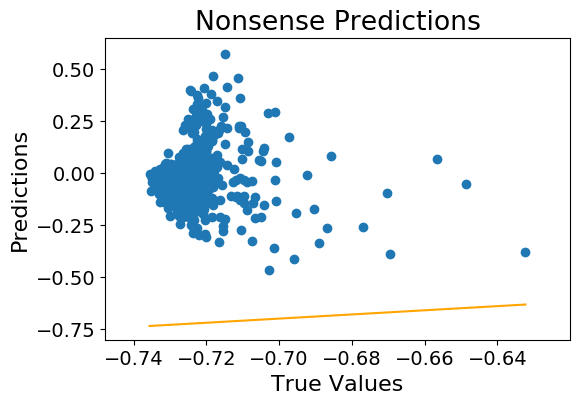

In [39]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(16,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='MSE', optimizer=optimizer) 
model.summary()

#Take a look at predictions to see everything matches and nothing blows up]
plot_predictions(model.predict(test_features))
plt.title('Nonsense Predictions');

Fitting the NN and checking the loss history and comparing predictions

In [40]:
start = time.time()

NN = model.fit(train_features, train_labels, validation_split=0.2, epochs = 1000,  batch_size=200)

str(datetime.timedelta(seconds=time.time()-start))

Epoch 1/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.0842 - val_loss: 0.0306
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.0037
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.8941e-04 - val_loss: 0.0011
Epoch 8/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.3999e-04 - val_loss: 9.9322e-04
Epoch 9/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.4446e-04 - val_loss: 8.7613e-04
Epoch 10/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.93

Epoch 77/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.8203e-04 - val_loss: 3.9723e-04
Epoch 78/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4825e-04 - val_loss: 3.6422e-04
Epoch 79/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.2460e-04 - val_loss: 3.8642e-04
Epoch 80/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.3527e-04 - val_loss: 0.0017
Epoch 81/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.2729e-04 - val_loss: 0.0016
Epoch 82/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 8.8054e-04
Epoch 83/1000
18/18 [==============================] - 0s 4ms/step - loss: 4.8025e-04 - val_loss: 5.2685e-04
Epoch 84/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.4156e-04 - val_loss: 6.2807e-04
Epoch 85/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.8469e-04 - val_loss: 4.1170e-04
Epoch 86/1000
18/18 [==========

Epoch 152/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.9681e-05 - val_loss: 3.6125e-04
Epoch 153/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.7249e-05 - val_loss: 4.3018e-04
Epoch 154/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2649e-04 - val_loss: 3.0258e-04
Epoch 155/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.3206e-05 - val_loss: 2.0493e-04
Epoch 156/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.6989e-05 - val_loss: 2.0645e-04
Epoch 157/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.9310e-05 - val_loss: 2.2451e-04
Epoch 158/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.2073e-05 - val_loss: 7.0825e-04
Epoch 159/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.9769e-04 - val_loss: 4.4662e-04
Epoch 160/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3425e-04 - val_loss: 1.9405e-04
Epoch 161/

Epoch 301/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.3847e-05 - val_loss: 9.2985e-05
Epoch 302/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3419e-05 - val_loss: 2.1414e-04
Epoch 303/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4671e-04 - val_loss: 4.6634e-04
Epoch 304/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4054e-04 - val_loss: 1.1687e-04
Epoch 305/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.9206e-05 - val_loss: 9.1344e-05
Epoch 306/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.3857e-05 - val_loss: 1.1461e-04
Epoch 307/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4228e-05 - val_loss: 9.0139e-05
Epoch 308/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.6678e-05 - val_loss: 1.1109e-04
Epoch 309/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.1355e-05 - val_loss: 7.9894e-05
Epoch 310/

18/18 [==============================] - 0s 4ms/step - loss: 1.4230e-05 - val_loss: 6.6287e-05
Epoch 450/1000
18/18 [==============================] - 0s 5ms/step - loss: 1.9647e-05 - val_loss: 2.4789e-04
Epoch 451/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.9160e-05 - val_loss: 4.7539e-05
Epoch 452/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1758e-05 - val_loss: 2.1231e-04
Epoch 453/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.0713e-05 - val_loss: 7.3070e-05
Epoch 454/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.5020e-05 - val_loss: 4.4880e-05
Epoch 455/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.7547e-05 - val_loss: 4.8876e-05
Epoch 456/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2691e-05 - val_loss: 4.5462e-05
Epoch 457/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1242e-05 - val_loss: 7.9339e-05
Epoch 458/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 8.1471e-06 - val_loss: 5.0637e-05
Epoch 598/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0146e-05 - val_loss: 1.9502e-04
Epoch 599/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0296e-04 - val_loss: 6.3241e-05
Epoch 600/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.5059e-05 - val_loss: 5.4109e-05
Epoch 601/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.6635e-05 - val_loss: 1.2377e-04
Epoch 602/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0059e-05 - val_loss: 5.0536e-05
Epoch 603/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3797e-05 - val_loss: 7.4277e-05
Epoch 604/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.8355e-05 - val_loss: 9.9789e-05
Epoch 605/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.6880e-05 - val_loss: 5.5252e-05
Epoch 606/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.9452e-05 - val_loss: 2.1590e-05
Epoch 746/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1138e-05 - val_loss: 4.1697e-05
Epoch 747/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3827e-05 - val_loss: 4.8999e-05
Epoch 748/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.6866e-05 - val_loss: 2.2409e-05
Epoch 749/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0061e-05 - val_loss: 2.6169e-05
Epoch 750/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0594e-05 - val_loss: 2.3074e-05
Epoch 751/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.7721e-06 - val_loss: 1.2100e-04
Epoch 752/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.3379e-05 - val_loss: 4.7927e-05
Epoch 753/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.7304e-05 - val_loss: 3.6922e-05
Epoch 754/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 6.5918e-06 - val_loss: 2.8902e-05
Epoch 894/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.4367e-06 - val_loss: 1.9157e-05
Epoch 895/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.0254e-06 - val_loss: 6.5399e-05
Epoch 896/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.5425e-05 - val_loss: 4.2394e-05
Epoch 897/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.5384e-05 - val_loss: 1.9280e-05
Epoch 898/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.7882e-06 - val_loss: 1.9359e-05
Epoch 899/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.5378e-06 - val_loss: 1.8684e-05
Epoch 900/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.9080e-06 - val_loss: 3.9325e-05
Epoch 901/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0592e-05 - val_loss: 2.6117e-05
Epoch 902/1000
18/18 [===

'0:01:00.748179'

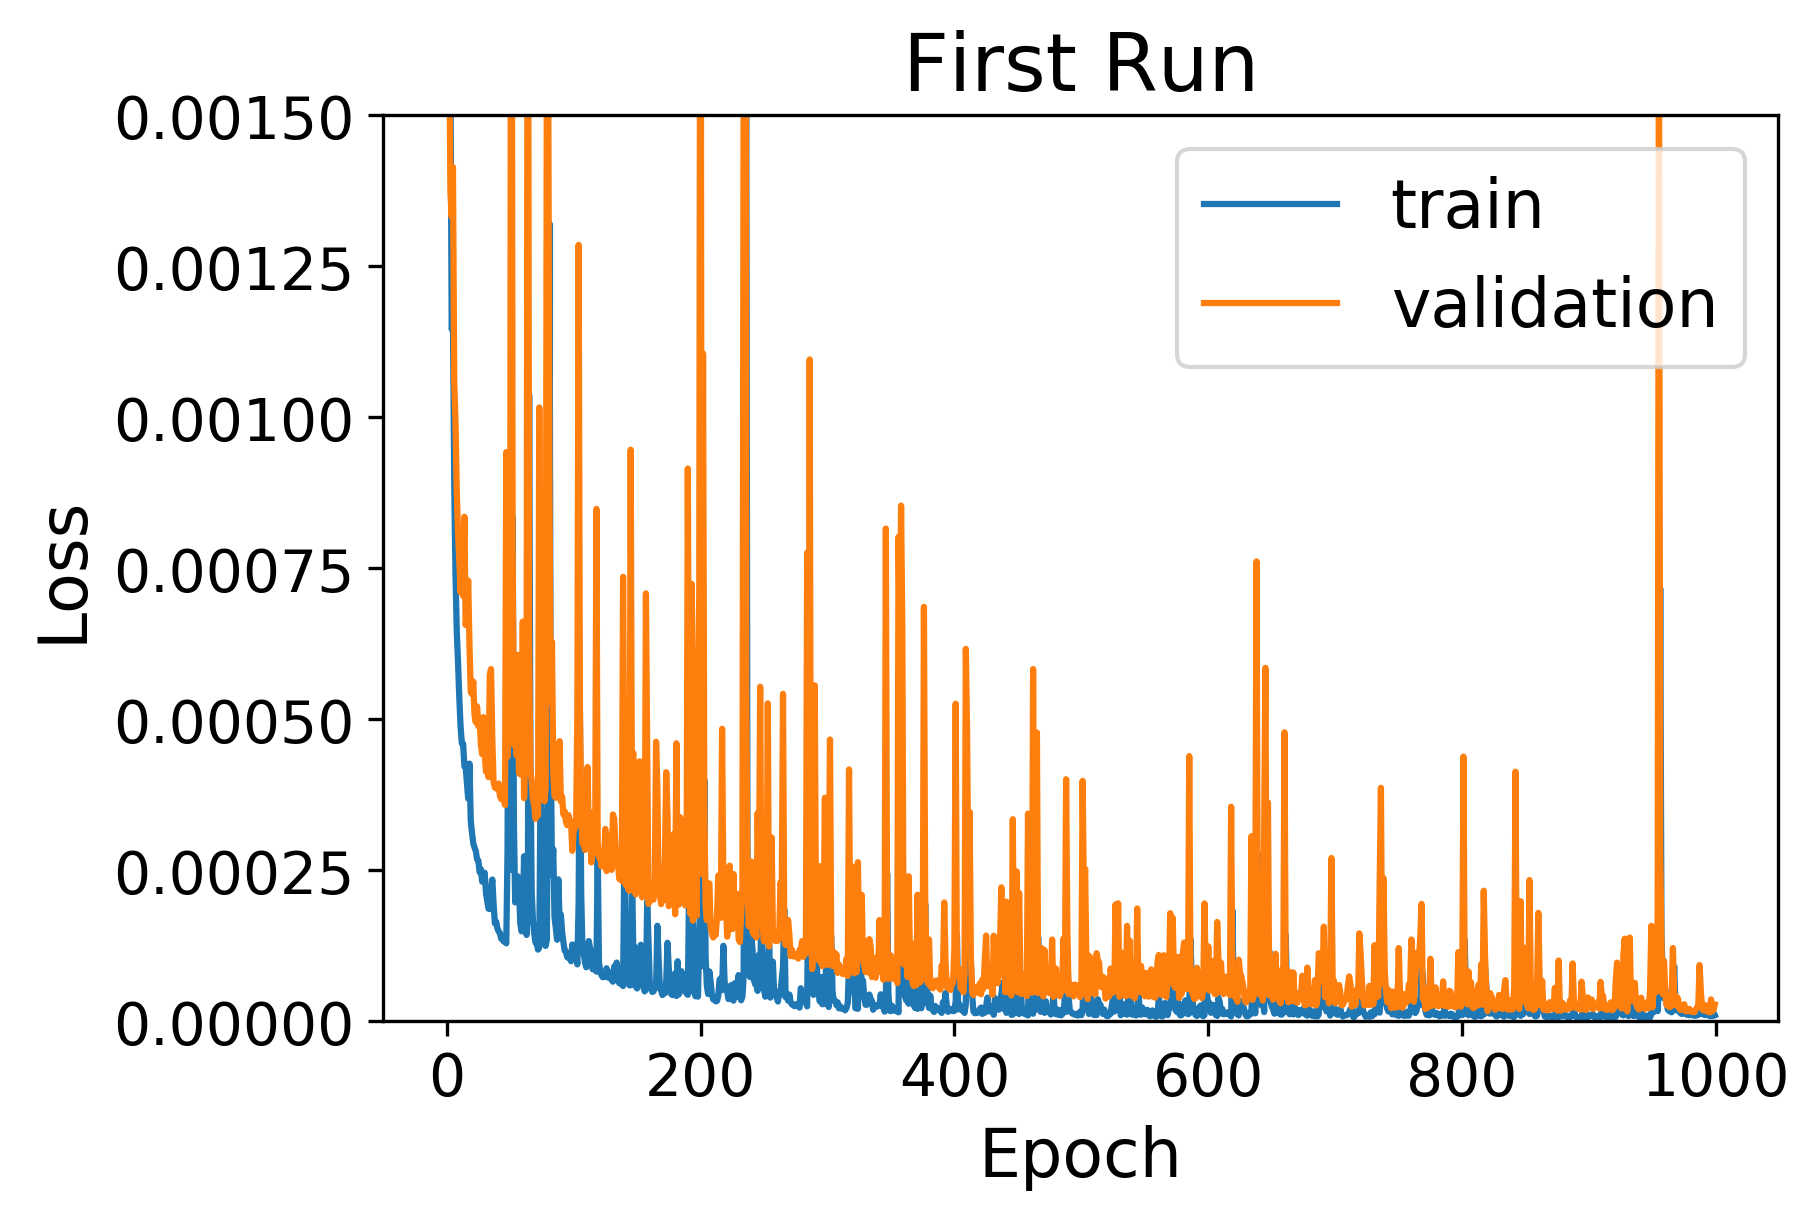

In [224]:
plot_loss(NN)
plt.ylim([0,.0015])
plt.title('First Run');
plt.savefig('First_loss')

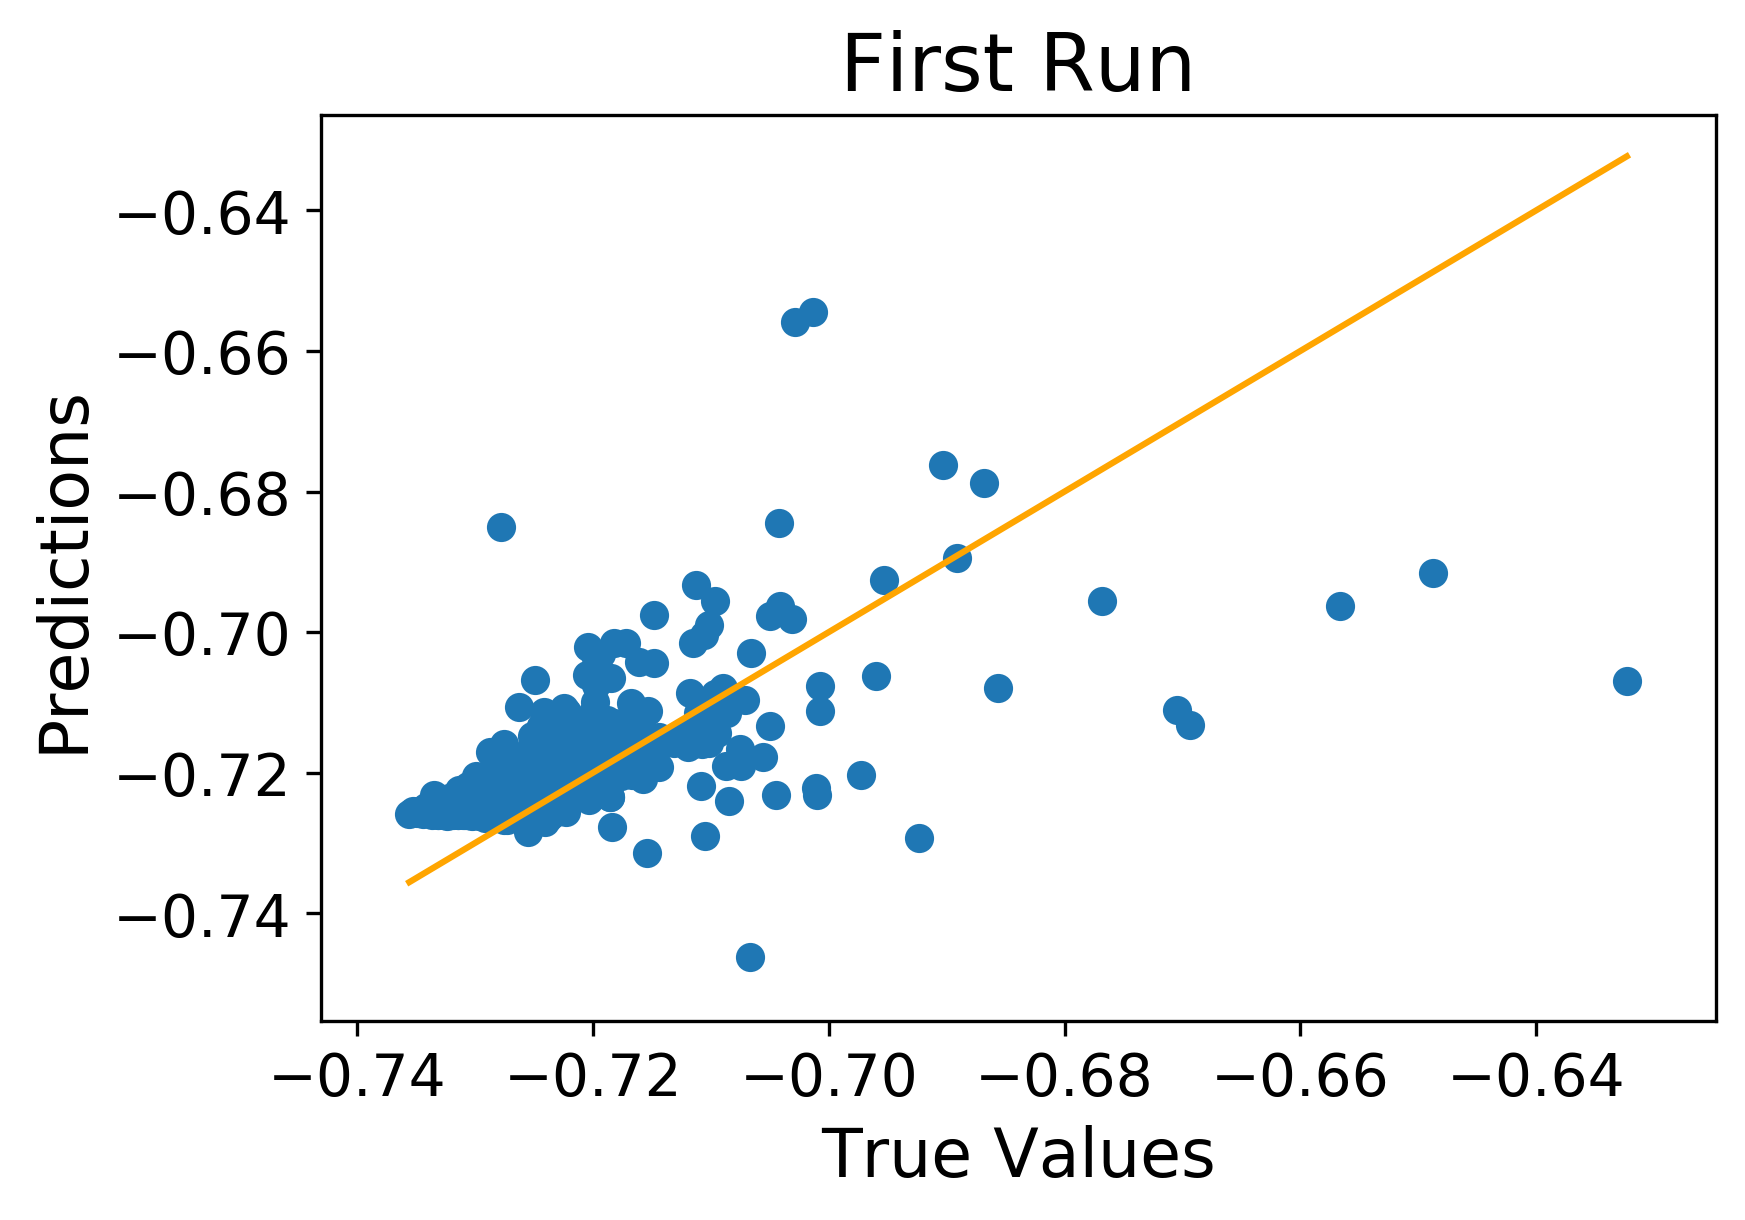

In [223]:
first_run = model.predict(test_features)

plot_predictions(first_run)
plt.title('First Run');

plt.savefig('First_Run.png')

<Figure size 1800x1200 with 0 Axes>

In [44]:
evaluations = {}

In [43]:
model.evaluate(test_features, test_labels, verbose = 1)

34/34 [==============================] - 0s 782us/step - loss: 4.9626e-05


4.9626421969151124e-05

In [45]:
evaluations['First run'] = model.evaluate(test_features, test_labels, verbose = 1)

evaluations

34/34 [==============================] - 0s 1ms/step - loss: 4.9626e-05


{'First run': 4.9626421969151124e-05}

In [46]:
model.save('model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/assets


# Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [48]:
scaler.fit(train_features)

train_features_scaled = scaler.transform(train_features)
test_features_scaled = scaler.transform(test_features)

train_features_scaled.mean(axis=0)

array([-6.85142337e-17,  1.67107887e-18, -2.96616500e-16,  3.43824478e-16,
       -1.67107887e-17, -4.42835901e-17, -1.43712783e-16, -1.37028467e-16,
        1.16975521e-17, -1.00264732e-17,  4.42835901e-17,  9.35804168e-17,
        3.71815049e-16, -5.94068538e-16, -2.77315539e-15,  4.23618494e-16])

In [23]:
model_scaled = keras.models.load_model('model_scaled')

In [58]:
model_scaled = Sequential()
model_scaled.add(Dense(100, activation='relu', input_shape=(16,)))
model_scaled.add(Dense(100, activation='relu'))
model_scaled.add(Dense(1, activation='linear'))

model_scaled.compile(loss='MSE', optimizer=optimizer) 
model_scaled.summary()

start = time.time()
NN_scaled = model_scaled.fit(train_features_scaled, train_labels, validation_split=0.2, epochs = 1000,  batch_size=200)
str(datetime.timedelta(seconds=time.time()-start))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 100)               1700      
_________________________________________________________________
dense_40 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 101       
Total params: 11,901
Trainable params: 11,901
Non-trainable params: 0
_________________________________________________________________
34/34 [==============================] - 0s 1ms/step - loss: 0.9873
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.2302 - val_loss: 0.0461
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0304 - val_loss: 0.0248
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0170 - val_loss: 0.0171
Epoch 4/100

Epoch 148/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.8909e-05 - val_loss: 7.4377e-04
Epoch 149/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1145e-04 - val_loss: 6.9648e-04
Epoch 150/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0374e-04 - val_loss: 7.1439e-04
Epoch 151/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.1272e-05 - val_loss: 7.2380e-04
Epoch 152/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.2707e-05 - val_loss: 7.4320e-04
Epoch 153/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.3786e-05 - val_loss: 7.1048e-04
Epoch 154/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.6775e-05 - val_loss: 7.0771e-04
Epoch 155/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.4204e-05 - val_loss: 6.9319e-04
Epoch 156/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1145e-04 - val_loss: 7.2841e-04
Epoch 157/

18/18 [==============================] - 0s 3ms/step - loss: 2.1869e-05 - val_loss: 4.6051e-04
Epoch 297/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.0401e-05 - val_loss: 4.3289e-04
Epoch 298/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.1709e-05 - val_loss: 4.6426e-04
Epoch 299/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.9621e-05 - val_loss: 4.2896e-04
Epoch 300/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3378e-05 - val_loss: 4.4138e-04
Epoch 301/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.0384e-05 - val_loss: 4.5189e-04
Epoch 302/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.2732e-05 - val_loss: 4.3098e-04
Epoch 303/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.7801e-05 - val_loss: 4.3315e-04
Epoch 304/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.9873e-05 - val_loss: 4.3442e-04
Epoch 305/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.3315e-05 - val_loss: 2.4877e-04
Epoch 445/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2821e-05 - val_loss: 2.2826e-04
Epoch 446/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.4922e-05 - val_loss: 3.0432e-04
Epoch 447/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.8975e-05 - val_loss: 2.8855e-04
Epoch 448/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.2409e-05 - val_loss: 2.5715e-04
Epoch 449/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.0471e-05 - val_loss: 2.5245e-04
Epoch 450/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.7216e-05 - val_loss: 2.7920e-04
Epoch 451/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.1914e-05 - val_loss: 2.2451e-04
Epoch 452/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.1128e-05 - val_loss: 2.5308e-04
Epoch 453/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.0000e-05 - val_loss: 9.3136e-05
Epoch 593/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3326e-05 - val_loss: 1.0935e-04
Epoch 594/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2707e-05 - val_loss: 9.3185e-05
Epoch 595/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0321e-05 - val_loss: 9.6112e-05
Epoch 596/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0429e-05 - val_loss: 9.2060e-05
Epoch 597/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.7551e-06 - val_loss: 1.0855e-04
Epoch 598/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.1020e-05 - val_loss: 9.0773e-05
Epoch 599/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3958e-05 - val_loss: 9.3322e-05
Epoch 600/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.1180e-05 - val_loss: 8.7487e-05
Epoch 601/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 6.0569e-06 - val_loss: 6.2165e-05
Epoch 741/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.6641e-06 - val_loss: 6.9405e-05
Epoch 742/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.7454e-06 - val_loss: 6.6447e-05
Epoch 743/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.9157e-06 - val_loss: 8.0493e-05
Epoch 744/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2518e-05 - val_loss: 8.1609e-05
Epoch 745/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3837e-05 - val_loss: 6.6481e-05
Epoch 746/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.8136e-06 - val_loss: 6.5457e-05
Epoch 747/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.9908e-06 - val_loss: 6.7665e-05
Epoch 748/1000
18/18 [==============================] - 0s 4ms/step - loss: 9.7255e-06 - val_loss: 6.7194e-05
Epoch 749/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 6.1749e-06 - val_loss: 2.6797e-05
Epoch 889/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.7531e-06 - val_loss: 2.6501e-05
Epoch 890/1000
18/18 [==============================] - 0s 4ms/step - loss: 5.1828e-06 - val_loss: 3.1684e-05
Epoch 891/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.5304e-06 - val_loss: 2.7452e-05
Epoch 892/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.0599e-06 - val_loss: 2.7621e-05
Epoch 893/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.6520e-06 - val_loss: 2.8423e-05
Epoch 894/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.2217e-06 - val_loss: 2.8983e-05
Epoch 895/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.7752e-06 - val_loss: 2.9031e-05
Epoch 896/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.8270e-06 - val_loss: 2.6397e-05
Epoch 897/1000
18/18 [===

'0:01:01.698199'

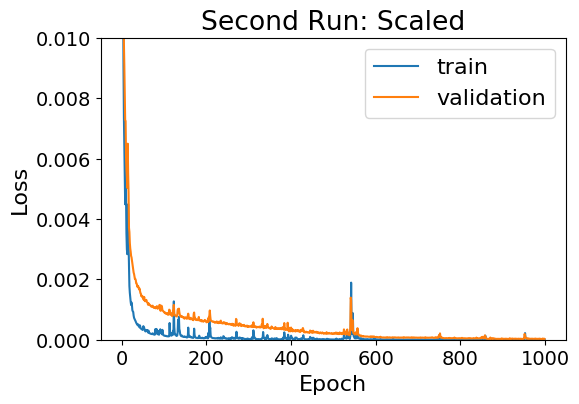

In [59]:
plot_loss(NN_scaled)
plt.ylim([0,.01])
plt.title('Second Run: Scaled');

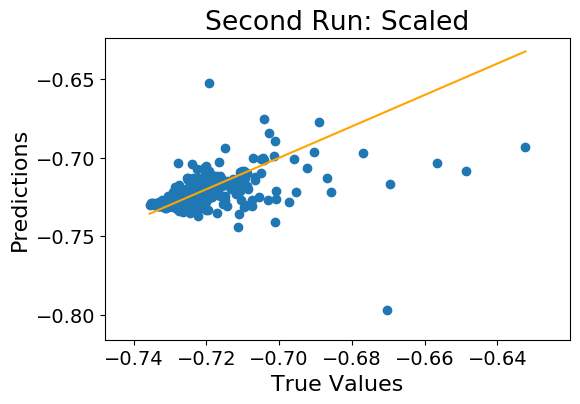

In [60]:
sec_run = model_scaled.predict(test_features_scaled)

plot_predictions(sec_run)
plt.title('Second Run: Scaled');

In [61]:
evaluations['Scaled'] = model_scaled.evaluate(test_features_scaled,test_labels)

evaluations

34/34 [==============================] - 0s 1ms/step - loss: 5.5745e-05


{'First run': 4.9626421969151124e-05, 'Scaled': 5.574493116000667e-05}

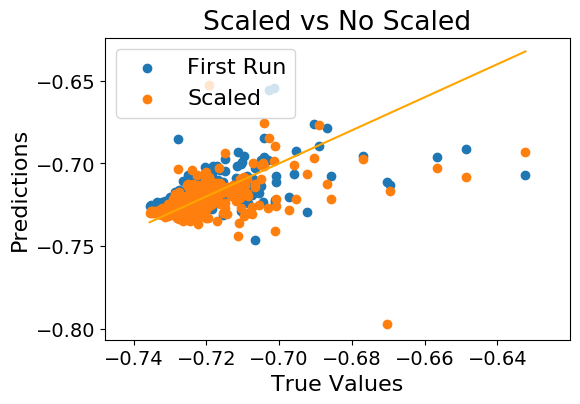

In [62]:
plt.scatter(test_labels, first_run, label = 'First Run')
plt.scatter(test_labels, sec_run, label = 'Scaled')
plt.xlabel('True Values')
plt.ylabel('Predictions')
x = np.linspace(min(test_labels),max(test_labels))
plt.plot(x,x,c='orange')
plt.legend(loc='upper left')

plt.title('Scaled vs No Scaled');

In [63]:
model_scaled.save('model_scaled')

INFO:tensorflow:Assets written to: model_scaled/assets


# Normalizing 

Normalizing data as opposed to scaling

In [64]:
from tensorflow.keras.layers.experimental import preprocessing

In [65]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

train_features_norm = normalizer(train_features)
test_features_norm = normalizer(test_features)

train_features_norm

<tf.Tensor: shape=(4252, 16), dtype=float32, numpy=
array([[ 0.5438966 ,  0.26764667, -0.73631394, ..., -2.0041268 ,
        -0.55863106,  0.7199824 ],
       [ 1.4037704 , -0.7088783 ,  0.12007552, ...,  0.04465844,
        -0.3160289 , -0.00978198],
       [ 0.501766  , -1.1196277 , -0.7345864 , ...,  0.13804632,
         0.33393323,  0.7199824 ],
       ...,
       [ 1.7604058 ,  0.02641827,  0.9672768 , ...,  0.3734828 ,
         0.33393323,  0.697893  ],
       [ 0.2996375 , -1.5219164 , -1.4514968 , ...,  0.04565392,
        -1.4291803 ,  0.7199824 ],
       [-0.9371639 ,  0.6932257 , -0.10954732, ...,  0.3734828 ,
         0.33393323, -0.3582294 ]], dtype=float32)>

In [66]:
model_norm = keras.models.load_model('model_norm')

In [69]:
model_norm = Sequential()
model_norm.add(Dense(100, activation='relu', input_shape=(16,)))
model_norm.add(Dense(100, activation='relu'))
model_norm.add(Dense(1, activation='linear'))

model_norm.compile(loss='MSE', optimizer=optimizer) 
model_norm.summary()

start = time.time()
NN_norm = model_norm.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 1000,  batch_size=200)
str(datetime.timedelta(seconds=time.time()-start))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 100)               1700      
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 101       
Total params: 11,901
Trainable params: 11,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.1817 - val_loss: 0.0444
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.0182
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0150 - val_loss: 0.0129
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.009

Epoch 149/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.2574e-05 - val_loss: 9.2636e-04
Epoch 150/1000
18/18 [==============================] - 0s 4ms/step - loss: 6.3441e-05 - val_loss: 9.1345e-04
Epoch 151/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.2502e-05 - val_loss: 9.4043e-04
Epoch 152/1000
18/18 [==============================] - 0s 4ms/step - loss: 6.4987e-05 - val_loss: 9.2146e-04
Epoch 153/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.0966e-05 - val_loss: 9.2770e-04
Epoch 154/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.4577e-05 - val_loss: 9.2271e-04
Epoch 155/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.0472e-05 - val_loss: 9.2042e-04
Epoch 156/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.7170e-05 - val_loss: 9.1705e-04
Epoch 157/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.9662e-05 - val_loss: 9.3460e-04
Epoch 158/

18/18 [==============================] - 0s 3ms/step - loss: 3.6411e-05 - val_loss: 6.8885e-04
Epoch 298/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.4951e-05 - val_loss: 6.8296e-04
Epoch 299/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.8587e-05 - val_loss: 6.8143e-04
Epoch 300/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.7799e-05 - val_loss: 7.2019e-04
Epoch 301/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.3876e-05 - val_loss: 7.3313e-04
Epoch 302/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3100e-04 - val_loss: 8.4490e-04
Epoch 303/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1204e-04 - val_loss: 6.5485e-04
Epoch 304/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.9625e-05 - val_loss: 7.2943e-04
Epoch 305/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.9012e-05 - val_loss: 6.9639e-04
Epoch 306/1000
18/18 [===

Epoch 372/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.3545e-05 - val_loss: 4.4491e-04
Epoch 373/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.9060e-05 - val_loss: 4.2478e-04
Epoch 374/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.7040e-05 - val_loss: 4.3834e-04
Epoch 375/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0616e-05 - val_loss: 4.2658e-04
Epoch 376/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.5830e-05 - val_loss: 4.3610e-04
Epoch 377/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.4218e-05 - val_loss: 4.1425e-04
Epoch 378/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0626e-05 - val_loss: 4.3536e-04
Epoch 379/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4635e-05 - val_loss: 4.1750e-04
Epoch 380/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3853e-05 - val_loss: 4.2069e-04
Epoch 381/

18/18 [==============================] - 0s 3ms/step - loss: 2.4347e-05 - val_loss: 2.9011e-04
Epoch 521/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.7800e-05 - val_loss: 2.5054e-04
Epoch 522/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4225e-05 - val_loss: 2.5299e-04
Epoch 523/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4607e-05 - val_loss: 2.5226e-04
Epoch 524/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3156e-05 - val_loss: 2.4625e-04
Epoch 525/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.2165e-05 - val_loss: 2.9788e-04
Epoch 526/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3816e-05 - val_loss: 2.8398e-04
Epoch 527/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4815e-05 - val_loss: 2.4311e-04
Epoch 528/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1707e-05 - val_loss: 2.4985e-04
Epoch 529/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 5.7082e-06 - val_loss: 1.4597e-04
Epoch 669/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2896e-05 - val_loss: 1.3489e-04
Epoch 670/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.9258e-06 - val_loss: 1.2405e-04
Epoch 671/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.8581e-06 - val_loss: 1.2518e-04
Epoch 672/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.9257e-06 - val_loss: 1.4482e-04
Epoch 673/1000
18/18 [==============================] - 0s 4ms/step - loss: 9.4763e-06 - val_loss: 1.1918e-04
Epoch 674/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.4175e-06 - val_loss: 1.1788e-04
Epoch 675/1000
18/18 [==============================] - 0s 4ms/step - loss: 5.3550e-06 - val_loss: 1.2505e-04
Epoch 676/1000
18/18 [==============================] - 0s 4ms/step - loss: 4.7180e-06 - val_loss: 1.2372e-04
Epoch 677/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 6.9217e-06 - val_loss: 5.4181e-05
Epoch 817/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.5484e-06 - val_loss: 4.7641e-05
Epoch 818/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.0082e-06 - val_loss: 5.2221e-05
Epoch 819/1000
18/18 [==============================] - 0s 2ms/step - loss: 7.1467e-06 - val_loss: 5.1091e-05
Epoch 820/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.9147e-06 - val_loss: 5.6701e-05
Epoch 821/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.2091e-05 - val_loss: 5.1857e-05
Epoch 822/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.0910e-06 - val_loss: 5.2445e-05
Epoch 823/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.2956e-06 - val_loss: 5.6988e-05
Epoch 824/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.5877e-06 - val_loss: 6.1841e-05
Epoch 825/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 5.6665e-06 - val_loss: 2.1261e-05
Epoch 965/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.4429e-06 - val_loss: 2.6095e-05
Epoch 966/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.5089e-06 - val_loss: 2.3787e-05
Epoch 967/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.8068e-06 - val_loss: 2.2919e-05
Epoch 968/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.3417e-06 - val_loss: 2.5689e-05
Epoch 969/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.1623e-06 - val_loss: 2.2443e-05
Epoch 970/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.9021e-06 - val_loss: 2.6323e-05
Epoch 971/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.2230e-06 - val_loss: 2.1741e-05
Epoch 972/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.5535e-06 - val_loss: 2.0387e-05
Epoch 973/1000
18/18 [===

'0:01:00.310307'

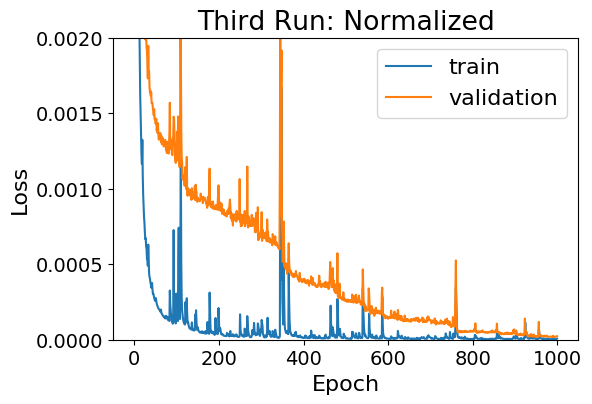

In [70]:
plot_loss(NN_norm)
plt.ylim([0,.002])
plt.title('Third Run: Normalized');

In [71]:
thr_run = model_norm.predict(test_features_norm)

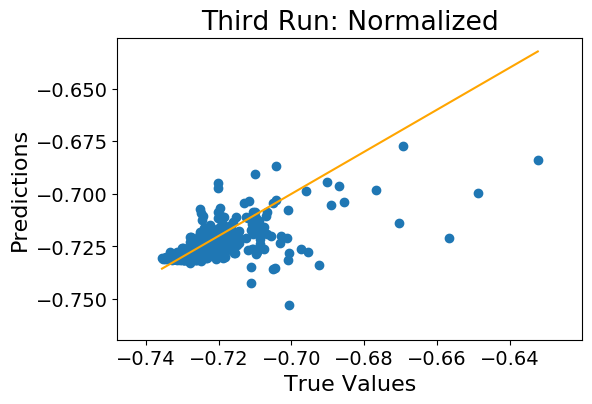

In [72]:
plot_predictions(thr_run)
plt.title('Third Run: Normalized');

In [73]:
evaluations['Normalized'] = model_norm.evaluate(test_features_norm,test_labels)

evaluations

34/34 [==============================] - 0s 2ms/step - loss: 3.7493e-05


{'First run': 4.9626421969151124e-05,
 'Scaled': 5.574493116000667e-05,
 'Normalized': 3.749266033992171e-05}

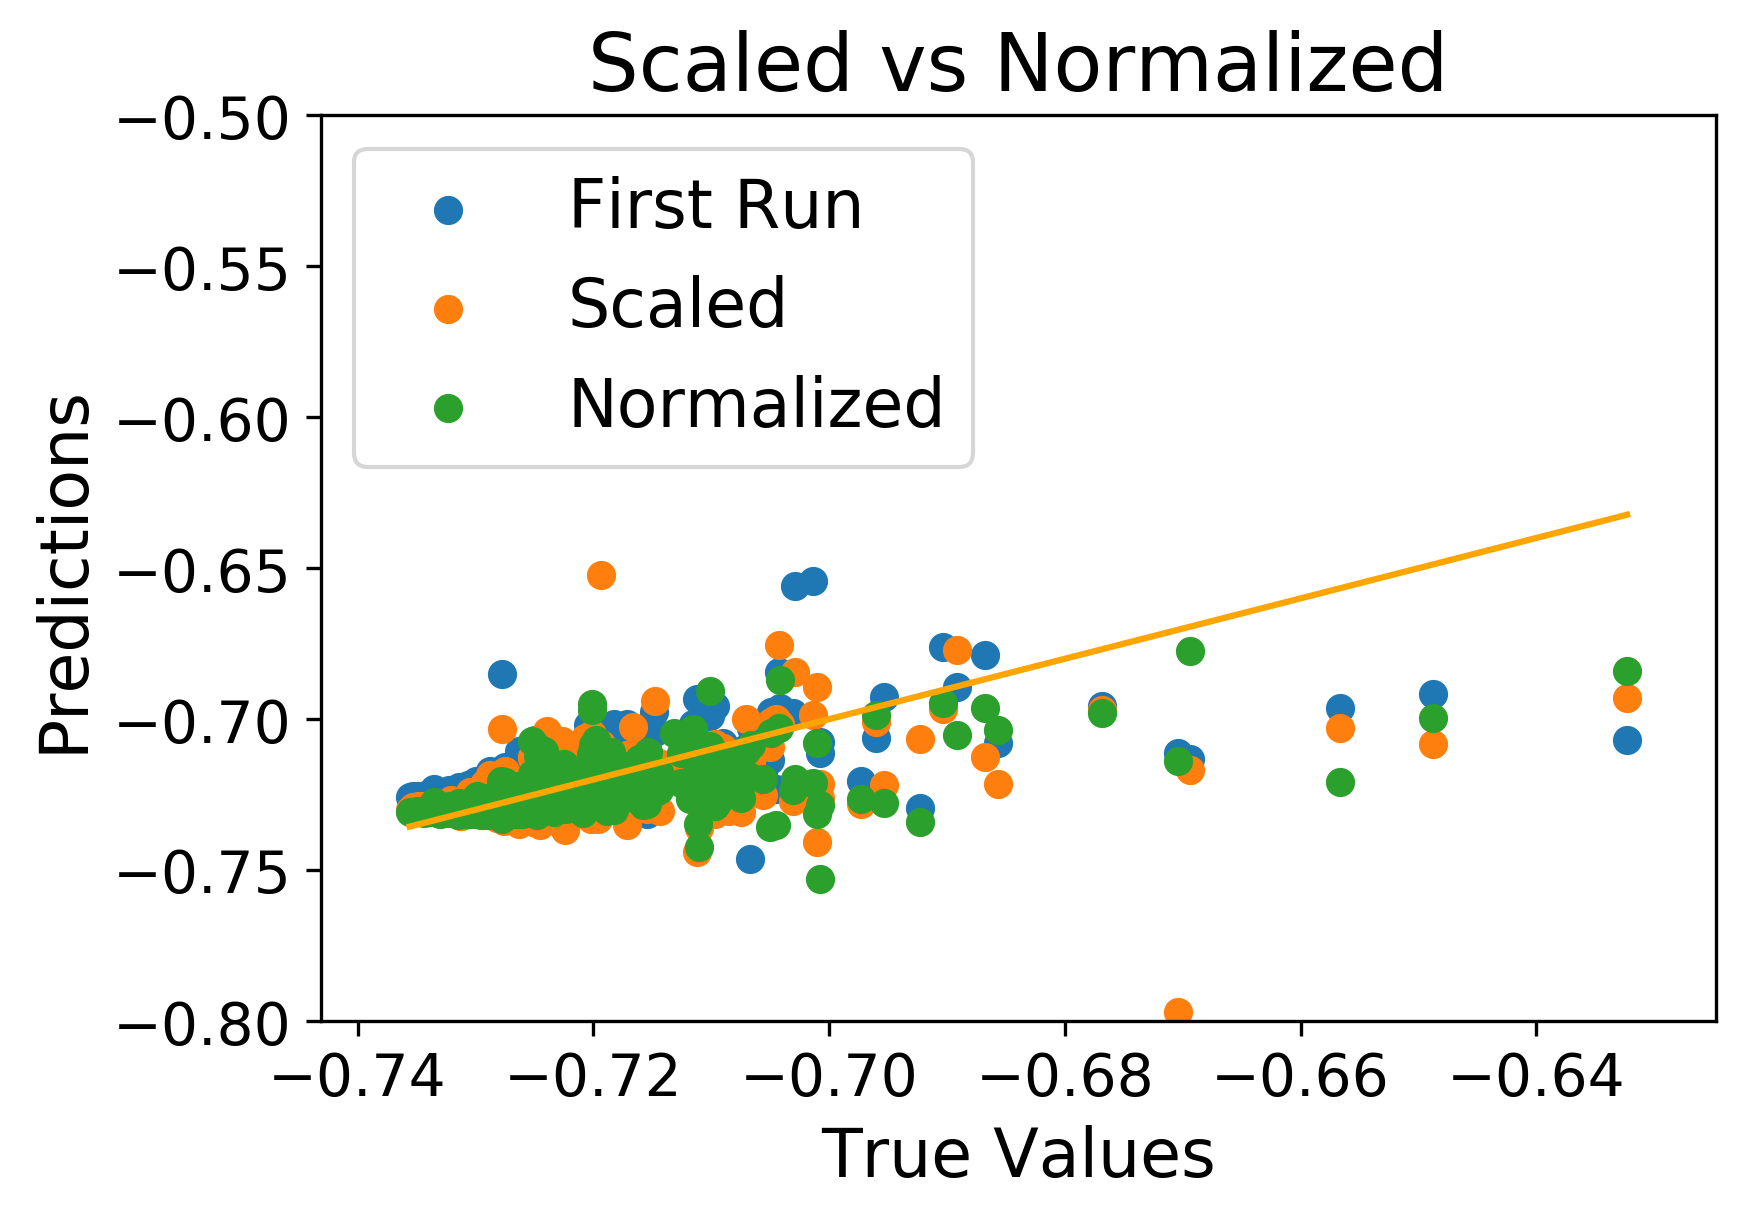

In [225]:
plt.scatter(test_labels, first_run, label = 'First Run')
plt.scatter(test_labels, sec_run, label = 'Scaled')
plt.scatter(test_labels, thr_run, label = 'Normalized')
plt.xlabel('True Values')
plt.ylabel('Predictions')
x = np.linspace(min(test_labels),max(test_labels))
plt.plot(x,x,c='orange')
plt.legend(loc='upper left')
plt.ylim([-.8,-.5])
plt.title('Scaled vs Normalized');

plt.savefig('Scaled vs Normalized')

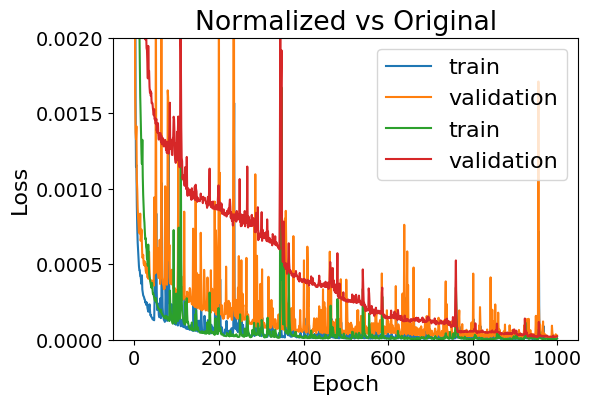

In [77]:
plot_loss(NN)
plot_loss(NN_norm)
plt.ylim([0,.002])
plt.title('Normalized vs Original');

In [78]:
model_norm.save('model_norm')

INFO:tensorflow:Assets written to: model_norm/assets


# Huber

In [37]:
huber = keras.models.load_model('huber')

In [79]:
delta = [1,2,3,4,5]
huber_evals = {}

for d in delta: 
    loss = keras.losses.Huber(d)
    huber = Sequential()
    huber.add(Dense(100, activation='relu', input_shape=(16,)))
    huber.add(Dense(100, activation='relu'))
    huber.add(Dense(1, activation='linear'))

    huber.compile(loss=loss, optimizer=optimizer) 

    print('Starting delta = ', d)
    print('Evaluation = ', huber.evaluate(test_features_norm, test_labels), '\n')
    start = time.time()
    NN_huber = huber.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 1000,  batch_size=200)
    print(str(datetime.timedelta(seconds=time.time()-start)), '\n')
    huber_evals['delta_'+str(d)] = huber.evaluate(test_features_norm,test_labels)
    print('\n\n')
    
huber_evals

Starting delta =  1
34/34 [==============================] - 0s 1ms/step - loss: 0.2931
Evaluation =  0.2930798828601837 

Epoch 1/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.0704 - val_loss: 0.0142
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.0071
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0047
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 8/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 9/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 151/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.2738e-05 - val_loss: 2.4849e-04
Epoch 152/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.0498e-05 - val_loss: 2.5524e-04
Epoch 153/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.5364e-05 - val_loss: 2.5802e-04
Epoch 154/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.6570e-05 - val_loss: 2.5962e-04
Epoch 155/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.8490e-05 - val_loss: 2.6274e-04
Epoch 156/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.7750e-05 - val_loss: 2.6747e-04
Epoch 157/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4646e-05 - val_loss: 2.6904e-04
Epoch 158/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4201e-05 - val_loss: 2.6928e-04
Epoch 159/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.5199e-05 - val_loss: 3.4286e-04
Epoch 160/

18/18 [==============================] - 0s 3ms/step - loss: 1.0459e-05 - val_loss: 1.1247e-04
Epoch 300/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.7588e-05 - val_loss: 1.0922e-04
Epoch 301/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.6210e-05 - val_loss: 1.0484e-04
Epoch 302/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.2021e-05 - val_loss: 1.0162e-04
Epoch 303/1000
18/18 [==============================] - 0s 4ms/step - loss: 9.3507e-06 - val_loss: 1.0344e-04
Epoch 304/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.3031e-06 - val_loss: 1.0111e-04
Epoch 305/1000
18/18 [==============================] - 0s 4ms/step - loss: 9.0259e-06 - val_loss: 1.0256e-04
Epoch 306/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.4513e-06 - val_loss: 1.0366e-04
Epoch 307/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.3065e-06 - val_loss: 1.0090e-04
Epoch 308/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 2.4129e-05 - val_loss: 6.1389e-05
Epoch 448/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.5399e-05 - val_loss: 5.2095e-05
Epoch 449/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0785e-05 - val_loss: 5.0518e-05
Epoch 450/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.6024e-05 - val_loss: 6.4827e-05
Epoch 451/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.8000e-05 - val_loss: 5.0105e-05
Epoch 452/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0847e-05 - val_loss: 4.6474e-05
Epoch 453/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.1596e-06 - val_loss: 5.1819e-05
Epoch 454/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.6085e-06 - val_loss: 4.3602e-05
Epoch 455/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.8587e-06 - val_loss: 5.0170e-05
Epoch 456/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 5.1221e-06 - val_loss: 3.4034e-05
Epoch 596/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.5715e-06 - val_loss: 3.4501e-05
Epoch 597/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.4624e-06 - val_loss: 3.8233e-05
Epoch 598/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.2613e-06 - val_loss: 3.3604e-05
Epoch 599/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.8630e-06 - val_loss: 3.3456e-05
Epoch 600/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.6800e-06 - val_loss: 3.3536e-05
Epoch 601/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.7666e-06 - val_loss: 4.1103e-05
Epoch 602/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.6947e-06 - val_loss: 3.5436e-05
Epoch 603/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.6949e-06 - val_loss: 3.4841e-05
Epoch 604/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 3.2362e-06 - val_loss: 1.4899e-05
Epoch 744/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.9129e-06 - val_loss: 1.5089e-05
Epoch 745/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4740e-06 - val_loss: 1.5038e-05
Epoch 746/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.2040e-06 - val_loss: 1.5976e-05
Epoch 747/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4179e-06 - val_loss: 1.4977e-05
Epoch 748/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0121e-06 - val_loss: 1.5679e-05
Epoch 749/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.7816e-06 - val_loss: 1.5253e-05
Epoch 750/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.8020e-06 - val_loss: 1.4486e-05
Epoch 751/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.7072e-06 - val_loss: 1.5641e-05
Epoch 752/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 4.7398e-06 - val_loss: 8.8921e-06
Epoch 892/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.7151e-06 - val_loss: 9.3598e-06
Epoch 893/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.1550e-06 - val_loss: 8.2316e-06
Epoch 894/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.8182e-06 - val_loss: 9.0653e-06
Epoch 895/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0449e-06 - val_loss: 1.2691e-05
Epoch 896/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.0951e-06 - val_loss: 8.4334e-06
Epoch 897/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.9012e-06 - val_loss: 8.3360e-06
Epoch 898/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.6467e-06 - val_loss: 7.7221e-06
Epoch 899/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.4134e-06 - val_loss: 8.8396e-06
Epoch 900/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.6543e-04 - val_loss: 7.5143e-04
Epoch 40/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.2856e-04 - val_loss: 6.8188e-04
Epoch 41/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.8338e-04 - val_loss: 6.5972e-04
Epoch 42/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.6866e-04 - val_loss: 6.7423e-04
Epoch 43/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4878e-04 - val_loss: 6.3088e-04
Epoch 44/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3949e-04 - val_loss: 6.2215e-04
Epoch 45/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4469e-04 - val_loss: 6.2808e-04
Epoch 46/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3120e-04 - val_loss: 6.0772e-04
Epoch 47/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2597e-04 - val_loss: 6.1192e-04
Epoch 48/1000
18/18 [============

18/18 [==============================] - 0s 3ms/step - loss: 2.0393e-05 - val_loss: 2.5495e-04
Epoch 189/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0795e-05 - val_loss: 2.6597e-04
Epoch 190/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.2382e-05 - val_loss: 2.5183e-04
Epoch 191/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.8157e-05 - val_loss: 2.5239e-04
Epoch 192/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.6766e-05 - val_loss: 2.5204e-04
Epoch 193/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.8696e-05 - val_loss: 2.5241e-04
Epoch 194/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.6922e-05 - val_loss: 2.5053e-04
Epoch 195/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.6089e-05 - val_loss: 2.5046e-04
Epoch 196/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.5353e-05 - val_loss: 2.5316e-04
Epoch 197/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.2696e-05 - val_loss: 2.4316e-04
Epoch 337/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.4022e-04 - val_loss: 2.3995e-04
Epoch 338/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.7354e-04 - val_loss: 1.9432e-04
Epoch 339/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.2862e-05 - val_loss: 1.6421e-04
Epoch 340/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4190e-05 - val_loss: 1.4736e-04
Epoch 341/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.2379e-05 - val_loss: 1.6565e-04
Epoch 342/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3475e-05 - val_loss: 1.3503e-04
Epoch 343/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4954e-05 - val_loss: 1.3676e-04
Epoch 344/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1755e-05 - val_loss: 1.3716e-04
Epoch 345/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 6.4819e-06 - val_loss: 8.0351e-05
Epoch 485/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.6432e-06 - val_loss: 8.1474e-05
Epoch 486/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.6303e-06 - val_loss: 8.8006e-05
Epoch 487/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.8174e-06 - val_loss: 7.7756e-05
Epoch 488/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.7490e-06 - val_loss: 8.1021e-05
Epoch 489/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.1927e-06 - val_loss: 7.4915e-05
Epoch 490/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.7040e-06 - val_loss: 8.7640e-05
Epoch 491/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.8241e-06 - val_loss: 8.2494e-05
Epoch 492/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.9205e-06 - val_loss: 8.1617e-05
Epoch 493/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.2482e-05 - val_loss: 2.8016e-05
Epoch 633/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.5781e-06 - val_loss: 2.5379e-05
Epoch 634/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.8904e-06 - val_loss: 2.3331e-05
Epoch 635/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.5767e-06 - val_loss: 2.3949e-05
Epoch 636/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.6475e-06 - val_loss: 2.6309e-05
Epoch 637/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.8007e-06 - val_loss: 2.3136e-05
Epoch 638/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4797e-06 - val_loss: 2.4898e-05
Epoch 639/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.2246e-06 - val_loss: 2.2891e-05
Epoch 640/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.7523e-06 - val_loss: 2.2662e-05
Epoch 641/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.9150e-06 - val_loss: 1.5081e-05
Epoch 781/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.9538e-06 - val_loss: 1.5183e-05
Epoch 782/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.6488e-06 - val_loss: 1.5942e-05
Epoch 783/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3801e-06 - val_loss: 1.4600e-05
Epoch 784/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.9453e-06 - val_loss: 1.5070e-05
Epoch 785/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.6413e-06 - val_loss: 1.8354e-05
Epoch 786/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.0294e-06 - val_loss: 2.0005e-05
Epoch 787/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.3938e-06 - val_loss: 1.5280e-05
Epoch 788/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.4285e-06 - val_loss: 1.6430e-05
Epoch 789/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 3.2753e-06 - val_loss: 1.1707e-05
Epoch 929/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.3721e-06 - val_loss: 1.4044e-05
Epoch 930/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.5762e-06 - val_loss: 1.0782e-05
Epoch 931/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.6725e-06 - val_loss: 1.1953e-05
Epoch 932/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.7011e-06 - val_loss: 1.0440e-05
Epoch 933/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.1247e-06 - val_loss: 1.0554e-05
Epoch 934/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.9968e-06 - val_loss: 1.3695e-05
Epoch 935/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.0369e-06 - val_loss: 1.6293e-05
Epoch 936/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.7250e-06 - val_loss: 1.1675e-05
Epoch 937/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 5.4109e-05 - val_loss: 3.5625e-04
Epoch 77/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.1062e-05 - val_loss: 3.5541e-04
Epoch 78/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.7532e-05 - val_loss: 3.7214e-04
Epoch 79/1000
18/18 [==============================] - 0s 4ms/step - loss: 6.3739e-05 - val_loss: 4.4927e-04
Epoch 80/1000
18/18 [==============================] - 0s 5ms/step - loss: 2.0439e-04 - val_loss: 3.8933e-04
Epoch 81/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.1152e-04 - val_loss: 3.4118e-04
Epoch 82/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.0055e-05 - val_loss: 4.0468e-04
Epoch 83/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.5828e-04 - val_loss: 3.8303e-04
Epoch 84/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.1346e-05 - val_loss: 3.0492e-04
Epoch 85/1000
18/18 [============

Epoch 151/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.9969e-05 - val_loss: 2.3529e-04
Epoch 152/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.1469e-05 - val_loss: 2.4105e-04
Epoch 153/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.6058e-05 - val_loss: 2.2314e-04
Epoch 154/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3385e-05 - val_loss: 2.2725e-04
Epoch 155/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.1527e-05 - val_loss: 2.3543e-04
Epoch 156/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.1787e-05 - val_loss: 2.2930e-04
Epoch 157/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.9631e-05 - val_loss: 2.2523e-04
Epoch 158/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.2859e-05 - val_loss: 2.3806e-04
Epoch 159/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.9470e-05 - val_loss: 2.3169e-04
Epoch 160/

18/18 [==============================] - 0s 3ms/step - loss: 9.7521e-06 - val_loss: 1.3596e-04
Epoch 300/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.5202e-05 - val_loss: 1.3909e-04
Epoch 301/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1487e-05 - val_loss: 1.3421e-04
Epoch 302/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.5316e-06 - val_loss: 1.3440e-04
Epoch 303/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.1403e-06 - val_loss: 1.4210e-04
Epoch 304/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3504e-05 - val_loss: 1.3999e-04
Epoch 305/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3286e-05 - val_loss: 1.3535e-04
Epoch 306/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.9398e-06 - val_loss: 1.3020e-04
Epoch 307/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.5937e-06 - val_loss: 1.2869e-04
Epoch 308/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.3733e-04 - val_loss: 1.2236e-04
Epoch 448/1000
18/18 [==============================] - 0s 4ms/step - loss: 4.7782e-05 - val_loss: 7.9379e-05
Epoch 449/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.6752e-05 - val_loss: 6.7726e-05
Epoch 450/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.5253e-05 - val_loss: 6.2041e-05
Epoch 451/1000
18/18 [==============================] - 0s 4ms/step - loss: 9.6047e-06 - val_loss: 6.2186e-05
Epoch 452/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.2048e-06 - val_loss: 7.4223e-05
Epoch 453/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.6974e-05 - val_loss: 7.5358e-05
Epoch 454/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4208e-05 - val_loss: 6.5814e-05
Epoch 455/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.4906e-06 - val_loss: 6.9835e-05
Epoch 456/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 4.3734e-06 - val_loss: 2.2599e-05
Epoch 596/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.1452e-06 - val_loss: 2.4160e-05
Epoch 597/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.1498e-06 - val_loss: 2.2266e-05
Epoch 598/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.8936e-06 - val_loss: 2.0940e-05
Epoch 599/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.6340e-06 - val_loss: 3.1756e-05
Epoch 600/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4979e-05 - val_loss: 2.6559e-05
Epoch 601/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.7976e-06 - val_loss: 2.1185e-05
Epoch 602/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.7518e-06 - val_loss: 1.9710e-05
Epoch 603/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.3800e-06 - val_loss: 1.9997e-05
Epoch 604/1000
18/18 [===

18/18 [==============================] - 0s 4ms/step - loss: 2.3975e-06 - val_loss: 1.2692e-05
Epoch 744/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.9477e-06 - val_loss: 1.3549e-05
Epoch 745/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.3656e-06 - val_loss: 1.7308e-05
Epoch 746/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.2121e-06 - val_loss: 1.2804e-05
Epoch 747/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.5772e-06 - val_loss: 1.5997e-05
Epoch 748/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.1334e-06 - val_loss: 1.5413e-05
Epoch 749/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.4988e-06 - val_loss: 1.4178e-05
Epoch 750/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.6072e-06 - val_loss: 1.4836e-05
Epoch 751/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0776e-06 - val_loss: 7.6190e-05
Epoch 752/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 2.5190e-06 - val_loss: 9.6797e-06
Epoch 892/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.5397e-06 - val_loss: 1.6009e-05
Epoch 893/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.7423e-06 - val_loss: 7.7005e-06
Epoch 894/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.6332e-06 - val_loss: 1.0744e-05
Epoch 895/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.2232e-06 - val_loss: 1.0601e-05
Epoch 896/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.3626e-06 - val_loss: 1.4437e-05
Epoch 897/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.6957e-06 - val_loss: 8.5593e-06
Epoch 898/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4361e-06 - val_loss: 8.6803e-06
Epoch 899/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.8678e-06 - val_loss: 8.2238e-06
Epoch 900/1000
18/18 [===

18/18 [==============================] - 0s 2ms/step - loss: 1.6431e-04 - val_loss: 7.2389e-04
Epoch 40/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.7457e-04 - val_loss: 7.1968e-04
Epoch 41/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.6291e-04 - val_loss: 6.8867e-04
Epoch 42/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.4811e-04 - val_loss: 6.9735e-04
Epoch 43/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3810e-04 - val_loss: 6.7760e-04
Epoch 44/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4504e-04 - val_loss: 6.5612e-04
Epoch 45/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2993e-04 - val_loss: 6.7272e-04
Epoch 46/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2690e-04 - val_loss: 6.8256e-04
Epoch 47/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.3717e-04 - val_loss: 7.1368e-04
Epoch 48/1000
18/18 [============

18/18 [==============================] - 0s 3ms/step - loss: 2.5828e-05 - val_loss: 2.8733e-04
Epoch 189/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3887e-04 - val_loss: 3.7637e-04
Epoch 190/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1824e-04 - val_loss: 2.4995e-04
Epoch 191/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.1111e-05 - val_loss: 2.7387e-04
Epoch 192/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.9688e-05 - val_loss: 2.6451e-04
Epoch 193/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.1930e-05 - val_loss: 2.5903e-04
Epoch 194/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.7965e-05 - val_loss: 2.6589e-04
Epoch 195/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.5686e-05 - val_loss: 2.6090e-04
Epoch 196/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.4015e-05 - val_loss: 2.6037e-04
Epoch 197/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.1602e-04 - val_loss: 2.9260e-04
Epoch 337/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.3282e-05 - val_loss: 1.5222e-04
Epoch 338/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.9689e-05 - val_loss: 1.4775e-04
Epoch 339/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.0747e-05 - val_loss: 1.3676e-04
Epoch 340/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.7001e-05 - val_loss: 1.3898e-04
Epoch 341/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2898e-05 - val_loss: 1.4134e-04
Epoch 342/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0163e-05 - val_loss: 1.8789e-04
Epoch 343/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2222e-04 - val_loss: 2.2555e-04
Epoch 344/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.7695e-05 - val_loss: 1.6039e-04
Epoch 345/1000
18/18 [===

18/18 [==============================] - 0s 4ms/step - loss: 6.1552e-06 - val_loss: 4.1832e-05
Epoch 485/1000
18/18 [==============================] - 0s 5ms/step - loss: 4.9761e-06 - val_loss: 4.1128e-05
Epoch 486/1000
18/18 [==============================] - 0s 4ms/step - loss: 4.3107e-06 - val_loss: 3.8915e-05
Epoch 487/1000
18/18 [==============================] - 0s 4ms/step - loss: 4.7053e-06 - val_loss: 4.0032e-05
Epoch 488/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.0960e-06 - val_loss: 3.9391e-05
Epoch 489/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.8778e-06 - val_loss: 3.9227e-05
Epoch 490/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.9473e-06 - val_loss: 3.8377e-05
Epoch 491/1000
18/18 [==============================] - 0s 4ms/step - loss: 5.5093e-06 - val_loss: 4.0081e-05
Epoch 492/1000
18/18 [==============================] - 0s 5ms/step - loss: 4.1910e-06 - val_loss: 3.9264e-05
Epoch 493/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.0260e-04 - val_loss: 6.6942e-05
Epoch 633/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.2552e-05 - val_loss: 3.1480e-05
Epoch 634/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3034e-05 - val_loss: 3.1862e-05
Epoch 635/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0077e-05 - val_loss: 2.6688e-05
Epoch 636/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.3348e-05 - val_loss: 3.3003e-05
Epoch 637/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.1116e-05 - val_loss: 3.3627e-05
Epoch 638/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3108e-05 - val_loss: 2.3238e-05
Epoch 639/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.6021e-06 - val_loss: 2.0283e-05
Epoch 640/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.8024e-06 - val_loss: 2.1373e-05
Epoch 641/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 2.1269e-05 - val_loss: 1.9978e-05
Epoch 781/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1389e-05 - val_loss: 1.9854e-05
Epoch 782/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.9497e-06 - val_loss: 1.7652e-05
Epoch 783/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.7344e-06 - val_loss: 1.5760e-05
Epoch 784/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.1657e-06 - val_loss: 2.0034e-05
Epoch 785/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.4200e-06 - val_loss: 2.9585e-05
Epoch 786/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4111e-05 - val_loss: 2.8753e-05
Epoch 787/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.0538e-06 - val_loss: 2.2812e-05
Epoch 788/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.6909e-06 - val_loss: 1.7522e-05
Epoch 789/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 2.7826e-06 - val_loss: 1.2737e-05
Epoch 929/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0189e-06 - val_loss: 1.4159e-05
Epoch 930/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.8372e-06 - val_loss: 1.2594e-05
Epoch 931/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.9739e-06 - val_loss: 1.1494e-05
Epoch 932/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.7866e-06 - val_loss: 1.3868e-05
Epoch 933/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.8628e-06 - val_loss: 1.1704e-05
Epoch 934/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.4551e-06 - val_loss: 1.1507e-05
Epoch 935/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.5552e-06 - val_loss: 1.1243e-05
Epoch 936/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.8319e-06 - val_loss: 1.2267e-05
Epoch 937/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.0174e-04 - val_loss: 5.7107e-04
Epoch 78/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.9858e-05 - val_loss: 5.8085e-04
Epoch 79/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.0008e-05 - val_loss: 5.5762e-04
Epoch 80/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.0989e-05 - val_loss: 5.5401e-04
Epoch 81/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.0122e-05 - val_loss: 5.3460e-04
Epoch 82/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.0359e-04 - val_loss: 6.0532e-04
Epoch 83/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.0141e-05 - val_loss: 5.4909e-04
Epoch 84/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.6772e-05 - val_loss: 5.6050e-04
Epoch 85/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.8665e-05 - val_loss: 5.3362e-04
Epoch 86/1000
18/18 [============

Epoch 152/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.0493e-05 - val_loss: 4.0177e-04
Epoch 153/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.5647e-05 - val_loss: 3.7016e-04
Epoch 154/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.6327e-05 - val_loss: 3.4965e-04
Epoch 155/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.3742e-05 - val_loss: 3.6213e-04
Epoch 156/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.7690e-05 - val_loss: 3.5698e-04
Epoch 157/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.2347e-05 - val_loss: 3.5848e-04
Epoch 158/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.9755e-05 - val_loss: 3.5862e-04
Epoch 159/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.8615e-05 - val_loss: 3.6237e-04
Epoch 160/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.8381e-05 - val_loss: 3.5419e-04
Epoch 161/

18/18 [==============================] - 0s 3ms/step - loss: 2.5069e-05 - val_loss: 2.2757e-04
Epoch 301/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.9511e-05 - val_loss: 1.9995e-04
Epoch 302/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.8268e-05 - val_loss: 2.0784e-04
Epoch 303/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.8036e-05 - val_loss: 2.1277e-04
Epoch 304/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3329e-05 - val_loss: 2.0374e-04
Epoch 305/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.3780e-05 - val_loss: 1.9689e-04
Epoch 306/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0629e-05 - val_loss: 2.0099e-04
Epoch 307/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1215e-05 - val_loss: 1.8272e-04
Epoch 308/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.9565e-05 - val_loss: 1.9757e-04
Epoch 309/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 4.8895e-06 - val_loss: 5.3659e-05
Epoch 449/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.2020e-06 - val_loss: 5.9695e-05
Epoch 450/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.9653e-06 - val_loss: 6.4567e-05
Epoch 451/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.1943e-05 - val_loss: 7.4175e-05
Epoch 452/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4678e-05 - val_loss: 6.5281e-05
Epoch 453/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.7368e-06 - val_loss: 5.6964e-05
Epoch 454/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.9621e-06 - val_loss: 5.7790e-05
Epoch 455/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.1422e-06 - val_loss: 5.5150e-05
Epoch 456/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.3588e-06 - val_loss: 5.3113e-05
Epoch 457/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 7.7798e-06 - val_loss: 2.8447e-05
Epoch 597/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.9179e-06 - val_loss: 3.5878e-05
Epoch 598/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0727e-05 - val_loss: 4.0979e-05
Epoch 599/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.1854e-06 - val_loss: 3.3375e-05
Epoch 600/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.1023e-06 - val_loss: 6.1839e-05
Epoch 601/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2238e-05 - val_loss: 3.0229e-05
Epoch 602/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.7046e-06 - val_loss: 3.0194e-05
Epoch 603/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.8967e-06 - val_loss: 2.9299e-05
Epoch 604/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.9982e-06 - val_loss: 2.9295e-05
Epoch 605/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 2.0809e-06 - val_loss: 5.3863e-05
Epoch 745/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.6788e-05 - val_loss: 3.3442e-05
Epoch 746/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.5248e-05 - val_loss: 3.2715e-05
Epoch 747/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.0390e-05 - val_loss: 2.2387e-05
Epoch 748/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1522e-05 - val_loss: 1.9668e-05
Epoch 749/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.6781e-06 - val_loss: 2.3024e-05
Epoch 750/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.2885e-06 - val_loss: 1.1759e-04
Epoch 751/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0028e-04 - val_loss: 1.7693e-04
Epoch 752/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.8727e-05 - val_loss: 5.4836e-05
Epoch 753/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 4.4885e-06 - val_loss: 1.0879e-05
Epoch 893/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.3406e-06 - val_loss: 1.0860e-05
Epoch 894/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.8766e-06 - val_loss: 1.1583e-05
Epoch 895/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.3099e-06 - val_loss: 1.1110e-05
Epoch 896/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.7689e-06 - val_loss: 1.1425e-05
Epoch 897/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.8779e-06 - val_loss: 1.3745e-05
Epoch 898/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4251e-06 - val_loss: 1.0278e-05
Epoch 899/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.8769e-06 - val_loss: 1.9358e-05
Epoch 900/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.0970e-06 - val_loss: 1.1444e-05
Epoch 901/1000
18/18 [===

{'delta_1': 1.416959275957197e-05,
 'delta_2': 1.3354018847167026e-05,
 'delta_3': 2.1802299670525827e-05,
 'delta_4': 1.9136821720167063e-05,
 'delta_5': 1.7176660549012013e-05}

In [117]:
huber_evals

{'delta_1': 8.745813829591498e-06,
 'delta_2': 1.0971110896207392e-05,
 'delta_3': 1.1466636351542547e-05,
 'delta_4': 9.143975148617756e-06,
 'delta_5': 1.3537956874642987e-05}

In [80]:
huber = Sequential()
huber.add(Dense(100, activation='relu', input_shape=(16,)))
huber.add(Dense(100, activation='relu'))
huber.add(Dense(1, activation='linear'))

huber.compile(loss='huber', optimizer=optimizer) 

start = time.time()
NN_huber = huber.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 1000,  batch_size=200)
str(datetime.timedelta(seconds=time.time()-start))

Epoch 1/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.1172 - val_loss: 0.0353
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0147 - val_loss: 0.0118
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.0081
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0072
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0039
Epoch 8/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 9/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 10/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0028

Epoch 153/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.4272e-05 - val_loss: 4.2039e-04
Epoch 154/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.8116e-05 - val_loss: 4.0715e-04
Epoch 155/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0820e-05 - val_loss: 4.0875e-04
Epoch 156/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.8760e-05 - val_loss: 4.0664e-04
Epoch 157/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.7604e-05 - val_loss: 4.0437e-04
Epoch 158/1000
18/18 [==============================] - 0s 5ms/step - loss: 2.6886e-05 - val_loss: 4.1242e-04
Epoch 159/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.6371e-05 - val_loss: 4.0522e-04
Epoch 160/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.0248e-05 - val_loss: 4.0969e-04
Epoch 161/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.5284e-05 - val_loss: 3.9736e-04
Epoch 162/

18/18 [==============================] - 0s 3ms/step - loss: 1.1308e-05 - val_loss: 2.8158e-04
Epoch 302/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.8727e-06 - val_loss: 3.3792e-04
Epoch 303/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.7317e-05 - val_loss: 3.2312e-04
Epoch 304/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.6916e-05 - val_loss: 2.9739e-04
Epoch 305/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.7524e-05 - val_loss: 2.8981e-04
Epoch 306/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.8400e-05 - val_loss: 2.6634e-04
Epoch 307/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.4004e-05 - val_loss: 2.6441e-04
Epoch 308/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0709e-05 - val_loss: 3.0735e-04
Epoch 309/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.9585e-05 - val_loss: 2.9046e-04
Epoch 310/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 6.5034e-06 - val_loss: 1.2304e-04
Epoch 450/1000
18/18 [==============================] - 0s 4ms/step - loss: 5.5606e-05 - val_loss: 1.2505e-04
Epoch 451/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.2599e-05 - val_loss: 1.2802e-04
Epoch 452/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.0208e-05 - val_loss: 1.1341e-04
Epoch 453/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.3441e-05 - val_loss: 1.2478e-04
Epoch 454/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.1530e-06 - val_loss: 1.1132e-04
Epoch 455/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.0702e-06 - val_loss: 1.1120e-04
Epoch 456/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.1483e-06 - val_loss: 1.1152e-04
Epoch 457/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.2212e-06 - val_loss: 1.1390e-04
Epoch 458/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 3.6405e-05 - val_loss: 4.8536e-05
Epoch 598/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.4654e-05 - val_loss: 3.3061e-05
Epoch 599/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.0264e-06 - val_loss: 2.9848e-05
Epoch 600/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.5539e-06 - val_loss: 2.8108e-05
Epoch 601/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.4831e-06 - val_loss: 2.8567e-05
Epoch 602/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.9240e-06 - val_loss: 2.7242e-05
Epoch 603/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.8004e-06 - val_loss: 2.7223e-05
Epoch 604/1000
18/18 [==============================] - 0s 4ms/step - loss: 4.3313e-06 - val_loss: 2.8391e-05
Epoch 605/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.0798e-06 - val_loss: 2.8170e-05
Epoch 606/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 8.6207e-06 - val_loss: 2.0751e-05
Epoch 746/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.7357e-06 - val_loss: 2.3669e-05
Epoch 747/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.3124e-06 - val_loss: 2.0131e-05
Epoch 748/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.0800e-06 - val_loss: 1.9591e-05
Epoch 749/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.4869e-06 - val_loss: 1.8728e-05
Epoch 750/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.3316e-06 - val_loss: 1.8397e-05
Epoch 751/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.6913e-06 - val_loss: 1.9215e-05
Epoch 752/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.1271e-06 - val_loss: 1.8746e-05
Epoch 753/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.3032e-06 - val_loss: 1.7976e-05
Epoch 754/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 3.3684e-06 - val_loss: 1.3587e-05
Epoch 894/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.3684e-06 - val_loss: 1.4555e-05
Epoch 895/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.7588e-06 - val_loss: 1.7849e-05
Epoch 896/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.8793e-06 - val_loss: 1.0853e-05
Epoch 897/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.8069e-06 - val_loss: 1.3479e-05
Epoch 898/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.8439e-06 - val_loss: 1.1760e-05
Epoch 899/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.5561e-06 - val_loss: 1.9513e-05
Epoch 900/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.3637e-06 - val_loss: 1.1506e-05
Epoch 901/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.2630e-06 - val_loss: 1.1667e-05
Epoch 902/1000
18/18 [===

'0:01:03.074719'

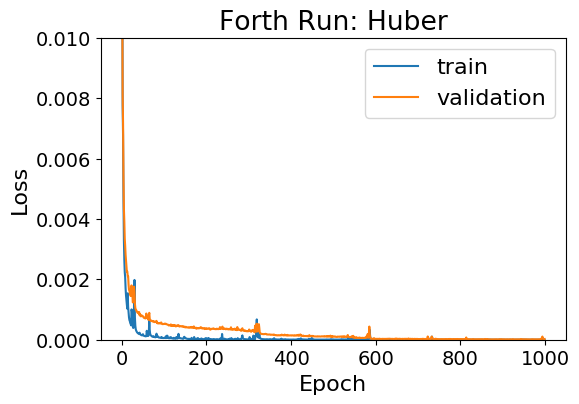

In [81]:
plot_loss(NN_huber)
plt.ylim([0,.01])
plt.title('Forth Run: Huber');

In [82]:
frt_run = huber.predict(test_features_norm)

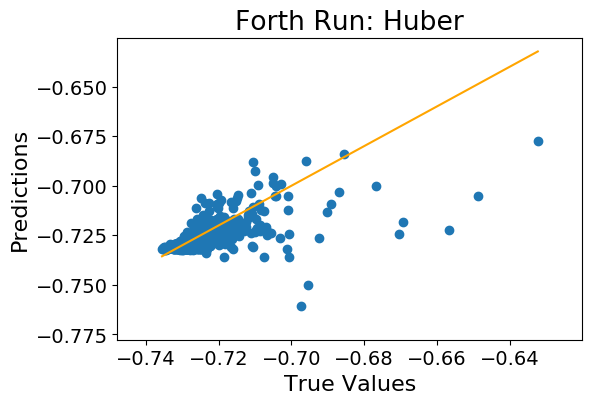

In [83]:
plot_predictions(frt_run)
plt.title('Forth Run: Huber');

In [216]:
evaluations_huber = {}

In [217]:
evaluations_huber['Huber'] = huber.evaluate(test_features_norm, test_labels)

evaluations_huber

34/34 [==============================] - 0s 1ms/step - loss: 2.1693e-05


{'Huber': 2.169277831853833e-05}

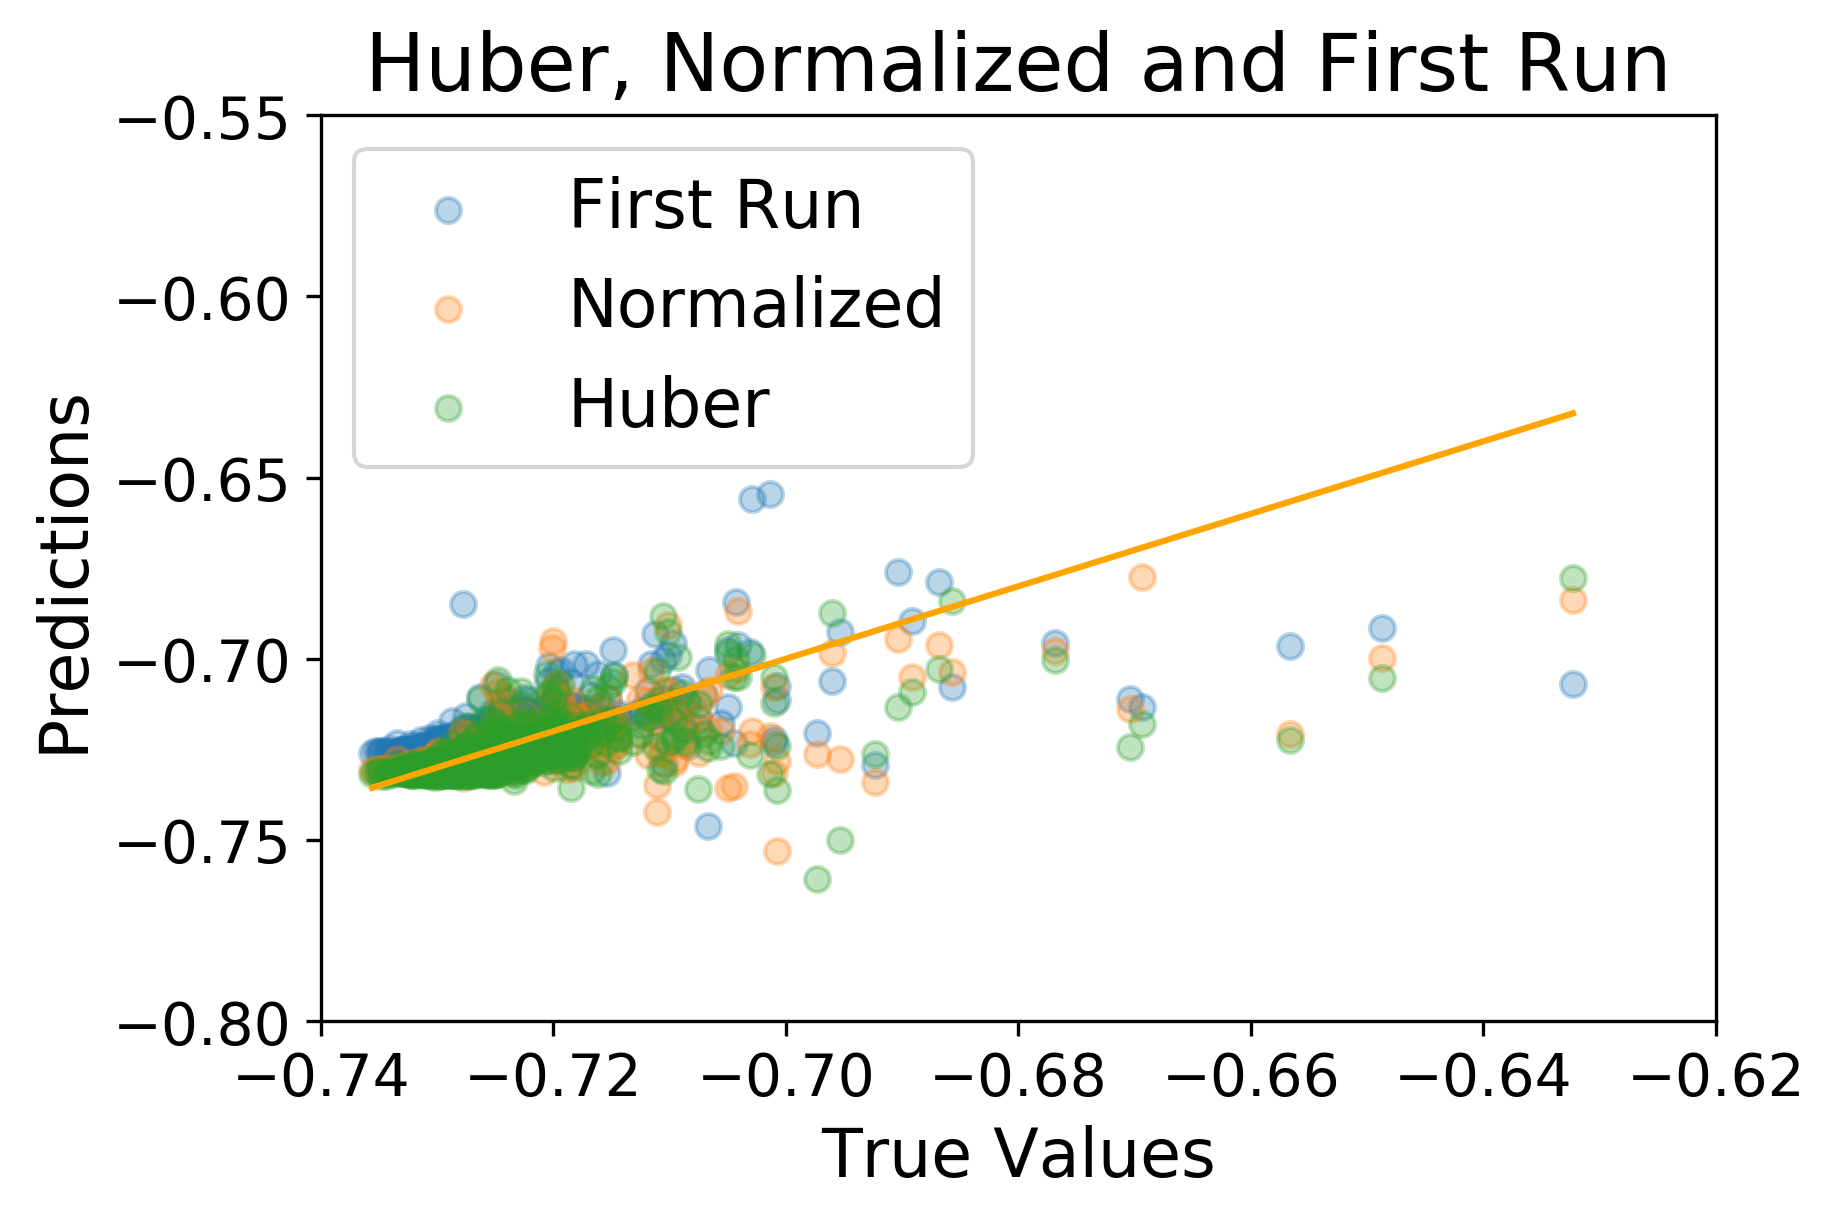

In [229]:
a = 0.3
plt.scatter(test_labels, first_run, label = 'First Run', alpha = a)
plt.scatter(test_labels, thr_run, label = 'Normalized', alpha = a)
plt.scatter(test_labels, frt_run, label = 'Huber', alpha = a)
plt.xlabel('True Values')
plt.ylabel('Predictions')
x = np.linspace(min(test_labels),max(test_labels))
plt.plot(x,x,c='orange')
plt.legend(loc='upper left')
plt.ylim([-.8,-.55])
plt.xlim([-.74,-.62])

plt.title('Huber, Normalized and First Run');

plt.savefig('W_Huber.png')

## Huber x2

# Cross-validating stuff

1) depth

2) batch size 

3) learning rate

## Depth cross-validation

In [115]:
depth = [2,3,4,5]
depth_evals = pd.DataFrame()

for d in depth: 
    depth = Sequential()
    depth.add(Dense(300, activation='relu', input_shape=(16,)))
    for layer in range(d-1):
        depth.add(Dense(300, activation='relu'))
    depth.add(Dense(1, activation='linear'))
    depth.compile(loss='huber', optimizer=optimizer)
    depth.summary()

    print('Starting depth = ', d)
    start = time.time()
#    NN_depth = depth.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 1000,  batch_size=200)
    it = str(d)+'_layers'
    ev = depth.evaluate(test_features_norm,test_labels)
    delt = str(datetime.timedelta(seconds=time.time()-start))
    depth_evals = depth_evals.append([[it,ev,delt]])


Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 300)               5100      
_________________________________________________________________
dense_172 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_173 (Dense)            (None, 1)                 301       
Total params: 95,701
Trainable params: 95,701
Non-trainable params: 0
_________________________________________________________________
Starting depth =  2
34/34 [==============================] - 0s 2ms/step - loss: 0.2644
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 300)               5100      
_________________________________________________________________
dens

Starting depth =  2
Epoch 1/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.0617 - val_loss: 0.0095
Epoch 2/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.0041
Epoch 3/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 4/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 9.7345e-04
Epoch 5/1000
18/18 [==============================] - 0s 8ms/step - loss: 5.3325e-04 - val_loss: 5.2480e-04
Epoch 6/1000
18/18 [==============================] - 0s 7ms/step - loss: 2.7616e-04 - val_loss: 3.4962e-04
Epoch 7/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.3128e-04 - val_loss: 2.8788e-04
Epoch 8/1000
18/18 [==============================] - 0s 7ms/step - loss: 1.3987e-04 - val_loss: 3.1305e-04
Epoch 9/1000
18/18 [==============================] - 0s 8ms/step - loss: 1.1216e-04 - val_loss: 2.6584e-04
Epoch 10/1000
18/18 [==============

Epoch 151/1000
18/18 [==============================] - 0s 7ms/step - loss: 4.3891e-06 - val_loss: 3.0422e-05
Epoch 152/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.8509e-06 - val_loss: 3.2108e-05
Epoch 153/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.2653e-06 - val_loss: 6.6073e-05
Epoch 154/1000
18/18 [==============================] - 0s 6ms/step - loss: 1.4456e-05 - val_loss: 3.1804e-05
Epoch 155/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.3464e-06 - val_loss: 3.1674e-05
Epoch 156/1000
18/18 [==============================] - 0s 7ms/step - loss: 3.2909e-06 - val_loss: 3.5009e-05
Epoch 157/1000
18/18 [==============================] - 0s 6ms/step - loss: 5.2956e-06 - val_loss: 4.3780e-05
Epoch 158/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.3424e-06 - val_loss: 2.7966e-05
Epoch 159/1000
18/18 [==============================] - 0s 6ms/step - loss: 5.8012e-06 - val_loss: 2.9243e-05
Epoch 160/

18/18 [==============================] - 0s 8ms/step - loss: 3.0102e-06 - val_loss: 1.3486e-05
Epoch 300/1000
18/18 [==============================] - 0s 7ms/step - loss: 2.9186e-06 - val_loss: 1.7599e-05
Epoch 301/1000
18/18 [==============================] - 0s 6ms/step - loss: 4.9053e-06 - val_loss: 1.1180e-05
Epoch 302/1000
18/18 [==============================] - 0s 7ms/step - loss: 4.9586e-06 - val_loss: 2.9831e-05
Epoch 303/1000
18/18 [==============================] - 0s 7ms/step - loss: 7.3982e-06 - val_loss: 1.0522e-05
Epoch 304/1000
18/18 [==============================] - 0s 6ms/step - loss: 4.4976e-06 - val_loss: 1.0934e-05
Epoch 305/1000
18/18 [==============================] - 0s 8ms/step - loss: 3.1105e-06 - val_loss: 1.2878e-05
Epoch 306/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.5172e-06 - val_loss: 1.3995e-05
Epoch 307/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.8142e-06 - val_loss: 1.5656e-05
Epoch 308/1000
18/18 [===

18/18 [==============================] - 0s 6ms/step - loss: 2.4433e-06 - val_loss: 1.4708e-05
Epoch 448/1000
18/18 [==============================] - 0s 6ms/step - loss: 5.5809e-06 - val_loss: 7.5008e-06
Epoch 449/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.7917e-06 - val_loss: 8.5672e-06
Epoch 450/1000
18/18 [==============================] - 0s 7ms/step - loss: 2.9616e-06 - val_loss: 1.0689e-05
Epoch 451/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.5415e-06 - val_loss: 7.4740e-06
Epoch 452/1000
18/18 [==============================] - 0s 7ms/step - loss: 3.0226e-06 - val_loss: 6.5621e-06
Epoch 453/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.1848e-06 - val_loss: 6.9346e-06
Epoch 454/1000
18/18 [==============================] - 0s 7ms/step - loss: 2.8549e-06 - val_loss: 6.8176e-06
Epoch 455/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.3575e-06 - val_loss: 1.2165e-05
Epoch 456/1000
18/18 [===

18/18 [==============================] - 0s 7ms/step - loss: 1.7374e-06 - val_loss: 6.5516e-06
Epoch 596/1000
18/18 [==============================] - 0s 6ms/step - loss: 1.7899e-06 - val_loss: 6.3537e-06
Epoch 597/1000
18/18 [==============================] - 0s 6ms/step - loss: 1.9137e-06 - val_loss: 6.2862e-06
Epoch 598/1000
18/18 [==============================] - 0s 6ms/step - loss: 1.6780e-06 - val_loss: 6.3828e-06
Epoch 599/1000
18/18 [==============================] - 0s 6ms/step - loss: 1.5744e-06 - val_loss: 6.1109e-06
Epoch 600/1000
18/18 [==============================] - 0s 7ms/step - loss: 1.6157e-06 - val_loss: 7.4539e-06
Epoch 601/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.3554e-06 - val_loss: 8.8752e-06
Epoch 602/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.0000e-06 - val_loss: 6.8146e-06
Epoch 603/1000
18/18 [==============================] - 0s 6ms/step - loss: 1.9957e-06 - val_loss: 6.1182e-06
Epoch 604/1000
18/18 [===

18/18 [==============================] - 0s 7ms/step - loss: 2.3004e-06 - val_loss: 7.9262e-06
Epoch 744/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.2366e-06 - val_loss: 7.1148e-06
Epoch 745/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.2293e-06 - val_loss: 7.1073e-06
Epoch 746/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.2861e-06 - val_loss: 1.6314e-05
Epoch 747/1000
18/18 [==============================] - 0s 6ms/step - loss: 1.0602e-05 - val_loss: 9.3107e-06
Epoch 748/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.1677e-06 - val_loss: 2.0835e-05
Epoch 749/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.7249e-06 - val_loss: 1.2514e-05
Epoch 750/1000
18/18 [==============================] - 0s 6ms/step - loss: 4.4661e-06 - val_loss: 1.1016e-05
Epoch 751/1000
18/18 [==============================] - 0s 7ms/step - loss: 3.8289e-06 - val_loss: 1.6322e-05
Epoch 752/1000
18/18 [===

18/18 [==============================] - 0s 6ms/step - loss: 3.7653e-06 - val_loss: 5.4288e-06
Epoch 892/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.4245e-06 - val_loss: 5.2152e-06
Epoch 893/1000
18/18 [==============================] - 0s 6ms/step - loss: 2.0721e-06 - val_loss: 9.8880e-06
Epoch 894/1000
18/18 [==============================] - 0s 7ms/step - loss: 4.3134e-06 - val_loss: 1.2334e-05
Epoch 895/1000
18/18 [==============================] - 0s 6ms/step - loss: 4.3186e-06 - val_loss: 5.5258e-06
Epoch 896/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.6809e-06 - val_loss: 8.8635e-06
Epoch 897/1000
18/18 [==============================] - 0s 7ms/step - loss: 4.0209e-06 - val_loss: 1.2591e-05
Epoch 898/1000
18/18 [==============================] - 0s 7ms/step - loss: 5.6093e-06 - val_loss: 1.3967e-05
Epoch 899/1000
18/18 [==============================] - 0s 6ms/step - loss: 4.7393e-06 - val_loss: 6.5209e-06
Epoch 900/1000
18/18 [===

18/18 [==============================] - 0s 9ms/step - loss: 9.6804e-06 - val_loss: 1.2689e-05
Epoch 40/1000
18/18 [==============================] - 0s 8ms/step - loss: 7.2110e-06 - val_loss: 1.7823e-05
Epoch 41/1000
18/18 [==============================] - 0s 8ms/step - loss: 9.4899e-06 - val_loss: 1.2248e-05
Epoch 42/1000
18/18 [==============================] - 0s 8ms/step - loss: 7.8783e-06 - val_loss: 1.5547e-05
Epoch 43/1000
18/18 [==============================] - 0s 8ms/step - loss: 1.0493e-05 - val_loss: 1.2099e-05
Epoch 44/1000
18/18 [==============================] - 0s 8ms/step - loss: 6.6062e-06 - val_loss: 1.2283e-05
Epoch 45/1000
18/18 [==============================] - 0s 8ms/step - loss: 6.3363e-06 - val_loss: 1.3542e-05
Epoch 46/1000
18/18 [==============================] - 0s 8ms/step - loss: 6.6077e-06 - val_loss: 1.8424e-05
Epoch 47/1000
18/18 [==============================] - 0s 8ms/step - loss: 9.9433e-06 - val_loss: 1.7521e-05
Epoch 48/1000
18/18 [============

18/18 [==============================] - 0s 9ms/step - loss: 3.6333e-06 - val_loss: 9.6100e-06
Epoch 115/1000
18/18 [==============================] - 0s 8ms/step - loss: 3.8381e-06 - val_loss: 1.9683e-05
Epoch 116/1000
18/18 [==============================] - 0s 8ms/step - loss: 6.1558e-06 - val_loss: 2.7834e-05
Epoch 117/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.2205e-05 - val_loss: 2.5553e-05
Epoch 118/1000
18/18 [==============================] - 0s 9ms/step - loss: 1.1286e-05 - val_loss: 1.5804e-05
Epoch 119/1000
18/18 [==============================] - 0s 8ms/step - loss: 6.2465e-06 - val_loss: 1.1657e-05
Epoch 120/1000
18/18 [==============================] - 0s 8ms/step - loss: 4.5667e-06 - val_loss: 9.9696e-06
Epoch 121/1000
18/18 [==============================] - 0s 8ms/step - loss: 4.1864e-06 - val_loss: 1.7833e-05
Epoch 122/1000
18/18 [==============================] - 0s 8ms/step - loss: 5.3859e-06 - val_loss: 1.5252e-05
Epoch 123/1000
18/18 [===

18/18 [==============================] - 0s 9ms/step - loss: 3.7619e-06 - val_loss: 1.5971e-05
Epoch 263/1000
18/18 [==============================] - 0s 8ms/step - loss: 4.7121e-06 - val_loss: 1.9324e-05
Epoch 264/1000
18/18 [==============================] - 0s 10ms/step - loss: 6.2340e-06 - val_loss: 8.8344e-06
Epoch 265/1000
18/18 [==============================] - 0s 9ms/step - loss: 3.1752e-06 - val_loss: 1.2606e-05
Epoch 266/1000
18/18 [==============================] - 0s 9ms/step - loss: 4.0573e-06 - val_loss: 8.1870e-06
Epoch 267/1000
18/18 [==============================] - 0s 9ms/step - loss: 3.0330e-06 - val_loss: 1.6959e-05
Epoch 268/1000
18/18 [==============================] - 0s 9ms/step - loss: 4.2150e-06 - val_loss: 9.8738e-06
Epoch 269/1000
18/18 [==============================] - 0s 9ms/step - loss: 3.7151e-06 - val_loss: 8.2150e-06
Epoch 270/1000
18/18 [==============================] - 0s 9ms/step - loss: 2.6796e-06 - val_loss: 1.3283e-05
Epoch 271/1000
18/18 [==

18/18 [==============================] - 0s 9ms/step - loss: 2.7667e-06 - val_loss: 7.4853e-06
Epoch 411/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.0087e-06 - val_loss: 3.1573e-05
Epoch 412/1000
18/18 [==============================] - 0s 9ms/step - loss: 7.2024e-06 - val_loss: 2.0267e-05
Epoch 413/1000
18/18 [==============================] - 0s 8ms/step - loss: 6.8026e-06 - val_loss: 1.5926e-05
Epoch 414/1000
18/18 [==============================] - 0s 8ms/step - loss: 5.5382e-06 - val_loss: 9.8849e-06
Epoch 415/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.8875e-06 - val_loss: 6.8667e-06
Epoch 416/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.0356e-06 - val_loss: 1.5686e-05
Epoch 417/1000
18/18 [==============================] - 0s 10ms/step - loss: 4.2405e-06 - val_loss: 1.0376e-05
Epoch 418/1000
18/18 [==============================] - 0s 9ms/step - loss: 2.7896e-06 - val_loss: 9.7864e-06
Epoch 419/1000
18/18 [==

18/18 [==============================] - 0s 9ms/step - loss: 6.8127e-06 - val_loss: 5.6476e-06
Epoch 559/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.5293e-06 - val_loss: 5.8115e-06
Epoch 560/1000
18/18 [==============================] - 0s 8ms/step - loss: 1.9273e-06 - val_loss: 8.2813e-06
Epoch 561/1000
18/18 [==============================] - 0s 8ms/step - loss: 6.0873e-06 - val_loss: 7.2386e-06
Epoch 562/1000
18/18 [==============================] - 0s 8ms/step - loss: 3.6105e-06 - val_loss: 6.3968e-06
Epoch 563/1000
18/18 [==============================] - 0s 8ms/step - loss: 3.0382e-06 - val_loss: 6.9095e-06
Epoch 564/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.5984e-06 - val_loss: 8.5073e-06
Epoch 565/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.9334e-06 - val_loss: 6.0658e-06
Epoch 566/1000
18/18 [==============================] - 0s 9ms/step - loss: 2.2059e-06 - val_loss: 9.7882e-06
Epoch 567/1000
18/18 [===

18/18 [==============================] - 0s 8ms/step - loss: 2.7871e-06 - val_loss: 6.2367e-06
Epoch 707/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.2891e-06 - val_loss: 1.1908e-05
Epoch 708/1000
18/18 [==============================] - 0s 8ms/step - loss: 3.5039e-06 - val_loss: 2.0432e-05
Epoch 709/1000
18/18 [==============================] - 0s 8ms/step - loss: 5.4089e-06 - val_loss: 9.6776e-06
Epoch 710/1000
18/18 [==============================] - 0s 8ms/step - loss: 3.2657e-06 - val_loss: 6.8725e-06
Epoch 711/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.3422e-06 - val_loss: 6.3751e-06
Epoch 712/1000
18/18 [==============================] - 0s 8ms/step - loss: 1.8946e-06 - val_loss: 3.0136e-05
Epoch 713/1000
18/18 [==============================] - 0s 8ms/step - loss: 8.0570e-06 - val_loss: 9.5765e-06
Epoch 714/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.8541e-06 - val_loss: 6.6446e-06
Epoch 715/1000
18/18 [==

18/18 [==============================] - 0s 8ms/step - loss: 2.3909e-06 - val_loss: 6.6329e-06
Epoch 855/1000
18/18 [==============================] - 0s 8ms/step - loss: 3.0092e-06 - val_loss: 1.7069e-05
Epoch 856/1000
18/18 [==============================] - 0s 8ms/step - loss: 5.2061e-06 - val_loss: 2.2798e-05
Epoch 857/1000
18/18 [==============================] - 0s 9ms/step - loss: 8.0076e-06 - val_loss: 1.3683e-05
Epoch 858/1000
18/18 [==============================] - 0s 8ms/step - loss: 4.2724e-06 - val_loss: 9.2597e-06
Epoch 859/1000
18/18 [==============================] - 0s 8ms/step - loss: 2.5864e-06 - val_loss: 6.7557e-06
Epoch 860/1000
18/18 [==============================] - 0s 8ms/step - loss: 1.8778e-06 - val_loss: 9.2123e-06
Epoch 861/1000
18/18 [==============================] - 0s 8ms/step - loss: 3.0631e-06 - val_loss: 7.7635e-06
Epoch 862/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.2835e-06 - val_loss: 7.6929e-06
Epoch 863/1000
18/18 [==

Epoch 2/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.0034 - val_loss: 9.7442e-04
Epoch 3/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.4344e-04 - val_loss: 2.3895e-04
Epoch 4/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.5944e-04 - val_loss: 1.2714e-04
Epoch 5/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.0743e-04 - val_loss: 9.5841e-05
Epoch 6/1000
18/18 [==============================] - 0s 10ms/step - loss: 6.4865e-05 - val_loss: 6.1861e-05
Epoch 7/1000
18/18 [==============================] - 0s 10ms/step - loss: 4.5470e-05 - val_loss: 5.7076e-05
Epoch 8/1000
18/18 [==============================] - 0s 10ms/step - loss: 4.3649e-05 - val_loss: 4.2358e-05
Epoch 9/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.9052e-05 - val_loss: 3.0536e-05
Epoch 10/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.1639e-05 - val_loss: 3.4893e-05
Epoch 11/1000
18/18 [=

18/18 [==============================] - 0s 10ms/step - loss: 2.9236e-06 - val_loss: 1.1491e-05
Epoch 151/1000
18/18 [==============================] - 0s 10ms/step - loss: 4.3741e-06 - val_loss: 9.3973e-06
Epoch 152/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.9992e-06 - val_loss: 8.7444e-06
Epoch 153/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.8159e-06 - val_loss: 8.8701e-06
Epoch 154/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.6782e-06 - val_loss: 9.4899e-06
Epoch 155/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.7470e-06 - val_loss: 8.8024e-06
Epoch 156/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.5500e-06 - val_loss: 8.9518e-06
Epoch 157/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.6094e-06 - val_loss: 8.9968e-06
Epoch 158/1000
18/18 [==============================] - 0s 9ms/step - loss: 2.9168e-06 - val_loss: 8.9228e-06
Epoch 159/1000
18

Epoch 224/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.2170e-06 - val_loss: 1.1174e-05
Epoch 225/1000
18/18 [==============================] - 0s 10ms/step - loss: 3.0653e-06 - val_loss: 8.1709e-06
Epoch 226/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.1851e-06 - val_loss: 9.2381e-06
Epoch 227/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.3585e-06 - val_loss: 8.3797e-06
Epoch 228/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.1721e-06 - val_loss: 9.2932e-06
Epoch 229/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.2340e-06 - val_loss: 1.4605e-05
Epoch 230/1000
18/18 [==============================] - 0s 10ms/step - loss: 3.8716e-06 - val_loss: 1.2024e-05
Epoch 231/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.7067e-06 - val_loss: 1.3445e-05
Epoch 232/1000
18/18 [==============================] - 0s 10ms/step - loss: 3.0672e-06 - val_loss: 1.0537e-05
E

Epoch 298/1000
18/18 [==============================] - 0s 10ms/step - loss: 4.6877e-06 - val_loss: 9.3201e-06
Epoch 299/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.2571e-06 - val_loss: 9.9935e-06
Epoch 300/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.4134e-06 - val_loss: 8.2007e-06
Epoch 301/1000
18/18 [==============================] - 0s 9ms/step - loss: 1.8202e-06 - val_loss: 9.6904e-06
Epoch 302/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.0845e-06 - val_loss: 8.5062e-06
Epoch 303/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.7207e-06 - val_loss: 1.8439e-05
Epoch 304/1000
18/18 [==============================] - 0s 10ms/step - loss: 5.3546e-06 - val_loss: 7.9247e-06
Epoch 305/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.8602e-06 - val_loss: 1.0131e-05
Epoch 306/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.4416e-06 - val_loss: 1.0753e-05
Ep

Epoch 372/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.7200e-06 - val_loss: 9.8963e-06
Epoch 373/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.8948e-06 - val_loss: 7.3992e-06
Epoch 374/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.9581e-06 - val_loss: 7.5429e-06
Epoch 375/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.0306e-06 - val_loss: 1.2079e-05
Epoch 376/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.9250e-06 - val_loss: 1.7562e-05
Epoch 377/1000
18/18 [==============================] - 0s 10ms/step - loss: 4.4784e-06 - val_loss: 1.1365e-05
Epoch 378/1000
18/18 [==============================] - 0s 10ms/step - loss: 3.6294e-06 - val_loss: 1.1246e-05
Epoch 379/1000
18/18 [==============================] - 0s 10ms/step - loss: 5.1951e-06 - val_loss: 4.4411e-05
Epoch 380/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.2954e-05 - val_loss: 2.1856e-05
E

Epoch 446/1000
18/18 [==============================] - 0s 12ms/step - loss: 7.4406e-06 - val_loss: 2.3716e-05
Epoch 447/1000
18/18 [==============================] - 0s 12ms/step - loss: 7.2069e-06 - val_loss: 3.0277e-05
Epoch 448/1000
18/18 [==============================] - 0s 15ms/step - loss: 8.0835e-06 - val_loss: 1.4235e-05
Epoch 449/1000
18/18 [==============================] - 0s 15ms/step - loss: 3.8810e-06 - val_loss: 7.6042e-06
Epoch 450/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1657e-06 - val_loss: 8.2667e-06
Epoch 451/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.6694e-06 - val_loss: 1.5038e-05
Epoch 452/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.8766e-06 - val_loss: 7.7055e-06
Epoch 453/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.8798e-06 - val_loss: 2.0501e-05
Epoch 454/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.8925e-06 - val_loss: 1.9547e-05
E

Epoch 520/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.1364e-06 - val_loss: 8.5379e-06
Epoch 521/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.7861e-06 - val_loss: 1.1720e-05
Epoch 522/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.2430e-06 - val_loss: 8.3141e-06
Epoch 523/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.7330e-06 - val_loss: 1.4999e-05
Epoch 524/1000
18/18 [==============================] - 0s 10ms/step - loss: 4.0783e-06 - val_loss: 1.1587e-05
Epoch 525/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.8456e-06 - val_loss: 1.0675e-05
Epoch 526/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.4838e-06 - val_loss: 2.7306e-05
Epoch 527/1000
18/18 [==============================] - 0s 10ms/step - loss: 6.2669e-06 - val_loss: 7.9690e-06
Epoch 528/1000
18/18 [==============================] - 0s 10ms/step - loss: 2.0234e-06 - val_loss: 1.2624e-05
E

Epoch 594/1000
18/18 [==============================] - 0s 12ms/step - loss: 5.0540e-06 - val_loss: 6.5783e-06
Epoch 595/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.9240e-06 - val_loss: 7.4646e-06
Epoch 596/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.2383e-06 - val_loss: 1.6973e-05
Epoch 597/1000
18/18 [==============================] - 0s 12ms/step - loss: 4.5299e-06 - val_loss: 1.0229e-05
Epoch 598/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.6760e-06 - val_loss: 6.4655e-06
Epoch 599/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.5176e-06 - val_loss: 1.0552e-05
Epoch 600/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.6965e-06 - val_loss: 8.5644e-06
Epoch 601/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.4384e-06 - val_loss: 6.6871e-06
Epoch 602/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.9739e-06 - val_loss: 6.8978e-06
E

Epoch 668/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.0012e-06 - val_loss: 9.2216e-06
Epoch 669/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.4839e-06 - val_loss: 1.6206e-05
Epoch 670/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.0846e-05 - val_loss: 7.8440e-06
Epoch 671/1000
18/18 [==============================] - 0s 11ms/step - loss: 5.1476e-06 - val_loss: 1.0792e-05
Epoch 672/1000
18/18 [==============================] - 0s 12ms/step - loss: 4.2780e-06 - val_loss: 1.0907e-05
Epoch 673/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.3457e-06 - val_loss: 6.3413e-06
Epoch 674/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.1236e-06 - val_loss: 5.5498e-06
Epoch 675/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.9645e-06 - val_loss: 1.1187e-05
Epoch 676/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.7915e-06 - val_loss: 8.6023e-06
E

Epoch 742/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.0581e-06 - val_loss: 1.2816e-05
Epoch 743/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.8555e-06 - val_loss: 6.5732e-06
Epoch 744/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.9038e-06 - val_loss: 2.7784e-05
Epoch 745/1000
18/18 [==============================] - 0s 11ms/step - loss: 8.9184e-06 - val_loss: 2.3574e-05
Epoch 746/1000
18/18 [==============================] - 0s 12ms/step - loss: 7.2418e-06 - val_loss: 1.2477e-05
Epoch 747/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.7019e-06 - val_loss: 6.1707e-06
Epoch 748/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.4115e-06 - val_loss: 6.6406e-06
Epoch 749/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.5822e-06 - val_loss: 8.9044e-06
Epoch 750/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.3947e-06 - val_loss: 2.2495e-05
E

Epoch 816/1000
18/18 [==============================] - 0s 12ms/step - loss: 4.8733e-06 - val_loss: 5.6500e-06
Epoch 817/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.5008e-06 - val_loss: 5.9621e-06
Epoch 818/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.9394e-06 - val_loss: 1.5161e-05
Epoch 819/1000
18/18 [==============================] - 0s 11ms/step - loss: 5.1268e-06 - val_loss: 7.9449e-06
Epoch 820/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.7017e-06 - val_loss: 6.6944e-06
Epoch 821/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.0603e-06 - val_loss: 1.2671e-05
Epoch 822/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.5566e-06 - val_loss: 1.0878e-05
Epoch 823/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.4265e-06 - val_loss: 6.7502e-06
Epoch 824/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.7320e-06 - val_loss: 8.8714e-06
E

Epoch 890/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.7983e-06 - val_loss: 6.0227e-06
Epoch 891/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.6582e-06 - val_loss: 6.4344e-06
Epoch 892/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.9467e-06 - val_loss: 6.7610e-06
Epoch 893/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.9638e-06 - val_loss: 3.1237e-05
Epoch 894/1000
18/18 [==============================] - 0s 12ms/step - loss: 8.8485e-06 - val_loss: 2.3399e-05
Epoch 895/1000
18/18 [==============================] - 0s 11ms/step - loss: 5.9108e-06 - val_loss: 5.6702e-06
Epoch 896/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.3745e-06 - val_loss: 7.2106e-06
Epoch 897/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.9791e-06 - val_loss: 5.6194e-06
Epoch 898/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.4623e-06 - val_loss: 1.7321e-05
E

Epoch 964/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.6369e-06 - val_loss: 6.4465e-06
Epoch 965/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.4220e-06 - val_loss: 6.3581e-06
Epoch 966/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.4528e-06 - val_loss: 6.2117e-06
Epoch 967/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.2790e-06 - val_loss: 6.2564e-06
Epoch 968/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.2391e-06 - val_loss: 6.3691e-06
Epoch 969/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.2199e-06 - val_loss: 7.0667e-06
Epoch 970/1000
18/18 [==============================] - 0s 14ms/step - loss: 1.3605e-06 - val_loss: 1.7269e-05
Epoch 971/1000
18/18 [==============================] - 0s 12ms/step - loss: 4.9091e-06 - val_loss: 1.0491e-05
Epoch 972/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.3066e-06 - val_loss: 8.5854e-06
E

18/18 [==============================] - 0s 13ms/step - loss: 3.4912e-06 - val_loss: 7.3504e-06
Epoch 112/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.2524e-06 - val_loss: 8.3991e-06
Epoch 113/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.7283e-06 - val_loss: 1.9643e-05
Epoch 114/1000
18/18 [==============================] - 0s 13ms/step - loss: 9.8695e-06 - val_loss: 8.5023e-06
Epoch 115/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.2379e-06 - val_loss: 7.8727e-06
Epoch 116/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.2204e-06 - val_loss: 7.5210e-06
Epoch 117/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.0314e-06 - val_loss: 7.3840e-06
Epoch 118/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.9760e-06 - val_loss: 1.2153e-05
Epoch 119/1000
18/18 [==============================] - 0s 13ms/step - loss: 5.3809e-06 - val_loss: 8.2363e-06
Epoch 120/1000
1

Epoch 185/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.9870e-06 - val_loss: 1.4945e-05
Epoch 186/1000
18/18 [==============================] - 0s 13ms/step - loss: 5.4126e-06 - val_loss: 1.0466e-05
Epoch 187/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.4421e-06 - val_loss: 7.5234e-06
Epoch 188/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.5843e-06 - val_loss: 1.2822e-05
Epoch 189/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.9312e-06 - val_loss: 1.0536e-05
Epoch 190/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.3209e-06 - val_loss: 1.4746e-05
Epoch 191/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.5225e-06 - val_loss: 7.9695e-06
Epoch 192/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.6797e-06 - val_loss: 7.7957e-06
Epoch 193/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.4557e-06 - val_loss: 6.8832e-06
E

Epoch 259/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1888e-06 - val_loss: 1.0728e-05
Epoch 260/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.1689e-06 - val_loss: 7.5201e-06
Epoch 261/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1257e-06 - val_loss: 9.1193e-06
Epoch 262/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.4710e-06 - val_loss: 8.2989e-06
Epoch 263/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.4269e-06 - val_loss: 8.5090e-06
Epoch 264/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.3332e-06 - val_loss: 7.4240e-06
Epoch 265/1000
18/18 [==============================] - 0s 14ms/step - loss: 2.4589e-06 - val_loss: 7.1982e-06
Epoch 266/1000
18/18 [==============================] - 0s 14ms/step - loss: 1.9252e-06 - val_loss: 6.8577e-06
Epoch 267/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.7942e-06 - val_loss: 1.0628e-05
E

Epoch 333/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.1039e-06 - val_loss: 6.3700e-06
Epoch 334/1000
18/18 [==============================] - 0s 15ms/step - loss: 1.8782e-06 - val_loss: 6.6980e-06
Epoch 335/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.9747e-06 - val_loss: 1.0652e-05
Epoch 336/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.7193e-06 - val_loss: 6.4299e-06
Epoch 337/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.8653e-06 - val_loss: 1.0941e-05
Epoch 338/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.2858e-06 - val_loss: 2.5029e-05
Epoch 339/1000
18/18 [==============================] - 0s 13ms/step - loss: 6.9228e-06 - val_loss: 8.2690e-06
Epoch 340/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.7096e-06 - val_loss: 1.5568e-05
Epoch 341/1000
18/18 [==============================] - 0s 14ms/step - loss: 4.4177e-06 - val_loss: 7.0292e-06
E

Epoch 407/1000
18/18 [==============================] - 0s 14ms/step - loss: 1.7300e-06 - val_loss: 2.5175e-05
Epoch 408/1000
18/18 [==============================] - 0s 13ms/step - loss: 6.1171e-06 - val_loss: 1.5808e-05
Epoch 409/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.0604e-06 - val_loss: 6.1018e-06
Epoch 410/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.7608e-06 - val_loss: 6.7445e-06
Epoch 411/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.8573e-06 - val_loss: 1.5560e-05
Epoch 412/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.6509e-06 - val_loss: 1.4282e-05
Epoch 413/1000
18/18 [==============================] - 0s 13ms/step - loss: 5.4241e-06 - val_loss: 2.2585e-05
Epoch 414/1000
18/18 [==============================] - 0s 14ms/step - loss: 6.2820e-06 - val_loss: 6.1282e-06
Epoch 415/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.6890e-06 - val_loss: 1.1374e-05
E

Epoch 481/1000
18/18 [==============================] - 0s 15ms/step - loss: 3.3123e-06 - val_loss: 9.5911e-06
Epoch 482/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.5534e-06 - val_loss: 1.1995e-05
Epoch 483/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.1538e-06 - val_loss: 7.1588e-06
Epoch 484/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.5027e-06 - val_loss: 8.6203e-06
Epoch 485/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.9623e-06 - val_loss: 2.7795e-05
Epoch 486/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.0244e-05 - val_loss: 6.7100e-06
Epoch 487/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.2564e-06 - val_loss: 5.6022e-06
Epoch 488/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.5239e-06 - val_loss: 8.3578e-06
Epoch 489/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.2885e-06 - val_loss: 8.4636e-06
E

Epoch 555/1000
18/18 [==============================] - 0s 13ms/step - loss: 6.0639e-06 - val_loss: 4.9431e-06
Epoch 556/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1379e-06 - val_loss: 4.8777e-06
Epoch 557/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.7060e-06 - val_loss: 4.8001e-06
Epoch 558/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.7063e-06 - val_loss: 2.0651e-05
Epoch 559/1000
18/18 [==============================] - 0s 13ms/step - loss: 6.1145e-06 - val_loss: 5.6222e-06
Epoch 560/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.2745e-06 - val_loss: 6.8765e-06
Epoch 561/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.0183e-06 - val_loss: 1.1000e-05
Epoch 562/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.0632e-06 - val_loss: 1.0902e-05
Epoch 563/1000
18/18 [==============================] - 0s 14ms/step - loss: 3.7298e-06 - val_loss: 7.3509e-06
E

Epoch 629/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.5267e-06 - val_loss: 6.0307e-06
Epoch 630/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.7336e-06 - val_loss: 5.3648e-06
Epoch 631/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.5323e-06 - val_loss: 7.8535e-06
Epoch 632/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1094e-06 - val_loss: 1.0358e-05
Epoch 633/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.4145e-06 - val_loss: 5.6953e-06
Epoch 634/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.4717e-06 - val_loss: 5.6812e-06
Epoch 635/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.4295e-06 - val_loss: 8.6371e-06
Epoch 636/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.2701e-06 - val_loss: 1.5904e-05
Epoch 637/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.3387e-06 - val_loss: 9.7767e-06
E

Epoch 703/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.0305e-06 - val_loss: 8.3314e-06
Epoch 704/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.4100e-06 - val_loss: 5.2367e-06
Epoch 705/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.0271e-06 - val_loss: 1.3346e-05
Epoch 706/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.2538e-06 - val_loss: 3.0944e-05
Epoch 707/1000
18/18 [==============================] - 0s 13ms/step - loss: 8.2111e-06 - val_loss: 1.5079e-05
Epoch 708/1000
18/18 [==============================] - 0s 13ms/step - loss: 7.0873e-06 - val_loss: 8.7214e-06
Epoch 709/1000
18/18 [==============================] - 0s 15ms/step - loss: 5.2900e-06 - val_loss: 6.4607e-06
Epoch 710/1000
18/18 [==============================] - 0s 14ms/step - loss: 2.7327e-06 - val_loss: 5.4702e-06
Epoch 711/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.0837e-06 - val_loss: 8.3278e-06
E

Epoch 777/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1001e-06 - val_loss: 6.2266e-06
Epoch 778/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.6701e-06 - val_loss: 1.0521e-05
Epoch 779/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.6752e-06 - val_loss: 6.5591e-06
Epoch 780/1000
18/18 [==============================] - 0s 14ms/step - loss: 1.8148e-06 - val_loss: 8.6226e-06
Epoch 781/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.2098e-06 - val_loss: 9.0790e-06
Epoch 782/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.3389e-06 - val_loss: 7.4295e-06
Epoch 783/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1446e-06 - val_loss: 7.5972e-06
Epoch 784/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1716e-06 - val_loss: 7.3159e-06
Epoch 785/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.0334e-06 - val_loss: 7.1848e-06
E

Epoch 851/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.0862e-06 - val_loss: 9.4421e-06
Epoch 852/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.8479e-06 - val_loss: 9.0122e-06
Epoch 853/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.3755e-06 - val_loss: 1.1178e-05
Epoch 854/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.5421e-06 - val_loss: 7.6234e-06
Epoch 855/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.4978e-06 - val_loss: 9.5082e-06
Epoch 856/1000
18/18 [==============================] - 0s 19ms/step - loss: 2.4896e-06 - val_loss: 6.3050e-06
Epoch 857/1000
18/18 [==============================] - 0s 14ms/step - loss: 1.4099e-06 - val_loss: 2.5801e-05
Epoch 858/1000
18/18 [==============================] - 0s 13ms/step - loss: 8.2712e-06 - val_loss: 5.7211e-06
Epoch 859/1000
18/18 [==============================] - 0s 14ms/step - loss: 2.3078e-06 - val_loss: 8.3860e-06
E

Epoch 925/1000
18/18 [==============================] - 0s 14ms/step - loss: 5.4470e-06 - val_loss: 8.3458e-06
Epoch 926/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.3084e-06 - val_loss: 8.1314e-06
Epoch 927/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.5956e-06 - val_loss: 9.7083e-06
Epoch 928/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.3955e-06 - val_loss: 1.0445e-05
Epoch 929/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.0370e-06 - val_loss: 1.0637e-05
Epoch 930/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.8188e-06 - val_loss: 6.1079e-06
Epoch 931/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.6173e-06 - val_loss: 1.8526e-05
Epoch 932/1000
18/18 [==============================] - 0s 13ms/step - loss: 7.1181e-06 - val_loss: 9.7670e-06
Epoch 933/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.1997e-06 - val_loss: 6.3052e-06
E

Epoch 999/1000
18/18 [==============================] - 0s 13ms/step - loss: 6.8985e-06 - val_loss: 2.8293e-05
Epoch 1000/1000
34/34 [==============================] - 0s 2ms/step - loss: 1.4148e-05





0         1               2
0  2_layers  0.000017  0:02:09.368851
0  3_layers  0.000021  0:02:48.220208
0  4_layers  0.000011  0:03:34.526410
0  5_layers  0.000014  0:04:20.263349

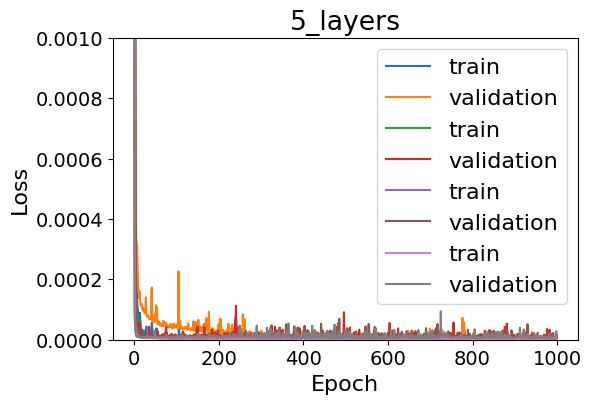

In [114]:
depth = [2,3,4,5]
depth_evals = pd.DataFrame()

for d in depth: 
    depth = Sequential()
    depth.add(Dense(300, activation='relu', input_shape=(16,)))
    for layer in range(d):
        depth.add(Dense(300, activation='relu'))
    depth.add(Dense(1, activation='linear'))
    depth.compile(loss='huber', optimizer=optimizer)

    print('Starting depth = ', d)
    start = time.time()
    NN_depth = depth.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 1000,  batch_size=200)
    it = str(d)+'_layers'
    ev = depth.evaluate(test_features_norm,test_labels)
    delt = str(datetime.timedelta(seconds=time.time()-start))
    depth_evals = depth_evals.append([[it,ev,delt]])
    plot_loss(NN_depth)
    plt.ylim([0,.001])
    plt.title(it)
    #plt.show();
    print('\n\n'),
    
depth_evals

Starting depth =  4
Epoch 1/1000
18/18 [==============================] - 0s 19ms/step - loss: 0.1145 - val_loss: 0.0132
Epoch 2/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.0037 - val_loss: 6.2280e-04
Epoch 3/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.2582e-04 - val_loss: 2.7697e-04
Epoch 4/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.5611e-04 - val_loss: 1.0011e-04
Epoch 5/1000
18/18 [==============================] - 0s 12ms/step - loss: 8.1504e-05 - val_loss: 6.9224e-05
Epoch 6/1000
18/18 [==============================] - 0s 12ms/step - loss: 5.4767e-05 - val_loss: 4.9158e-05
Epoch 7/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.9977e-05 - val_loss: 3.6181e-05
Epoch 8/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.1689e-05 - val_loss: 3.2281e-05
Epoch 9/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.6502e-05 - val_loss: 2.4907e-05
Epoch 10/10

18/18 [==============================] - 0s 11ms/step - loss: 3.3291e-06 - val_loss: 1.0288e-05
Epoch 150/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.5669e-06 - val_loss: 8.9986e-06
Epoch 151/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.9003e-06 - val_loss: 1.0591e-05
Epoch 152/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.9031e-06 - val_loss: 1.2355e-05
Epoch 153/1000
18/18 [==============================] - 0s 12ms/step - loss: 5.4302e-06 - val_loss: 8.9299e-06
Epoch 154/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.9332e-06 - val_loss: 9.0812e-06
Epoch 155/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.0140e-06 - val_loss: 9.8174e-06
Epoch 156/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.1643e-06 - val_loss: 9.1321e-06
Epoch 157/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.8943e-06 - val_loss: 1.4969e-05
Epoch 158/1000
1

Epoch 223/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.3972e-06 - val_loss: 1.3074e-05
Epoch 224/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.3628e-06 - val_loss: 8.8727e-06
Epoch 225/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.7059e-06 - val_loss: 1.9421e-05
Epoch 226/1000
18/18 [==============================] - 0s 11ms/step - loss: 5.9004e-06 - val_loss: 1.2094e-05
Epoch 227/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.0859e-06 - val_loss: 1.5119e-05
Epoch 228/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.9494e-06 - val_loss: 8.6286e-06
Epoch 229/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.4971e-06 - val_loss: 1.4128e-05
Epoch 230/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.6715e-06 - val_loss: 8.6719e-06
Epoch 231/1000
18/18 [==============================] - 0s 12ms/step - loss: 4.2966e-06 - val_loss: 1.0076e-05
E

Epoch 297/1000
18/18 [==============================] - 0s 12ms/step - loss: 4.2673e-06 - val_loss: 1.1612e-05
Epoch 298/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.4025e-06 - val_loss: 9.3725e-06
Epoch 299/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.3140e-06 - val_loss: 9.3928e-06
Epoch 300/1000
18/18 [==============================] - 0s 14ms/step - loss: 2.2358e-06 - val_loss: 3.4358e-05
Epoch 301/1000
18/18 [==============================] - 0s 12ms/step - loss: 8.2982e-06 - val_loss: 1.0267e-05
Epoch 302/1000
18/18 [==============================] - 0s 10ms/step - loss: 3.9432e-06 - val_loss: 1.6363e-05
Epoch 303/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.3896e-06 - val_loss: 1.3570e-05
Epoch 304/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.2758e-06 - val_loss: 1.6044e-05
Epoch 305/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.9612e-06 - val_loss: 9.0791e-06
E

Epoch 371/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.2796e-06 - val_loss: 1.0760e-05
Epoch 372/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.1289e-06 - val_loss: 9.1682e-06
Epoch 373/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.2711e-06 - val_loss: 1.1639e-05
Epoch 374/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.7806e-06 - val_loss: 8.9628e-06
Epoch 375/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.2359e-06 - val_loss: 8.6114e-06
Epoch 376/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.6537e-06 - val_loss: 9.7708e-06
Epoch 377/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.7782e-06 - val_loss: 9.8263e-06
Epoch 378/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.0627e-06 - val_loss: 1.0639e-05
Epoch 379/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.4859e-06 - val_loss: 9.0199e-06
E

Epoch 445/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.0433e-06 - val_loss: 2.6257e-05
Epoch 446/1000
18/18 [==============================] - 0s 11ms/step - loss: 6.8595e-06 - val_loss: 8.6691e-06
Epoch 447/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.5575e-06 - val_loss: 1.9575e-05
Epoch 448/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.6929e-06 - val_loss: 8.7397e-06
Epoch 449/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.8556e-06 - val_loss: 8.7273e-06
Epoch 450/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.6973e-06 - val_loss: 8.9602e-06
Epoch 451/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.9228e-06 - val_loss: 2.3804e-05
Epoch 452/1000
18/18 [==============================] - 0s 11ms/step - loss: 5.6714e-06 - val_loss: 2.7247e-05
Epoch 453/1000
18/18 [==============================] - 0s 11ms/step - loss: 8.6160e-06 - val_loss: 1.1495e-05
E

Epoch 519/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.7426e-06 - val_loss: 1.8906e-05
Epoch 520/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.9185e-06 - val_loss: 1.4550e-05
Epoch 521/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.0392e-06 - val_loss: 4.9034e-05
Epoch 522/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.4253e-05 - val_loss: 1.3927e-05
Epoch 523/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.8689e-06 - val_loss: 1.5735e-05
Epoch 524/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.8530e-06 - val_loss: 8.2346e-06
Epoch 525/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.2014e-06 - val_loss: 1.8094e-05
Epoch 526/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.6994e-06 - val_loss: 1.1015e-05
Epoch 527/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.0194e-06 - val_loss: 2.0959e-05
E

Epoch 593/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.9045e-06 - val_loss: 8.0172e-06
Epoch 594/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.7497e-06 - val_loss: 9.9527e-06
Epoch 595/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.0084e-06 - val_loss: 8.4733e-06
Epoch 596/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.9700e-06 - val_loss: 7.8963e-06
Epoch 597/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.6271e-06 - val_loss: 1.1381e-05
Epoch 598/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.3383e-06 - val_loss: 1.0100e-05
Epoch 599/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.8292e-06 - val_loss: 8.4565e-06
Epoch 600/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.2689e-06 - val_loss: 8.1743e-06
Epoch 601/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.5496e-06 - val_loss: 7.9472e-06
E

Epoch 667/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.1501e-06 - val_loss: 1.3957e-05
Epoch 668/1000
18/18 [==============================] - 0s 11ms/step - loss: 4.3705e-06 - val_loss: 1.4552e-05
Epoch 669/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.4122e-06 - val_loss: 2.0253e-05
Epoch 670/1000
18/18 [==============================] - 0s 11ms/step - loss: 6.1254e-06 - val_loss: 3.7887e-05
Epoch 671/1000
18/18 [==============================] - 0s 12ms/step - loss: 9.8293e-06 - val_loss: 1.9383e-05
Epoch 672/1000
18/18 [==============================] - 0s 12ms/step - loss: 8.4448e-06 - val_loss: 7.8898e-06
Epoch 673/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.1415e-06 - val_loss: 6.7158e-06
Epoch 674/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.9184e-06 - val_loss: 8.4746e-06
Epoch 675/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.0093e-06 - val_loss: 8.6346e-06
E

Epoch 741/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.9448e-06 - val_loss: 1.4895e-05
Epoch 742/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.6544e-06 - val_loss: 8.0130e-06
Epoch 743/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.9778e-06 - val_loss: 7.5494e-06
Epoch 744/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.6212e-06 - val_loss: 7.6492e-06
Epoch 745/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.5159e-06 - val_loss: 7.4009e-06
Epoch 746/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.0925e-06 - val_loss: 7.4761e-06
Epoch 747/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.3612e-06 - val_loss: 7.4606e-06
Epoch 748/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.9569e-06 - val_loss: 6.6035e-06
Epoch 749/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.4465e-06 - val_loss: 6.7461e-06
E

Epoch 815/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.3934e-06 - val_loss: 1.4259e-05
Epoch 816/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.5560e-06 - val_loss: 6.2177e-06
Epoch 817/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.8860e-06 - val_loss: 3.0119e-05
Epoch 818/1000
18/18 [==============================] - 0s 11ms/step - loss: 9.4482e-06 - val_loss: 8.7452e-06
Epoch 819/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.7658e-06 - val_loss: 6.2701e-06
Epoch 820/1000
18/18 [==============================] - 0s 11ms/step - loss: 3.3498e-06 - val_loss: 1.9764e-05
Epoch 821/1000
18/18 [==============================] - 0s 11ms/step - loss: 7.7734e-06 - val_loss: 3.4562e-05
Epoch 822/1000
18/18 [==============================] - 0s 11ms/step - loss: 8.3405e-06 - val_loss: 8.3461e-06
Epoch 823/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.6447e-06 - val_loss: 6.7038e-06
E

Epoch 889/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.4070e-06 - val_loss: 7.1133e-06
Epoch 890/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.3951e-06 - val_loss: 7.0031e-06
Epoch 891/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.4383e-06 - val_loss: 8.5040e-06
Epoch 892/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.9521e-06 - val_loss: 2.2465e-05
Epoch 893/1000
18/18 [==============================] - 0s 11ms/step - loss: 5.1828e-06 - val_loss: 7.8692e-06
Epoch 894/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.6486e-06 - val_loss: 7.4502e-06
Epoch 895/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.7993e-06 - val_loss: 7.3900e-06
Epoch 896/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.4384e-06 - val_loss: 1.3332e-05
Epoch 897/1000
18/18 [==============================] - 0s 11ms/step - loss: 2.8907e-06 - val_loss: 7.2898e-06
E

Epoch 963/1000
18/18 [==============================] - 0s 12ms/step - loss: 5.0189e-06 - val_loss: 1.4977e-05
Epoch 964/1000
18/18 [==============================] - 0s 12ms/step - loss: 4.1012e-06 - val_loss: 6.4634e-06
Epoch 965/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.9651e-06 - val_loss: 1.0048e-05
Epoch 966/1000
18/18 [==============================] - 0s 12ms/step - loss: 3.1001e-06 - val_loss: 6.3837e-06
Epoch 967/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.9158e-06 - val_loss: 6.8613e-06
Epoch 968/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.7188e-06 - val_loss: 6.1356e-06
Epoch 969/1000
18/18 [==============================] - 0s 12ms/step - loss: 1.5062e-06 - val_loss: 6.6500e-06
Epoch 970/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.5077e-06 - val_loss: 7.2085e-06
Epoch 971/1000
18/18 [==============================] - 0s 11ms/step - loss: 1.8512e-06 - val_loss: 6.7306e-06
E

18/18 [==============================] - 0s 13ms/step - loss: 2.9007e-06 - val_loss: 6.8320e-06
Epoch 111/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.9613e-06 - val_loss: 6.9101e-06
Epoch 112/1000
18/18 [==============================] - 0s 14ms/step - loss: 2.9945e-06 - val_loss: 1.4243e-05
Epoch 113/1000
18/18 [==============================] - 0s 14ms/step - loss: 5.6133e-06 - val_loss: 8.1429e-06
Epoch 114/1000
18/18 [==============================] - 0s 14ms/step - loss: 3.7094e-06 - val_loss: 1.0014e-05
Epoch 115/1000
18/18 [==============================] - 0s 14ms/step - loss: 4.1200e-06 - val_loss: 6.2319e-06
Epoch 116/1000
18/18 [==============================] - 0s 14ms/step - loss: 2.9715e-06 - val_loss: 7.6366e-06
Epoch 117/1000
18/18 [==============================] - 0s 14ms/step - loss: 3.2062e-06 - val_loss: 6.9800e-06
Epoch 118/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.2098e-06 - val_loss: 8.5580e-06
Epoch 119/1000
1

Epoch 184/1000
18/18 [==============================] - 0s 14ms/step - loss: 3.3181e-06 - val_loss: 6.0923e-06
Epoch 185/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.2565e-06 - val_loss: 9.8941e-06
Epoch 186/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.0765e-06 - val_loss: 9.3489e-06
Epoch 187/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.8625e-06 - val_loss: 1.3929e-05
Epoch 188/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.6169e-06 - val_loss: 7.0799e-06
Epoch 189/1000
18/18 [==============================] - 0s 15ms/step - loss: 2.8015e-06 - val_loss: 1.0215e-05
Epoch 190/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.4288e-06 - val_loss: 1.0048e-05
Epoch 191/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.6458e-06 - val_loss: 6.5301e-06
Epoch 192/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.6527e-06 - val_loss: 6.4879e-06
E

Epoch 258/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.5039e-06 - val_loss: 6.6761e-06
Epoch 259/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.7804e-06 - val_loss: 5.9801e-06
Epoch 260/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.5791e-06 - val_loss: 8.8238e-06
Epoch 261/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.4983e-06 - val_loss: 1.1463e-05
Epoch 262/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.2862e-06 - val_loss: 2.7714e-05
Epoch 263/1000
18/18 [==============================] - 0s 13ms/step - loss: 9.2107e-06 - val_loss: 8.0378e-06
Epoch 264/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.2732e-06 - val_loss: 9.8636e-06
Epoch 265/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.9410e-06 - val_loss: 6.0557e-06
Epoch 266/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1621e-06 - val_loss: 3.3405e-05
E

Epoch 332/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.9358e-06 - val_loss: 6.1795e-06
Epoch 333/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.2227e-06 - val_loss: 6.9062e-06
Epoch 334/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.6119e-06 - val_loss: 5.8160e-06
Epoch 335/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.2986e-06 - val_loss: 8.1938e-06
Epoch 336/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.5565e-06 - val_loss: 1.0046e-05
Epoch 337/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.4120e-06 - val_loss: 7.6893e-05
Epoch 338/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.7850e-05 - val_loss: 6.9167e-06
Epoch 339/1000
18/18 [==============================] - 0s 14ms/step - loss: 9.4945e-06 - val_loss: 1.2761e-05
Epoch 340/1000
18/18 [==============================] - 0s 13ms/step - loss: 7.6104e-06 - val_loss: 4.0058e-05
E

Epoch 406/1000
18/18 [==============================] - 0s 14ms/step - loss: 1.4930e-05 - val_loss: 3.3026e-05
Epoch 407/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.1804e-05 - val_loss: 1.7658e-05
Epoch 408/1000
18/18 [==============================] - 0s 14ms/step - loss: 6.6832e-06 - val_loss: 5.2373e-06
Epoch 409/1000
18/18 [==============================] - 0s 14ms/step - loss: 2.9712e-06 - val_loss: 5.4609e-06
Epoch 410/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.4145e-06 - val_loss: 1.2669e-05
Epoch 411/1000
18/18 [==============================] - 0s 15ms/step - loss: 4.5072e-06 - val_loss: 1.6882e-05
Epoch 412/1000
18/18 [==============================] - 0s 13ms/step - loss: 5.8333e-06 - val_loss: 5.4486e-06
Epoch 413/1000
18/18 [==============================] - 0s 14ms/step - loss: 3.2253e-06 - val_loss: 5.2658e-06
Epoch 414/1000
18/18 [==============================] - 0s 14ms/step - loss: 2.4604e-06 - val_loss: 1.3132e-05
E

Epoch 480/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.4203e-06 - val_loss: 1.4736e-05
Epoch 481/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.8467e-06 - val_loss: 1.2039e-05
Epoch 482/1000
18/18 [==============================] - 0s 13ms/step - loss: 4.5177e-06 - val_loss: 1.9370e-05
Epoch 483/1000
18/18 [==============================] - 0s 13ms/step - loss: 5.6720e-06 - val_loss: 6.7369e-06
Epoch 484/1000
18/18 [==============================] - 0s 14ms/step - loss: 2.1787e-06 - val_loss: 4.9120e-06
Epoch 485/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.7865e-06 - val_loss: 4.2704e-05
Epoch 486/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.1758e-05 - val_loss: 2.0634e-05
Epoch 487/1000
18/18 [==============================] - 0s 13ms/step - loss: 6.4391e-06 - val_loss: 1.0374e-05
Epoch 488/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.4859e-06 - val_loss: 5.9575e-06
E

Epoch 554/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.8831e-06 - val_loss: 6.0381e-06
Epoch 555/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.6669e-06 - val_loss: 6.7896e-06
Epoch 556/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.4142e-06 - val_loss: 9.6732e-06
Epoch 557/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.0117e-06 - val_loss: 5.5877e-06
Epoch 558/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.7573e-06 - val_loss: 1.0049e-05
Epoch 559/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.1364e-06 - val_loss: 3.2054e-05
Epoch 560/1000
18/18 [==============================] - 0s 13ms/step - loss: 9.2083e-06 - val_loss: 9.1835e-06
Epoch 561/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.0473e-06 - val_loss: 1.0085e-05
Epoch 562/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.9914e-06 - val_loss: 6.2567e-06
E

Epoch 628/1000
18/18 [==============================] - 0s 13ms/step - loss: 7.4504e-06 - val_loss: 1.0336e-05
Epoch 629/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.9872e-06 - val_loss: 6.0301e-06
Epoch 630/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.7174e-06 - val_loss: 6.1688e-06
Epoch 631/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.7632e-06 - val_loss: 6.2765e-06
Epoch 632/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1417e-06 - val_loss: 5.4066e-06
Epoch 633/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.9561e-06 - val_loss: 5.2519e-06
Epoch 634/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.7252e-06 - val_loss: 6.9920e-06
Epoch 635/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.2225e-06 - val_loss: 7.1659e-06
Epoch 636/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1888e-06 - val_loss: 5.3267e-06
E

Epoch 702/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.9425e-06 - val_loss: 1.0240e-05
Epoch 703/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.5829e-06 - val_loss: 7.3318e-06
Epoch 704/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.6146e-06 - val_loss: 5.3707e-06
Epoch 705/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.8314e-06 - val_loss: 5.5478e-06
Epoch 706/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.9906e-06 - val_loss: 3.3434e-05
Epoch 707/1000
18/18 [==============================] - 0s 13ms/step - loss: 9.3376e-06 - val_loss: 1.7908e-05
Epoch 708/1000
18/18 [==============================] - 0s 13ms/step - loss: 6.5807e-06 - val_loss: 7.8009e-06
Epoch 709/1000
18/18 [==============================] - 0s 14ms/step - loss: 3.2868e-06 - val_loss: 1.1325e-05
Epoch 710/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.2533e-06 - val_loss: 9.3669e-06
E

Epoch 776/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.5248e-06 - val_loss: 5.0064e-06
Epoch 777/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.4668e-06 - val_loss: 7.8503e-06
Epoch 778/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.0272e-06 - val_loss: 3.4084e-05
Epoch 779/1000
18/18 [==============================] - 0s 14ms/step - loss: 9.2484e-06 - val_loss: 2.7295e-05
Epoch 780/1000
18/18 [==============================] - 0s 13ms/step - loss: 7.0921e-06 - val_loss: 1.7542e-05
Epoch 781/1000
18/18 [==============================] - 0s 13ms/step - loss: 5.5097e-06 - val_loss: 9.5402e-06
Epoch 782/1000
18/18 [==============================] - 0s 14ms/step - loss: 3.3861e-06 - val_loss: 5.3894e-06
Epoch 783/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.2659e-06 - val_loss: 7.9490e-06
Epoch 784/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.0457e-06 - val_loss: 4.9447e-06
E

Epoch 850/1000
18/18 [==============================] - 0s 14ms/step - loss: 1.4080e-06 - val_loss: 8.7587e-06
Epoch 851/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.0339e-06 - val_loss: 6.7819e-06
Epoch 852/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.8101e-06 - val_loss: 1.5194e-05
Epoch 853/1000
18/18 [==============================] - 0s 14ms/step - loss: 3.4774e-06 - val_loss: 1.2043e-05
Epoch 854/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.9496e-06 - val_loss: 8.0958e-06
Epoch 855/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.8387e-06 - val_loss: 7.0718e-06
Epoch 856/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.4238e-06 - val_loss: 2.7836e-05
Epoch 857/1000
18/18 [==============================] - 0s 14ms/step - loss: 7.7610e-06 - val_loss: 1.7807e-05
Epoch 858/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.2085e-05 - val_loss: 8.1810e-05
E

Epoch 924/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.6202e-06 - val_loss: 1.0982e-05
Epoch 925/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.5652e-06 - val_loss: 1.2763e-05
Epoch 926/1000
18/18 [==============================] - 0s 13ms/step - loss: 3.4258e-06 - val_loss: 7.9752e-06
Epoch 927/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.0633e-06 - val_loss: 5.9093e-06
Epoch 928/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.7955e-06 - val_loss: 7.6003e-06
Epoch 929/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.1734e-06 - val_loss: 8.1321e-06
Epoch 930/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.5783e-06 - val_loss: 5.3927e-06
Epoch 931/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.3700e-06 - val_loss: 5.2924e-06
Epoch 932/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.3103e-06 - val_loss: 5.4819e-06
E

Epoch 998/1000
18/18 [==============================] - 0s 13ms/step - loss: 1.4230e-06 - val_loss: 1.2055e-05
Epoch 999/1000
18/18 [==============================] - 0s 13ms/step - loss: 2.9714e-06 - val_loss: 7.6091e-06
Epoch 1000/1000
34/34 [==============================] - 0s 2ms/step - loss: 1.1336e-05





0         1               2
0  4_layers  0.000015  0:03:49.537812
0  5_layers  0.000011  0:04:21.169059

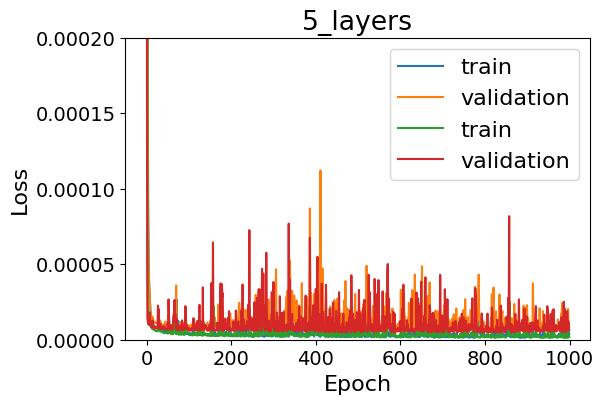

In [116]:
depth = [4,5]
depth_evals = pd.DataFrame()

for d in depth: 
    depth = Sequential()
    depth.add(Dense(300, activation='relu', input_shape=(16,)))
    for layer in range(d):
        depth.add(Dense(300, activation='relu'))
    depth.add(Dense(1, activation='linear'))
    depth.compile(loss='huber', optimizer=optimizer)

    print('Starting depth = ', d)
    start = time.time()
    NN_depth = depth.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 1000,  batch_size=200)
    it = str(d)+'_layers'
    ev = depth.evaluate(test_features_norm,test_labels)
    delt = str(datetime.timedelta(seconds=time.time()-start))
    depth_evals = depth_evals.append([[it,ev,delt]])
    plot_loss(NN_depth)
    plt.ylim([0,.0002])
    plt.title(it)
    #plt.show();
    print('\n\n'),
    
depth_evals

Choose 4 layers

## Cross-validate batch size

In [124]:
round(d*len(train_features)/100)

213

Starting batch =  1
Epoch 1/1000
80/80 [==============================] - 1s 9ms/step - loss: 0.0224 - val_loss: 3.3786e-04
Epoch 2/1000
80/80 [==============================] - 0s 5ms/step - loss: 1.6382e-04 - val_loss: 8.0101e-05
Epoch 3/1000
80/80 [==============================] - 0s 6ms/step - loss: 5.7005e-05 - val_loss: 4.5004e-05
Epoch 4/1000
80/80 [==============================] - 1s 7ms/step - loss: 2.9351e-05 - val_loss: 3.1507e-05
Epoch 5/1000
80/80 [==============================] - 0s 6ms/step - loss: 1.9692e-05 - val_loss: 2.7083e-05
Epoch 6/1000
80/80 [==============================] - 0s 6ms/step - loss: 1.4953e-05 - val_loss: 2.3647e-05
Epoch 7/1000
80/80 [==============================] - 0s 6ms/step - loss: 1.1867e-05 - val_loss: 2.3036e-05
Epoch 8/1000
80/80 [==============================] - 0s 6ms/step - loss: 1.0071e-05 - val_loss: 1.9625e-05
Epoch 9/1000
80/80 [==============================] - 0s 6ms/step - loss: 8.3110e-06 - val_loss: 1.8780e-05
Epoch 10/100

80/80 [==============================] - 0s 5ms/step - loss: 3.6858e-06 - val_loss: 1.3779e-05
Epoch 77/1000
80/80 [==============================] - 0s 5ms/step - loss: 4.0673e-06 - val_loss: 9.3895e-06
Epoch 78/1000
80/80 [==============================] - 0s 5ms/step - loss: 2.5225e-06 - val_loss: 1.2046e-05
Epoch 79/1000
80/80 [==============================] - 0s 5ms/step - loss: 3.5526e-06 - val_loss: 1.9050e-05
Epoch 80/1000
80/80 [==============================] - 0s 5ms/step - loss: 4.0726e-06 - val_loss: 1.1000e-05
Epoch 81/1000
80/80 [==============================] - 0s 5ms/step - loss: 4.2449e-06 - val_loss: 9.9613e-06
Epoch 82/1000
80/80 [==============================] - 0s 5ms/step - loss: 3.6229e-06 - val_loss: 1.1656e-05
Epoch 83/1000
80/80 [==============================] - 0s 6ms/step - loss: 6.1967e-06 - val_loss: 9.8640e-06
Epoch 84/1000
80/80 [==============================] - 0s 5ms/step - loss: 6.6425e-06 - val_loss: 1.1196e-05
Epoch 85/1000
80/80 [============

Epoch 151/1000
80/80 [==============================] - 0s 5ms/step - loss: 4.1894e-06 - val_loss: 7.1171e-06
Epoch 152/1000
80/80 [==============================] - 0s 5ms/step - loss: 4.3532e-06 - val_loss: 1.0144e-05
Epoch 153/1000
80/80 [==============================] - 0s 5ms/step - loss: 4.1241e-06 - val_loss: 7.0686e-06
Epoch 154/1000
80/80 [==============================] - 0s 5ms/step - loss: 3.3545e-06 - val_loss: 7.3094e-06
Epoch 155/1000
80/80 [==============================] - 0s 5ms/step - loss: 2.8612e-06 - val_loss: 8.4015e-06
Epoch 156/1000
80/80 [==============================] - 0s 5ms/step - loss: 3.0126e-06 - val_loss: 1.7181e-05
Epoch 157/1000
80/80 [==============================] - 0s 5ms/step - loss: 3.0994e-06 - val_loss: 9.7865e-06
Epoch 158/1000
80/80 [==============================] - 0s 5ms/step - loss: 5.0655e-06 - val_loss: 1.6300e-05
Epoch 159/1000
80/80 [==============================] - 0s 5ms/step - loss: 4.7454e-06 - val_loss: 1.1905e-05
Epoch 160/

80/80 [==============================] - 1s 7ms/step - loss: 9.1013e-07 - val_loss: 6.5394e-06
Epoch 300/1000
80/80 [==============================] - 1s 7ms/step - loss: 8.5894e-07 - val_loss: 9.4204e-06
Epoch 301/1000
80/80 [==============================] - 0s 5ms/step - loss: 1.2655e-06 - val_loss: 6.3304e-06
Epoch 302/1000
80/80 [==============================] - 1s 7ms/step - loss: 1.2436e-06 - val_loss: 6.6664e-06
Epoch 303/1000
80/80 [==============================] - 0s 5ms/step - loss: 8.9670e-07 - val_loss: 6.7234e-06
Epoch 304/1000
80/80 [==============================] - 1s 7ms/step - loss: 1.2199e-06 - val_loss: 8.0761e-06
Epoch 305/1000
80/80 [==============================] - 1s 7ms/step - loss: 1.0232e-06 - val_loss: 6.8758e-06
Epoch 306/1000
80/80 [==============================] - 1s 6ms/step - loss: 9.7152e-07 - val_loss: 6.8163e-06
Epoch 307/1000
80/80 [==============================] - 1s 6ms/step - loss: 1.1204e-06 - val_loss: 9.2373e-06
Epoch 308/1000
80/80 [===

80/80 [==============================] - 0s 5ms/step - loss: 1.0997e-06 - val_loss: 7.6185e-06
Epoch 448/1000
80/80 [==============================] - 0s 5ms/step - loss: 1.2974e-06 - val_loss: 7.5511e-06
Epoch 449/1000
80/80 [==============================] - 0s 5ms/step - loss: 7.6018e-07 - val_loss: 7.3334e-06
Epoch 450/1000
80/80 [==============================] - 0s 5ms/step - loss: 7.1368e-07 - val_loss: 7.0965e-06
Epoch 451/1000
80/80 [==============================] - 0s 5ms/step - loss: 6.4111e-07 - val_loss: 7.1957e-06
Epoch 452/1000
80/80 [==============================] - 0s 5ms/step - loss: 9.3515e-07 - val_loss: 8.3528e-06
Epoch 453/1000
80/80 [==============================] - 0s 5ms/step - loss: 8.6818e-07 - val_loss: 6.9104e-06
Epoch 454/1000
80/80 [==============================] - 0s 5ms/step - loss: 1.0509e-06 - val_loss: 6.8351e-06
Epoch 455/1000
80/80 [==============================] - 0s 5ms/step - loss: 1.0038e-06 - val_loss: 7.3877e-06
Epoch 456/1000
80/80 [===

80/80 [==============================] - 0s 5ms/step - loss: 7.1189e-07 - val_loss: 6.3032e-06
Epoch 596/1000
80/80 [==============================] - 0s 5ms/step - loss: 7.4208e-07 - val_loss: 7.3707e-06
Epoch 597/1000
80/80 [==============================] - 1s 7ms/step - loss: 8.3362e-07 - val_loss: 6.2669e-06
Epoch 598/1000
80/80 [==============================] - 1s 8ms/step - loss: 5.7266e-07 - val_loss: 6.1247e-06
Epoch 599/1000
80/80 [==============================] - 1s 7ms/step - loss: 7.4194e-07 - val_loss: 7.4738e-06
Epoch 600/1000
80/80 [==============================] - 0s 6ms/step - loss: 1.0196e-06 - val_loss: 8.9277e-06
Epoch 601/1000
80/80 [==============================] - 1s 7ms/step - loss: 9.9487e-07 - val_loss: 6.9610e-06
Epoch 602/1000
80/80 [==============================] - 1s 6ms/step - loss: 6.3993e-07 - val_loss: 7.4058e-06
Epoch 603/1000
80/80 [==============================] - 0s 5ms/step - loss: 8.2245e-07 - val_loss: 7.1298e-06
Epoch 604/1000
80/80 [===

80/80 [==============================] - 1s 6ms/step - loss: 1.0579e-06 - val_loss: 9.4150e-06
Epoch 744/1000
80/80 [==============================] - 0s 5ms/step - loss: 7.9524e-07 - val_loss: 7.4549e-06
Epoch 745/1000
80/80 [==============================] - 0s 5ms/step - loss: 5.9171e-07 - val_loss: 8.2212e-06
Epoch 746/1000
80/80 [==============================] - 0s 5ms/step - loss: 4.0565e-07 - val_loss: 6.9282e-06
Epoch 747/1000
80/80 [==============================] - 0s 6ms/step - loss: 4.5428e-07 - val_loss: 7.1070e-06
Epoch 748/1000
80/80 [==============================] - 0s 5ms/step - loss: 5.0730e-07 - val_loss: 8.5469e-06
Epoch 749/1000
80/80 [==============================] - 0s 5ms/step - loss: 4.4733e-07 - val_loss: 7.9208e-06
Epoch 750/1000
80/80 [==============================] - 0s 5ms/step - loss: 7.7589e-07 - val_loss: 6.5186e-06
Epoch 751/1000
80/80 [==============================] - 0s 5ms/step - loss: 7.8778e-07 - val_loss: 7.2424e-06
Epoch 752/1000
80/80 [===

80/80 [==============================] - 0s 5ms/step - loss: 5.6103e-07 - val_loss: 6.1189e-06
Epoch 892/1000
80/80 [==============================] - 0s 5ms/step - loss: 4.7181e-07 - val_loss: 6.5389e-06
Epoch 893/1000
80/80 [==============================] - 0s 5ms/step - loss: 8.1358e-07 - val_loss: 6.1788e-06
Epoch 894/1000
80/80 [==============================] - 0s 6ms/step - loss: 1.2454e-06 - val_loss: 7.2731e-06
Epoch 895/1000
80/80 [==============================] - 1s 9ms/step - loss: 1.0702e-06 - val_loss: 6.2573e-06
Epoch 896/1000
80/80 [==============================] - 0s 6ms/step - loss: 7.0135e-07 - val_loss: 7.6624e-06
Epoch 897/1000
80/80 [==============================] - 0s 5ms/step - loss: 5.5733e-07 - val_loss: 7.4212e-06
Epoch 898/1000
80/80 [==============================] - 0s 6ms/step - loss: 7.4387e-07 - val_loss: 9.7295e-06
Epoch 899/1000
80/80 [==============================] - 0s 6ms/step - loss: 6.6791e-07 - val_loss: 6.8511e-06
Epoch 900/1000
80/80 [===

41/41 [==============================] - 0s 7ms/step - loss: 7.9980e-06 - val_loss: 3.3206e-05
Epoch 40/1000
41/41 [==============================] - 0s 6ms/step - loss: 7.1217e-06 - val_loss: 1.2212e-05
Epoch 41/1000
41/41 [==============================] - 0s 7ms/step - loss: 4.3508e-06 - val_loss: 1.8810e-05
Epoch 42/1000
41/41 [==============================] - 0s 6ms/step - loss: 6.3153e-06 - val_loss: 1.2178e-05
Epoch 43/1000
41/41 [==============================] - 0s 7ms/step - loss: 3.8868e-06 - val_loss: 1.5209e-05
Epoch 44/1000
41/41 [==============================] - 0s 6ms/step - loss: 4.0833e-06 - val_loss: 1.4795e-05
Epoch 45/1000
41/41 [==============================] - 0s 6ms/step - loss: 4.0132e-06 - val_loss: 1.2453e-05
Epoch 46/1000
41/41 [==============================] - 0s 7ms/step - loss: 3.7476e-06 - val_loss: 1.1364e-05
Epoch 47/1000
41/41 [==============================] - 0s 7ms/step - loss: 3.7094e-06 - val_loss: 1.5336e-05
Epoch 48/1000
41/41 [============

41/41 [==============================] - 0s 7ms/step - loss: 2.9363e-06 - val_loss: 9.2769e-06
Epoch 115/1000
41/41 [==============================] - 0s 6ms/step - loss: 2.3364e-06 - val_loss: 9.3006e-06
Epoch 116/1000
41/41 [==============================] - 0s 6ms/step - loss: 2.3002e-06 - val_loss: 9.2884e-06
Epoch 117/1000
41/41 [==============================] - 0s 6ms/step - loss: 2.4659e-06 - val_loss: 1.3426e-05
Epoch 118/1000
41/41 [==============================] - 0s 7ms/step - loss: 3.9971e-06 - val_loss: 1.0177e-05
Epoch 119/1000
41/41 [==============================] - 0s 7ms/step - loss: 2.3424e-06 - val_loss: 9.5729e-06
Epoch 120/1000
41/41 [==============================] - 0s 8ms/step - loss: 2.2756e-06 - val_loss: 5.6982e-05
Epoch 121/1000
41/41 [==============================] - 0s 7ms/step - loss: 9.9629e-06 - val_loss: 9.2551e-06
Epoch 122/1000
41/41 [==============================] - 0s 7ms/step - loss: 2.6457e-06 - val_loss: 1.6944e-05
Epoch 123/1000
41/41 [===

41/41 [==============================] - 0s 6ms/step - loss: 2.5247e-06 - val_loss: 6.8200e-06
Epoch 263/1000
41/41 [==============================] - 0s 6ms/step - loss: 2.1268e-06 - val_loss: 6.4596e-06
Epoch 264/1000
41/41 [==============================] - 0s 8ms/step - loss: 2.6056e-06 - val_loss: 8.1328e-06
Epoch 265/1000
41/41 [==============================] - 0s 7ms/step - loss: 3.4462e-06 - val_loss: 6.1358e-06
Epoch 266/1000
41/41 [==============================] - 0s 7ms/step - loss: 2.4091e-06 - val_loss: 7.6182e-06
Epoch 267/1000
41/41 [==============================] - 0s 7ms/step - loss: 2.3599e-06 - val_loss: 6.4284e-06
Epoch 268/1000
41/41 [==============================] - 0s 6ms/step - loss: 2.4569e-06 - val_loss: 6.3106e-06
Epoch 269/1000
41/41 [==============================] - 0s 6ms/step - loss: 1.7727e-06 - val_loss: 7.2032e-06
Epoch 270/1000
41/41 [==============================] - 0s 7ms/step - loss: 2.4982e-06 - val_loss: 1.4003e-05
Epoch 271/1000
41/41 [===

41/41 [==============================] - 0s 7ms/step - loss: 2.4021e-06 - val_loss: 6.2987e-06
Epoch 411/1000
41/41 [==============================] - 0s 6ms/step - loss: 1.8508e-06 - val_loss: 6.3786e-06
Epoch 412/1000
41/41 [==============================] - 0s 7ms/step - loss: 2.0984e-06 - val_loss: 5.3673e-06
Epoch 413/1000
41/41 [==============================] - 0s 7ms/step - loss: 1.8060e-06 - val_loss: 5.9953e-06
Epoch 414/1000
41/41 [==============================] - 0s 6ms/step - loss: 1.8500e-06 - val_loss: 1.2473e-05
Epoch 415/1000
41/41 [==============================] - 0s 6ms/step - loss: 3.1358e-06 - val_loss: 1.0703e-05
Epoch 416/1000
41/41 [==============================] - 0s 6ms/step - loss: 3.4585e-06 - val_loss: 9.7282e-06
Epoch 417/1000
41/41 [==============================] - 0s 7ms/step - loss: 2.6409e-06 - val_loss: 6.0058e-06
Epoch 418/1000
41/41 [==============================] - 0s 6ms/step - loss: 2.0864e-06 - val_loss: 9.4339e-06
Epoch 419/1000
41/41 [===

41/41 [==============================] - 0s 7ms/step - loss: 1.5062e-06 - val_loss: 6.1431e-06
Epoch 559/1000
41/41 [==============================] - 0s 7ms/step - loss: 1.2237e-06 - val_loss: 6.2567e-06
Epoch 560/1000
41/41 [==============================] - 0s 7ms/step - loss: 1.0160e-06 - val_loss: 6.2165e-06
Epoch 561/1000
41/41 [==============================] - 0s 8ms/step - loss: 1.0621e-06 - val_loss: 7.5203e-06
Epoch 562/1000
41/41 [==============================] - 0s 7ms/step - loss: 1.3729e-06 - val_loss: 1.2177e-05
Epoch 563/1000
41/41 [==============================] - 0s 7ms/step - loss: 1.4640e-06 - val_loss: 7.0756e-06
Epoch 564/1000
41/41 [==============================] - 0s 8ms/step - loss: 1.1221e-06 - val_loss: 6.6587e-06
Epoch 565/1000
41/41 [==============================] - 0s 7ms/step - loss: 1.0627e-06 - val_loss: 6.7756e-06
Epoch 566/1000
41/41 [==============================] - 0s 7ms/step - loss: 1.3933e-06 - val_loss: 7.5716e-06
Epoch 567/1000
41/41 [===

41/41 [==============================] - 0s 6ms/step - loss: 9.2425e-07 - val_loss: 7.2163e-06
Epoch 707/1000
41/41 [==============================] - 0s 6ms/step - loss: 1.1298e-06 - val_loss: 7.1645e-06
Epoch 708/1000
41/41 [==============================] - 0s 6ms/step - loss: 9.3518e-07 - val_loss: 2.3649e-05
Epoch 709/1000
41/41 [==============================] - 0s 6ms/step - loss: 3.3246e-06 - val_loss: 9.1729e-06
Epoch 710/1000
41/41 [==============================] - 0s 6ms/step - loss: 1.8669e-06 - val_loss: 7.2402e-06
Epoch 711/1000
41/41 [==============================] - 0s 6ms/step - loss: 1.0719e-06 - val_loss: 7.0974e-06
Epoch 712/1000
41/41 [==============================] - 0s 6ms/step - loss: 1.1817e-06 - val_loss: 7.2129e-06
Epoch 713/1000
41/41 [==============================] - 0s 6ms/step - loss: 1.0309e-06 - val_loss: 8.5478e-06
Epoch 714/1000
41/41 [==============================] - 0s 6ms/step - loss: 1.1221e-06 - val_loss: 8.4315e-06
Epoch 715/1000
41/41 [===

41/41 [==============================] - 0s 9ms/step - loss: 6.1450e-07 - val_loss: 7.3247e-06
Epoch 855/1000
41/41 [==============================] - 0s 10ms/step - loss: 6.6324e-07 - val_loss: 7.5954e-06
Epoch 856/1000
41/41 [==============================] - 0s 9ms/step - loss: 7.0785e-07 - val_loss: 6.9943e-06
Epoch 857/1000
41/41 [==============================] - 0s 11ms/step - loss: 5.8478e-07 - val_loss: 7.0712e-06
Epoch 858/1000
41/41 [==============================] - 0s 8ms/step - loss: 5.6736e-07 - val_loss: 1.5185e-05
Epoch 859/1000
41/41 [==============================] - 0s 10ms/step - loss: 1.6764e-06 - val_loss: 6.8398e-06
Epoch 860/1000
41/41 [==============================] - 0s 7ms/step - loss: 1.0351e-06 - val_loss: 8.6318e-06
Epoch 861/1000
41/41 [==============================] - 0s 9ms/step - loss: 1.1478e-06 - val_loss: 7.2908e-06
Epoch 862/1000
41/41 [==============================] - 0s 10ms/step - loss: 9.0859e-07 - val_loss: 6.7105e-06
Epoch 863/1000
41/41 

Epoch 2/1000
27/27 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 4.4582e-04
Epoch 3/1000
27/27 [==============================] - 0s 15ms/step - loss: 2.2446e-04 - val_loss: 1.3811e-04
Epoch 4/1000
27/27 [==============================] - 0s 13ms/step - loss: 7.9430e-05 - val_loss: 7.4138e-05
Epoch 5/1000
27/27 [==============================] - 0s 13ms/step - loss: 4.4337e-05 - val_loss: 4.8589e-05
Epoch 6/1000
27/27 [==============================] - 0s 14ms/step - loss: 3.1509e-05 - val_loss: 4.0714e-05
Epoch 7/1000
27/27 [==============================] - 0s 14ms/step - loss: 2.5140e-05 - val_loss: 3.4774e-05
Epoch 8/1000
27/27 [==============================] - 0s 14ms/step - loss: 2.1006e-05 - val_loss: 3.1166e-05
Epoch 9/1000
27/27 [==============================] - 0s 13ms/step - loss: 1.8257e-05 - val_loss: 2.6678e-05
Epoch 10/1000
27/27 [==============================] - 0s 13ms/step - loss: 1.5680e-05 - val_loss: 2.5089e-05
Epoch 11/1000
27/27 [=

Epoch 77/1000
27/27 [==============================] - 0s 7ms/step - loss: 3.4836e-06 - val_loss: 1.1349e-05
Epoch 78/1000
27/27 [==============================] - 0s 7ms/step - loss: 3.3308e-06 - val_loss: 1.1184e-05
Epoch 79/1000
27/27 [==============================] - 0s 7ms/step - loss: 3.6123e-06 - val_loss: 1.0454e-05
Epoch 80/1000
27/27 [==============================] - 0s 7ms/step - loss: 3.4174e-06 - val_loss: 1.0609e-05
Epoch 81/1000
27/27 [==============================] - 0s 7ms/step - loss: 3.7499e-06 - val_loss: 1.0840e-05
Epoch 82/1000
27/27 [==============================] - 0s 7ms/step - loss: 3.5049e-06 - val_loss: 1.0970e-05
Epoch 83/1000
27/27 [==============================] - 0s 7ms/step - loss: 3.5116e-06 - val_loss: 1.3125e-05
Epoch 84/1000
27/27 [==============================] - 0s 7ms/step - loss: 3.2802e-06 - val_loss: 1.0352e-05
Epoch 85/1000
27/27 [==============================] - 0s 7ms/step - loss: 2.9475e-06 - val_loss: 1.0897e-05
Epoch 86/1000
27/27

27/27 [==============================] - 0s 8ms/step - loss: 2.1917e-06 - val_loss: 9.0487e-06
Epoch 226/1000
27/27 [==============================] - 0s 8ms/step - loss: 4.5175e-06 - val_loss: 1.5676e-05
Epoch 227/1000
27/27 [==============================] - 0s 8ms/step - loss: 4.6908e-06 - val_loss: 1.2890e-05
Epoch 228/1000
27/27 [==============================] - 0s 8ms/step - loss: 3.4647e-06 - val_loss: 8.6892e-06
Epoch 229/1000
27/27 [==============================] - 0s 8ms/step - loss: 2.2324e-06 - val_loss: 8.4673e-06
Epoch 230/1000
27/27 [==============================] - 0s 7ms/step - loss: 1.9884e-06 - val_loss: 9.1987e-06
Epoch 231/1000
27/27 [==============================] - 0s 8ms/step - loss: 2.0719e-06 - val_loss: 9.6666e-06
Epoch 232/1000
27/27 [==============================] - 0s 7ms/step - loss: 1.9972e-06 - val_loss: 8.1223e-06
Epoch 233/1000
27/27 [==============================] - 0s 8ms/step - loss: 2.0837e-06 - val_loss: 9.7994e-06
Epoch 234/1000
27/27 [===

27/27 [==============================] - 0s 10ms/step - loss: 1.8381e-06 - val_loss: 9.7562e-06
Epoch 374/1000
27/27 [==============================] - 0s 10ms/step - loss: 2.6337e-06 - val_loss: 8.5492e-06
Epoch 375/1000
27/27 [==============================] - 0s 10ms/step - loss: 2.1056e-06 - val_loss: 6.9588e-06
Epoch 376/1000
27/27 [==============================] - 0s 8ms/step - loss: 1.9119e-06 - val_loss: 7.0752e-06
Epoch 377/1000
27/27 [==============================] - 0s 10ms/step - loss: 1.8708e-06 - val_loss: 6.7115e-06
Epoch 378/1000
27/27 [==============================] - 0s 9ms/step - loss: 2.1611e-06 - val_loss: 6.7040e-06
Epoch 379/1000
27/27 [==============================] - 0s 10ms/step - loss: 2.1249e-06 - val_loss: 6.9192e-06
Epoch 380/1000
27/27 [==============================] - 0s 10ms/step - loss: 2.6569e-06 - val_loss: 1.1401e-05
Epoch 381/1000
27/27 [==============================] - 0s 10ms/step - loss: 3.1107e-06 - val_loss: 6.9024e-06
Epoch 382/1000
27/

27/27 [==============================] - 0s 8ms/step - loss: 2.1118e-06 - val_loss: 7.5200e-06
Epoch 522/1000
27/27 [==============================] - 0s 8ms/step - loss: 1.7465e-06 - val_loss: 6.9824e-06
Epoch 523/1000
27/27 [==============================] - 0s 8ms/step - loss: 1.3182e-06 - val_loss: 6.5405e-06
Epoch 524/1000
27/27 [==============================] - 0s 8ms/step - loss: 1.3256e-06 - val_loss: 6.6512e-06
Epoch 525/1000
27/27 [==============================] - 0s 7ms/step - loss: 1.3058e-06 - val_loss: 6.5485e-06
Epoch 526/1000
27/27 [==============================] - 0s 8ms/step - loss: 1.5207e-06 - val_loss: 1.3319e-05
Epoch 527/1000
27/27 [==============================] - 0s 8ms/step - loss: 2.1697e-06 - val_loss: 6.3796e-06
Epoch 528/1000
27/27 [==============================] - 0s 7ms/step - loss: 1.3753e-06 - val_loss: 6.3543e-06
Epoch 529/1000
27/27 [==============================] - 0s 8ms/step - loss: 1.2127e-06 - val_loss: 6.7576e-06
Epoch 530/1000
27/27 [===

27/27 [==============================] - 0s 9ms/step - loss: 9.3232e-07 - val_loss: 6.0188e-06
Epoch 670/1000
27/27 [==============================] - 0s 10ms/step - loss: 8.7068e-07 - val_loss: 5.8600e-06
Epoch 671/1000
27/27 [==============================] - 0s 8ms/step - loss: 1.7333e-06 - val_loss: 6.3654e-06
Epoch 672/1000
27/27 [==============================] - 0s 8ms/step - loss: 1.6255e-06 - val_loss: 6.0478e-06
Epoch 673/1000
27/27 [==============================] - 0s 9ms/step - loss: 1.8789e-06 - val_loss: 7.8147e-06
Epoch 674/1000
27/27 [==============================] - 0s 10ms/step - loss: 1.4571e-06 - val_loss: 7.4633e-06
Epoch 675/1000
27/27 [==============================] - 0s 10ms/step - loss: 1.3664e-06 - val_loss: 5.9741e-06
Epoch 676/1000
27/27 [==============================] - 0s 8ms/step - loss: 1.0102e-06 - val_loss: 7.0112e-06
Epoch 677/1000
27/27 [==============================] - 0s 10ms/step - loss: 8.9104e-07 - val_loss: 7.1547e-06
Epoch 678/1000
27/27 

27/27 [==============================] - 0s 11ms/step - loss: 1.1098e-06 - val_loss: 6.8872e-06
Epoch 818/1000
27/27 [==============================] - 0s 10ms/step - loss: 1.1068e-06 - val_loss: 6.3717e-06
Epoch 819/1000
27/27 [==============================] - 0s 9ms/step - loss: 7.9689e-07 - val_loss: 6.6572e-06
Epoch 820/1000
27/27 [==============================] - 0s 9ms/step - loss: 6.3304e-07 - val_loss: 7.8156e-06
Epoch 821/1000
27/27 [==============================] - 0s 8ms/step - loss: 7.3146e-07 - val_loss: 6.7000e-06
Epoch 822/1000
27/27 [==============================] - 0s 8ms/step - loss: 5.0993e-07 - val_loss: 6.3332e-06
Epoch 823/1000
27/27 [==============================] - 0s 9ms/step - loss: 4.8689e-07 - val_loss: 6.4778e-06
Epoch 824/1000
27/27 [==============================] - 0s 11ms/step - loss: 4.8284e-07 - val_loss: 6.6279e-06
Epoch 825/1000
27/27 [==============================] - 0s 9ms/step - loss: 5.8418e-07 - val_loss: 6.4725e-06
Epoch 826/1000
27/27 [

27/27 [==============================] - 0s 10ms/step - loss: 4.6792e-07 - val_loss: 6.7438e-06
Epoch 966/1000
27/27 [==============================] - 0s 8ms/step - loss: 5.3878e-07 - val_loss: 6.3720e-06
Epoch 967/1000
27/27 [==============================] - 0s 7ms/step - loss: 4.0570e-07 - val_loss: 6.6560e-06
Epoch 968/1000
27/27 [==============================] - 0s 10ms/step - loss: 3.7604e-07 - val_loss: 6.6185e-06
Epoch 969/1000
27/27 [==============================] - 0s 8ms/step - loss: 5.9549e-07 - val_loss: 6.3418e-06
Epoch 970/1000
27/27 [==============================] - 0s 8ms/step - loss: 4.7670e-07 - val_loss: 6.3264e-06
Epoch 971/1000
27/27 [==============================] - 0s 8ms/step - loss: 3.3684e-07 - val_loss: 6.3861e-06
Epoch 972/1000
27/27 [==============================] - 0s 7ms/step - loss: 3.9687e-07 - val_loss: 6.7892e-06
Epoch 973/1000
27/27 [==============================] - 0s 8ms/step - loss: 8.2355e-07 - val_loss: 6.4645e-06
Epoch 974/1000
27/27 [=

Epoch 39/1000
21/21 [==============================] - 0s 10ms/step - loss: 1.1035e-05 - val_loss: 1.3445e-05
Epoch 40/1000
21/21 [==============================] - 0s 9ms/step - loss: 7.4750e-06 - val_loss: 1.1393e-05
Epoch 41/1000
21/21 [==============================] - 0s 10ms/step - loss: 6.9726e-06 - val_loss: 1.0672e-05
Epoch 42/1000
21/21 [==============================] - 0s 10ms/step - loss: 6.5532e-06 - val_loss: 1.0597e-05
Epoch 43/1000
21/21 [==============================] - 0s 8ms/step - loss: 6.1669e-06 - val_loss: 1.0684e-05
Epoch 44/1000
21/21 [==============================] - 0s 10ms/step - loss: 6.3928e-06 - val_loss: 1.1130e-05
Epoch 45/1000
21/21 [==============================] - 0s 9ms/step - loss: 6.1205e-06 - val_loss: 1.0010e-05
Epoch 46/1000
21/21 [==============================] - 0s 9ms/step - loss: 5.8779e-06 - val_loss: 9.9796e-06
Epoch 47/1000
21/21 [==============================] - 0s 9ms/step - loss: 5.5305e-06 - val_loss: 9.9837e-06
Epoch 48/1000
2

21/21 [==============================] - 0s 13ms/step - loss: 2.9072e-06 - val_loss: 7.3823e-06
Epoch 188/1000
21/21 [==============================] - 0s 11ms/step - loss: 2.7535e-06 - val_loss: 7.9515e-06
Epoch 189/1000
21/21 [==============================] - 0s 11ms/step - loss: 2.2990e-06 - val_loss: 8.3161e-06
Epoch 190/1000
21/21 [==============================] - 0s 13ms/step - loss: 2.3182e-06 - val_loss: 6.8130e-06
Epoch 191/1000
21/21 [==============================] - 0s 11ms/step - loss: 2.3177e-06 - val_loss: 1.0036e-05
Epoch 192/1000
21/21 [==============================] - 0s 13ms/step - loss: 2.9334e-06 - val_loss: 7.3167e-06
Epoch 193/1000
21/21 [==============================] - 0s 9ms/step - loss: 2.4018e-06 - val_loss: 9.1603e-06
Epoch 194/1000
21/21 [==============================] - 0s 10ms/step - loss: 2.8027e-06 - val_loss: 8.7146e-06
Epoch 195/1000
21/21 [==============================] - 0s 12ms/step - loss: 2.2683e-06 - val_loss: 7.6905e-06
Epoch 196/1000
21

21/21 [==============================] - 0s 13ms/step - loss: 4.4459e-06 - val_loss: 1.1091e-05
Epoch 262/1000
21/21 [==============================] - 0s 9ms/step - loss: 3.6090e-06 - val_loss: 6.2249e-06
Epoch 263/1000
21/21 [==============================] - 0s 9ms/step - loss: 2.5426e-06 - val_loss: 6.5098e-06
Epoch 264/1000
21/21 [==============================] - 0s 11ms/step - loss: 2.2680e-06 - val_loss: 8.7272e-06
Epoch 265/1000
21/21 [==============================] - 0s 9ms/step - loss: 2.8606e-06 - val_loss: 7.9246e-06
Epoch 266/1000
21/21 [==============================] - 0s 11ms/step - loss: 2.7067e-06 - val_loss: 5.8061e-06
Epoch 267/1000
21/21 [==============================] - 0s 10ms/step - loss: 2.3773e-06 - val_loss: 9.4070e-06
Epoch 268/1000
21/21 [==============================] - 0s 11ms/step - loss: 3.3272e-06 - val_loss: 6.0220e-06
Epoch 269/1000
21/21 [==============================] - 0s 10ms/step - loss: 2.5348e-06 - val_loss: 5.8579e-06
Epoch 270/1000
21/2

21/21 [==============================] - 0s 8ms/step - loss: 9.3285e-06 - val_loss: 8.3059e-06
Epoch 410/1000
21/21 [==============================] - 0s 8ms/step - loss: 4.8952e-06 - val_loss: 6.3337e-06
Epoch 411/1000
21/21 [==============================] - 0s 8ms/step - loss: 4.3328e-06 - val_loss: 5.9078e-06
Epoch 412/1000
21/21 [==============================] - 0s 8ms/step - loss: 3.9676e-06 - val_loss: 5.9625e-06
Epoch 413/1000
21/21 [==============================] - 0s 8ms/step - loss: 3.4792e-06 - val_loss: 5.6498e-06
Epoch 414/1000
21/21 [==============================] - 0s 8ms/step - loss: 3.2248e-06 - val_loss: 7.2447e-06
Epoch 415/1000
21/21 [==============================] - 0s 10ms/step - loss: 3.7246e-06 - val_loss: 7.7513e-06
Epoch 416/1000
21/21 [==============================] - 0s 12ms/step - loss: 3.5807e-06 - val_loss: 1.2681e-05
Epoch 417/1000
21/21 [==============================] - 0s 21ms/step - loss: 6.3405e-06 - val_loss: 1.2467e-05
Epoch 418/1000
21/21 [

21/21 [==============================] - 0s 9ms/step - loss: 8.0338e-06 - val_loss: 1.5872e-05
Epoch 558/1000
21/21 [==============================] - 0s 9ms/step - loss: 1.0207e-05 - val_loss: 1.2569e-05
Epoch 559/1000
21/21 [==============================] - 0s 9ms/step - loss: 8.1879e-06 - val_loss: 4.4835e-05
Epoch 560/1000
21/21 [==============================] - 0s 11ms/step - loss: 1.4427e-05 - val_loss: 7.9747e-05
Epoch 561/1000
21/21 [==============================] - 0s 11ms/step - loss: 3.0006e-05 - val_loss: 9.8563e-06
Epoch 562/1000
21/21 [==============================] - 0s 12ms/step - loss: 8.7476e-06 - val_loss: 1.4912e-05
Epoch 563/1000
21/21 [==============================] - 0s 10ms/step - loss: 6.4192e-06 - val_loss: 6.8273e-06
Epoch 564/1000
21/21 [==============================] - 0s 8ms/step - loss: 4.1934e-06 - val_loss: 7.7754e-06
Epoch 565/1000
21/21 [==============================] - 0s 12ms/step - loss: 3.7588e-06 - val_loss: 6.9342e-06
Epoch 566/1000
21/21

21/21 [==============================] - 0s 13ms/step - loss: 1.7790e-06 - val_loss: 6.6647e-06
Epoch 706/1000
21/21 [==============================] - 0s 9ms/step - loss: 1.6260e-06 - val_loss: 1.3925e-05
Epoch 707/1000
21/21 [==============================] - 0s 9ms/step - loss: 3.5284e-06 - val_loss: 1.5750e-05
Epoch 708/1000
21/21 [==============================] - 0s 9ms/step - loss: 4.4562e-06 - val_loss: 3.1639e-05
Epoch 709/1000
21/21 [==============================] - 0s 9ms/step - loss: 1.0400e-05 - val_loss: 8.4376e-06
Epoch 710/1000
21/21 [==============================] - 0s 13ms/step - loss: 3.9577e-06 - val_loss: 1.2781e-05
Epoch 711/1000
21/21 [==============================] - 0s 9ms/step - loss: 4.1872e-06 - val_loss: 2.5829e-05
Epoch 712/1000
21/21 [==============================] - 0s 9ms/step - loss: 7.6778e-06 - val_loss: 1.1407e-05
Epoch 713/1000
21/21 [==============================] - 0s 9ms/step - loss: 3.5126e-06 - val_loss: 1.0514e-05
Epoch 714/1000
21/21 [=

21/21 [==============================] - 0s 9ms/step - loss: 3.2935e-06 - val_loss: 1.5221e-05
Epoch 854/1000
21/21 [==============================] - 0s 10ms/step - loss: 4.7648e-06 - val_loss: 5.6409e-06
Epoch 855/1000
21/21 [==============================] - 0s 10ms/step - loss: 2.0534e-06 - val_loss: 6.1214e-06
Epoch 856/1000
21/21 [==============================] - 0s 10ms/step - loss: 1.9256e-06 - val_loss: 6.2305e-06
Epoch 857/1000
21/21 [==============================] - 0s 10ms/step - loss: 1.5850e-06 - val_loss: 8.0384e-06
Epoch 858/1000
21/21 [==============================] - 0s 9ms/step - loss: 2.2331e-06 - val_loss: 9.2271e-06
Epoch 859/1000
21/21 [==============================] - 0s 9ms/step - loss: 3.8772e-06 - val_loss: 9.9424e-06
Epoch 860/1000
21/21 [==============================] - 0s 9ms/step - loss: 3.3618e-06 - val_loss: 6.2847e-06
Epoch 861/1000
21/21 [==============================] - 0s 9ms/step - loss: 2.0345e-06 - val_loss: 8.5290e-06
Epoch 862/1000
21/21 

34/34 [==============================] - 0s 2ms/step - loss: 1.2628e-05
Starting batch =  5
Epoch 1/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.0744 - val_loss: 0.0046
Epoch 2/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 3/1000
16/16 [==============================] - 0s 11ms/step - loss: 4.8402e-04 - val_loss: 1.9582e-04
Epoch 4/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.2271e-04 - val_loss: 7.3789e-05
Epoch 5/1000
16/16 [==============================] - 0s 13ms/step - loss: 5.6185e-05 - val_loss: 4.7324e-05
Epoch 6/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.5571e-05 - val_loss: 3.8632e-05
Epoch 7/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.8148e-05 - val_loss: 3.0574e-05
Epoch 8/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.2628e-05 - val_loss: 2.9751e-05
Epoch 9/1000
16/16 [==============================] 

Epoch 75/1000
16/16 [==============================] - 0s 15ms/step - loss: 3.6941e-06 - val_loss: 8.8408e-06
Epoch 76/1000
16/16 [==============================] - 0s 15ms/step - loss: 3.6951e-06 - val_loss: 8.5980e-06
Epoch 77/1000
16/16 [==============================] - 0s 14ms/step - loss: 3.6042e-06 - val_loss: 8.5663e-06
Epoch 78/1000
16/16 [==============================] - 0s 14ms/step - loss: 3.5260e-06 - val_loss: 9.0205e-06
Epoch 79/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.6245e-06 - val_loss: 8.7708e-06
Epoch 80/1000
16/16 [==============================] - 0s 13ms/step - loss: 3.5235e-06 - val_loss: 8.4271e-06
Epoch 81/1000
16/16 [==============================] - 0s 12ms/step - loss: 3.5464e-06 - val_loss: 8.6271e-06
Epoch 82/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.4526e-06 - val_loss: 8.5966e-06
Epoch 83/1000
16/16 [==============================] - 0s 14ms/step - loss: 3.5788e-06 - val_loss: 9.0880e-06
Epoch 84/1

16/16 [==============================] - 0s 10ms/step - loss: 2.5901e-06 - val_loss: 7.9998e-06
Epoch 150/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.9637e-06 - val_loss: 7.9350e-06
Epoch 151/1000
16/16 [==============================] - 0s 14ms/step - loss: 3.1944e-06 - val_loss: 9.5922e-06
Epoch 152/1000
16/16 [==============================] - 0s 12ms/step - loss: 3.3166e-06 - val_loss: 8.2084e-06
Epoch 153/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.6963e-06 - val_loss: 8.0148e-06
Epoch 154/1000
16/16 [==============================] - 0s 16ms/step - loss: 2.4599e-06 - val_loss: 7.6701e-06
Epoch 155/1000
16/16 [==============================] - 0s 14ms/step - loss: 2.4299e-06 - val_loss: 7.8398e-06
Epoch 156/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.4210e-06 - val_loss: 7.7825e-06
Epoch 157/1000
16/16 [==============================] - 0s 14ms/step - loss: 2.6560e-06 - val_loss: 7.5677e-06
Epoch 158/1000
1

Epoch 223/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.0320e-06 - val_loss: 7.5068e-06
Epoch 224/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.9909e-06 - val_loss: 7.5844e-06
Epoch 225/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.9263e-06 - val_loss: 8.3004e-06
Epoch 226/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.9581e-06 - val_loss: 7.6983e-06
Epoch 227/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.8969e-06 - val_loss: 7.4507e-06
Epoch 228/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.8817e-06 - val_loss: 7.5773e-06
Epoch 229/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.8821e-06 - val_loss: 7.8377e-06
Epoch 230/1000
16/16 [==============================] - 0s 14ms/step - loss: 2.1418e-06 - val_loss: 7.8120e-06
Epoch 231/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.3779e-06 - val_loss: 7.9814e-06
E

Epoch 297/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.8400e-06 - val_loss: 8.5246e-06
Epoch 298/1000
16/16 [==============================] - 0s 13ms/step - loss: 2.0598e-06 - val_loss: 7.7074e-06
Epoch 299/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.8591e-06 - val_loss: 7.9689e-06
Epoch 300/1000
16/16 [==============================] - 0s 14ms/step - loss: 1.9549e-06 - val_loss: 8.8542e-06
Epoch 301/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.9217e-06 - val_loss: 7.7562e-06
Epoch 302/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.6246e-06 - val_loss: 7.8622e-06
Epoch 303/1000
16/16 [==============================] - 0s 14ms/step - loss: 1.8116e-06 - val_loss: 8.1753e-06
Epoch 304/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.4722e-06 - val_loss: 9.5913e-06
Epoch 305/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.0240e-06 - val_loss: 8.1852e-06
E

Epoch 371/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.8770e-06 - val_loss: 8.6080e-06
Epoch 372/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.9812e-06 - val_loss: 7.9159e-06
Epoch 373/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.7719e-06 - val_loss: 7.2131e-06
Epoch 374/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.5438e-06 - val_loss: 8.1113e-06
Epoch 375/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.3752e-06 - val_loss: 8.3030e-06
Epoch 376/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.2659e-06 - val_loss: 7.5136e-06
Epoch 377/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.5335e-06 - val_loss: 7.2590e-06
Epoch 378/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.0769e-06 - val_loss: 7.3170e-06
Epoch 379/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.2250e-06 - val_loss: 8.4944e-06
E

Epoch 445/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.6219e-06 - val_loss: 7.2705e-06
Epoch 446/1000
16/16 [==============================] - 0s 14ms/step - loss: 1.5356e-06 - val_loss: 7.5564e-06
Epoch 447/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.5976e-06 - val_loss: 6.9795e-06
Epoch 448/1000
16/16 [==============================] - 0s 15ms/step - loss: 1.3941e-06 - val_loss: 7.0966e-06
Epoch 449/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.3567e-06 - val_loss: 6.8285e-06
Epoch 450/1000
16/16 [==============================] - 0s 14ms/step - loss: 1.3032e-06 - val_loss: 6.9615e-06
Epoch 451/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.7596e-06 - val_loss: 7.9519e-06
Epoch 452/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.6874e-06 - val_loss: 7.6440e-06
Epoch 453/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.4437e-06 - val_loss: 8.4611e-06
E

Epoch 519/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.4462e-06 - val_loss: 6.4014e-06
Epoch 520/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.1719e-06 - val_loss: 6.5522e-06
Epoch 521/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.1631e-06 - val_loss: 6.7324e-06
Epoch 522/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.5149e-06 - val_loss: 8.2655e-06
Epoch 523/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.4697e-06 - val_loss: 7.1239e-06
Epoch 524/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.3271e-06 - val_loss: 6.6446e-06
Epoch 525/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.4737e-06 - val_loss: 7.0680e-06
Epoch 526/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.9545e-06 - val_loss: 9.2474e-06
Epoch 527/1000
16/16 [==============================] - 0s 12ms/step - loss: 3.6380e-06 - val_loss: 7.5973e-06
Epoch 52

16/16 [==============================] - 0s 11ms/step - loss: 9.5899e-07 - val_loss: 6.5113e-06
Epoch 668/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.3138e-06 - val_loss: 6.5436e-06
Epoch 669/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.1490e-06 - val_loss: 6.8941e-06
Epoch 670/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.4282e-06 - val_loss: 6.8001e-06
Epoch 671/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.0897e-06 - val_loss: 6.4960e-06
Epoch 672/1000
16/16 [==============================] - 0s 13ms/step - loss: 8.5577e-07 - val_loss: 6.3017e-06
Epoch 673/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.2254e-06 - val_loss: 6.6496e-06
Epoch 674/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.8198e-06 - val_loss: 7.7851e-06
Epoch 675/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.3696e-06 - val_loss: 7.2185e-06
Epoch 676/1000
1

16/16 [==============================] - 0s 9ms/step - loss: 1.0661e-06 - val_loss: 6.5742e-06
Epoch 816/1000
16/16 [==============================] - 0s 9ms/step - loss: 8.4504e-07 - val_loss: 7.0775e-06
Epoch 817/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.2890e-06 - val_loss: 6.6763e-06
Epoch 818/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.1099e-06 - val_loss: 6.7289e-06
Epoch 819/1000
16/16 [==============================] - 0s 9ms/step - loss: 9.5581e-07 - val_loss: 6.7360e-06
Epoch 820/1000
16/16 [==============================] - 0s 9ms/step - loss: 9.1265e-07 - val_loss: 6.7189e-06
Epoch 821/1000
16/16 [==============================] - 0s 9ms/step - loss: 9.6453e-07 - val_loss: 6.4337e-06
Epoch 822/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.2917e-07 - val_loss: 6.9238e-06
Epoch 823/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.2545e-07 - val_loss: 6.7797e-06
Epoch 824/1000
16/16 [===

16/16 [==============================] - 0s 9ms/step - loss: 5.6456e-07 - val_loss: 7.5876e-06
Epoch 964/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.9858e-07 - val_loss: 7.0867e-06
Epoch 965/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.1091e-07 - val_loss: 7.3101e-06
Epoch 966/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.8364e-07 - val_loss: 7.0518e-06
Epoch 967/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.4584e-07 - val_loss: 7.1860e-06
Epoch 968/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.1548e-07 - val_loss: 7.2319e-06
Epoch 969/1000
16/16 [==============================] - 0s 11ms/step - loss: 4.5163e-07 - val_loss: 7.5446e-06
Epoch 970/1000
16/16 [==============================] - 0s 11ms/step - loss: 7.1626e-07 - val_loss: 6.5898e-06
Epoch 971/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.3809e-07 - val_loss: 6.8440e-06
Epoch 972/1000
16/16 [=

0         1               2
0  1_batch  0.000010  0:07:52.237647
0  2_batch  0.000011  0:05:38.136474
0  3_batch  0.000012  0:04:10.220170
0  4_batch  0.000013  0:03:44.291871
0  5_batch  0.000014  0:03:02.308860

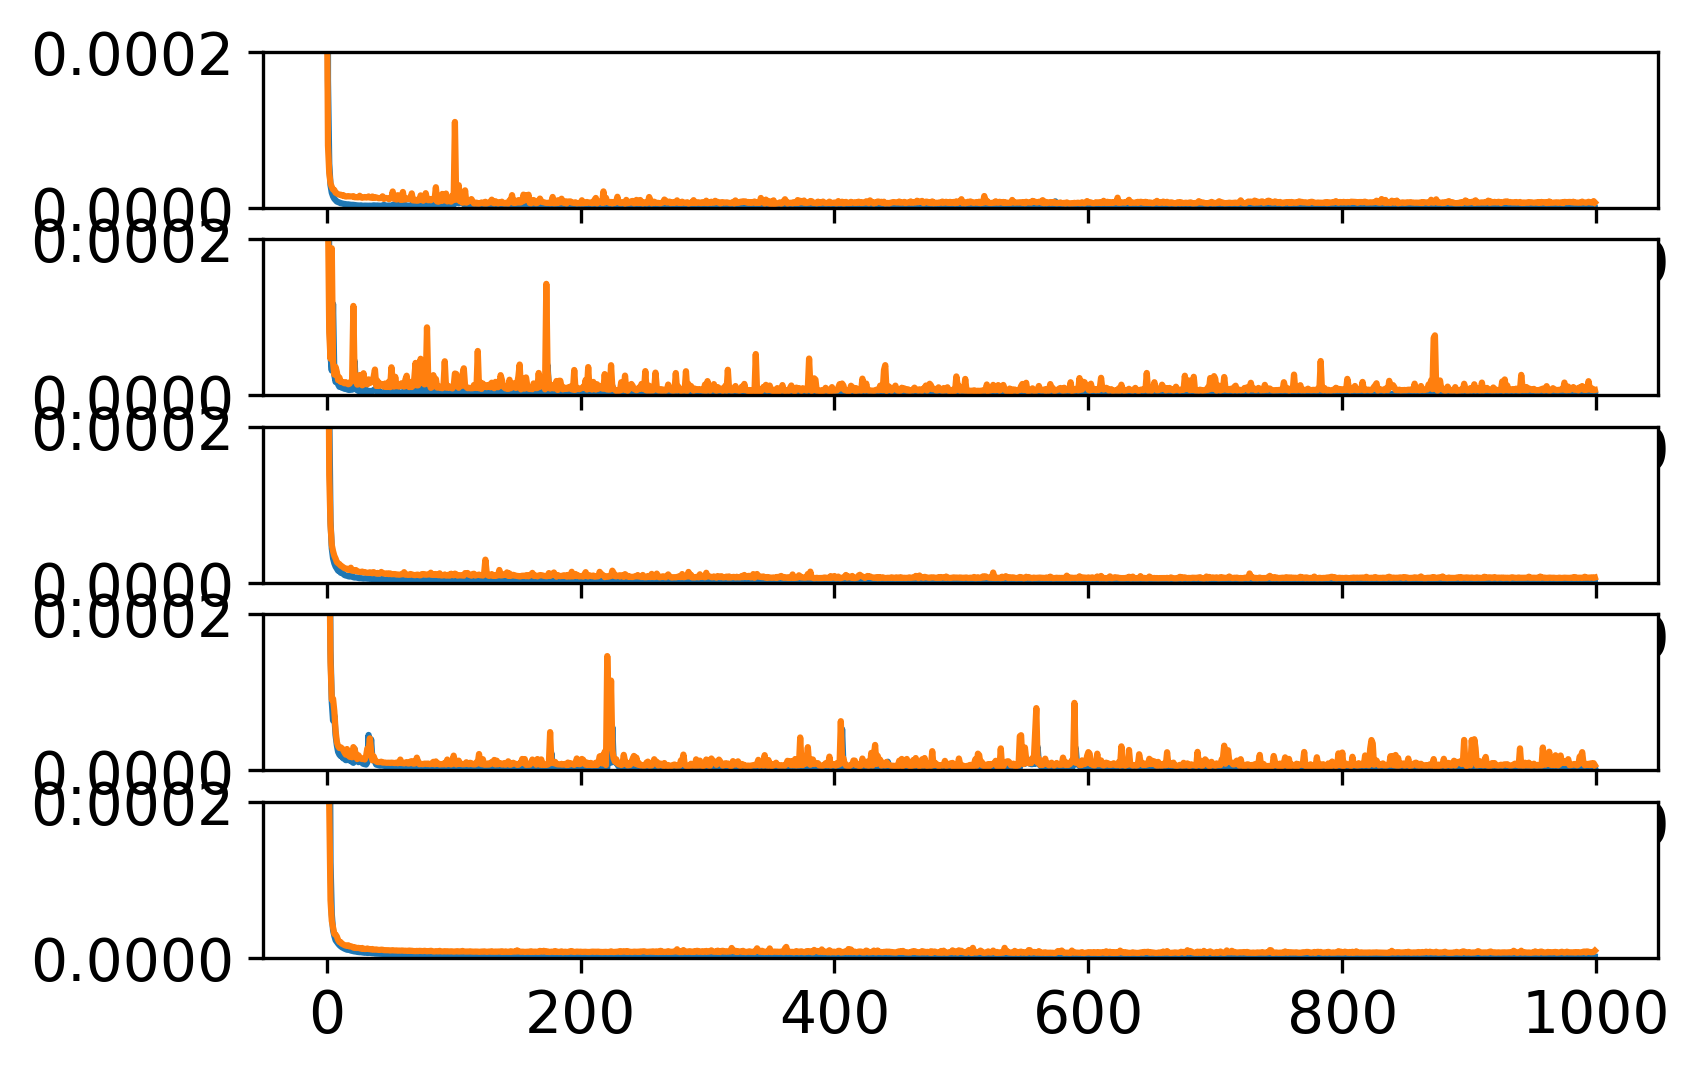

In [199]:
batch = [1,2,3,4,5]
batch_evals = pd.DataFrame()

for d in batch: 
    batch = Sequential()
    batch.add(Dense(300, activation='relu', input_shape=(16,)))
    batch.add(Dense(300, activation='relu'))
    batch.add(Dense(300, activation='relu'))
    batch.add(Dense(300, activation='relu'))
    batch.add(Dense(1, activation='linear'))
    batch.compile(loss='huber', optimizer=optimizer)

    print('Starting batch = ', d)
    start = time.time()
    NN_batch = batch.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 1000,  batch_size=round(d*len(train_features)/100))
    it = str(d)+'_batch'
    ev = batch.evaluate(test_features_norm,test_labels)
    delt = str(datetime.timedelta(seconds=time.time()-start))
    batch_evals = batch_evals.append([[it,ev,delt]])
    
    plt.subplot(5,1,d)
    plt.plot(NN_batch.history['loss'], label = 'train')
    plt.plot(NN_batch.history['val_loss'], label = 'validation')
    matplotlib.rcParams['figure.dpi'] = 300
    plt.ylim([0,.0002])

batch_evals

Choose 213

## Cross-validating Learning rate

before = .001

Starting learning =  0.1
Epoch 1/1000
16/16 [==============================] - 2s 109ms/step - loss: 2210.2117 - val_loss: 0.0921
Epoch 2/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0273 - val_loss: 0.0094
Epoch 3/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 4/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.9138e-04 - val_loss: 5.3568e-05
Epoch 5/1000
16/16 [==============================] - 0s 10ms/step - loss: 8.7399e-05 - val_loss: 8.5615e-05
Epoch 6/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.6560e-05 - val_loss: 3.1087e-05
Epoch 7/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.1233e-05 - val_loss: 2.5704e-05
Epoch 8/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.7365e-05 - val_loss: 2.3335e-05
Epoch 9/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.6092e-05 - val_loss: 2.2914e-05
Epoch 10/1000


16/16 [==============================] - 0s 9ms/step - loss: 2.5650e-05 - val_loss: 2.2295e-05
Epoch 77/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5635e-05 - val_loss: 2.2288e-05
Epoch 78/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5595e-05 - val_loss: 2.2352e-05
Epoch 79/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5539e-05 - val_loss: 2.2328e-05
Epoch 80/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5595e-05 - val_loss: 2.2279e-05
Epoch 81/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5593e-05 - val_loss: 2.2459e-05
Epoch 82/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5719e-05 - val_loss: 2.2500e-05
Epoch 83/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5646e-05 - val_loss: 2.2209e-05
Epoch 84/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5637e-05 - val_loss: 2.2370e-05
Epoch 85/1000
16/16 [============

16/16 [==============================] - 0s 9ms/step - loss: 1.4312e-05 - val_loss: 1.2094e-05
Epoch 225/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.3465e-05 - val_loss: 1.3643e-05
Epoch 226/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.3500e-05 - val_loss: 1.3276e-05
Epoch 227/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.4235e-05 - val_loss: 1.4802e-05
Epoch 228/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.3896e-05 - val_loss: 1.3882e-05
Epoch 229/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.5243e-05 - val_loss: 1.8328e-05
Epoch 230/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.2884e-05 - val_loss: 1.1423e-05
Epoch 231/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.3243e-05 - val_loss: 1.5954e-05
Epoch 232/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.3836e-05 - val_loss: 1.1239e-05
Epoch 233/1000
16/16

16/16 [==============================] - 0s 9ms/step - loss: 1.7853e-05 - val_loss: 1.7867e-05
Epoch 373/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.2591e-05 - val_loss: 1.4958e-05
Epoch 374/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.5377e-05 - val_loss: 9.3463e-06
Epoch 375/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.7309e-05 - val_loss: 3.0542e-05
Epoch 376/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.6178e-05 - val_loss: 1.7698e-05
Epoch 377/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.8768e-05 - val_loss: 1.5108e-05
Epoch 378/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.1983e-05 - val_loss: 2.3300e-05
Epoch 379/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.7520e-05 - val_loss: 1.1182e-05
Epoch 380/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.5734e-05 - val_loss: 1.1076e-05
Epoch 381/1000
16/16 [==

16/16 [==============================] - 0s 12ms/step - loss: 2.6822e-05 - val_loss: 2.3528e-05
Epoch 521/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.8597e-05 - val_loss: 2.6402e-05
Epoch 522/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.7378e-05 - val_loss: 2.7606e-05
Epoch 523/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.2045e-05 - val_loss: 2.2604e-05
Epoch 524/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.0544e-05 - val_loss: 2.5165e-05
Epoch 525/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.6550e-05 - val_loss: 2.2537e-05
Epoch 526/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.6359e-05 - val_loss: 2.2826e-05
Epoch 527/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.8964e-05 - val_loss: 2.2604e-05
Epoch 528/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.6209e-05 - val_loss: 2.6374e-05
Epoch 529/1000
16/1

16/16 [==============================] - 0s 10ms/step - loss: 2.8847e-05 - val_loss: 3.1854e-05
Epoch 595/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.4500e-05 - val_loss: 5.9386e-05
Epoch 596/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.2628e-05 - val_loss: 2.2807e-05
Epoch 597/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.7778e-05 - val_loss: 2.4171e-05
Epoch 598/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.6869e-05 - val_loss: 2.6229e-05
Epoch 599/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.0165e-05 - val_loss: 2.2550e-05
Epoch 600/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.3108e-05 - val_loss: 2.4290e-05
Epoch 601/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.1506e-05 - val_loss: 2.2794e-05
Epoch 602/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.9352e-05 - val_loss: 2.2520e-05
Epoch 603/1000
16/16 

16/16 [==============================] - 0s 11ms/step - loss: 3.3255e-05 - val_loss: 2.5007e-05
Epoch 743/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.9143e-05 - val_loss: 2.2975e-05
Epoch 744/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.8125e-05 - val_loss: 2.2543e-05
Epoch 745/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.8927e-05 - val_loss: 2.2486e-05
Epoch 746/1000
16/16 [==============================] - 0s 8ms/step - loss: 3.0117e-05 - val_loss: 4.0854e-05
Epoch 747/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.4066e-05 - val_loss: 2.4236e-05
Epoch 748/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.9425e-05 - val_loss: 2.9032e-05
Epoch 749/1000
16/16 [==============================] - 0s 8ms/step - loss: 2.9840e-05 - val_loss: 2.7216e-05
Epoch 750/1000
16/16 [==============================] - 0s 8ms/step - loss: 2.8836e-05 - val_loss: 2.7274e-05
Epoch 751/1000
16/16

16/16 [==============================] - 0s 10ms/step - loss: 2.7069e-05 - val_loss: 2.2884e-05
Epoch 891/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.0345e-05 - val_loss: 3.0716e-05
Epoch 892/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.9628e-05 - val_loss: 2.5450e-05
Epoch 893/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.8628e-05 - val_loss: 3.3695e-05
Epoch 894/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.1508e-05 - val_loss: 2.9595e-05
Epoch 895/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.3140e-05 - val_loss: 2.2556e-05
Epoch 896/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.7988e-05 - val_loss: 2.2582e-05
Epoch 897/1000
16/16 [==============================] - 0s 14ms/step - loss: 2.8356e-05 - val_loss: 4.4078e-05
Epoch 898/1000
16/16 [==============================] - 0s 13ms/step - loss: 4.4338e-05 - val_loss: 2.6840e-05
Epoch 899/1000
16

Epoch 964/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.9494e-05 - val_loss: 2.4343e-05
Epoch 965/1000
16/16 [==============================] - 0s 8ms/step - loss: 2.6507e-05 - val_loss: 2.6453e-05
Epoch 966/1000
16/16 [==============================] - 0s 8ms/step - loss: 2.9113e-05 - val_loss: 2.3550e-05
Epoch 967/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.8554e-05 - val_loss: 2.3761e-05
Epoch 968/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.7336e-05 - val_loss: 2.2624e-05
Epoch 969/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.5824e-05 - val_loss: 3.7943e-05
Epoch 970/1000
16/16 [==============================] - 0s 8ms/step - loss: 3.1088e-05 - val_loss: 2.6197e-05
Epoch 971/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.0733e-05 - val_loss: 2.2483e-05
Epoch 972/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.7823e-05 - val_loss: 2.3919e-05
Epoch 9

16/16 [==============================] - 0s 8ms/step - loss: 8.6180e-06 - val_loss: 9.7116e-06
Epoch 39/1000
16/16 [==============================] - 0s 8ms/step - loss: 7.7279e-06 - val_loss: 8.9292e-06
Epoch 40/1000
16/16 [==============================] - 0s 8ms/step - loss: 8.0583e-06 - val_loss: 1.0099e-05
Epoch 41/1000
16/16 [==============================] - 0s 8ms/step - loss: 7.3819e-06 - val_loss: 9.3487e-06
Epoch 42/1000
16/16 [==============================] - 0s 8ms/step - loss: 6.9896e-06 - val_loss: 1.0926e-05
Epoch 43/1000
16/16 [==============================] - 0s 8ms/step - loss: 7.2051e-06 - val_loss: 9.9426e-06
Epoch 44/1000
16/16 [==============================] - 0s 8ms/step - loss: 7.8425e-06 - val_loss: 1.1703e-05
Epoch 45/1000
16/16 [==============================] - 0s 8ms/step - loss: 7.9072e-06 - val_loss: 1.0039e-05
Epoch 46/1000
16/16 [==============================] - 0s 8ms/step - loss: 7.1660e-06 - val_loss: 1.1459e-05
Epoch 47/1000
16/16 [============

16/16 [==============================] - 0s 10ms/step - loss: 9.0020e-06 - val_loss: 7.0476e-06
Epoch 188/1000
16/16 [==============================] - 0s 10ms/step - loss: 8.9388e-06 - val_loss: 2.7271e-05
Epoch 189/1000
16/16 [==============================] - 0s 15ms/step - loss: 7.3547e-06 - val_loss: 6.6528e-06
Epoch 190/1000
16/16 [==============================] - 0s 13ms/step - loss: 5.6173e-06 - val_loss: 1.7427e-05
Epoch 191/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.9254e-05 - val_loss: 6.8755e-06
Epoch 192/1000
16/16 [==============================] - 0s 10ms/step - loss: 7.5374e-06 - val_loss: 6.4977e-06
Epoch 193/1000
16/16 [==============================] - 0s 12ms/step - loss: 5.4558e-06 - val_loss: 8.9330e-06
Epoch 194/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.2362e-05 - val_loss: 9.0319e-06
Epoch 195/1000
16/16 [==============================] - 0s 8ms/step - loss: 7.2130e-06 - val_loss: 5.9893e-06
Epoch 196/1000
16

16/16 [==============================] - 0s 10ms/step - loss: 8.8832e-06 - val_loss: 6.1635e-06
Epoch 262/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.7159e-06 - val_loss: 6.2546e-06
Epoch 263/1000
16/16 [==============================] - 0s 9ms/step - loss: 9.3557e-06 - val_loss: 8.7832e-06
Epoch 264/1000
16/16 [==============================] - 0s 12ms/step - loss: 5.3333e-06 - val_loss: 5.2812e-06
Epoch 265/1000
16/16 [==============================] - 0s 13ms/step - loss: 5.4088e-06 - val_loss: 8.5540e-06
Epoch 266/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.3849e-05 - val_loss: 8.4669e-06
Epoch 267/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.6352e-05 - val_loss: 7.8608e-06
Epoch 268/1000
16/16 [==============================] - 0s 13ms/step - loss: 8.6765e-06 - val_loss: 1.7579e-05
Epoch 269/1000
16/16 [==============================] - 0s 10ms/step - loss: 5.7976e-06 - val_loss: 9.2340e-06
Epoch 270/1000
16

16/16 [==============================] - 0s 12ms/step - loss: 1.7721e-05 - val_loss: 8.5908e-06
Epoch 410/1000
16/16 [==============================] - 0s 13ms/step - loss: 9.1777e-06 - val_loss: 1.3787e-05
Epoch 411/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.0935e-05 - val_loss: 5.8617e-06
Epoch 412/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.5466e-06 - val_loss: 6.2127e-06
Epoch 413/1000
16/16 [==============================] - 0s 11ms/step - loss: 4.1621e-06 - val_loss: 6.1543e-06
Epoch 414/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.9499e-06 - val_loss: 7.3491e-06
Epoch 415/1000
16/16 [==============================] - 0s 10ms/step - loss: 6.1829e-06 - val_loss: 8.9487e-06
Epoch 416/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.7470e-06 - val_loss: 1.1989e-05
Epoch 417/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.2475e-06 - val_loss: 6.0237e-06
Epoch 418/1000
16/1

16/16 [==============================] - 0s 10ms/step - loss: 2.8878e-06 - val_loss: 8.1608e-06
Epoch 558/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.4343e-06 - val_loss: 5.5392e-06
Epoch 559/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.3486e-06 - val_loss: 7.4394e-06
Epoch 560/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.6550e-06 - val_loss: 2.1115e-05
Epoch 561/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.1817e-05 - val_loss: 2.0256e-05
Epoch 562/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.8075e-06 - val_loss: 1.2135e-05
Epoch 563/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.5916e-06 - val_loss: 1.3131e-05
Epoch 564/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.9484e-06 - val_loss: 5.9552e-06
Epoch 565/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.9101e-06 - val_loss: 1.5088e-05
Epoch 566/1000
16/16 [=

16/16 [==============================] - 0s 9ms/step - loss: 5.0540e-06 - val_loss: 7.5653e-06
Epoch 706/1000
16/16 [==============================] - 0s 9ms/step - loss: 8.8189e-06 - val_loss: 1.7767e-05
Epoch 707/1000
16/16 [==============================] - 0s 11ms/step - loss: 6.6951e-06 - val_loss: 1.2374e-05
Epoch 708/1000
16/16 [==============================] - 0s 13ms/step - loss: 4.3666e-06 - val_loss: 7.5969e-06
Epoch 709/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.4590e-06 - val_loss: 5.1215e-06
Epoch 710/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5902e-06 - val_loss: 5.6563e-06
Epoch 711/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.5920e-06 - val_loss: 6.2730e-06
Epoch 712/1000
16/16 [==============================] - 0s 14ms/step - loss: 2.4312e-06 - val_loss: 5.4617e-06
Epoch 713/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.0261e-06 - val_loss: 8.7810e-06
Epoch 714/1000
16/16

16/16 [==============================] - 0s 11ms/step - loss: 2.6556e-06 - val_loss: 8.9680e-06
Epoch 780/1000
16/16 [==============================] - 0s 11ms/step - loss: 6.4572e-06 - val_loss: 8.1374e-06
Epoch 781/1000
16/16 [==============================] - 0s 13ms/step - loss: 8.8987e-06 - val_loss: 6.3508e-06
Epoch 782/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.5906e-06 - val_loss: 6.0752e-06
Epoch 783/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.5832e-06 - val_loss: 5.2779e-06
Epoch 784/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.3696e-06 - val_loss: 7.6751e-06
Epoch 785/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.0496e-06 - val_loss: 8.6219e-06
Epoch 786/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.5077e-06 - val_loss: 5.7709e-06
Epoch 787/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.8691e-06 - val_loss: 5.4221e-06
Epoch 788/1000
16/

16/16 [==============================] - 0s 9ms/step - loss: 5.9236e-06 - val_loss: 9.0551e-06
Epoch 928/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.9644e-06 - val_loss: 1.0517e-05
Epoch 929/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.7479e-06 - val_loss: 7.3036e-06
Epoch 930/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.6921e-06 - val_loss: 6.5878e-06
Epoch 931/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.4367e-06 - val_loss: 6.9248e-06
Epoch 932/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5067e-06 - val_loss: 8.0797e-06
Epoch 933/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.3859e-06 - val_loss: 7.3337e-06
Epoch 934/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.3087e-06 - val_loss: 6.4729e-06
Epoch 935/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.1704e-06 - val_loss: 6.1874e-06
Epoch 936/1000
16/16 [=

34/34 [==============================] - 0s 2ms/step - loss: 1.0497e-05
Starting learning =  0.001
Epoch 1/1000
16/16 [==============================] - 0s 20ms/step - loss: 0.0578 - val_loss: 0.0201
Epoch 2/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0093 - val_loss: 0.0063
Epoch 3/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 4/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 5/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 6/1000
16/16 [==============================] - 0s 10ms/step - loss: 6.6563e-04 - val_loss: 0.0011
Epoch 7/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.0913e-04 - val_loss: 9.8561e-04
Epoch 8/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.6689e-04 - val_loss: 8.1256e-04
Epoch 9/1000
16/16 [==============================] - 0s 11ms/step - loss

16/16 [==============================] - 0s 13ms/step - loss: 2.1534e-05 - val_loss: 2.2406e-04
Epoch 76/1000
16/16 [==============================] - 0s 14ms/step - loss: 2.3949e-05 - val_loss: 2.0946e-04
Epoch 77/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.0567e-05 - val_loss: 2.0588e-04
Epoch 78/1000
16/16 [==============================] - 0s 15ms/step - loss: 8.1422e-06 - val_loss: 2.0358e-04
Epoch 79/1000
16/16 [==============================] - 0s 11ms/step - loss: 7.5118e-06 - val_loss: 1.9974e-04
Epoch 80/1000
16/16 [==============================] - 0s 14ms/step - loss: 7.4663e-06 - val_loss: 2.1290e-04
Epoch 81/1000
16/16 [==============================] - 0s 15ms/step - loss: 8.6108e-06 - val_loss: 1.9543e-04
Epoch 82/1000
16/16 [==============================] - 0s 17ms/step - loss: 7.1839e-06 - val_loss: 1.9659e-04
Epoch 83/1000
16/16 [==============================] - 0s 13ms/step - loss: 6.7222e-06 - val_loss: 2.0893e-04
Epoch 84/1000
16/16 [===

16/16 [==============================] - 0s 9ms/step - loss: 6.6085e-06 - val_loss: 7.4893e-05
Epoch 224/1000
16/16 [==============================] - 0s 10ms/step - loss: 6.1032e-06 - val_loss: 7.1369e-05
Epoch 225/1000
16/16 [==============================] - 0s 16ms/step - loss: 5.7129e-06 - val_loss: 9.6416e-05
Epoch 226/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.5336e-05 - val_loss: 8.2327e-05
Epoch 227/1000
16/16 [==============================] - 0s 12ms/step - loss: 7.9121e-06 - val_loss: 7.3826e-05
Epoch 228/1000
16/16 [==============================] - 0s 14ms/step - loss: 5.5406e-06 - val_loss: 6.9653e-05
Epoch 229/1000
16/16 [==============================] - 0s 12ms/step - loss: 5.2597e-06 - val_loss: 6.7242e-05
Epoch 230/1000
16/16 [==============================] - 0s 12ms/step - loss: 4.4085e-06 - val_loss: 6.4859e-05
Epoch 231/1000
16/16 [==============================] - 0s 11ms/step - loss: 6.3316e-06 - val_loss: 6.6670e-05
Epoch 232/1000
16

16/16 [==============================] - 0s 14ms/step - loss: 4.0920e-06 - val_loss: 4.1683e-05
Epoch 298/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.2881e-06 - val_loss: 4.3445e-05
Epoch 299/1000
16/16 [==============================] - 0s 12ms/step - loss: 3.9182e-06 - val_loss: 4.3162e-05
Epoch 300/1000
16/16 [==============================] - 0s 12ms/step - loss: 4.8222e-06 - val_loss: 4.6692e-05
Epoch 301/1000
16/16 [==============================] - 0s 13ms/step - loss: 5.9898e-06 - val_loss: 4.1932e-05
Epoch 302/1000
16/16 [==============================] - 0s 13ms/step - loss: 3.4222e-06 - val_loss: 4.4373e-05
Epoch 303/1000
16/16 [==============================] - 0s 12ms/step - loss: 3.7828e-06 - val_loss: 4.1370e-05
Epoch 304/1000
16/16 [==============================] - 0s 13ms/step - loss: 3.0652e-06 - val_loss: 4.2468e-05
Epoch 305/1000
16/16 [==============================] - 0s 14ms/step - loss: 2.8719e-06 - val_loss: 3.9583e-05
Epoch 306/1000
1

16/16 [==============================] - 0s 10ms/step - loss: 3.2217e-06 - val_loss: 2.8556e-05
Epoch 372/1000
16/16 [==============================] - 0s 13ms/step - loss: 3.7864e-06 - val_loss: 2.5437e-05
Epoch 373/1000
16/16 [==============================] - 0s 14ms/step - loss: 2.1489e-06 - val_loss: 2.4172e-05
Epoch 374/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.4529e-06 - val_loss: 2.6997e-05
Epoch 375/1000
16/16 [==============================] - 0s 13ms/step - loss: 3.4957e-06 - val_loss: 2.4762e-05
Epoch 376/1000
16/16 [==============================] - 0s 13ms/step - loss: 4.1057e-06 - val_loss: 2.4850e-05
Epoch 377/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.2147e-06 - val_loss: 2.4611e-05
Epoch 378/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.6333e-06 - val_loss: 2.4745e-05
Epoch 379/1000
16/16 [==============================] - 0s 13ms/step - loss: 2.0715e-06 - val_loss: 2.3182e-05
Epoch 380/1000
1

16/16 [==============================] - 0s 10ms/step - loss: 2.3796e-06 - val_loss: 1.4563e-05
Epoch 446/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.4434e-06 - val_loss: 1.6050e-05
Epoch 447/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.6642e-06 - val_loss: 1.3594e-05
Epoch 448/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.4027e-06 - val_loss: 1.8040e-05
Epoch 449/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.2088e-06 - val_loss: 1.5640e-05
Epoch 450/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.9410e-06 - val_loss: 1.4815e-05
Epoch 451/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.8684e-06 - val_loss: 1.5065e-05
Epoch 452/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.9414e-06 - val_loss: 1.9691e-05
Epoch 453/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.5984e-06 - val_loss: 1.4046e-05
Epoch 454/1000
16

16/16 [==============================] - 0s 10ms/step - loss: 2.5307e-06 - val_loss: 1.1363e-05
Epoch 520/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.4085e-06 - val_loss: 1.4554e-05
Epoch 521/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.3012e-06 - val_loss: 1.4120e-05
Epoch 522/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.0367e-06 - val_loss: 1.2107e-05
Epoch 523/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.0650e-06 - val_loss: 1.2719e-05
Epoch 524/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.3244e-06 - val_loss: 1.2400e-05
Epoch 525/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.4944e-06 - val_loss: 1.2996e-05
Epoch 526/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.3409e-06 - val_loss: 1.0872e-05
Epoch 527/1000
16/16 [==============================] - 0s 11ms/step - loss: 4.4976e-06 - val_loss: 1.5636e-05
Epoch 528/1000
16/16

16/16 [==============================] - 0s 10ms/step - loss: 2.0132e-06 - val_loss: 8.6395e-06
Epoch 594/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.8990e-06 - val_loss: 9.4523e-06
Epoch 595/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.3008e-06 - val_loss: 9.2588e-06
Epoch 596/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.1572e-06 - val_loss: 8.3106e-06
Epoch 597/1000
16/16 [==============================] - 0s 11ms/step - loss: 9.9344e-07 - val_loss: 8.5406e-06
Epoch 598/1000
16/16 [==============================] - 0s 13ms/step - loss: 8.9387e-07 - val_loss: 9.2677e-06
Epoch 599/1000
16/16 [==============================] - 0s 11ms/step - loss: 9.7022e-07 - val_loss: 8.6858e-06
Epoch 600/1000
16/16 [==============================] - 0s 11ms/step - loss: 7.2135e-07 - val_loss: 8.5096e-06
Epoch 601/1000
16/16 [==============================] - 0s 13ms/step - loss: 8.3750e-07 - val_loss: 9.6535e-06
Epoch 602/1000
1

16/16 [==============================] - 0s 10ms/step - loss: 2.3018e-06 - val_loss: 7.9037e-06
Epoch 668/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.7559e-06 - val_loss: 7.6227e-06
Epoch 669/1000
16/16 [==============================] - 0s 12ms/step - loss: 2.1966e-06 - val_loss: 7.1776e-06
Epoch 670/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.4423e-06 - val_loss: 7.4569e-06
Epoch 671/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.1433e-06 - val_loss: 8.5821e-06
Epoch 672/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.9395e-06 - val_loss: 9.1641e-06
Epoch 673/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.8875e-06 - val_loss: 8.3169e-06
Epoch 674/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.9712e-06 - val_loss: 8.1640e-06
Epoch 675/1000
16/16 [==============================] - 0s 14ms/step - loss: 1.2801e-06 - val_loss: 7.6416e-06
Epoch 676/1000
16

16/16 [==============================] - 0s 10ms/step - loss: 3.0709e-07 - val_loss: 7.1128e-06
Epoch 742/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.6220e-07 - val_loss: 7.4181e-06
Epoch 743/1000
16/16 [==============================] - 0s 12ms/step - loss: 4.3578e-07 - val_loss: 7.2255e-06
Epoch 744/1000
16/16 [==============================] - 0s 10ms/step - loss: 5.7284e-07 - val_loss: 8.6118e-06
Epoch 745/1000
16/16 [==============================] - 0s 10ms/step - loss: 9.6197e-07 - val_loss: 8.0931e-06
Epoch 746/1000
16/16 [==============================] - 0s 11ms/step - loss: 8.5602e-07 - val_loss: 7.2211e-06
Epoch 747/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.9603e-07 - val_loss: 7.5083e-06
Epoch 748/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.4179e-07 - val_loss: 7.3842e-06
Epoch 749/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.8768e-07 - val_loss: 7.3023e-06
Epoch 750/1000
16

16/16 [==============================] - 0s 12ms/step - loss: 2.8032e-07 - val_loss: 7.4824e-06
Epoch 890/1000
16/16 [==============================] - 0s 11ms/step - loss: 4.1466e-07 - val_loss: 7.7055e-06
Epoch 891/1000
16/16 [==============================] - 0s 13ms/step - loss: 3.1132e-07 - val_loss: 8.1399e-06
Epoch 892/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.2152e-06 - val_loss: 8.0965e-06
Epoch 893/1000
16/16 [==============================] - 0s 15ms/step - loss: 7.1897e-07 - val_loss: 7.9719e-06
Epoch 894/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.5765e-07 - val_loss: 7.1815e-06
Epoch 895/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.8280e-07 - val_loss: 7.7229e-06
Epoch 896/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.5113e-07 - val_loss: 8.0664e-06
Epoch 897/1000
16/16 [==============================] - 0s 11ms/step - loss: 5.3297e-07 - val_loss: 8.5097e-06
Epoch 898/1000
16

Epoch 963/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.7718e-07 - val_loss: 7.2449e-06
Epoch 964/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.4381e-07 - val_loss: 6.9333e-06
Epoch 965/1000
16/16 [==============================] - 0s 14ms/step - loss: 2.3568e-07 - val_loss: 7.2828e-06
Epoch 966/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.8104e-07 - val_loss: 7.2523e-06
Epoch 967/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.6098e-07 - val_loss: 7.2066e-06
Epoch 968/1000
16/16 [==============================] - 0s 14ms/step - loss: 6.9420e-07 - val_loss: 7.4162e-06
Epoch 969/1000
16/16 [==============================] - 0s 10ms/step - loss: 6.8799e-07 - val_loss: 7.0980e-06
Epoch 970/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.0935e-07 - val_loss: 7.8995e-06
Epoch 971/1000
16/16 [==============================] - 0s 13ms/step - loss: 7.6026e-07 - val_loss: 7.4626e-06
Ep

16/16 [==============================] - 0s 10ms/step - loss: 2.1940e-05 - val_loss: 0.0012
Epoch 116/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.1583e-05 - val_loss: 0.0012
Epoch 117/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.1403e-05 - val_loss: 0.0012
Epoch 118/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.0496e-05 - val_loss: 0.0012
Epoch 119/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.9576e-05 - val_loss: 0.0012
Epoch 120/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.9444e-05 - val_loss: 0.0012
Epoch 121/1000
16/16 [==============================] - 0s 15ms/step - loss: 1.9546e-05 - val_loss: 0.0012
Epoch 122/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.9977e-05 - val_loss: 0.0012
Epoch 123/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.9851e-05 - val_loss: 0.0012
Epoch 124/1000
16/16 [==============================]

Epoch 192/1000
16/16 [==============================] - 0s 11ms/step - loss: 9.4464e-06 - val_loss: 0.0011
Epoch 193/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.2278e-05 - val_loss: 0.0011
Epoch 194/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.3451e-05 - val_loss: 0.0011
Epoch 195/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.1246e-05 - val_loss: 0.0011
Epoch 196/1000
16/16 [==============================] - 0s 16ms/step - loss: 1.0984e-05 - val_loss: 0.0011
Epoch 197/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.1789e-05 - val_loss: 0.0011
Epoch 198/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.5779e-05 - val_loss: 0.0011
Epoch 199/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.6077e-05 - val_loss: 0.0010
Epoch 200/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.4941e-05 - val_loss: 0.0011
Epoch 201/1000
16/16 [===============

16/16 [==============================] - 0s 16ms/step - loss: 6.8927e-06 - val_loss: 9.7391e-04
Epoch 343/1000
16/16 [==============================] - 0s 18ms/step - loss: 7.8002e-06 - val_loss: 9.6531e-04
Epoch 344/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.0233e-05 - val_loss: 9.8382e-04
Epoch 345/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.4285e-05 - val_loss: 0.0011
Epoch 346/1000
16/16 [==============================] - 0s 12ms/step - loss: 6.6011e-05 - val_loss: 0.0012
Epoch 347/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.1262e-05 - val_loss: 9.0449e-04
Epoch 348/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.3713e-05 - val_loss: 9.5151e-04
Epoch 349/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.3847e-05 - val_loss: 9.1238e-04
Epoch 350/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.7234e-05 - val_loss: 9.5958e-04
Epoch 351/1000
16/16 [======

Epoch 490/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.1589e-05 - val_loss: 7.9599e-04
Epoch 491/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.0010e-05 - val_loss: 7.8810e-04
Epoch 492/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.1084e-05 - val_loss: 7.7518e-04
Epoch 493/1000
16/16 [==============================] - 0s 10ms/step - loss: 9.6897e-06 - val_loss: 7.6859e-04
Epoch 494/1000
16/16 [==============================] - 0s 10ms/step - loss: 9.6320e-06 - val_loss: 7.8550e-04
Epoch 495/1000
16/16 [==============================] - 0s 18ms/step - loss: 9.2231e-06 - val_loss: 7.9017e-04
Epoch 496/1000
16/16 [==============================] - 0s 14ms/step - loss: 7.9203e-06 - val_loss: 8.0857e-04
Epoch 497/1000
16/16 [==============================] - 0s 15ms/step - loss: 5.8509e-06 - val_loss: 7.9183e-04
Epoch 498/1000
16/16 [==============================] - 0s 12ms/step - loss: 4.2656e-06 - val_loss: 7.8291e-04
E

Epoch 564/1000
16/16 [==============================] - 0s 15ms/step - loss: 3.4937e-05 - val_loss: 7.7589e-04
Epoch 565/1000
16/16 [==============================] - 0s 15ms/step - loss: 3.5202e-05 - val_loss: 7.2875e-04
Epoch 566/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.5897e-05 - val_loss: 6.8317e-04
Epoch 567/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.4528e-05 - val_loss: 7.5653e-04
Epoch 568/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.6804e-05 - val_loss: 7.8146e-04
Epoch 569/1000
16/16 [==============================] - 0s 12ms/step - loss: 4.6256e-05 - val_loss: 9.0893e-04
Epoch 570/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.6123e-05 - val_loss: 7.9559e-04
Epoch 571/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.7183e-05 - val_loss: 6.9960e-04
Epoch 572/1000
16/16 [==============================] - 0s 11ms/step - loss: 4.3228e-05 - val_loss: 7.7907e-04
Epo

16/16 [==============================] - 0s 9ms/step - loss: 1.8944e-05 - val_loss: 7.2903e-04
Epoch 639/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.7180e-05 - val_loss: 6.9138e-04
Epoch 640/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.4239e-05 - val_loss: 6.8218e-04
Epoch 641/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.3029e-05 - val_loss: 6.7459e-04
Epoch 642/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.0920e-05 - val_loss: 7.2173e-04
Epoch 643/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.0634e-05 - val_loss: 6.7566e-04
Epoch 644/1000
16/16 [==============================] - 0s 11ms/step - loss: 9.4243e-06 - val_loss: 6.5882e-04
Epoch 645/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.0098e-05 - val_loss: 7.2536e-04
Epoch 646/1000
16/16 [==============================] - 0s 10ms/step - loss: 9.7747e-06 - val_loss: 6.9655e-04
Epoch 647/1000
16/

16/16 [==============================] - 0s 10ms/step - loss: 3.0235e-06 - val_loss: 6.0561e-04
Epoch 787/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.4061e-06 - val_loss: 5.9376e-04
Epoch 788/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.3263e-06 - val_loss: 6.1936e-04
Epoch 789/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.5646e-06 - val_loss: 6.0030e-04
Epoch 790/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.0625e-06 - val_loss: 5.7750e-04
Epoch 791/1000
16/16 [==============================] - 0s 10ms/step - loss: 7.3055e-06 - val_loss: 6.2230e-04
Epoch 792/1000
16/16 [==============================] - 0s 11ms/step - loss: 5.9108e-06 - val_loss: 5.7828e-04
Epoch 793/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.3614e-06 - val_loss: 6.0435e-04
Epoch 794/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.2817e-06 - val_loss: 5.9522e-04
Epoch 795/1000
16/16 

16/16 [==============================] - 0s 9ms/step - loss: 1.0205e-06 - val_loss: 5.2608e-04
Epoch 935/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.8596e-07 - val_loss: 5.3086e-04
Epoch 936/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.7843e-07 - val_loss: 5.3127e-04
Epoch 937/1000
16/16 [==============================] - 0s 9ms/step - loss: 8.3279e-07 - val_loss: 5.2746e-04
Epoch 938/1000
16/16 [==============================] - 0s 10ms/step - loss: 8.7827e-07 - val_loss: 5.3187e-04
Epoch 939/1000
16/16 [==============================] - 0s 10ms/step - loss: 9.6657e-07 - val_loss: 5.3530e-04
Epoch 940/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.0861e-06 - val_loss: 5.2892e-04
Epoch 941/1000
16/16 [==============================] - 0s 9ms/step - loss: 9.6713e-07 - val_loss: 5.2845e-04
Epoch 942/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.1969e-06 - val_loss: 5.1721e-04
Epoch 943/1000
16/16 [=

Epoch 8/1000
16/16 [==============================] - 0s 11ms/step - loss: 0.1007 - val_loss: 0.0927
Epoch 9/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0910 - val_loss: 0.0840
Epoch 10/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0820 - val_loss: 0.0758
Epoch 11/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0736 - val_loss: 0.0682
Epoch 12/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0658 - val_loss: 0.0613
Epoch 13/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0587 - val_loss: 0.0549
Epoch 14/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0522 - val_loss: 0.0491
Epoch 15/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0465 - val_loss: 0.0441
Epoch 16/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0416 - val_loss: 0.0397
Epoch 17/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0374 - v

16/16 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 169/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 170/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 171/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 172/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 173/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 174/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 175/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 176/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 177/1000
16/16 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 

16/16 [==============================] - 0s 9ms/step - loss: 1.3037e-04 - val_loss: 0.0019
Epoch 323/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.2786e-04 - val_loss: 0.0019
Epoch 324/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.2555e-04 - val_loss: 0.0019
Epoch 325/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.2466e-04 - val_loss: 0.0019
Epoch 326/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.2298e-04 - val_loss: 0.0019
Epoch 327/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.2140e-04 - val_loss: 0.0019
Epoch 328/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.2012e-04 - val_loss: 0.0019
Epoch 329/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.1863e-04 - val_loss: 0.0019
Epoch 330/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.1825e-04 - val_loss: 0.0019
Epoch 331/1000
16/16 [==============================] - 0s 

16/16 [==============================] - 0s 9ms/step - loss: 2.5752e-05 - val_loss: 0.0016
Epoch 477/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5461e-05 - val_loss: 0.0016
Epoch 478/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5301e-05 - val_loss: 0.0015
Epoch 479/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5285e-05 - val_loss: 0.0016
Epoch 480/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.4856e-05 - val_loss: 0.0016
Epoch 481/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.4955e-05 - val_loss: 0.0015
Epoch 482/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.4731e-05 - val_loss: 0.0015
Epoch 483/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5071e-05 - val_loss: 0.0016
Epoch 484/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.4124e-05 - val_loss: 0.0016
Epoch 485/1000
16/16 [==============================] - 0s 

16/16 [==============================] - 0s 10ms/step - loss: 8.5553e-06 - val_loss: 0.0014
Epoch 631/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.8172e-06 - val_loss: 0.0014
Epoch 632/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.8003e-06 - val_loss: 0.0014
Epoch 633/1000
16/16 [==============================] - 0s 10ms/step - loss: 7.7193e-06 - val_loss: 0.0014
Epoch 634/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.5099e-06 - val_loss: 0.0014
Epoch 635/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.4323e-06 - val_loss: 0.0014
Epoch 636/1000
16/16 [==============================] - 0s 10ms/step - loss: 7.6059e-06 - val_loss: 0.0014
Epoch 637/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.6383e-06 - val_loss: 0.0014
Epoch 638/1000
16/16 [==============================] - 0s 9ms/step - loss: 7.5785e-06 - val_loss: 0.0014
Epoch 639/1000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 10ms/step - loss: 4.1618e-06 - val_loss: 0.0013
Epoch 785/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.1259e-06 - val_loss: 0.0013
Epoch 786/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.1100e-06 - val_loss: 0.0013
Epoch 787/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.1761e-06 - val_loss: 0.0013
Epoch 788/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.1355e-06 - val_loss: 0.0013
Epoch 789/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.2512e-06 - val_loss: 0.0013
Epoch 790/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.0026e-06 - val_loss: 0.0013
Epoch 791/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.6863e-06 - val_loss: 0.0013
Epoch 792/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.6790e-06 - val_loss: 0.0013
Epoch 793/1000
16/16 [==============================] - 

Epoch 861/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.2647e-06 - val_loss: 0.0013
Epoch 862/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.3211e-06 - val_loss: 0.0013
Epoch 863/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.1817e-06 - val_loss: 0.0013
Epoch 864/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.0073e-06 - val_loss: 0.0013
Epoch 865/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.2072e-06 - val_loss: 0.0013
Epoch 866/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.8224e-06 - val_loss: 0.0013
Epoch 867/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.5403e-06 - val_loss: 0.0013
Epoch 868/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.8554e-06 - val_loss: 0.0013
Epoch 869/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.6168e-06 - val_loss: 0.0013
Epoch 870/1000
16/16 [===============

0         1               2
0     0.1_learning  0.000036  0:02:53.283643
0    0.01_learning  0.000010  0:02:55.315817
0   0.001_learning  0.000012  0:03:12.097022
0  0.0001_learning  0.000615  0:03:04.440581
0   1e-05_learning  0.001493  0:02:46.210731

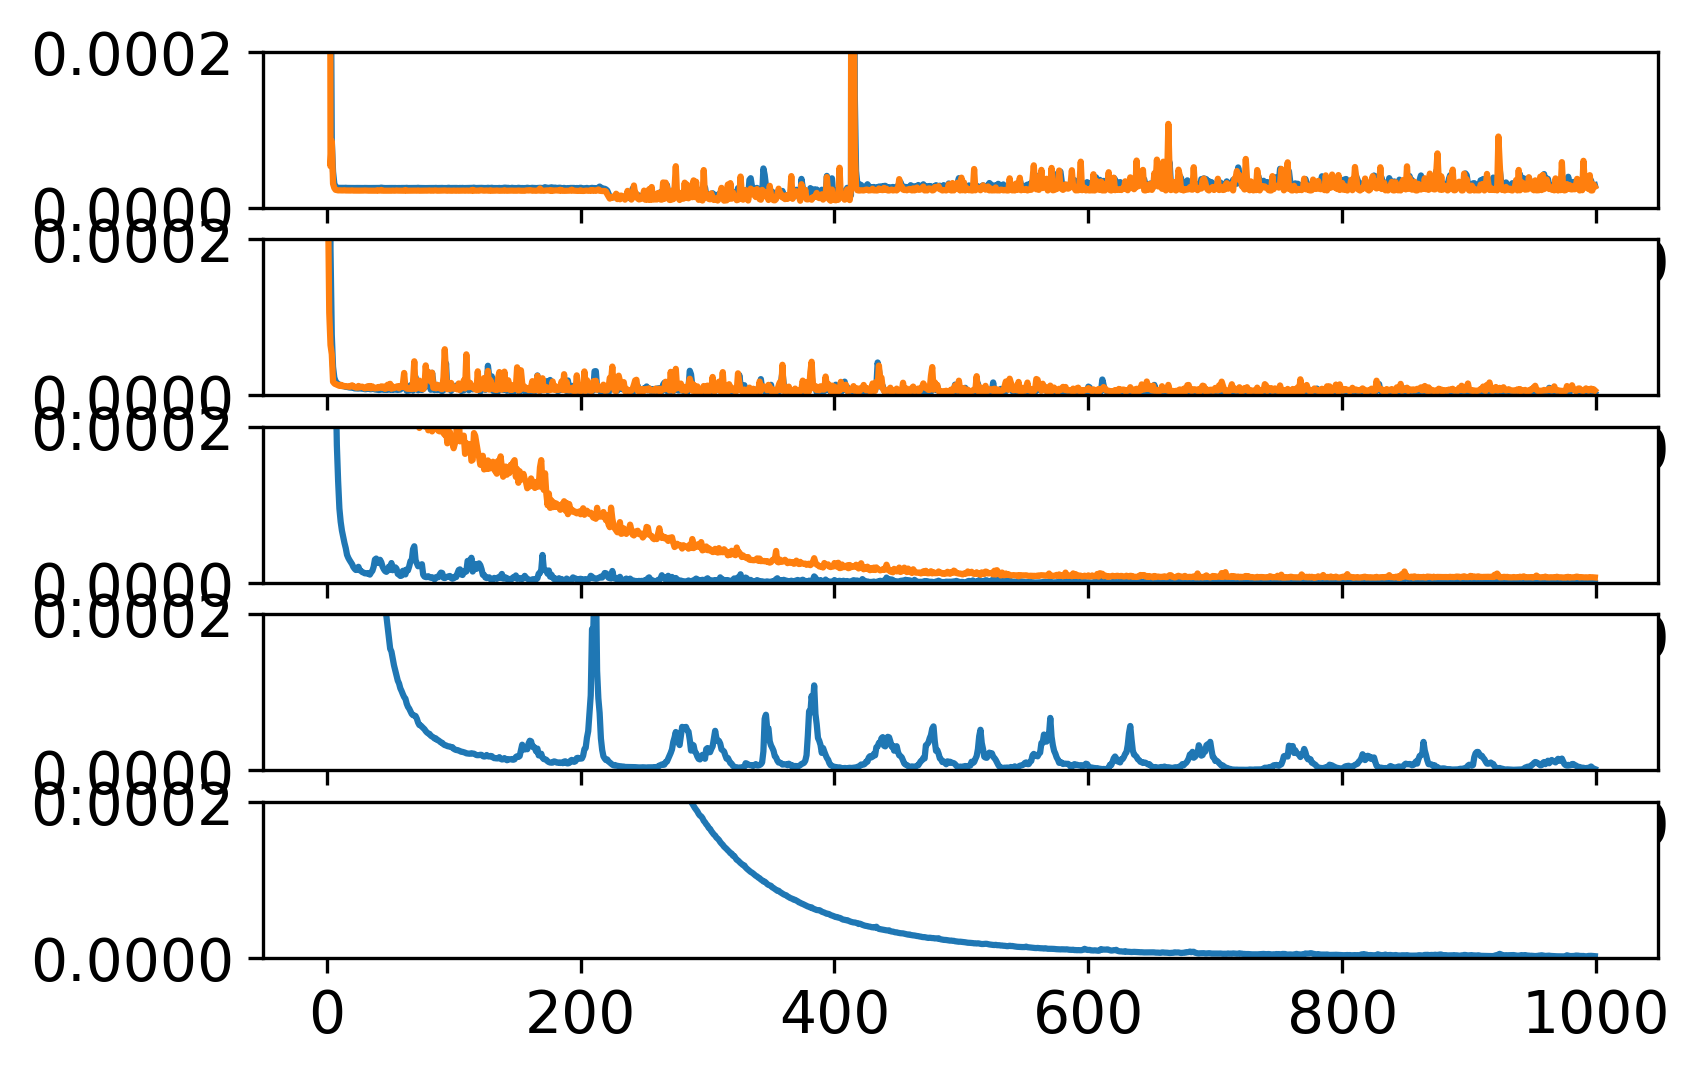

In [201]:
learning = [.1,.01,.001,.0001,.00001]
learning_evals = pd.DataFrame()
i=1

for d in learning: 
    learning = Sequential()
    learning.add(Dense(300, activation='relu', input_shape=(16,)))
    learning.add(Dense(300, activation='relu'))
    learning.add(Dense(300, activation='relu'))
    learning.add(Dense(300, activation='relu'))
    learning.add(Dense(1, activation='linear'))
    optimizer = keras.optimizers.Adam(learning_rate=d)
    learning.compile(loss='huber', optimizer=optimizer)

    print('Starting learning = ', d)
    start = time.time()
    NN_learning = learning.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 1000,  batch_size=213)
    it = str(d)+'_learning'
    ev = learning.evaluate(test_features_norm,test_labels)
    delt = str(datetime.timedelta(seconds=time.time()-start))
    learning_evals = learning_evals.append([[it,ev,delt]])
    
    plt.subplot(5,1,i)
    i+=1 
    plt.plot(NN_learning.history['loss'], label = 'train')
    plt.plot(NN_learning.history['val_loss'], label = 'validation')
    matplotlib.rcParams['figure.dpi'] = 300
    plt.ylim([0,.0002])

learning_evals

Choose .001

## All optimizations together

In [202]:
optimized = Sequential()
optimized.add(Dense(300, activation='relu', input_shape=(16,)))
optimized.add(Dense(300, activation='relu'))
optimized.add(Dense(300, activation='relu'))
optimized.add(Dense(300, activation='relu'))
optimized.add(Dense(1, activation='linear'))
optimizer = keras.optimizers.Adam(learning_rate=.001)
optimized.compile(loss='huber', optimizer=optimizer)

start = time.time()
NN_optimized = optimized.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 1000,  batch_size=213)
str(datetime.timedelta(seconds=time.time()-start))

Epoch 1/1000
16/16 [==============================] - 0s 16ms/step - loss: 0.0616 - val_loss: 0.0171
Epoch 2/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0100 - val_loss: 0.0065
Epoch 3/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 4/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 5/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/1000
16/16 [==============================] - 0s 10ms/step - loss: 7.2192e-04 - val_loss: 0.0011
Epoch 7/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.0725e-04 - val_loss: 8.0989e-04
Epoch 8/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.4942e-04 - val_loss: 7.0544e-04
Epoch 9/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.6469e-04 - val_loss: 5.4067e-04
Epoch 10/1000
16/16 [==============================] - 0s 10ms/

16/16 [==============================] - 0s 10ms/step - loss: 5.3569e-06 - val_loss: 1.6675e-04
Epoch 77/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.4650e-06 - val_loss: 1.7340e-04
Epoch 78/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.9917e-06 - val_loss: 1.7552e-04
Epoch 79/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.7092e-06 - val_loss: 1.7354e-04
Epoch 80/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.9472e-06 - val_loss: 1.6697e-04
Epoch 81/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.5363e-06 - val_loss: 1.7691e-04
Epoch 82/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.3230e-06 - val_loss: 1.6898e-04
Epoch 83/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.1193e-06 - val_loss: 1.6922e-04
Epoch 84/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.8093e-06 - val_loss: 1.7071e-04
Epoch 85/1000
16/16 [==========

16/16 [==============================] - 0s 9ms/step - loss: 6.2332e-06 - val_loss: 6.4047e-05
Epoch 225/1000
16/16 [==============================] - 0s 9ms/step - loss: 8.4149e-06 - val_loss: 6.6650e-05
Epoch 226/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.1163e-05 - val_loss: 5.5230e-05
Epoch 227/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.7636e-06 - val_loss: 5.4111e-05
Epoch 228/1000
16/16 [==============================] - 0s 10ms/step - loss: 5.0640e-06 - val_loss: 5.4105e-05
Epoch 229/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.0547e-06 - val_loss: 5.4008e-05
Epoch 230/1000
16/16 [==============================] - 0s 9ms/step - loss: 8.0663e-06 - val_loss: 5.5154e-05
Epoch 231/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.5599e-06 - val_loss: 5.7647e-05
Epoch 232/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.9192e-06 - val_loss: 5.8258e-05
Epoch 233/1000
16/16 [==

16/16 [==============================] - 0s 9ms/step - loss: 3.6234e-06 - val_loss: 2.3125e-05
Epoch 373/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.9634e-06 - val_loss: 2.3396e-05
Epoch 374/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.9369e-06 - val_loss: 1.7355e-05
Epoch 375/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.3712e-06 - val_loss: 2.1085e-05
Epoch 376/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.2563e-06 - val_loss: 2.1099e-05
Epoch 377/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.3983e-06 - val_loss: 2.3632e-05
Epoch 378/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.7366e-06 - val_loss: 1.7794e-05
Epoch 379/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.8206e-06 - val_loss: 1.9927e-05
Epoch 380/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5140e-06 - val_loss: 1.8518e-05
Epoch 381/1000
16/16 [===

16/16 [==============================] - 0s 9ms/step - loss: 2.5208e-06 - val_loss: 8.5832e-06
Epoch 521/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.6159e-06 - val_loss: 9.1277e-06
Epoch 522/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.1377e-06 - val_loss: 1.0517e-05
Epoch 523/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.7629e-06 - val_loss: 1.9230e-05
Epoch 524/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.6228e-06 - val_loss: 1.4028e-05
Epoch 525/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.0543e-06 - val_loss: 1.0106e-05
Epoch 526/1000
16/16 [==============================] - 0s 13ms/step - loss: 4.7583e-06 - val_loss: 1.2292e-05
Epoch 527/1000
16/16 [==============================] - 0s 9ms/step - loss: 9.1185e-06 - val_loss: 8.2767e-06
Epoch 528/1000
16/16 [==============================] - 0s 9ms/step - loss: 8.6564e-06 - val_loss: 1.0515e-05
Epoch 529/1000
16/16 [=

16/16 [==============================] - 0s 9ms/step - loss: 8.0640e-07 - val_loss: 8.2474e-06
Epoch 669/1000
16/16 [==============================] - 0s 10ms/step - loss: 8.5765e-07 - val_loss: 7.6748e-06
Epoch 670/1000
16/16 [==============================] - 0s 12ms/step - loss: 5.3329e-07 - val_loss: 7.5254e-06
Epoch 671/1000
16/16 [==============================] - 0s 13ms/step - loss: 5.6414e-07 - val_loss: 7.9004e-06
Epoch 672/1000
16/16 [==============================] - 0s 13ms/step - loss: 4.3423e-07 - val_loss: 7.6788e-06
Epoch 673/1000
16/16 [==============================] - 0s 13ms/step - loss: 7.3853e-07 - val_loss: 8.4518e-06
Epoch 674/1000
16/16 [==============================] - 0s 10ms/step - loss: 5.3651e-07 - val_loss: 7.5305e-06
Epoch 675/1000
16/16 [==============================] - 0s 11ms/step - loss: 4.9822e-07 - val_loss: 8.9779e-06
Epoch 676/1000
16/16 [==============================] - 0s 13ms/step - loss: 9.4509e-07 - val_loss: 1.0538e-05
Epoch 677/1000
16

16/16 [==============================] - 0s 12ms/step - loss: 6.7435e-07 - val_loss: 9.2151e-06
Epoch 817/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.1765e-06 - val_loss: 8.1895e-06
Epoch 818/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.2979e-06 - val_loss: 1.0382e-05
Epoch 819/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.8481e-06 - val_loss: 8.5091e-06
Epoch 820/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.9665e-06 - val_loss: 7.6211e-06
Epoch 821/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.1992e-06 - val_loss: 6.9186e-06
Epoch 822/1000
16/16 [==============================] - 0s 10ms/step - loss: 6.9552e-07 - val_loss: 7.5906e-06
Epoch 823/1000
16/16 [==============================] - 0s 11ms/step - loss: 7.3938e-07 - val_loss: 7.5241e-06
Epoch 824/1000
16/16 [==============================] - 0s 11ms/step - loss: 5.7532e-07 - val_loss: 7.1816e-06
Epoch 825/1000
16

Epoch 964/1000
16/16 [==============================] - 0s 12ms/step - loss: 4.6022e-07 - val_loss: 6.6341e-06
Epoch 965/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.9982e-07 - val_loss: 6.6708e-06
Epoch 966/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.5101e-07 - val_loss: 6.6492e-06
Epoch 967/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.1398e-07 - val_loss: 6.6270e-06
Epoch 968/1000
16/16 [==============================] - 0s 12ms/step - loss: 8.1780e-08 - val_loss: 6.5637e-06
Epoch 969/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.4693e-07 - val_loss: 6.6280e-06
Epoch 970/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.8515e-07 - val_loss: 6.5545e-06
Epoch 971/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.5886e-07 - val_loss: 6.6076e-06
Epoch 972/1000
16/16 [==============================] - 0s 13ms/step - loss: 1.0430e-07 - val_loss: 6.6039e-06
Ep

'0:02:51.518749'

In [218]:
evaluations_huber['Huber_Optimized'] = optimized.evaluate(test_features_norm, test_labels)
evaluations_huber

34/34 [==============================] - 0s 2ms/step - loss: 1.1569e-05


{'Huber': 2.169277831853833e-05, 'Huber_Optimized': 1.1568845366127789e-05}

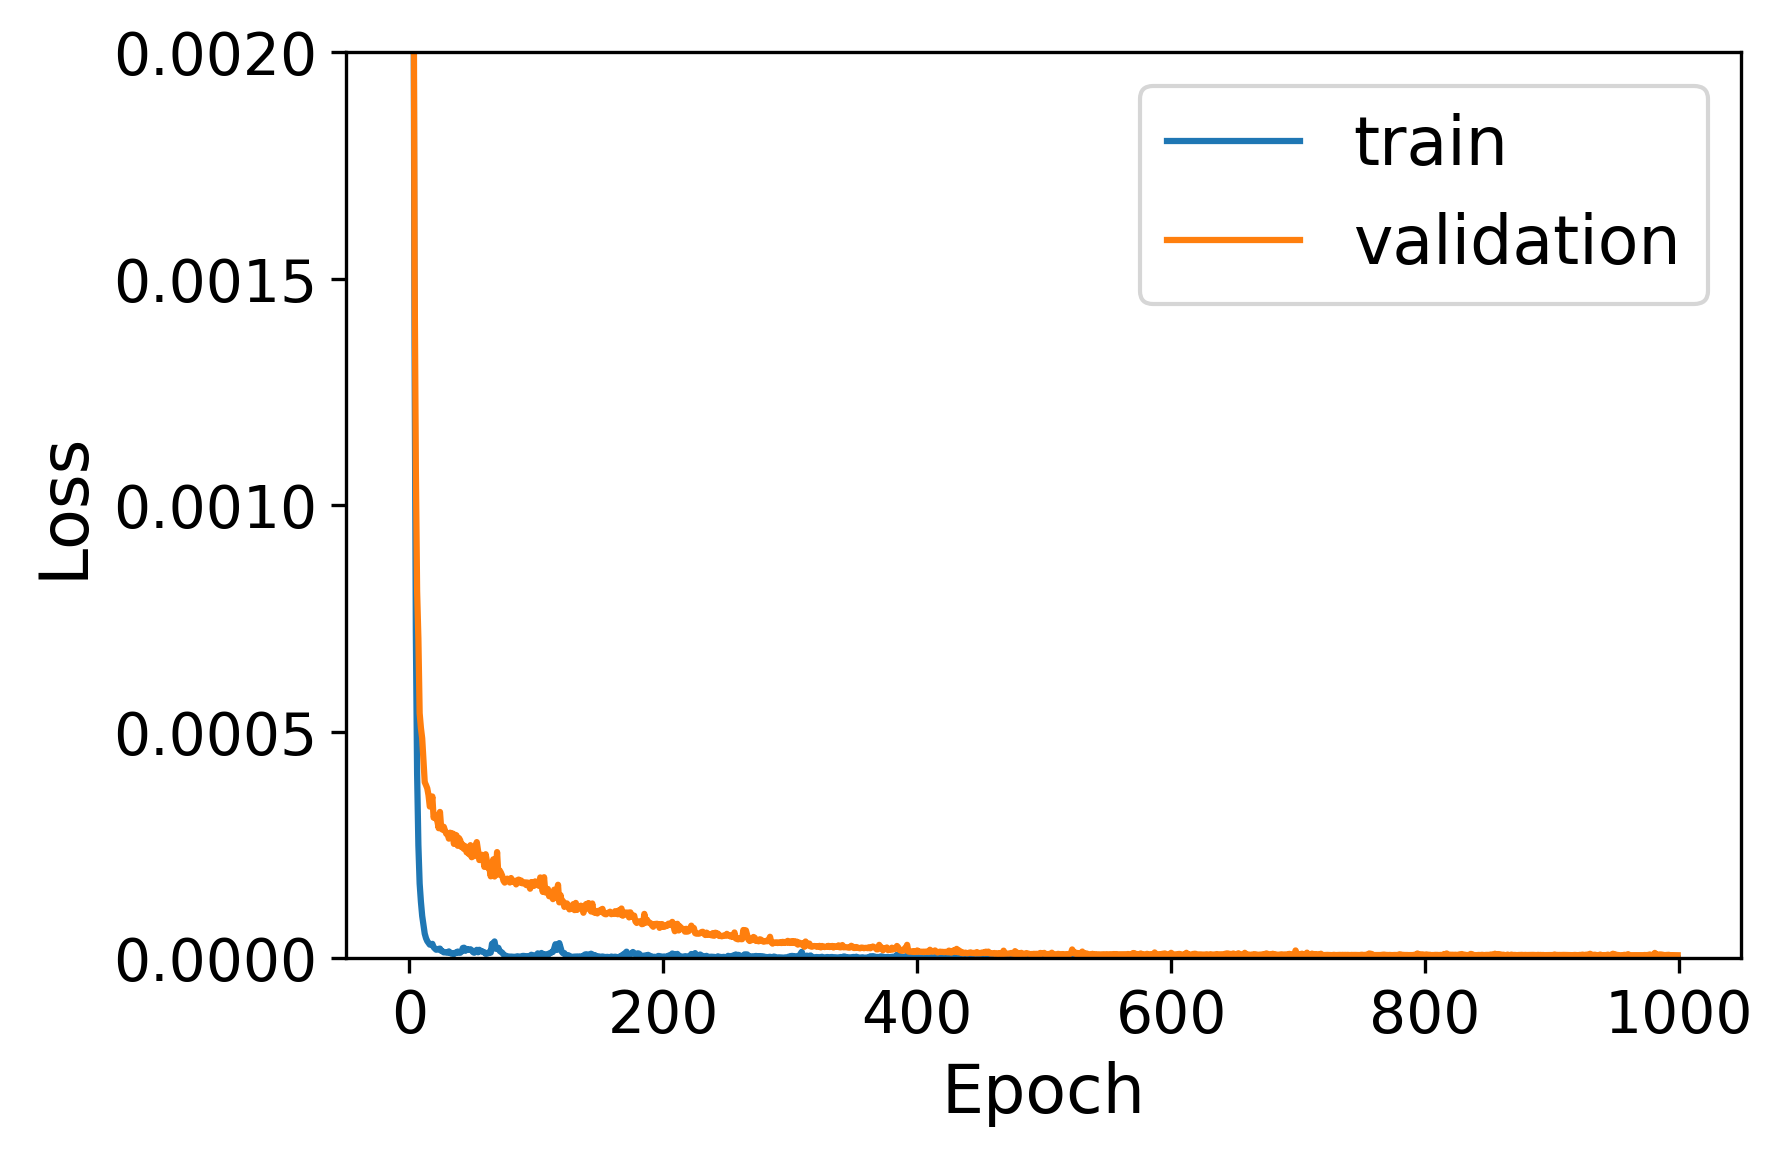

In [205]:
plot_loss(NN_optimized)
plt.ylim([0,.002]);

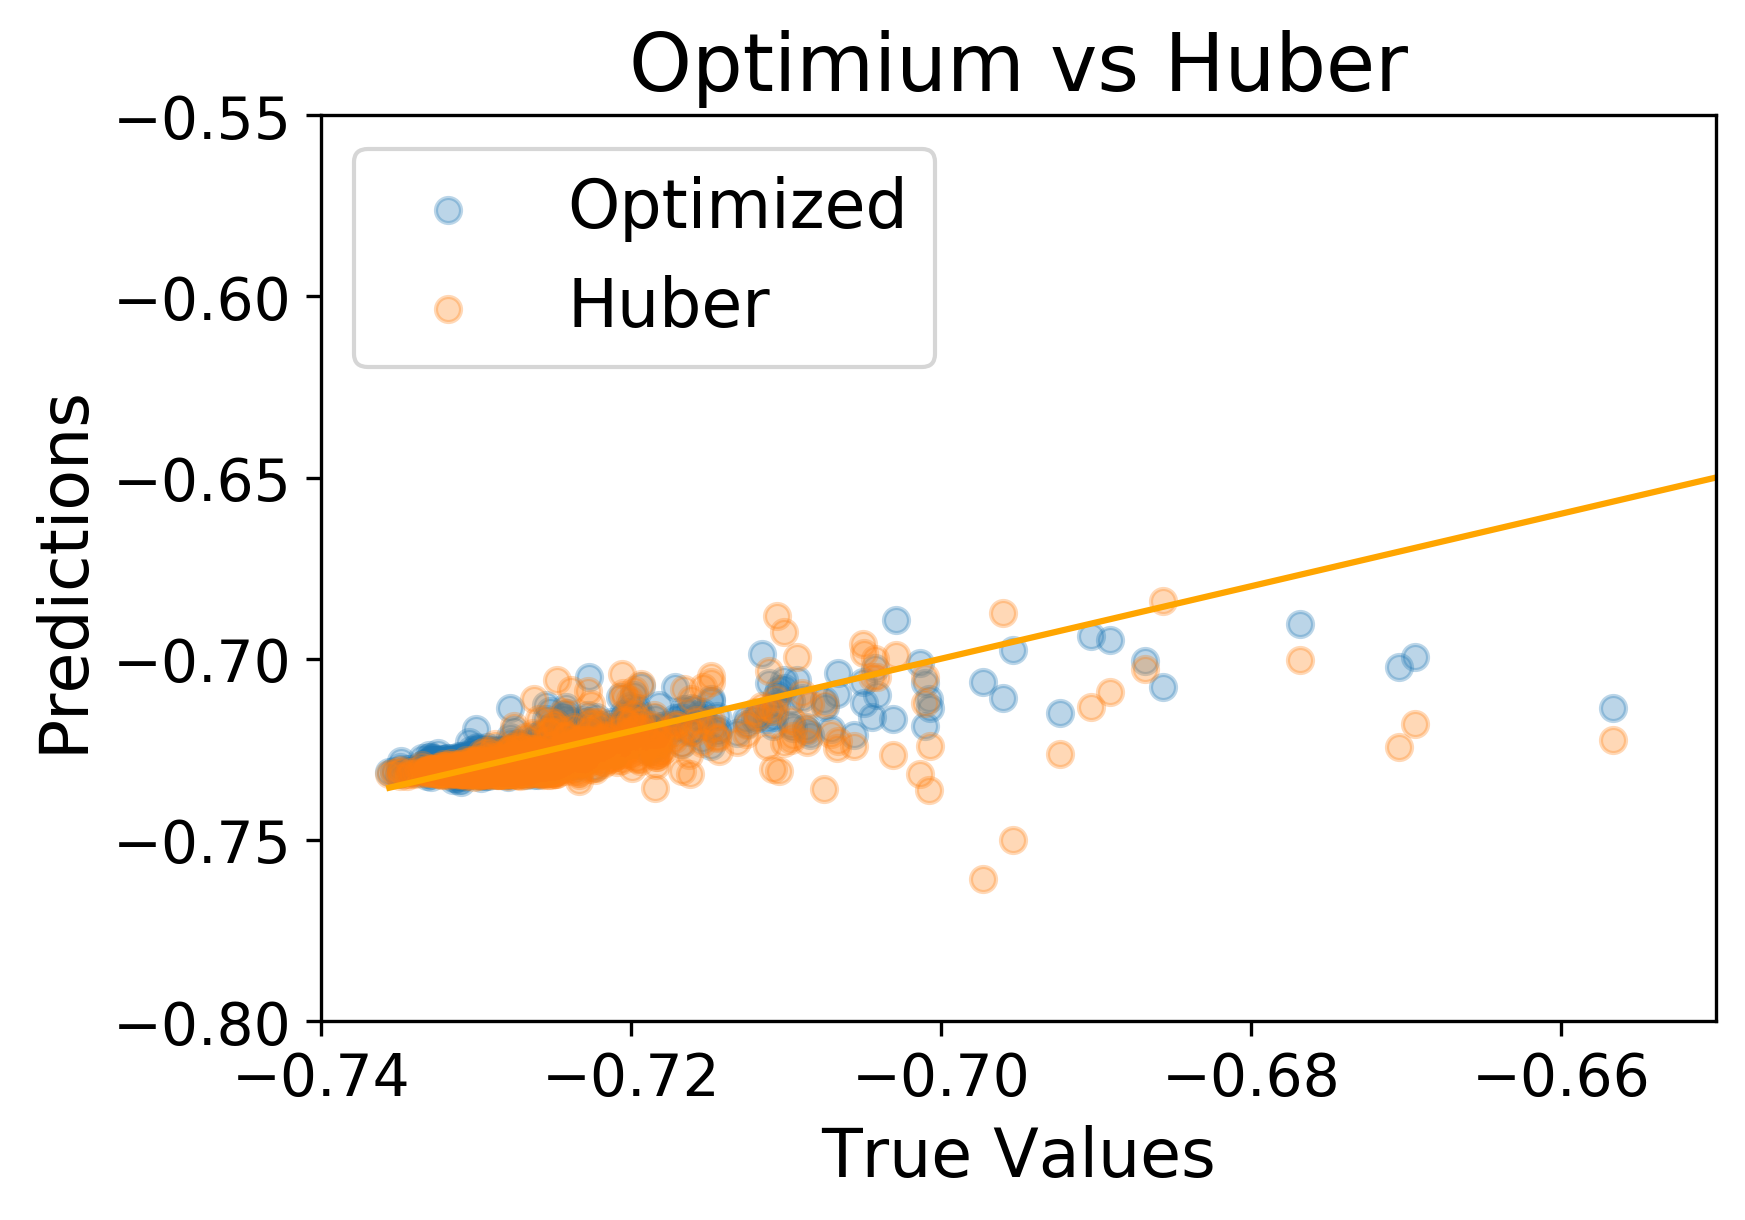

In [207]:
a = 0.3
#plt.scatter(test_labels, first_run, label = 'First Run', alpha = a)
plt.scatter(test_labels, optimized.predict(test_features_norm), label = 'Optimized', alpha = a)
plt.scatter(test_labels, frt_run, label = 'Huber', alpha = a)
plt.xlabel('True Values')
plt.ylabel('Predictions')
x = np.linspace(min(test_labels),max(test_labels))
plt.plot(x,x,c='orange')
plt.legend(loc='upper left')
plt.ylim([-.8,-.55])
plt.xlim([-.74,-.65])

plt.title('Optimium vs Huber');

In [208]:
optimized.save('opt')

INFO:tensorflow:Assets written to: opt/assets


## Drop-out layer

In [209]:
drop = Sequential()
drop.add(Dense(300, activation='relu', input_shape=(16,)))
drop.add(Dense(300, activation='relu'))
drop.add(Dense(300, activation='relu'))
drop.add(Dense(300, activation='relu'))
drop.add(Dense(1, activation='linear'))
model.add(Dropout(0.5))
optimizer = keras.optimizers.Adam(learning_rate=.001)
drop.compile(loss='huber', optimizer=optimizer)

start = time.time()
NN_drop = drop.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 1000,  batch_size=213)
str(datetime.timedelta(seconds=time.time()-start))

Epoch 1/1000
16/16 [==============================] - 0s 18ms/step - loss: 0.0505 - val_loss: 0.0155
Epoch 2/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0086 - val_loss: 0.0069
Epoch 3/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 4/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 5/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 6/1000
16/16 [==============================] - 0s 10ms/step - loss: 6.8931e-04 - val_loss: 0.0013
Epoch 7/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.0163e-04 - val_loss: 0.0010
Epoch 8/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.5785e-04 - val_loss: 8.0440e-04
Epoch 9/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.8111e-04 - val_loss: 7.2510e-04
Epoch 10/1000
16/16 [==============================] - 0s 11ms/step

16/16 [==============================] - 0s 10ms/step - loss: 8.9688e-06 - val_loss: 1.7494e-04
Epoch 151/1000
16/16 [==============================] - 0s 10ms/step - loss: 8.0145e-06 - val_loss: 1.9528e-04
Epoch 152/1000
16/16 [==============================] - 0s 9ms/step - loss: 9.5738e-06 - val_loss: 1.8335e-04
Epoch 153/1000
16/16 [==============================] - 0s 9ms/step - loss: 9.0179e-06 - val_loss: 1.8090e-04
Epoch 154/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.4046e-06 - val_loss: 1.7168e-04
Epoch 155/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.0874e-06 - val_loss: 1.7692e-04
Epoch 156/1000
16/16 [==============================] - 0s 9ms/step - loss: 8.6734e-06 - val_loss: 2.1742e-04
Epoch 157/1000
16/16 [==============================] - 0s 9ms/step - loss: 9.0900e-06 - val_loss: 1.8926e-04
Epoch 158/1000
16/16 [==============================] - 0s 9ms/step - loss: 8.5280e-06 - val_loss: 1.9053e-04
Epoch 159/1000
16/16 [=

16/16 [==============================] - 0s 11ms/step - loss: 6.6126e-06 - val_loss: 6.9340e-05
Epoch 299/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.9758e-06 - val_loss: 5.2774e-05
Epoch 300/1000
16/16 [==============================] - 0s 12ms/step - loss: 3.3093e-06 - val_loss: 5.3586e-05
Epoch 301/1000
16/16 [==============================] - 0s 11ms/step - loss: 4.3572e-06 - val_loss: 6.0885e-05
Epoch 302/1000
16/16 [==============================] - 0s 12ms/step - loss: 3.0650e-06 - val_loss: 5.8214e-05
Epoch 303/1000
16/16 [==============================] - 0s 12ms/step - loss: 3.9151e-06 - val_loss: 5.5486e-05
Epoch 304/1000
16/16 [==============================] - 0s 11ms/step - loss: 3.6160e-06 - val_loss: 5.8167e-05
Epoch 305/1000
16/16 [==============================] - 0s 13ms/step - loss: 4.6175e-06 - val_loss: 5.9344e-05
Epoch 306/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.7566e-06 - val_loss: 5.4872e-05
Epoch 307/1000
16

16/16 [==============================] - 0s 10ms/step - loss: 1.9182e-06 - val_loss: 3.0837e-05
Epoch 373/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.1863e-06 - val_loss: 3.3159e-05
Epoch 374/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.7253e-06 - val_loss: 3.1584e-05
Epoch 375/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.5622e-06 - val_loss: 3.2332e-05
Epoch 376/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.6488e-06 - val_loss: 3.2196e-05
Epoch 377/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.0005e-06 - val_loss: 3.4839e-05
Epoch 378/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.7231e-06 - val_loss: 3.1548e-05
Epoch 379/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.3601e-06 - val_loss: 2.9803e-05
Epoch 380/1000
16/16 [==============================] - ETA: 0s - loss: 2.6089e-0 - 0s 9ms/step - loss: 2.4717e-06 - val_loss: 3.1577

16/16 [==============================] - 0s 11ms/step - loss: 1.4980e-06 - val_loss: 1.7084e-05
Epoch 447/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.4927e-06 - val_loss: 1.8320e-05
Epoch 448/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.7020e-06 - val_loss: 2.0531e-05
Epoch 449/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.1752e-06 - val_loss: 2.0192e-05
Epoch 450/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.0593e-06 - val_loss: 1.8129e-05
Epoch 451/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.9937e-06 - val_loss: 2.3639e-05
Epoch 452/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.5276e-06 - val_loss: 1.7581e-05
Epoch 453/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.8345e-06 - val_loss: 1.7152e-05
Epoch 454/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.1889e-06 - val_loss: 1.7717e-05
Epoch 455/1000
1

16/16 [==============================] - 0s 10ms/step - loss: 2.2965e-06 - val_loss: 1.0668e-05
Epoch 521/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.8799e-06 - val_loss: 1.8467e-05
Epoch 522/1000
16/16 [==============================] - 0s 10ms/step - loss: 2.9727e-06 - val_loss: 1.0499e-05
Epoch 523/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.3899e-06 - val_loss: 1.1615e-05
Epoch 524/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.9016e-06 - val_loss: 1.8322e-05
Epoch 525/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.8400e-06 - val_loss: 1.3754e-05
Epoch 526/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.0453e-06 - val_loss: 1.2027e-05
Epoch 527/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.1088e-06 - val_loss: 1.1889e-05
Epoch 528/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.0268e-06 - val_loss: 1.1692e-05
Epoch 529/1000
16/16 [

16/16 [==============================] - 0s 11ms/step - loss: 5.1018e-07 - val_loss: 6.8192e-06
Epoch 669/1000
16/16 [==============================] - 0s 10ms/step - loss: 5.1596e-07 - val_loss: 7.4523e-06
Epoch 670/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.1923e-07 - val_loss: 7.5186e-06
Epoch 671/1000
16/16 [==============================] - 0s 9ms/step - loss: 8.0628e-07 - val_loss: 6.6359e-06
Epoch 672/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.1742e-06 - val_loss: 6.4806e-06
Epoch 673/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.0736e-06 - val_loss: 7.0212e-06
Epoch 674/1000
16/16 [==============================] - 0s 10ms/step - loss: 7.2627e-07 - val_loss: 6.8373e-06
Epoch 675/1000
16/16 [==============================] - 0s 9ms/step - loss: 5.6197e-07 - val_loss: 6.6372e-06
Epoch 676/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.0467e-06 - val_loss: 8.6036e-06
Epoch 677/1000
16/16 [

16/16 [==============================] - 0s 10ms/step - loss: 1.2156e-06 - val_loss: 7.1629e-06
Epoch 743/1000
16/16 [==============================] - 0s 14ms/step - loss: 1.7063e-06 - val_loss: 6.5767e-06
Epoch 744/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.1805e-06 - val_loss: 7.7924e-06
Epoch 745/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.4596e-06 - val_loss: 7.3159e-06
Epoch 746/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.4049e-06 - val_loss: 6.4052e-06
Epoch 747/1000
16/16 [==============================] - 0s 12ms/step - loss: 1.0337e-06 - val_loss: 7.0669e-06
Epoch 748/1000
16/16 [==============================] - 0s 14ms/step - loss: 8.2850e-07 - val_loss: 6.3657e-06
Epoch 749/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.9896e-07 - val_loss: 6.2731e-06
Epoch 750/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.7916e-07 - val_loss: 6.3251e-06
Epoch 751/1000
16

16/16 [==============================] - 0s 10ms/step - loss: 4.7142e-07 - val_loss: 6.6607e-06
Epoch 817/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.6678e-07 - val_loss: 6.7435e-06
Epoch 818/1000
16/16 [==============================] - 0s 11ms/step - loss: 5.7606e-07 - val_loss: 7.5732e-06
Epoch 819/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.6824e-06 - val_loss: 1.0187e-05
Epoch 820/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.9342e-06 - val_loss: 6.5088e-06
Epoch 821/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.0894e-06 - val_loss: 7.2259e-06
Epoch 822/1000
16/16 [==============================] - 0s 10ms/step - loss: 9.0430e-07 - val_loss: 6.9528e-06
Epoch 823/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.1476e-06 - val_loss: 7.7579e-06
Epoch 824/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.0516e-06 - val_loss: 6.9925e-06
Epoch 825/1000
16

Epoch 890/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.3881e-07 - val_loss: 6.8760e-06
Epoch 891/1000
16/16 [==============================] - 0s 9ms/step - loss: 4.1450e-07 - val_loss: 6.5484e-06
Epoch 892/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.3386e-07 - val_loss: 6.7763e-06
Epoch 893/1000
16/16 [==============================] - 0s 9ms/step - loss: 3.7184e-07 - val_loss: 7.2449e-06
Epoch 894/1000
16/16 [==============================] - 0s 9ms/step - loss: 6.2907e-07 - val_loss: 6.5100e-06
Epoch 895/1000
16/16 [==============================] - 0s 10ms/step - loss: 5.5347e-07 - val_loss: 7.8905e-06
Epoch 896/1000
16/16 [==============================] - 0s 10ms/step - loss: 4.2529e-07 - val_loss: 7.2009e-06
Epoch 897/1000
16/16 [==============================] - 0s 10ms/step - loss: 5.8258e-07 - val_loss: 7.2580e-06
Epoch 898/1000
16/16 [==============================] - 0s 10ms/step - loss: 3.6686e-07 - val_loss: 6.6529e-06
Epoch

16/16 [==============================] - 0s 9ms/step - loss: 3.8895e-07 - val_loss: 6.6760e-06
Epoch 965/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.4793e-07 - val_loss: 6.6865e-06
Epoch 966/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.6223e-07 - val_loss: 6.9440e-06
Epoch 967/1000
16/16 [==============================] - 0s 9ms/step - loss: 1.7466e-07 - val_loss: 6.8081e-06
Epoch 968/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.5255e-07 - val_loss: 6.9349e-06
Epoch 969/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.1035e-07 - val_loss: 6.5789e-06
Epoch 970/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.4223e-07 - val_loss: 6.5778e-06
Epoch 971/1000
16/16 [==============================] - 0s 9ms/step - loss: 2.1749e-07 - val_loss: 6.8479e-06
Epoch 972/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.8581e-07 - val_loss: 6.6566e-06
Epoch 973/1000
16/16 [==

'0:02:57.268517'

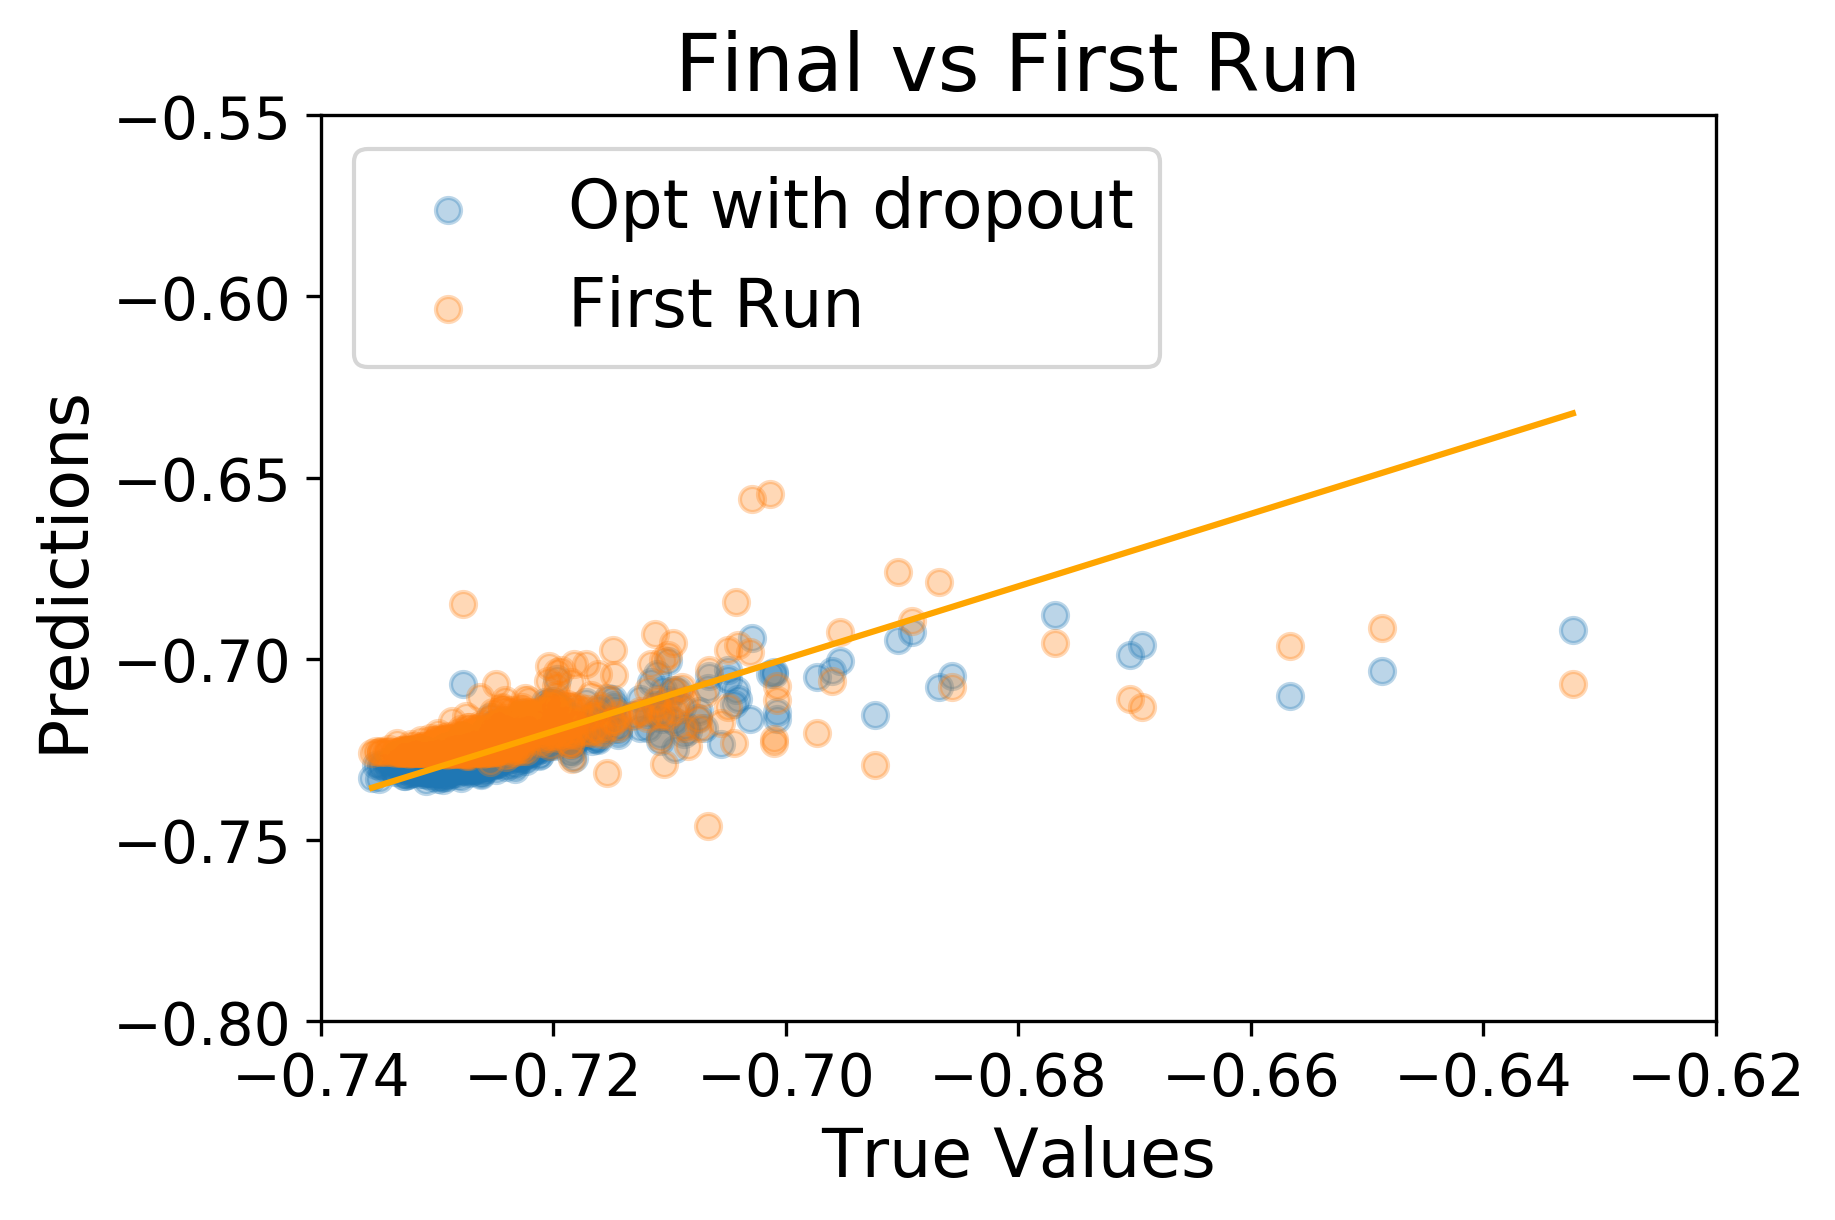

In [236]:
a = 0.3
#plt.scatter(test_labels, first_run, label = 'First Run', alpha = a)
plt.scatter(test_labels, drop.predict(test_features_norm), label = 'Opt with dropout', alpha = a)
plt.scatter(test_labels, first_run, label = 'First Run', alpha = a)
plt.xlabel('True Values')
plt.ylabel('Predictions')
x = np.linspace(min(test_labels),max(test_labels))
plt.plot(x,x,c='orange')
plt.legend(loc='upper left')
plt.ylim([-.8,-.55])
plt.xlim([-.74,-.62])

plt.title('Final vs First Run');

plt.savefig('Final.png')

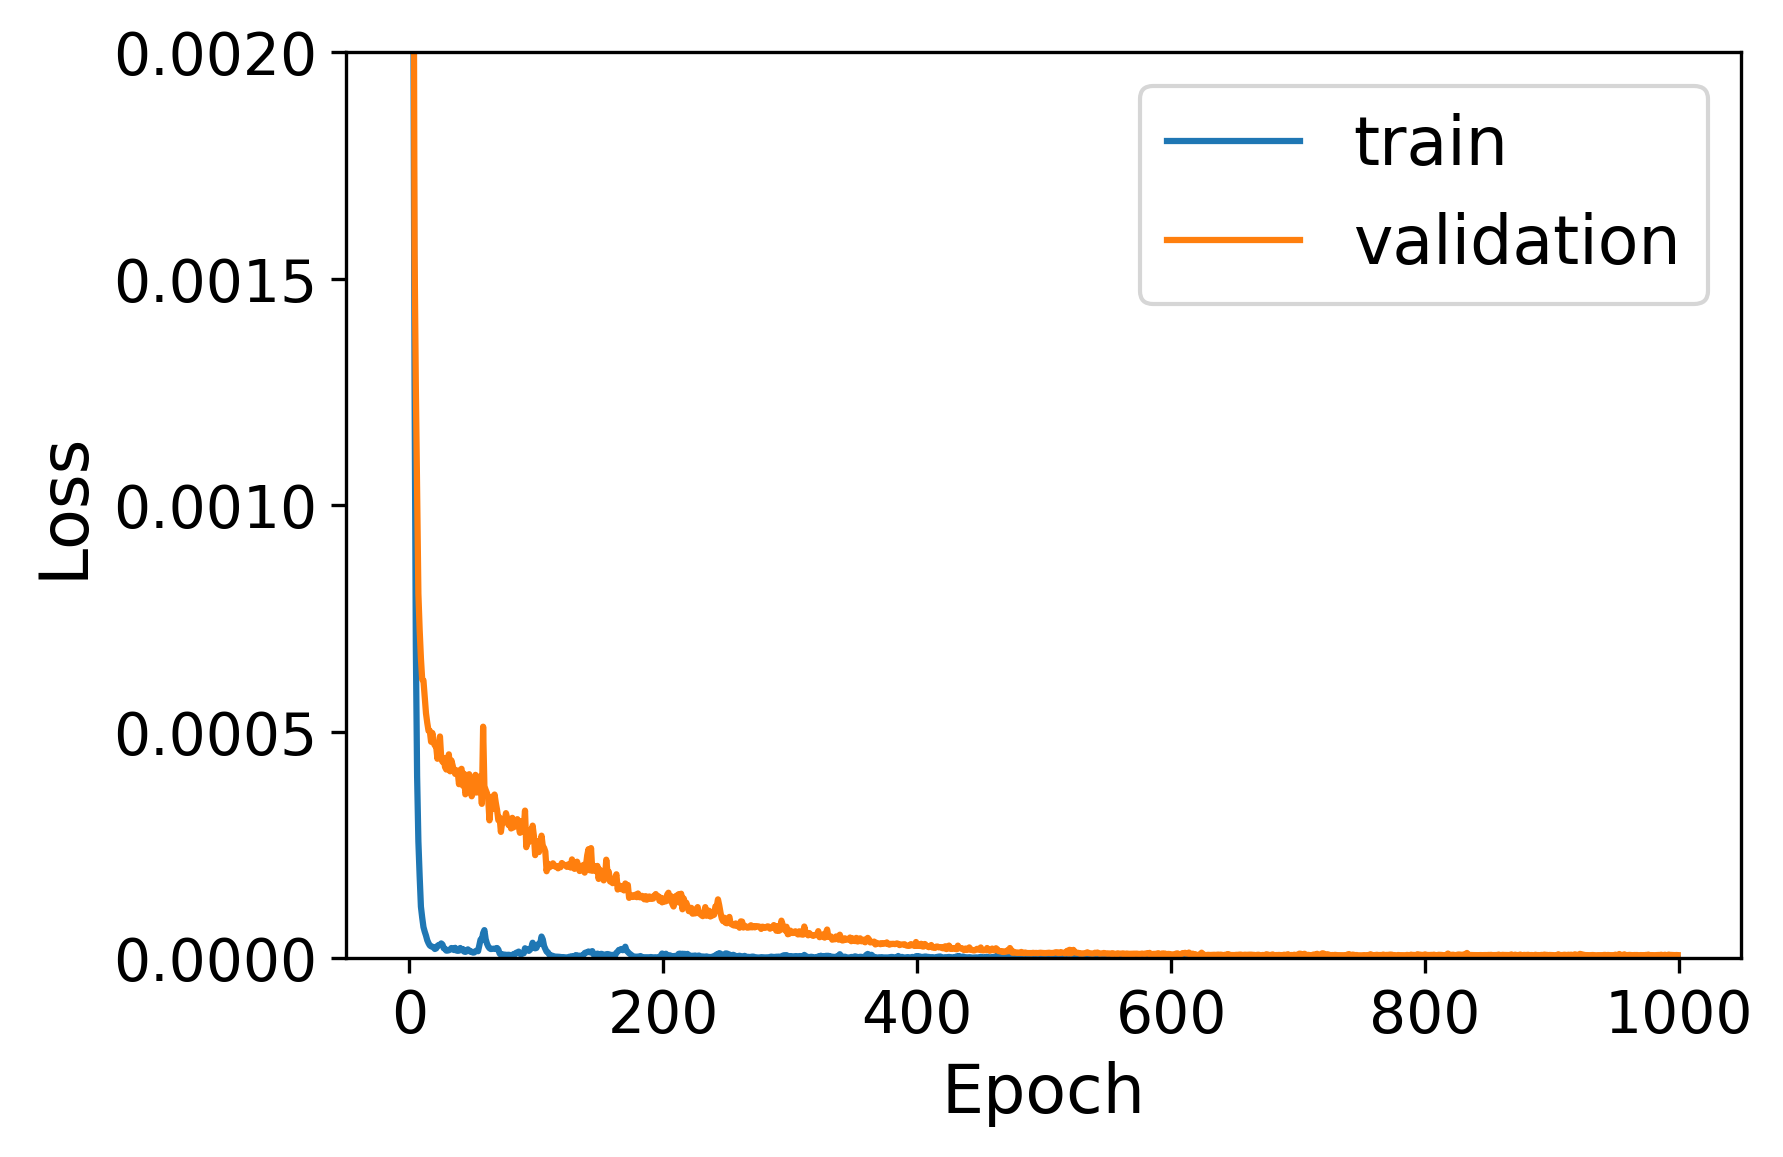

In [212]:
plot_loss(NN_drop)
plt.ylim([0,.002]);

In [219]:
evaluations_huber['Optimized_drop'] = drop.evaluate(test_features_norm, test_labels)
evaluations_huber

34/34 [==============================] - 0s 2ms/step - loss: 1.0893e-05


{'Huber': 2.169277831853833e-05,
 'Huber_Optimized': 1.1568845366127789e-05,
 'Optimized_drop': 1.0893076250795275e-05}

In [214]:
drop.save('opt_drop')

INFO:tensorflow:Assets written to: opt_drop/assets


In [237]:
start = time.time()
NN_drop = drop.fit(train_features_norm, train_labels, validation_split=0.2, epochs = 10000,  batch_size=213)
str(datetime.timedelta(seconds=time.time()-start))

Epoch 1/10000
16/16 [==============================] - 0s 13ms/step - loss: 4.0535e-07 - val_loss: 6.7734e-06
Epoch 2/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.1326e-07 - val_loss: 6.9670e-06
Epoch 3/10000
16/16 [==============================] - 0s 12ms/step - loss: 5.7820e-07 - val_loss: 6.5737e-06
Epoch 4/10000
16/16 [==============================] - 0s 11ms/step - loss: 4.7656e-07 - val_loss: 7.7339e-06
Epoch 5/10000
16/16 [==============================] - 0s 10ms/step - loss: 7.5134e-07 - val_loss: 6.9487e-06
Epoch 6/10000
16/16 [==============================] - 0s 12ms/step - loss: 5.4339e-07 - val_loss: 7.0454e-06
Epoch 7/10000
16/16 [==============================] - 0s 11ms/step - loss: 7.2847e-07 - val_loss: 7.0703e-06
Epoch 8/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.7527e-07 - val_loss: 9.1245e-06
Epoch 9/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.1047e-06 - val_loss: 6.8119e-06
Epoch 10/1

Epoch 75/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.3759e-07 - val_loss: 7.0519e-06
Epoch 76/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.8938e-07 - val_loss: 7.1213e-06
Epoch 77/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.2104e-07 - val_loss: 7.8194e-06
Epoch 78/10000
16/16 [==============================] - 0s 10ms/step - loss: 7.3756e-07 - val_loss: 7.4484e-06
Epoch 79/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.9266e-07 - val_loss: 6.7949e-06
Epoch 80/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.4003e-07 - val_loss: 6.7878e-06
Epoch 81/10000
16/16 [==============================] - 0s 12ms/step - loss: 8.3369e-07 - val_loss: 6.8357e-06
Epoch 82/10000
16/16 [==============================] - 0s 13ms/step - loss: 9.3191e-07 - val_loss: 7.0862e-06
Epoch 83/10000
16/16 [==============================] - 0s 13ms/step - loss: 5.4480e-07 - val_loss: 6.6118e-06
Epoch

Epoch 222/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.7117e-06 - val_loss: 7.6810e-06
Epoch 223/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2252e-06 - val_loss: 6.2924e-06
Epoch 224/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.8843e-07 - val_loss: 6.2971e-06
Epoch 225/10000
16/16 [==============================] - 0s 12ms/step - loss: 6.2377e-07 - val_loss: 6.2227e-06
Epoch 226/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.2147e-07 - val_loss: 6.3373e-06
Epoch 227/10000
16/16 [==============================] - 0s 12ms/step - loss: 2.1197e-07 - val_loss: 6.4181e-06
Epoch 228/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.4319e-07 - val_loss: 6.4540e-06
Epoch 229/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0737e-07 - val_loss: 6.2985e-06
Epoch 230/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.2948e-08 - val_loss: 6.3481e

Epoch 369/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.7211e-07 - val_loss: 6.1025e-06
Epoch 370/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.6271e-07 - val_loss: 6.4292e-06
Epoch 371/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.7627e-07 - val_loss: 6.4871e-06
Epoch 372/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.2240e-07 - val_loss: 6.6904e-06
Epoch 373/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.6637e-07 - val_loss: 6.6047e-06
Epoch 374/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.7961e-07 - val_loss: 6.6426e-06
Epoch 375/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.9721e-07 - val_loss: 6.2073e-06
Epoch 376/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.2567e-07 - val_loss: 6.4957e-06
Epoch 377/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2339e-07 - val_loss: 6.3351e-06
E

16/16 [==============================] - 0s 9ms/step - loss: 2.1233e-07 - val_loss: 6.9090e-06
Epoch 516/10000
16/16 [==============================] - 0s 12ms/step - loss: 4.6075e-07 - val_loss: 7.3125e-06
Epoch 517/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.8670e-07 - val_loss: 6.1156e-06
Epoch 518/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.0685e-07 - val_loss: 6.4416e-06
Epoch 519/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.6839e-07 - val_loss: 6.1363e-06
Epoch 520/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.7866e-07 - val_loss: 6.3816e-06
Epoch 521/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.8111e-07 - val_loss: 6.3518e-06
Epoch 522/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.1333e-07 - val_loss: 6.0236e-06
Epoch 523/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.7308e-07 - val_loss: 6.3851e-06
Epoch 524/1000

Epoch 662/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.8738e-08 - val_loss: 6.3166e-06
Epoch 663/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.7644e-08 - val_loss: 6.2492e-06
Epoch 664/10000
16/16 [==============================] - 0s 13ms/step - loss: 2.9112e-08 - val_loss: 6.2837e-06
Epoch 665/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.6345e-08 - val_loss: 6.3041e-06
Epoch 666/10000
16/16 [==============================] - 0s 13ms/step - loss: 2.9302e-08 - val_loss: 6.2416e-06
Epoch 667/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.3073e-08 - val_loss: 6.1708e-06
Epoch 668/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0014e-07 - val_loss: 6.2972e-06
Epoch 669/10000
16/16 [==============================] - 0s 12ms/step - loss: 6.4952e-08 - val_loss: 6.1441e-06
Epoch 670/10000
16/16 [==============================] - 0s 13ms/step - loss: 1.6835e-07 - val_loss: 6.237

Epoch 809/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.7929e-07 - val_loss: 6.8309e-06
Epoch 810/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.7500e-07 - val_loss: 6.0061e-06
Epoch 811/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.8009e-07 - val_loss: 6.6152e-06
Epoch 812/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.6825e-07 - val_loss: 6.2445e-06
Epoch 813/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.4100e-07 - val_loss: 6.2362e-06
Epoch 814/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.8689e-07 - val_loss: 6.0368e-06
Epoch 815/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.4288e-07 - val_loss: 6.1598e-06
Epoch 816/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.6708e-07 - val_loss: 6.1088e-06
Epoch 817/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.5022e-08 - val_loss: 6.0825e-06
E

16/16 [==============================] - 0s 10ms/step - loss: 2.7144e-08 - val_loss: 6.1541e-06
Epoch 956/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.5895e-08 - val_loss: 6.5784e-06
Epoch 957/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.5923e-07 - val_loss: 6.4479e-06
Epoch 958/10000
16/16 [==============================] - 0s 12ms/step - loss: 8.3129e-07 - val_loss: 6.3361e-06
Epoch 959/10000
16/16 [==============================] - 0s 11ms/step - loss: 7.6507e-07 - val_loss: 6.3021e-06
Epoch 960/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.5258e-07 - val_loss: 5.9726e-06
Epoch 961/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4889e-07 - val_loss: 6.2896e-06
Epoch 962/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.9572e-08 - val_loss: 6.2735e-06
Epoch 963/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.1361e-07 - val_loss: 6.1977e-06
Epoch 964/10

Epoch 1101/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.8037e-08 - val_loss: 6.0456e-06
Epoch 1102/10000
16/16 [==============================] - 0s 10ms/step - loss: 6.2582e-08 - val_loss: 6.1085e-06
Epoch 1103/10000
16/16 [==============================] - 0s 10ms/step - loss: 7.6007e-08 - val_loss: 6.1134e-06
Epoch 1104/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.7603e-08 - val_loss: 6.0997e-06
Epoch 1105/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.2545e-08 - val_loss: 6.4872e-06
Epoch 1106/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4273e-07 - val_loss: 6.1675e-06
Epoch 1107/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2989e-07 - val_loss: 6.2447e-06
Epoch 1108/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.5545e-07 - val_loss: 6.7670e-06
Epoch 1109/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.1930e-07 - val_loss:

Epoch 1174/10000
16/16 [==============================] - 0s 20ms/step - loss: 4.1512e-07 - val_loss: 6.8857e-06
Epoch 1175/10000
16/16 [==============================] - 0s 11ms/step - loss: 5.5568e-07 - val_loss: 6.0571e-06
Epoch 1176/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.0951e-07 - val_loss: 6.4550e-06
Epoch 1177/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.3986e-07 - val_loss: 6.0173e-06
Epoch 1178/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.3073e-07 - val_loss: 6.3174e-06
Epoch 1179/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.6677e-07 - val_loss: 6.6028e-06
Epoch 1180/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.9341e-07 - val_loss: 6.1025e-06
Epoch 1181/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.4163e-07 - val_loss: 6.1799e-06
Epoch 1182/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.5388e-07 - val_loss: 

Epoch 1247/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.5693e-07 - val_loss: 5.9601e-06
Epoch 1248/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.7688e-07 - val_loss: 6.2342e-06
Epoch 1249/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2371e-07 - val_loss: 5.9287e-06
Epoch 1250/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.4838e-07 - val_loss: 6.2003e-06
Epoch 1251/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4068e-07 - val_loss: 5.9711e-06
Epoch 1252/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2267e-07 - val_loss: 6.2021e-06
Epoch 1253/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.6392e-07 - val_loss: 5.9907e-06
Epoch 1254/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.6822e-07 - val_loss: 5.8218e-06
Epoch 1255/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1267e-07 - val_loss: 

Epoch 1320/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.7413e-07 - val_loss: 6.1229e-06
Epoch 1321/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.1402e-07 - val_loss: 6.1245e-06
Epoch 1322/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.5960e-08 - val_loss: 6.3389e-06
Epoch 1323/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.0727e-07 - val_loss: 6.6010e-06
Epoch 1324/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.0916e-07 - val_loss: 6.0709e-06
Epoch 1325/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.1267e-07 - val_loss: 6.5678e-06
Epoch 1326/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.8009e-07 - val_loss: 6.2592e-06
Epoch 1327/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.9929e-07 - val_loss: 5.7239e-06
Epoch 1328/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.0466e-07 - val_loss: 

16/16 [==============================] - 0s 8ms/step - loss: 2.0026e-07 - val_loss: 6.1008e-06
Epoch 1394/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1140e-07 - val_loss: 5.8705e-06
Epoch 1395/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.9802e-08 - val_loss: 6.0204e-06
Epoch 1396/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.1820e-08 - val_loss: 5.9556e-06
Epoch 1397/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.2840e-08 - val_loss: 6.0643e-06
Epoch 1398/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.5163e-08 - val_loss: 6.0110e-06
Epoch 1399/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.5151e-08 - val_loss: 6.0165e-06
Epoch 1400/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.1448e-08 - val_loss: 5.9601e-06
Epoch 1401/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9332e-08 - val_loss: 6.0301e-06
Epoch 140

16/16 [==============================] - 0s 10ms/step - loss: 1.5319e-08 - val_loss: 5.9121e-06
Epoch 1540/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.4955e-08 - val_loss: 5.9398e-06
Epoch 1541/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.4164e-08 - val_loss: 5.9949e-06
Epoch 1542/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.0414e-08 - val_loss: 6.0337e-06
Epoch 1543/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.0263e-08 - val_loss: 5.9072e-06
Epoch 1544/10000
16/16 [==============================] - 0s 15ms/step - loss: 4.0659e-08 - val_loss: 5.9777e-06
Epoch 1545/10000
16/16 [==============================] - 0s 12ms/step - loss: 1.9035e-07 - val_loss: 6.3534e-06
Epoch 1546/10000
16/16 [==============================] - 0s 20ms/step - loss: 3.3793e-07 - val_loss: 6.5199e-06
Epoch 1547/10000
16/16 [==============================] - 0s 12ms/step - loss: 7.4703e-07 - val_loss: 6.2682e-06
E

Epoch 1684/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0683e-07 - val_loss: 6.1549e-06
Epoch 1685/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.9812e-07 - val_loss: 6.1102e-06
Epoch 1686/10000
16/16 [==============================] - 0s 8ms/step - loss: 9.1733e-08 - val_loss: 6.1122e-06
Epoch 1687/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.5587e-07 - val_loss: 6.1290e-06
Epoch 1688/10000
16/16 [==============================] - 0s 12ms/step - loss: 9.5609e-08 - val_loss: 6.2344e-06
Epoch 1689/10000
16/16 [==============================] - 0s 12ms/step - loss: 2.7134e-07 - val_loss: 6.0360e-06
Epoch 1690/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4219e-07 - val_loss: 6.1201e-06
Epoch 1691/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.1715e-07 - val_loss: 6.1606e-06
Epoch 1692/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.6432e-08 - val_loss: 

Epoch 1757/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.0166e-07 - val_loss: 6.2094e-06
Epoch 1758/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.6295e-07 - val_loss: 7.0262e-06
Epoch 1759/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.3783e-07 - val_loss: 5.9194e-06
Epoch 1760/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.6531e-07 - val_loss: 5.9969e-06
Epoch 1761/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.9289e-07 - val_loss: 6.0782e-06
Epoch 1762/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.6710e-07 - val_loss: 6.0377e-06
Epoch 1763/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.0852e-07 - val_loss: 5.9935e-06
Epoch 1764/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.4568e-08 - val_loss: 6.0727e-06
Epoch 1765/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.9732e-08 - val_loss:

Epoch 1830/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.5120e-08 - val_loss: 6.1840e-06
Epoch 1831/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.1910e-08 - val_loss: 6.0422e-06
Epoch 1832/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.6124e-08 - val_loss: 6.0605e-06
Epoch 1833/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.4710e-08 - val_loss: 6.0739e-06
Epoch 1834/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.3257e-08 - val_loss: 6.1595e-06
Epoch 1835/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1039e-07 - val_loss: 6.0784e-06
Epoch 1836/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1580e-07 - val_loss: 6.3719e-06
Epoch 1837/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.1643e-08 - val_loss: 6.1507e-06
Epoch 1838/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.2303e-08 - val_loss: 6

Epoch 1903/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.0231e-07 - val_loss: 6.0630e-06
Epoch 1904/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.0215e-07 - val_loss: 6.1568e-06
Epoch 1905/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.4778e-07 - val_loss: 6.4326e-06
Epoch 1906/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2337e-07 - val_loss: 5.9560e-06
Epoch 1907/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0546e-07 - val_loss: 6.1100e-06
Epoch 1908/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.9471e-08 - val_loss: 6.0246e-06
Epoch 1909/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.3567e-07 - val_loss: 6.0218e-06
Epoch 1910/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.1912e-08 - val_loss: 6.1058e-06
Epoch 1911/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.7717e-08 - val_loss: 6.0

16/16 [==============================] - 0s 8ms/step - loss: 2.9792e-08 - val_loss: 5.9577e-06
Epoch 1977/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.7547e-08 - val_loss: 5.9781e-06
Epoch 1978/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.7243e-08 - val_loss: 6.1390e-06
Epoch 1979/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.8770e-08 - val_loss: 6.1463e-06
Epoch 1980/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9614e-08 - val_loss: 5.9010e-06
Epoch 1981/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.3994e-08 - val_loss: 6.1179e-06
Epoch 1982/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.1498e-08 - val_loss: 6.2847e-06
Epoch 1983/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.8475e-07 - val_loss: 6.4086e-06
Epoch 1984/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.8250e-07 - val_loss: 6.6835e-06
Epoch 198

16/16 [==============================] - 0s 9ms/step - loss: 2.9069e-07 - val_loss: 6.4969e-06
Epoch 2123/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.4730e-07 - val_loss: 6.1657e-06
Epoch 2124/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.1393e-07 - val_loss: 5.9166e-06
Epoch 2125/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.8972e-07 - val_loss: 6.0201e-06
Epoch 2126/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.8072e-08 - val_loss: 5.8962e-06
Epoch 2127/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.4533e-08 - val_loss: 6.2127e-06
Epoch 2128/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.5651e-08 - val_loss: 5.9436e-06
Epoch 2129/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.2663e-08 - val_loss: 6.1112e-06
Epoch 2130/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.9997e-08 - val_loss: 6.0417e-06
Epoch 213

16/16 [==============================] - 0s 8ms/step - loss: 8.6396e-08 - val_loss: 6.4612e-06
Epoch 2269/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.7746e-07 - val_loss: 6.7274e-06
Epoch 2270/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.8755e-07 - val_loss: 6.3353e-06
Epoch 2271/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.5082e-07 - val_loss: 6.0403e-06
Epoch 2272/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2128e-07 - val_loss: 5.9998e-06
Epoch 2273/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.1396e-08 - val_loss: 6.1329e-06
Epoch 2274/10000
16/16 [==============================] - 0s 11ms/step - loss: 4.1127e-08 - val_loss: 6.0913e-06
Epoch 2275/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.2651e-08 - val_loss: 5.9626e-06
Epoch 2276/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.7074e-08 - val_loss: 6.1413e-06
Epoch

16/16 [==============================] - 0s 10ms/step - loss: 1.3318e-07 - val_loss: 6.1790e-06
Epoch 2342/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.1495e-07 - val_loss: 6.0810e-06
Epoch 2343/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.4705e-07 - val_loss: 6.3066e-06
Epoch 2344/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.0368e-07 - val_loss: 6.6435e-06
Epoch 2345/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.9861e-07 - val_loss: 6.9181e-06
Epoch 2346/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.1675e-07 - val_loss: 6.6338e-06
Epoch 2347/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.1762e-07 - val_loss: 6.5059e-06
Epoch 2348/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.7316e-07 - val_loss: 6.2011e-06
Epoch 2349/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0975e-07 - val_loss: 6.1358e-06
Epoch

Epoch 2487/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4711e-07 - val_loss: 6.8018e-06
Epoch 2488/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.7110e-07 - val_loss: 6.2375e-06
Epoch 2489/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.6348e-07 - val_loss: 6.3217e-06
Epoch 2490/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.7827e-07 - val_loss: 6.4864e-06
Epoch 2491/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.2589e-07 - val_loss: 6.2222e-06
Epoch 2492/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.3633e-07 - val_loss: 6.5326e-06
Epoch 2493/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.0976e-07 - val_loss: 6.0520e-06
Epoch 2494/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.1468e-07 - val_loss: 6.2346e-06
Epoch 2495/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.0800e-07 - val_loss

Epoch 2560/10000
16/16 [==============================] - 0s 10ms/step - loss: 9.5783e-09 - val_loss: 6.0806e-06
Epoch 2561/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.4129e-09 - val_loss: 6.1266e-06
Epoch 2562/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.2694e-09 - val_loss: 6.0891e-06
Epoch 2563/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.4334e-09 - val_loss: 6.0620e-06
Epoch 2564/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.5881e-08 - val_loss: 6.3619e-06
Epoch 2565/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.5777e-07 - val_loss: 6.3919e-06
Epoch 2566/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.2319e-07 - val_loss: 6.0714e-06
Epoch 2567/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.1459e-08 - val_loss: 6.1169e-06
Epoch 2568/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.4479e-07 - val_loss: 

Epoch 2633/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.3235e-08 - val_loss: 6.0178e-06
Epoch 2634/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2641e-08 - val_loss: 6.0943e-06
Epoch 2635/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.3496e-08 - val_loss: 6.0843e-06
Epoch 2636/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.9997e-08 - val_loss: 6.0967e-06
Epoch 2637/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.9413e-08 - val_loss: 6.0634e-06
Epoch 2638/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.4101e-08 - val_loss: 6.1000e-06
Epoch 2639/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.0370e-08 - val_loss: 6.0207e-06
Epoch 2640/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.4836e-07 - val_loss: 6.3550e-06
Epoch 2641/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.3436e-07 - val_loss: 6

16/16 [==============================] - 0s 10ms/step - loss: 6.5426e-08 - val_loss: 6.1425e-06
Epoch 2707/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.1049e-07 - val_loss: 6.5983e-06
Epoch 2708/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.9095e-07 - val_loss: 6.1977e-06
Epoch 2709/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0792e-06 - val_loss: 6.3599e-06
Epoch 2710/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.0313e-06 - val_loss: 6.1938e-06
Epoch 2711/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.0678e-07 - val_loss: 5.8461e-06
Epoch 2712/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.3524e-07 - val_loss: 6.3532e-06
Epoch 2713/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.0954e-07 - val_loss: 6.3817e-06
Epoch 2714/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0276e-07 - val_loss: 5.9725e-06
Epoch

Epoch 2779/10000
16/16 [==============================] - 0s 13ms/step - loss: 1.7180e-07 - val_loss: 6.0250e-06
Epoch 2780/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.7847e-07 - val_loss: 6.0207e-06
Epoch 2781/10000
16/16 [==============================] - 0s 13ms/step - loss: 3.8786e-07 - val_loss: 6.8221e-06
Epoch 2782/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.0697e-07 - val_loss: 6.2893e-06
Epoch 2783/10000
16/16 [==============================] - 0s 16ms/step - loss: 1.5826e-07 - val_loss: 6.4915e-06
Epoch 2784/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.8971e-07 - val_loss: 6.3034e-06
Epoch 2785/10000
16/16 [==============================] - 0s 13ms/step - loss: 1.7559e-07 - val_loss: 6.5567e-06
Epoch 2786/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.0463e-07 - val_loss: 6.2544e-06
Epoch 2787/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.0097e-07 - val_l

Epoch 2852/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.0315e-07 - val_loss: 6.4223e-06
Epoch 2853/10000
16/16 [==============================] - 0s 11ms/step - loss: 7.7589e-07 - val_loss: 6.5222e-06
Epoch 2854/10000
16/16 [==============================] - 0s 12ms/step - loss: 8.5868e-07 - val_loss: 6.2930e-06
Epoch 2855/10000
16/16 [==============================] - 0s 11ms/step - loss: 5.3214e-07 - val_loss: 6.2875e-06
Epoch 2856/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.1721e-07 - val_loss: 6.1846e-06
Epoch 2857/10000
16/16 [==============================] - 0s 11ms/step - loss: 8.3602e-08 - val_loss: 6.0705e-06
Epoch 2858/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.8925e-08 - val_loss: 6.1018e-06
Epoch 2859/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.3139e-08 - val_loss: 6.0821e-06
Epoch 2860/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.5708e-08 - val_loss

16/16 [==============================] - 0s 11ms/step - loss: 7.5253e-07 - val_loss: 7.5775e-06
Epoch 2926/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.9533e-07 - val_loss: 6.0252e-06
Epoch 2927/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.1222e-07 - val_loss: 6.1925e-06
Epoch 2928/10000
16/16 [==============================] - 0s 13ms/step - loss: 1.9216e-07 - val_loss: 6.2068e-06
Epoch 2929/10000
16/16 [==============================] - 0s 11ms/step - loss: 9.9460e-08 - val_loss: 6.2891e-06
Epoch 2930/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.3199e-07 - val_loss: 6.1206e-06
Epoch 2931/10000
16/16 [==============================] - 0s 15ms/step - loss: 3.0606e-07 - val_loss: 6.0802e-06
Epoch 2932/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.8895e-07 - val_loss: 6.0287e-06
Epoch 2933/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.8356e-08 - val_loss: 6.1501e-06
Ep

16/16 [==============================] - 0s 8ms/step - loss: 1.8602e-07 - val_loss: 6.0838e-06
Epoch 2999/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.0495e-07 - val_loss: 6.1308e-06
Epoch 3000/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.6564e-08 - val_loss: 6.0015e-06
Epoch 3001/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.7482e-08 - val_loss: 6.0604e-06
Epoch 3002/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.0884e-08 - val_loss: 6.0769e-06
Epoch 3003/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.4212e-08 - val_loss: 6.1592e-06
Epoch 3004/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1409e-07 - val_loss: 6.0891e-06
Epoch 3005/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1779e-07 - val_loss: 6.1852e-06
Epoch 3006/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.7483e-08 - val_loss: 6.0942e-06
Epoch 300

16/16 [==============================] - 0s 8ms/step - loss: 4.6027e-07 - val_loss: 6.8219e-06
Epoch 3072/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.0911e-07 - val_loss: 7.1278e-06
Epoch 3073/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.8194e-07 - val_loss: 6.7350e-06
Epoch 3074/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.7067e-07 - val_loss: 5.9683e-06
Epoch 3075/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1240e-07 - val_loss: 6.1215e-06
Epoch 3076/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.1829e-08 - val_loss: 6.1679e-06
Epoch 3077/10000
16/16 [==============================] - 0s 11ms/step - loss: 6.2904e-08 - val_loss: 6.0386e-06
Epoch 3078/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.9330e-08 - val_loss: 6.2486e-06
Epoch 3079/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.8513e-08 - val_loss: 6.0020e-06
Epoch 3

16/16 [==============================] - 0s 8ms/step - loss: 1.7674e-08 - val_loss: 6.0797e-06
Epoch 3218/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.3723e-08 - val_loss: 6.0756e-06
Epoch 3219/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.2021e-08 - val_loss: 6.0971e-06
Epoch 3220/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.4770e-08 - val_loss: 6.0508e-06
Epoch 3221/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.1250e-08 - val_loss: 6.1842e-06
Epoch 3222/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.0807e-08 - val_loss: 6.0362e-06
Epoch 3223/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.4073e-07 - val_loss: 6.3356e-06
Epoch 3224/10000
16/16 [==============================] - 0s 8ms/step - loss: 9.9868e-07 - val_loss: 7.5194e-06
Epoch 3225/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.4099e-07 - val_loss: 7.8167e-06
Epoch 322

16/16 [==============================] - 0s 8ms/step - loss: 2.7318e-07 - val_loss: 6.6359e-06
Epoch 3364/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.9277e-07 - val_loss: 6.1470e-06
Epoch 3365/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.8364e-07 - val_loss: 6.4333e-06
Epoch 3366/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.4071e-07 - val_loss: 6.2367e-06
Epoch 3367/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.0917e-07 - val_loss: 6.4300e-06
Epoch 3368/10000
16/16 [==============================] - 0s 11ms/step - loss: 5.0379e-07 - val_loss: 6.3638e-06
Epoch 3369/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.7399e-07 - val_loss: 6.0916e-06
Epoch 3370/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.4737e-07 - val_loss: 6.7673e-06
Epoch 3371/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.8078e-07 - val_loss: 7.0476e-06
Epoch 3

16/16 [==============================] - 0s 9ms/step - loss: 2.6206e-08 - val_loss: 6.0239e-06
Epoch 3437/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.8168e-08 - val_loss: 6.1345e-06
Epoch 3438/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.3566e-08 - val_loss: 6.1204e-06
Epoch 3439/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.2245e-08 - val_loss: 6.1398e-06
Epoch 3440/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.4779e-08 - val_loss: 6.1320e-06
Epoch 3441/10000
16/16 [==============================] - 0s 10ms/step - loss: 9.5406e-08 - val_loss: 6.1485e-06
Epoch 3442/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.6700e-07 - val_loss: 6.3040e-06
Epoch 3443/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.4794e-07 - val_loss: 6.2336e-06
Epoch 3444/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.6935e-07 - val_loss: 6.2121e-06
Epoch 

Epoch 3509/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.5970e-08 - val_loss: 6.2322e-06
Epoch 3510/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.5847e-07 - val_loss: 6.8918e-06
Epoch 3511/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.8158e-07 - val_loss: 6.2715e-06
Epoch 3512/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.9784e-07 - val_loss: 6.1354e-06
Epoch 3513/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9798e-07 - val_loss: 6.3234e-06
Epoch 3514/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.9055e-08 - val_loss: 6.0159e-06
Epoch 3515/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.9248e-08 - val_loss: 6.2385e-06
Epoch 3516/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.7400e-07 - val_loss: 6.0264e-06
Epoch 3517/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0761e-07 - val_loss: 

Epoch 3582/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.5799e-08 - val_loss: 6.3582e-06
Epoch 3583/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.1811e-09 - val_loss: 6.3465e-06
Epoch 3584/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.8981e-08 - val_loss: 6.5687e-06
Epoch 3585/10000
16/16 [==============================] - 0s 12ms/step - loss: 2.6494e-07 - val_loss: 6.4619e-06
Epoch 3586/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.3601e-07 - val_loss: 6.9326e-06
Epoch 3587/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.8067e-07 - val_loss: 6.7692e-06
Epoch 3588/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2839e-07 - val_loss: 6.6529e-06
Epoch 3589/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1046e-07 - val_loss: 6.3001e-06
Epoch 3590/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.7596e-08 - val_loss:

Epoch 3655/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.5089e-07 - val_loss: 6.2098e-06
Epoch 3656/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.4556e-07 - val_loss: 6.1752e-06
Epoch 3657/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.3646e-07 - val_loss: 6.7026e-06
Epoch 3658/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.4662e-07 - val_loss: 6.3689e-06
Epoch 3659/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.7499e-07 - val_loss: 6.4329e-06
Epoch 3660/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.1538e-07 - val_loss: 6.1212e-06
Epoch 3661/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0556e-07 - val_loss: 6.1107e-06
Epoch 3662/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.7967e-08 - val_loss: 6.2352e-06
Epoch 3663/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.3429e-08 - val_loss: 6.1

Epoch 3728/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.0428e-07 - val_loss: 7.0555e-06
Epoch 3729/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.6729e-07 - val_loss: 6.2240e-06
Epoch 3730/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.9442e-07 - val_loss: 6.3373e-06
Epoch 3731/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4735e-07 - val_loss: 6.3052e-06
Epoch 3732/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.8174e-08 - val_loss: 6.2449e-06
Epoch 3733/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.4837e-08 - val_loss: 6.4298e-06
Epoch 3734/10000
16/16 [==============================] - 0s 11ms/step - loss: 7.1839e-08 - val_loss: 6.1840e-06
Epoch 3735/10000
16/16 [==============================] - 0s 12ms/step - loss: 2.4244e-08 - val_loss: 6.2651e-06
Epoch 3736/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.3940e-08 - val_los

Epoch 3801/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.0726e-07 - val_loss: 6.2837e-06
Epoch 3802/10000
16/16 [==============================] - 0s 12ms/step - loss: 4.2382e-07 - val_loss: 6.5697e-06
Epoch 3803/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.3189e-07 - val_loss: 6.4471e-06
Epoch 3804/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2640e-07 - val_loss: 6.6000e-06
Epoch 3805/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.0070e-07 - val_loss: 6.5557e-06
Epoch 3806/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.0823e-08 - val_loss: 6.2235e-06
Epoch 3807/10000
16/16 [==============================] - 0s 10ms/step - loss: 6.4445e-08 - val_loss: 6.5029e-06
Epoch 3808/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.7729e-08 - val_loss: 6.2280e-06
Epoch 3809/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.0047e-08 - val_loss: 

Epoch 3874/10000
16/16 [==============================] - 0s 8ms/step - loss: 9.2665e-08 - val_loss: 6.3640e-06
Epoch 3875/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.3799e-08 - val_loss: 6.1797e-06
Epoch 3876/10000
16/16 [==============================] - 0s 11ms/step - loss: 4.1762e-08 - val_loss: 6.2199e-06
Epoch 3877/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.3822e-08 - val_loss: 6.3104e-06
Epoch 3878/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.9416e-08 - val_loss: 6.2735e-06
Epoch 3879/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.8372e-08 - val_loss: 6.2904e-06
Epoch 3880/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.4736e-08 - val_loss: 6.2197e-06
Epoch 3881/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.0039e-07 - val_loss: 7.3424e-06
Epoch 3882/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.1063e-07 - val_loss:

Epoch 3947/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.1872e-07 - val_loss: 6.7611e-06
Epoch 3948/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.4349e-07 - val_loss: 6.9887e-06
Epoch 3949/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.1392e-07 - val_loss: 6.5289e-06
Epoch 3950/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.6810e-07 - val_loss: 6.3773e-06
Epoch 3951/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.3068e-07 - val_loss: 6.4690e-06
Epoch 3952/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.0314e-07 - val_loss: 6.3643e-06
Epoch 3953/10000
16/16 [==============================] - 0s 11ms/step - loss: 8.6177e-08 - val_loss: 6.3457e-06
Epoch 3954/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.3436e-08 - val_loss: 6.3781e-06
Epoch 3955/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.6926e-08 - val_loss:

Epoch 4020/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.6335e-08 - val_loss: 6.5972e-06
Epoch 4021/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.1910e-08 - val_loss: 6.2649e-06
Epoch 4022/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.2497e-08 - val_loss: 6.3225e-06
Epoch 4023/10000
16/16 [==============================] - 0s 11ms/step - loss: 7.0827e-08 - val_loss: 6.2719e-06
Epoch 4024/10000
16/16 [==============================] - 0s 11ms/step - loss: 4.8304e-08 - val_loss: 6.5898e-06
Epoch 4025/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.7383e-08 - val_loss: 6.3261e-06
Epoch 4026/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.0139e-07 - val_loss: 6.3711e-06
Epoch 4027/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.4102e-07 - val_loss: 7.0100e-06
Epoch 4028/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.2537e-07 - val_loss: 

16/16 [==============================] - 0s 9ms/step - loss: 4.7913e-08 - val_loss: 6.4854e-06
Epoch 4094/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.0785e-07 - val_loss: 7.4962e-06
Epoch 4095/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.6958e-07 - val_loss: 6.5042e-06
Epoch 4096/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.1103e-07 - val_loss: 6.0209e-06
Epoch 4097/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.6917e-07 - val_loss: 7.2107e-06
Epoch 4098/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.8875e-07 - val_loss: 6.4540e-06
Epoch 4099/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.5418e-07 - val_loss: 6.1956e-06
Epoch 4100/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2104e-07 - val_loss: 6.3745e-06
Epoch 4101/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2775e-07 - val_loss: 6.6624e-06
Epoch 4

16/16 [==============================] - 0s 15ms/step - loss: 1.0990e-07 - val_loss: 6.3352e-06
Epoch 4240/10000
16/16 [==============================] - 0s 11ms/step - loss: 6.0252e-08 - val_loss: 6.1329e-06
Epoch 4241/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1679e-07 - val_loss: 6.2375e-06
Epoch 4242/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.0961e-08 - val_loss: 6.3348e-06
Epoch 4243/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.8933e-08 - val_loss: 6.4345e-06
Epoch 4244/10000
16/16 [==============================] - 0s 12ms/step - loss: 3.6860e-08 - val_loss: 6.2767e-06
Epoch 4245/10000
16/16 [==============================] - 0s 11ms/step - loss: 4.1343e-08 - val_loss: 6.3296e-06
Epoch 4246/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.0787e-08 - val_loss: 6.2795e-06
Epoch 4247/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.1250e-08 - val_loss: 6.4151e-06
Epo

Epoch 4312/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.1041e-07 - val_loss: 6.4697e-06
Epoch 4313/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.9020e-08 - val_loss: 6.3940e-06
Epoch 4314/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.2421e-08 - val_loss: 6.1467e-06
Epoch 4315/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.5363e-07 - val_loss: 6.9486e-06
Epoch 4316/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.4319e-07 - val_loss: 6.9221e-06
Epoch 4317/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.7100e-07 - val_loss: 6.3044e-06
Epoch 4318/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.8911e-08 - val_loss: 6.1846e-06
Epoch 4319/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.8160e-08 - val_loss: 6.2742e-06
Epoch 4320/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.7600e-08 - val_loss: 6

Epoch 4385/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.2526e-08 - val_loss: 6.2985e-06
Epoch 4386/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.6462e-07 - val_loss: 6.7688e-06
Epoch 4387/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.6708e-08 - val_loss: 6.2298e-06
Epoch 4388/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.2185e-07 - val_loss: 7.7386e-06
Epoch 4389/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.0382e-07 - val_loss: 6.5795e-06
Epoch 4390/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.8384e-07 - val_loss: 6.3917e-06
Epoch 4391/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.0409e-07 - val_loss: 6.6500e-06
Epoch 4392/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0881e-07 - val_loss: 6.4738e-06
Epoch 4393/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.3933e-08 - val_loss: 6.

16/16 [==============================] - 0s 8ms/step - loss: 3.0344e-08 - val_loss: 6.3376e-06
Epoch 4459/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.0749e-08 - val_loss: 6.3212e-06
Epoch 4460/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.9899e-08 - val_loss: 6.2596e-06
Epoch 4461/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.0186e-08 - val_loss: 6.2890e-06
Epoch 4462/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.0596e-08 - val_loss: 6.4366e-06
Epoch 4463/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.5340e-08 - val_loss: 6.2886e-06
Epoch 4464/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.2419e-08 - val_loss: 6.4741e-06
Epoch 4465/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.2967e-08 - val_loss: 6.2721e-06
Epoch 4466/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.8413e-08 - val_loss: 6.2895e-06
Epoch 446

16/16 [==============================] - 0s 11ms/step - loss: 1.1563e-08 - val_loss: 6.3239e-06
Epoch 4532/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.0281e-08 - val_loss: 6.3508e-06
Epoch 4533/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.0852e-07 - val_loss: 6.2742e-06
Epoch 4534/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.2190e-08 - val_loss: 6.8660e-06
Epoch 4535/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.8314e-07 - val_loss: 6.3883e-06
Epoch 4536/10000
16/16 [==============================] - 0s 12ms/step - loss: 4.7622e-07 - val_loss: 6.6101e-06
Epoch 4537/10000
16/16 [==============================] - 0s 13ms/step - loss: 1.4844e-07 - val_loss: 6.5948e-06
Epoch 4538/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0452e-07 - val_loss: 6.4757e-06
Epoch 4539/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.5576e-08 - val_loss: 6.3801e-06
Epoc

16/16 [==============================] - 0s 9ms/step - loss: 2.6846e-08 - val_loss: 6.4102e-06
Epoch 4605/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.1166e-08 - val_loss: 6.3855e-06
Epoch 4606/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.3414e-07 - val_loss: 6.9839e-06
Epoch 4607/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.2361e-07 - val_loss: 6.4619e-06
Epoch 4608/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.0371e-07 - val_loss: 7.1229e-06
Epoch 4609/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.4109e-07 - val_loss: 6.4291e-06
Epoch 4610/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.9375e-08 - val_loss: 6.5311e-06
Epoch 4611/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.5793e-07 - val_loss: 6.4679e-06
Epoch 4612/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2527e-07 - val_loss: 6.4280e-06
Epoc

Epoch 4677/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.7613e-08 - val_loss: 6.3375e-06
Epoch 4678/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0973e-07 - val_loss: 6.7238e-06
Epoch 4679/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.4886e-07 - val_loss: 6.4191e-06
Epoch 4680/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.8571e-07 - val_loss: 6.3150e-06
Epoch 4681/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.1619e-07 - val_loss: 6.4485e-06
Epoch 4682/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1194e-07 - val_loss: 6.3202e-06
Epoch 4683/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.3093e-07 - val_loss: 6.2580e-06
Epoch 4684/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.9636e-08 - val_loss: 6.3564e-06
Epoch 4685/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.3094e-07 - val_los

Epoch 4750/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0323e-08 - val_loss: 6.3308e-06
Epoch 4751/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.6220e-09 - val_loss: 6.2589e-06
Epoch 4752/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.5318e-08 - val_loss: 6.2248e-06
Epoch 4753/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.1705e-08 - val_loss: 6.2884e-06
Epoch 4754/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.4390e-08 - val_loss: 6.3534e-06
Epoch 4755/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.8849e-08 - val_loss: 6.2820e-06
Epoch 4756/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.1514e-07 - val_loss: 6.8174e-06
Epoch 4757/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.5770e-07 - val_loss: 6.3252e-06
Epoch 4758/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.3557e-08 - val_loss: 6.4

16/16 [==============================] - 0s 9ms/step - loss: 1.5301e-07 - val_loss: 6.5937e-06
Epoch 4824/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.6017e-08 - val_loss: 6.3541e-06
Epoch 4825/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4380e-07 - val_loss: 6.3562e-06
Epoch 4826/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.5092e-08 - val_loss: 6.4505e-06
Epoch 4827/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.9340e-08 - val_loss: 6.4526e-06
Epoch 4828/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.9806e-08 - val_loss: 6.3586e-06
Epoch 4829/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.9332e-08 - val_loss: 6.5577e-06
Epoch 4830/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.1616e-08 - val_loss: 6.4218e-06
Epoch 4831/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.3218e-08 - val_loss: 6.4503e-06
Epoch 483

16/16 [==============================] - 0s 11ms/step - loss: 3.3971e-08 - val_loss: 6.5490e-06
Epoch 4970/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.0374e-08 - val_loss: 6.4649e-06
Epoch 4971/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.7078e-08 - val_loss: 6.5400e-06
Epoch 4972/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0655e-07 - val_loss: 6.6171e-06
Epoch 4973/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.8709e-08 - val_loss: 6.3222e-06
Epoch 4974/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.4337e-08 - val_loss: 6.4090e-06
Epoch 4975/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.6935e-08 - val_loss: 6.3407e-06
Epoch 4976/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.3548e-08 - val_loss: 6.5028e-06
Epoch 4977/10000
16/16 [==============================] - 0s 11ms/step - loss: 4.3301e-08 - val_loss: 6.7370e-06
Epoch

16/16 [==============================] - 0s 9ms/step - loss: 3.4584e-09 - val_loss: 6.4485e-06
Epoch 5043/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.1860e-08 - val_loss: 6.5611e-06
Epoch 5044/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.3064e-07 - val_loss: 6.8990e-06
Epoch 5045/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.1688e-07 - val_loss: 7.3086e-06
Epoch 5046/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.3757e-07 - val_loss: 6.4848e-06
Epoch 5047/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.7039e-08 - val_loss: 6.6913e-06
Epoch 5048/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.8502e-08 - val_loss: 6.6125e-06
Epoch 5049/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.0791e-08 - val_loss: 6.4166e-06
Epoch 5050/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.5088e-08 - val_loss: 6.5412e-06
Epoch

16/16 [==============================] - 0s 11ms/step - loss: 4.6926e-08 - val_loss: 6.6915e-06
Epoch 5116/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.3195e-07 - val_loss: 6.5449e-06
Epoch 5117/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.1219e-08 - val_loss: 6.4731e-06
Epoch 5118/10000
16/16 [==============================] - 0s 12ms/step - loss: 3.9524e-08 - val_loss: 6.4950e-06
Epoch 5119/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9304e-08 - val_loss: 6.4927e-06
Epoch 5120/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.0231e-08 - val_loss: 6.6572e-06
Epoch 5121/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.8883e-08 - val_loss: 6.5863e-06
Epoch 5122/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.3067e-08 - val_loss: 6.5718e-06
Epoch 5123/10000
16/16 [==============================] - 0s 13ms/step - loss: 5.4568e-07 - val_loss: 6.5850e-06
Ep

Epoch 5188/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.2916e-08 - val_loss: 6.4455e-06
Epoch 5189/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2021e-08 - val_loss: 6.3881e-06
Epoch 5190/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.9154e-08 - val_loss: 6.5073e-06
Epoch 5191/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.5805e-08 - val_loss: 6.4326e-06
Epoch 5192/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.3140e-08 - val_loss: 6.4481e-06
Epoch 5193/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0427e-07 - val_loss: 6.5692e-06
Epoch 5194/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.7258e-08 - val_loss: 6.5916e-06
Epoch 5195/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2129e-07 - val_loss: 6.4350e-06
Epoch 5196/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.7816e-07 - val_loss: 6

Epoch 5261/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.1824e-08 - val_loss: 6.5000e-06
Epoch 5262/10000
16/16 [==============================] - 0s 13ms/step - loss: 3.8039e-08 - val_loss: 6.5159e-06
Epoch 5263/10000
16/16 [==============================] - 0s 12ms/step - loss: 3.9658e-08 - val_loss: 6.5004e-06
Epoch 5264/10000
16/16 [==============================] - 0s 13ms/step - loss: 6.5287e-08 - val_loss: 6.6172e-06
Epoch 5265/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.5317e-07 - val_loss: 6.4912e-06
Epoch 5266/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1746e-07 - val_loss: 6.5215e-06
Epoch 5267/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.7527e-08 - val_loss: 6.4909e-06
Epoch 5268/10000
16/16 [==============================] - 0s 10ms/step - loss: 9.6883e-08 - val_loss: 6.4652e-06
Epoch 5269/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.8919e-07 - val_loss

Epoch 5334/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.3407e-08 - val_loss: 6.3821e-06
Epoch 5335/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.8223e-08 - val_loss: 6.3717e-06
Epoch 5336/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.6299e-08 - val_loss: 6.3880e-06
Epoch 5337/10000
16/16 [==============================] - 0s 12ms/step - loss: 7.6784e-08 - val_loss: 6.6504e-06
Epoch 5338/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.0920e-08 - val_loss: 6.4005e-06
Epoch 5339/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.1505e-08 - val_loss: 6.3807e-06
Epoch 5340/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.8331e-08 - val_loss: 6.3433e-06
Epoch 5341/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.9497e-08 - val_loss: 6.3627e-06
Epoch 5342/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9045e-07 - val_loss: 6

Epoch 5407/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.8690e-07 - val_loss: 7.0846e-06
Epoch 5408/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.6247e-07 - val_loss: 6.8498e-06
Epoch 5409/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.5615e-07 - val_loss: 6.5750e-06
Epoch 5410/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4542e-07 - val_loss: 6.4999e-06
Epoch 5411/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2191e-07 - val_loss: 6.3650e-06
Epoch 5412/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.7591e-08 - val_loss: 6.3766e-06
Epoch 5413/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.3301e-08 - val_loss: 6.6312e-06
Epoch 5414/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.9790e-08 - val_loss: 6.4949e-06
Epoch 5415/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.1054e-08 - val_loss: 6

16/16 [==============================] - 0s 10ms/step - loss: 3.5375e-08 - val_loss: 6.6531e-06
Epoch 5481/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.9190e-08 - val_loss: 6.5815e-06
Epoch 5482/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.3020e-09 - val_loss: 6.5617e-06
Epoch 5483/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.0224e-09 - val_loss: 6.5263e-06
Epoch 5484/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.4666e-08 - val_loss: 6.5736e-06
Epoch 5485/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.9916e-09 - val_loss: 6.5449e-06
Epoch 5486/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.2891e-09 - val_loss: 6.5308e-06
Epoch 5487/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.5479e-08 - val_loss: 6.5768e-06
Epoch 5488/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2295e-08 - val_loss: 6.5369e-06
Epoch

16/16 [==============================] - 0s 16ms/step - loss: 6.5467e-08 - val_loss: 6.6315e-06
Epoch 5554/10000
16/16 [==============================] - 0s 12ms/step - loss: 6.4611e-08 - val_loss: 6.7721e-06
Epoch 5555/10000
16/16 [==============================] - 0s 11ms/step - loss: 7.7576e-08 - val_loss: 6.6292e-06
Epoch 5556/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0078e-07 - val_loss: 6.6594e-06
Epoch 5557/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.7028e-07 - val_loss: 7.1669e-06
Epoch 5558/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0477e-07 - val_loss: 6.6362e-06
Epoch 5559/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.0719e-07 - val_loss: 6.6031e-06
Epoch 5560/10000
16/16 [==============================] - 0s 8ms/step - loss: 9.1475e-08 - val_loss: 6.7727e-06
Epoch 5561/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2723e-07 - val_loss: 6.7752e-06
Epoch 

16/16 [==============================] - 0s 16ms/step - loss: 5.1172e-08 - val_loss: 6.7503e-06
Epoch 5700/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.0151e-07 - val_loss: 7.3014e-06
Epoch 5701/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2426e-07 - val_loss: 6.5730e-06
Epoch 5702/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.3826e-07 - val_loss: 6.5644e-06
Epoch 5703/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.5298e-07 - val_loss: 6.6896e-06
Epoch 5704/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.2383e-08 - val_loss: 6.7022e-06
Epoch 5705/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.6340e-08 - val_loss: 6.6093e-06
Epoch 5706/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.5997e-08 - val_loss: 6.6209e-06
Epoch 5707/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.4184e-09 - val_loss: 6.5845e-06
Epoch 5

16/16 [==============================] - 0s 9ms/step - loss: 3.0403e-08 - val_loss: 6.7147e-06
Epoch 5773/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.3911e-08 - val_loss: 6.7772e-06
Epoch 5774/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.5307e-08 - val_loss: 6.6509e-06
Epoch 5775/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.9002e-08 - val_loss: 6.7508e-06
Epoch 5776/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.4147e-08 - val_loss: 6.8164e-06
Epoch 5777/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.9813e-08 - val_loss: 6.8079e-06
Epoch 5778/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.4829e-07 - val_loss: 6.7298e-06
Epoch 5779/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.5950e-07 - val_loss: 7.0988e-06
Epoch 5780/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.9101e-07 - val_loss: 7.8836e-06
Epoch 57

16/16 [==============================] - 0s 11ms/step - loss: 6.4732e-08 - val_loss: 6.6696e-06
Epoch 5919/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.7872e-08 - val_loss: 6.6423e-06
Epoch 5920/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.8859e-08 - val_loss: 6.5770e-06
Epoch 5921/10000
16/16 [==============================] - 0s 11ms/step - loss: 9.2246e-09 - val_loss: 6.6737e-06
Epoch 5922/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.7607e-08 - val_loss: 6.6937e-06
Epoch 5923/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.9762e-07 - val_loss: 7.2825e-06
Epoch 5924/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.7785e-07 - val_loss: 6.9089e-06
Epoch 5925/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.5238e-07 - val_loss: 6.6523e-06
Epoch 5926/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.5109e-07 - val_loss: 7.1944e-06
E

Epoch 5991/10000
16/16 [==============================] - 0s 14ms/step - loss: 5.7039e-08 - val_loss: 6.6728e-06
Epoch 5992/10000
16/16 [==============================] - 0s 12ms/step - loss: 1.1408e-07 - val_loss: 6.6238e-06
Epoch 5993/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.0387e-07 - val_loss: 7.6179e-06
Epoch 5994/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.4235e-07 - val_loss: 7.1492e-06
Epoch 5995/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.3927e-07 - val_loss: 7.7944e-06
Epoch 5996/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.8010e-07 - val_loss: 6.4807e-06
Epoch 5997/10000
16/16 [==============================] - 0s 14ms/step - loss: 8.2542e-08 - val_loss: 6.6978e-06
Epoch 5998/10000
16/16 [==============================] - 0s 11ms/step - loss: 5.4496e-08 - val_loss: 6.5939e-06
Epoch 5999/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.0538e-08 - val_l

Epoch 6064/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.9652e-09 - val_loss: 6.6566e-06
Epoch 6065/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1619e-08 - val_loss: 6.7331e-06
Epoch 6066/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.6986e-08 - val_loss: 6.6519e-06
Epoch 6067/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.4658e-08 - val_loss: 6.7767e-06
Epoch 6068/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.4384e-08 - val_loss: 6.6349e-06
Epoch 6069/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.3879e-07 - val_loss: 6.7371e-06
Epoch 6070/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1952e-07 - val_loss: 6.7074e-06
Epoch 6071/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1489e-07 - val_loss: 7.3285e-06
Epoch 6072/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.2293e-07 - val_loss: 6.7

16/16 [==============================] - 0s 8ms/step - loss: 1.1878e-07 - val_loss: 7.1896e-06
Epoch 6138/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.6064e-07 - val_loss: 6.6658e-06
Epoch 6139/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.6548e-07 - val_loss: 6.7094e-06
Epoch 6140/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2221e-07 - val_loss: 6.7457e-06
Epoch 6141/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.3226e-07 - val_loss: 6.7386e-06
Epoch 6142/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.5854e-08 - val_loss: 6.8229e-06
Epoch 6143/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.1959e-08 - val_loss: 6.6415e-06
Epoch 6144/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.8556e-07 - val_loss: 6.7190e-06
Epoch 6145/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2466e-07 - val_loss: 6.6201e-06
Epoch 614

16/16 [==============================] - 0s 11ms/step - loss: 2.1324e-07 - val_loss: 6.6029e-06
Epoch 6211/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.0616e-07 - val_loss: 6.6623e-06
Epoch 6212/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.7651e-08 - val_loss: 6.8115e-06
Epoch 6213/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.8803e-08 - val_loss: 6.6810e-06
Epoch 6214/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.3197e-07 - val_loss: 7.3713e-06
Epoch 6215/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.2295e-07 - val_loss: 6.5615e-06
Epoch 6216/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.6116e-08 - val_loss: 6.7574e-06
Epoch 6217/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.7227e-08 - val_loss: 6.6540e-06
Epoch 6218/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.7966e-08 - val_loss: 6.7609e-06
Epoch 62

Epoch 6283/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.8212e-08 - val_loss: 7.1596e-06
Epoch 6284/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.7098e-07 - val_loss: 6.8722e-06
Epoch 6285/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.4195e-07 - val_loss: 6.5993e-06
Epoch 6286/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.3251e-08 - val_loss: 6.6653e-06
Epoch 6287/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.7029e-08 - val_loss: 6.6371e-06
Epoch 6288/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.8955e-08 - val_loss: 6.7857e-06
Epoch 6289/10000
16/16 [==============================] - 0s 11ms/step - loss: 9.2909e-08 - val_loss: 6.7371e-06
Epoch 6290/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.1747e-08 - val_loss: 7.0741e-06
Epoch 6291/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.6288e-07 - val_loss: 6

Epoch 6356/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1834e-07 - val_loss: 6.6400e-06
Epoch 6357/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.3055e-07 - val_loss: 6.9026e-06
Epoch 6358/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.5837e-07 - val_loss: 6.8271e-06
Epoch 6359/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9355e-07 - val_loss: 6.7522e-06
Epoch 6360/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.7617e-08 - val_loss: 6.7631e-06
Epoch 6361/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.1007e-08 - val_loss: 6.8004e-06
Epoch 6362/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9983e-08 - val_loss: 6.7006e-06
Epoch 6363/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1760e-08 - val_loss: 6.6804e-06
Epoch 6364/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.4398e-09 - val_loss: 6.7

Epoch 6429/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.1043e-07 - val_loss: 6.6622e-06
Epoch 6430/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4176e-07 - val_loss: 6.8599e-06
Epoch 6431/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.0512e-08 - val_loss: 6.5952e-06
Epoch 6432/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.2726e-08 - val_loss: 6.6644e-06
Epoch 6433/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.0232e-08 - val_loss: 6.6512e-06
Epoch 6434/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.1603e-08 - val_loss: 6.8925e-06
Epoch 6435/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.5165e-07 - val_loss: 6.6562e-06
Epoch 6436/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.1377e-08 - val_loss: 6.7927e-06
Epoch 6437/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.7831e-07 - val_loss: 6

Epoch 6502/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.1201e-08 - val_loss: 6.9931e-06
Epoch 6503/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.4488e-08 - val_loss: 6.8826e-06
Epoch 6504/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.5375e-08 - val_loss: 6.7562e-06
Epoch 6505/10000
16/16 [==============================] - 0s 12ms/step - loss: 2.0627e-08 - val_loss: 6.7976e-06
Epoch 6506/10000
16/16 [==============================] - 0s 14ms/step - loss: 8.7111e-09 - val_loss: 6.8078e-06
Epoch 6507/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.9315e-09 - val_loss: 6.7743e-06
Epoch 6508/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.7524e-09 - val_loss: 6.7538e-06
Epoch 6509/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.3887e-09 - val_loss: 6.7344e-06
Epoch 6510/10000
16/16 [==============================] - 0s 12ms/step - loss: 1.0601e-08 - val_loss: 

Epoch 6575/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1977e-07 - val_loss: 6.8693e-06
Epoch 6576/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.6693e-07 - val_loss: 6.6540e-06
Epoch 6577/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.6847e-07 - val_loss: 6.6131e-06
Epoch 6578/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.4539e-07 - val_loss: 6.6609e-06
Epoch 6579/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.0081e-07 - val_loss: 6.8439e-06
Epoch 6580/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.8334e-07 - val_loss: 7.1386e-06
Epoch 6581/10000
16/16 [==============================] - 0s 11ms/step - loss: 7.0075e-08 - val_loss: 6.9600e-06
Epoch 6582/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.1162e-08 - val_loss: 6.8765e-06
Epoch 6583/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.9157e-08 - val_loss:

Epoch 6648/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.6131e-08 - val_loss: 6.8041e-06
Epoch 6649/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.5393e-08 - val_loss: 6.8657e-06
Epoch 6650/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.7365e-08 - val_loss: 6.8118e-06
Epoch 6651/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1755e-07 - val_loss: 6.9966e-06
Epoch 6652/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.7892e-07 - val_loss: 7.5907e-06
Epoch 6653/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.3278e-07 - val_loss: 7.5643e-06
Epoch 6654/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.7825e-07 - val_loss: 6.8836e-06
Epoch 6655/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.6284e-07 - val_loss: 7.1236e-06
Epoch 6656/10000
16/16 [==============================] - 0s 10ms/step - loss: 9.1374e-08 - val_loss: 6

Epoch 6721/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.6120e-07 - val_loss: 6.8544e-06
Epoch 6722/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.0815e-07 - val_loss: 6.9880e-06
Epoch 6723/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.9812e-07 - val_loss: 6.6641e-06
Epoch 6724/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1255e-07 - val_loss: 6.4595e-06
Epoch 6725/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.0454e-08 - val_loss: 6.7013e-06
Epoch 6726/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.1690e-08 - val_loss: 6.7253e-06
Epoch 6727/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.0233e-08 - val_loss: 6.6535e-06
Epoch 6728/10000
16/16 [==============================] - 0s 14ms/step - loss: 2.3305e-08 - val_loss: 6.6905e-06
Epoch 6729/10000
16/16 [==============================] - 0s 14ms/step - loss: 1.4651e-08 - val_loss:

Epoch 6794/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.5473e-08 - val_loss: 6.5853e-06
Epoch 6795/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.0606e-08 - val_loss: 6.7827e-06
Epoch 6796/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1106e-07 - val_loss: 7.0897e-06
Epoch 6797/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.0185e-07 - val_loss: 6.6384e-06
Epoch 6798/10000
16/16 [==============================] - 0s 13ms/step - loss: 8.9357e-08 - val_loss: 6.9040e-06
Epoch 6799/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.2569e-08 - val_loss: 6.6996e-06
Epoch 6800/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.5720e-08 - val_loss: 6.5948e-06
Epoch 6801/10000
16/16 [==============================] - 0s 8ms/step - loss: 9.9597e-08 - val_loss: 6.7597e-06
Epoch 6802/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.0141e-07 - val_loss: 

16/16 [==============================] - 0s 10ms/step - loss: 9.7531e-08 - val_loss: 6.7797e-06
Epoch 6868/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0587e-07 - val_loss: 6.6877e-06
Epoch 6869/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.2552e-08 - val_loss: 7.0450e-06
Epoch 6870/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.5899e-08 - val_loss: 6.7256e-06
Epoch 6871/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.8061e-08 - val_loss: 6.7974e-06
Epoch 6872/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.8108e-08 - val_loss: 6.7068e-06
Epoch 6873/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.4655e-08 - val_loss: 6.7025e-06
Epoch 6874/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.1150e-08 - val_loss: 6.7480e-06
Epoch 6875/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.2080e-08 - val_loss: 6.7195e-06
Epoch

Epoch 6940/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.5499e-08 - val_loss: 6.7337e-06
Epoch 6941/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.9332e-08 - val_loss: 6.6815e-06
Epoch 6942/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.9114e-08 - val_loss: 6.6777e-06
Epoch 6943/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.4579e-08 - val_loss: 6.8982e-06
Epoch 6944/10000
16/16 [==============================] - 0s 10ms/step - loss: 7.7991e-08 - val_loss: 6.7652e-06
Epoch 6945/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.8307e-08 - val_loss: 6.6630e-06
Epoch 6946/10000
16/16 [==============================] - 0s 10ms/step - loss: 9.2238e-08 - val_loss: 6.9629e-06
Epoch 6947/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.4215e-08 - val_loss: 7.1659e-06
Epoch 6948/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.0217e-07 - val_loss:

Epoch 7013/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.3311e-07 - val_loss: 7.0885e-06
Epoch 7014/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.9531e-08 - val_loss: 6.7833e-06
Epoch 7015/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.0971e-07 - val_loss: 7.0753e-06
Epoch 7016/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.6203e-07 - val_loss: 6.9686e-06
Epoch 7017/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.7465e-08 - val_loss: 7.3398e-06
Epoch 7018/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.6286e-07 - val_loss: 7.1673e-06
Epoch 7019/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.1887e-07 - val_loss: 6.8247e-06
Epoch 7020/10000
16/16 [==============================] - 0s 11ms/step - loss: 5.7817e-07 - val_loss: 6.8044e-06
Epoch 7021/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.7640e-07 - val_loss

Epoch 7086/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.5402e-08 - val_loss: 6.8387e-06
Epoch 7087/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.2379e-08 - val_loss: 6.7843e-06
Epoch 7088/10000
16/16 [==============================] - 0s 13ms/step - loss: 7.6181e-09 - val_loss: 6.7977e-06
Epoch 7089/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2599e-08 - val_loss: 6.7497e-06
Epoch 7090/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.6993e-09 - val_loss: 6.7497e-06
Epoch 7091/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.1696e-08 - val_loss: 6.8136e-06
Epoch 7092/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.0521e-08 - val_loss: 6.7286e-06
Epoch 7093/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.6582e-08 - val_loss: 6.7931e-06
Epoch 7094/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.0810e-07 - val_loss:

Epoch 7159/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.7508e-08 - val_loss: 6.8595e-06
Epoch 7160/10000
16/16 [==============================] - 0s 8ms/step - loss: 9.8205e-08 - val_loss: 7.4206e-06
Epoch 7161/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.5883e-07 - val_loss: 6.9178e-06
Epoch 7162/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.4028e-07 - val_loss: 6.8924e-06
Epoch 7163/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.0244e-08 - val_loss: 6.8267e-06
Epoch 7164/10000
16/16 [==============================] - 0s 12ms/step - loss: 1.2574e-07 - val_loss: 6.7410e-06
Epoch 7165/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.9252e-08 - val_loss: 6.7926e-06
Epoch 7166/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.0652e-08 - val_loss: 6.8649e-06
Epoch 7167/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.9829e-08 - val_loss: 6

Epoch 7232/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2285e-08 - val_loss: 6.8990e-06
Epoch 7233/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.2347e-08 - val_loss: 6.7520e-06
Epoch 7234/10000
16/16 [==============================] - 0s 12ms/step - loss: 3.7624e-08 - val_loss: 6.7339e-06
Epoch 7235/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.7844e-08 - val_loss: 6.7283e-06
Epoch 7236/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.2932e-08 - val_loss: 6.8137e-06
Epoch 7237/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.1090e-08 - val_loss: 6.7206e-06
Epoch 7238/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.8678e-07 - val_loss: 7.0600e-06
Epoch 7239/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.7823e-07 - val_loss: 6.8593e-06
Epoch 7240/10000
16/16 [==============================] - 0s 11ms/step - loss: 5.1820e-07 - val_los

Epoch 7305/10000
16/16 [==============================] - 0s 13ms/step - loss: 1.9150e-07 - val_loss: 7.0982e-06
Epoch 7306/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.0926e-07 - val_loss: 6.8096e-06
Epoch 7307/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1494e-07 - val_loss: 6.8466e-06
Epoch 7308/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.5942e-08 - val_loss: 6.7729e-06
Epoch 7309/10000
16/16 [==============================] - 0s 12ms/step - loss: 2.6476e-08 - val_loss: 6.8893e-06
Epoch 7310/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0393e-08 - val_loss: 6.7827e-06
Epoch 7311/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.6989e-08 - val_loss: 6.8635e-06
Epoch 7312/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2313e-07 - val_loss: 7.2904e-06
Epoch 7313/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.3461e-07 - val_loss: 7

16/16 [==============================] - 0s 9ms/step - loss: 2.5506e-07 - val_loss: 6.8232e-06
Epoch 7379/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1103e-07 - val_loss: 6.8289e-06
Epoch 7380/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2631e-07 - val_loss: 6.8416e-06
Epoch 7381/10000
16/16 [==============================] - 0s 11ms/step - loss: 7.9614e-08 - val_loss: 6.7111e-06
Epoch 7382/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.9185e-08 - val_loss: 6.7556e-06
Epoch 7383/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.4537e-08 - val_loss: 6.7904e-06
Epoch 7384/10000
16/16 [==============================] - 0s 10ms/step - loss: 6.7432e-08 - val_loss: 6.8191e-06
Epoch 7385/10000
16/16 [==============================] - 0s 11ms/step - loss: 2.3633e-08 - val_loss: 6.7872e-06
Epoch 7386/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.8480e-08 - val_loss: 6.7160e-06
Epoch 

16/16 [==============================] - 0s 9ms/step - loss: 1.6276e-08 - val_loss: 6.8178e-06
Epoch 7452/10000
16/16 [==============================] - 0s 10ms/step - loss: 6.6304e-08 - val_loss: 7.3750e-06
Epoch 7453/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.7683e-07 - val_loss: 6.8007e-06
Epoch 7454/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.2335e-08 - val_loss: 6.7154e-06
Epoch 7455/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.1845e-07 - val_loss: 7.2329e-06
Epoch 7456/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.1250e-07 - val_loss: 7.3305e-06
Epoch 7457/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2480e-07 - val_loss: 6.8555e-06
Epoch 7458/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9579e-08 - val_loss: 6.8098e-06
Epoch 7459/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.7222e-08 - val_loss: 6.8875e-06
Epoch 7

16/16 [==============================] - 0s 10ms/step - loss: 1.3562e-07 - val_loss: 6.8120e-06
Epoch 7525/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.9165e-08 - val_loss: 6.8734e-06
Epoch 7526/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.1207e-08 - val_loss: 6.7866e-06
Epoch 7527/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.5652e-08 - val_loss: 6.8222e-06
Epoch 7528/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2288e-07 - val_loss: 6.8175e-06
Epoch 7529/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.0101e-08 - val_loss: 6.7951e-06
Epoch 7530/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0024e-07 - val_loss: 7.1403e-06
Epoch 7531/10000
16/16 [==============================] - 0s 13ms/step - loss: 3.0175e-07 - val_loss: 6.8127e-06
Epoch 7532/10000
16/16 [==============================] - 0s 16ms/step - loss: 4.7872e-08 - val_loss: 6.7110e-06
Epoch

16/16 [==============================] - 0s 8ms/step - loss: 5.5621e-08 - val_loss: 6.8648e-06
Epoch 7670/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.4331e-08 - val_loss: 6.9448e-06
Epoch 7671/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.8774e-08 - val_loss: 6.7776e-06
Epoch 7672/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.5735e-08 - val_loss: 6.8279e-06
Epoch 7673/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.0557e-08 - val_loss: 6.9893e-06
Epoch 7674/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2678e-07 - val_loss: 6.8593e-06
Epoch 7675/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.8720e-07 - val_loss: 6.9397e-06
Epoch 7676/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.1610e-08 - val_loss: 6.8640e-06
Epoch 7677/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.3431e-08 - val_loss: 7.0342e-06
Epoch 767

16/16 [==============================] - 0s 8ms/step - loss: 6.7693e-08 - val_loss: 7.1334e-06
Epoch 7816/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.8762e-08 - val_loss: 7.0344e-06
Epoch 7817/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2502e-07 - val_loss: 7.0907e-06
Epoch 7818/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.5728e-08 - val_loss: 7.0530e-06
Epoch 7819/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.3574e-07 - val_loss: 6.8899e-06
Epoch 7820/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.0959e-07 - val_loss: 7.3207e-06
Epoch 7821/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.0767e-08 - val_loss: 6.9772e-06
Epoch 7822/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2753e-07 - val_loss: 6.8641e-06
Epoch 7823/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1347e-07 - val_loss: 7.0313e-06
Epoch 782

16/16 [==============================] - 0s 10ms/step - loss: 9.8387e-08 - val_loss: 6.9015e-06
Epoch 7962/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.1452e-08 - val_loss: 7.0002e-06
Epoch 7963/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.4009e-08 - val_loss: 7.0076e-06
Epoch 7964/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.0622e-08 - val_loss: 6.9257e-06
Epoch 7965/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.6811e-08 - val_loss: 7.1093e-06
Epoch 7966/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.6474e-08 - val_loss: 6.9427e-06
Epoch 7967/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2224e-08 - val_loss: 7.0287e-06
Epoch 7968/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.1158e-08 - val_loss: 7.0215e-06
Epoch 7969/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.6070e-08 - val_loss: 7.2335e-06
Epoch 79

Epoch 8034/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.0446e-08 - val_loss: 7.1219e-06
Epoch 8035/10000
16/16 [==============================] - 0s 11ms/step - loss: 9.6748e-08 - val_loss: 7.0439e-06
Epoch 8036/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.8207e-08 - val_loss: 6.9514e-06
Epoch 8037/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.1692e-07 - val_loss: 7.2930e-06
Epoch 8038/10000
16/16 [==============================] - 0s 8ms/step - loss: 9.3621e-08 - val_loss: 7.0068e-06
Epoch 8039/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.6799e-08 - val_loss: 6.9436e-06
Epoch 8040/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.4504e-08 - val_loss: 7.0942e-06
Epoch 8041/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.8889e-08 - val_loss: 6.8750e-06
Epoch 8042/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.8961e-07 - val_loss:

Epoch 8107/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.8378e-07 - val_loss: 7.0392e-06
Epoch 8108/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.5032e-07 - val_loss: 6.9629e-06
Epoch 8109/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0570e-07 - val_loss: 6.9593e-06
Epoch 8110/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.6009e-08 - val_loss: 6.8600e-06
Epoch 8111/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.9457e-08 - val_loss: 6.8763e-06
Epoch 8112/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9227e-08 - val_loss: 7.0387e-06
Epoch 8113/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.8320e-08 - val_loss: 6.9569e-06
Epoch 8114/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2124e-08 - val_loss: 6.9349e-06
Epoch 8115/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.3302e-08 - val_loss: 6

Epoch 8180/10000
16/16 [==============================] - 0s 10ms/step - loss: 9.3269e-08 - val_loss: 7.3014e-06
Epoch 8181/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2550e-07 - val_loss: 6.9534e-06
Epoch 8182/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.5337e-07 - val_loss: 7.4587e-06
Epoch 8183/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.6690e-07 - val_loss: 7.0215e-06
Epoch 8184/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2292e-07 - val_loss: 6.8541e-06
Epoch 8185/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.1833e-08 - val_loss: 6.9088e-06
Epoch 8186/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.9173e-08 - val_loss: 6.9234e-06
Epoch 8187/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.4891e-08 - val_loss: 6.9472e-06
Epoch 8188/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1761e-08 - val_loss: 6.

Epoch 8253/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.8688e-07 - val_loss: 6.9778e-06
Epoch 8254/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.3118e-07 - val_loss: 7.5382e-06
Epoch 8255/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.2449e-07 - val_loss: 7.8876e-06
Epoch 8256/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.2339e-07 - val_loss: 7.0796e-06
Epoch 8257/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.4763e-07 - val_loss: 7.0826e-06
Epoch 8258/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.4085e-08 - val_loss: 7.0098e-06
Epoch 8259/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.2073e-08 - val_loss: 7.0389e-06
Epoch 8260/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.6173e-08 - val_loss: 6.9984e-06
Epoch 8261/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.3266e-08 - val_loss: 6.

16/16 [==============================] - 0s 9ms/step - loss: 1.3587e-07 - val_loss: 7.4157e-06
Epoch 8327/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.5132e-07 - val_loss: 6.9260e-06
Epoch 8328/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0947e-07 - val_loss: 7.3298e-06
Epoch 8329/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.5397e-07 - val_loss: 7.0028e-06
Epoch 8330/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.3755e-07 - val_loss: 7.1639e-06
Epoch 8331/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1836e-07 - val_loss: 7.1659e-06
Epoch 8332/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.4313e-08 - val_loss: 7.1915e-06
Epoch 8333/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.9517e-08 - val_loss: 6.9385e-06
Epoch 8334/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.4553e-08 - val_loss: 7.1780e-06
Epoc

16/16 [==============================] - 0s 10ms/step - loss: 8.6011e-08 - val_loss: 7.2987e-06
Epoch 8400/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.6017e-08 - val_loss: 6.9099e-06
Epoch 8401/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.6080e-07 - val_loss: 7.1752e-06
Epoch 8402/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.6803e-08 - val_loss: 7.1977e-06
Epoch 8403/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.9291e-08 - val_loss: 7.0937e-06
Epoch 8404/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.6862e-08 - val_loss: 7.0551e-06
Epoch 8405/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.1415e-08 - val_loss: 6.9386e-06
Epoch 8406/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.6925e-08 - val_loss: 7.1884e-06
Epoch 8407/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.1245e-08 - val_loss: 6.9790e-06
Epoch 

16/16 [==============================] - 0s 9ms/step - loss: 1.1618e-07 - val_loss: 7.0773e-06
Epoch 8473/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.4594e-07 - val_loss: 6.9627e-06
Epoch 8474/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.5029e-07 - val_loss: 6.7972e-06
Epoch 8475/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1072e-07 - val_loss: 7.2671e-06
Epoch 8476/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.5990e-07 - val_loss: 7.0659e-06
Epoch 8477/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.9463e-07 - val_loss: 6.8505e-06
Epoch 8478/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.7269e-07 - val_loss: 7.1069e-06
Epoch 8479/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.1890e-07 - val_loss: 6.9741e-06
Epoch 8480/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.8879e-07 - val_loss: 7.2024e-06
Epoch 848

16/16 [==============================] - 0s 10ms/step - loss: 6.4464e-08 - val_loss: 7.1072e-06
Epoch 8619/10000
16/16 [==============================] - 0s 10ms/step - loss: 6.7806e-08 - val_loss: 6.8992e-06
Epoch 8620/10000
16/16 [==============================] - 0s 11ms/step - loss: 5.7010e-08 - val_loss: 6.8970e-06
Epoch 8621/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.6639e-08 - val_loss: 7.4362e-06
Epoch 8622/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.0371e-07 - val_loss: 6.9641e-06
Epoch 8623/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9046e-07 - val_loss: 7.0249e-06
Epoch 8624/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.7635e-07 - val_loss: 7.0188e-06
Epoch 8625/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.9476e-07 - val_loss: 7.0740e-06
Epoch 8626/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0889e-07 - val_loss: 7.2006e-06
Epoc

16/16 [==============================] - 0s 9ms/step - loss: 1.1432e-07 - val_loss: 7.0305e-06
Epoch 8692/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.7388e-07 - val_loss: 7.2380e-06
Epoch 8693/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2635e-07 - val_loss: 6.9895e-06
Epoch 8694/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.3395e-07 - val_loss: 7.1274e-06
Epoch 8695/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.4825e-07 - val_loss: 7.0053e-06
Epoch 8696/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.7313e-08 - val_loss: 6.9566e-06
Epoch 8697/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0323e-07 - val_loss: 7.1414e-06
Epoch 8698/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.1977e-08 - val_loss: 6.9605e-06
Epoch 8699/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.4111e-08 - val_loss: 7.0162e-06
Epoch 870

16/16 [==============================] - 0s 12ms/step - loss: 1.4976e-08 - val_loss: 6.9095e-06
Epoch 8765/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.6701e-08 - val_loss: 6.9360e-06
Epoch 8766/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.6549e-08 - val_loss: 7.0212e-06
Epoch 8767/10000
16/16 [==============================] - 0s 14ms/step - loss: 3.8085e-08 - val_loss: 6.9855e-06
Epoch 8768/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.5785e-08 - val_loss: 6.9236e-06
Epoch 8769/10000
16/16 [==============================] - 0s 14ms/step - loss: 7.8801e-08 - val_loss: 6.8789e-06
Epoch 8770/10000
16/16 [==============================] - 0s 12ms/step - loss: 2.4645e-08 - val_loss: 7.0899e-06
Epoch 8771/10000
16/16 [==============================] - 0s 11ms/step - loss: 4.0164e-07 - val_loss: 6.9769e-06
Epoch 8772/10000
16/16 [==============================] - 0s 13ms/step - loss: 3.0900e-07 - val_loss: 7.0680e-06
E

Epoch 8837/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.5048e-08 - val_loss: 6.9596e-06
Epoch 8838/10000
16/16 [==============================] - 0s 12ms/step - loss: 1.4296e-07 - val_loss: 6.9022e-06
Epoch 8839/10000
16/16 [==============================] - 0s 12ms/step - loss: 4.0839e-08 - val_loss: 7.1251e-06
Epoch 8840/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.3814e-07 - val_loss: 7.0029e-06
Epoch 8841/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.6106e-08 - val_loss: 7.1672e-06
Epoch 8842/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1627e-07 - val_loss: 7.2042e-06
Epoch 8843/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.9496e-07 - val_loss: 7.3055e-06
Epoch 8844/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.8904e-07 - val_loss: 7.4152e-06
Epoch 8845/10000
16/16 [==============================] - 0s 12ms/step - loss: 8.5160e-08 - val_loss:

Epoch 8910/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.1630e-07 - val_loss: 7.1180e-06
Epoch 8911/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.4359e-08 - val_loss: 7.0649e-06
Epoch 8912/10000
16/16 [==============================] - 0s 12ms/step - loss: 4.7116e-08 - val_loss: 7.0412e-06
Epoch 8913/10000
16/16 [==============================] - 0s 13ms/step - loss: 1.3489e-08 - val_loss: 7.0541e-06
Epoch 8914/10000
16/16 [==============================] - 0s 12ms/step - loss: 1.5202e-08 - val_loss: 7.0778e-06
Epoch 8915/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.2164e-08 - val_loss: 7.0888e-06
Epoch 8916/10000
16/16 [==============================] - 0s 9ms/step - loss: 6.7280e-09 - val_loss: 7.1347e-06
Epoch 8917/10000
16/16 [==============================] - 0s 10ms/step - loss: 8.0519e-08 - val_loss: 7.1628e-06
Epoch 8918/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.9314e-08 - val_los

Epoch 8983/10000
16/16 [==============================] - 0s 10ms/step - loss: 6.1733e-08 - val_loss: 7.0517e-06
Epoch 8984/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.8281e-08 - val_loss: 7.0765e-06
Epoch 8985/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.5544e-08 - val_loss: 7.1431e-06
Epoch 8986/10000
16/16 [==============================] - 0s 17ms/step - loss: 7.5357e-09 - val_loss: 7.0793e-06
Epoch 8987/10000
16/16 [==============================] - 0s 14ms/step - loss: 4.7314e-09 - val_loss: 7.0408e-06
Epoch 8988/10000
16/16 [==============================] - 0s 13ms/step - loss: 4.0354e-09 - val_loss: 7.1186e-06
Epoch 8989/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.3823e-08 - val_loss: 7.0459e-06
Epoch 8990/10000
16/16 [==============================] - 0s 12ms/step - loss: 2.5903e-08 - val_loss: 7.0340e-06
Epoch 8991/10000
16/16 [==============================] - 0s 13ms/step - loss: 5.1835e-08 - val_

Epoch 9056/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.5502e-08 - val_loss: 7.0771e-06
Epoch 9057/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.6199e-08 - val_loss: 7.0553e-06
Epoch 9058/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.7422e-08 - val_loss: 7.0400e-06
Epoch 9059/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.2852e-08 - val_loss: 7.0353e-06
Epoch 9060/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.4781e-08 - val_loss: 6.9889e-06
Epoch 9061/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.0965e-08 - val_loss: 6.9861e-06
Epoch 9062/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4870e-07 - val_loss: 7.8355e-06
Epoch 9063/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.2635e-07 - val_loss: 7.0913e-06
Epoch 9064/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.7254e-07 - val_loss:

Epoch 9129/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.4505e-08 - val_loss: 7.1063e-06
Epoch 9130/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.8623e-08 - val_loss: 6.9803e-06
Epoch 9131/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.2020e-08 - val_loss: 6.9433e-06
Epoch 9132/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.9215e-08 - val_loss: 6.9916e-06
Epoch 9133/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.4992e-08 - val_loss: 6.9131e-06
Epoch 9134/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0133e-08 - val_loss: 7.0358e-06
Epoch 9135/10000
16/16 [==============================] - 0s 15ms/step - loss: 2.3206e-08 - val_loss: 6.9466e-06
Epoch 9136/10000
16/16 [==============================] - 0s 14ms/step - loss: 3.8574e-08 - val_loss: 6.9591e-06
Epoch 9137/10000
16/16 [==============================] - 0s 10ms/step - loss: 7.6722e-08 - val_loss

Epoch 9202/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.3610e-09 - val_loss: 6.9995e-06
Epoch 9203/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.9692e-09 - val_loss: 7.0117e-06
Epoch 9204/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.0351e-08 - val_loss: 7.0522e-06
Epoch 9205/10000
16/16 [==============================] - 0s 9ms/step - loss: 4.2573e-09 - val_loss: 7.0393e-06
Epoch 9206/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.4318e-08 - val_loss: 7.0872e-06
Epoch 9207/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.8075e-08 - val_loss: 7.3602e-06
Epoch 9208/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.4214e-07 - val_loss: 7.0097e-06
Epoch 9209/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.8280e-08 - val_loss: 6.9999e-06
Epoch 9210/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.9070e-08 - val_loss: 7

Epoch 9275/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.3042e-07 - val_loss: 8.2646e-06
Epoch 9276/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.6407e-07 - val_loss: 7.0380e-06
Epoch 9277/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.4152e-07 - val_loss: 7.0707e-06
Epoch 9278/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.3235e-08 - val_loss: 7.1434e-06
Epoch 9279/10000
16/16 [==============================] - 0s 8ms/step - loss: 7.6038e-08 - val_loss: 7.3284e-06
Epoch 9280/10000
16/16 [==============================] - 0s 9ms/step - loss: 7.0618e-08 - val_loss: 7.0095e-06
Epoch 9281/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.8430e-08 - val_loss: 7.0000e-06
Epoch 9282/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.0985e-08 - val_loss: 7.0874e-06
Epoch 9283/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.0873e-08 - val_loss:

Epoch 9348/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.0676e-08 - val_loss: 7.0566e-06
Epoch 9349/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.1766e-08 - val_loss: 7.2179e-06
Epoch 9350/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.7618e-08 - val_loss: 7.0365e-06
Epoch 9351/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.1022e-08 - val_loss: 7.1561e-06
Epoch 9352/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.6176e-08 - val_loss: 7.0886e-06
Epoch 9353/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2602e-08 - val_loss: 6.9798e-06
Epoch 9354/10000
16/16 [==============================] - 0s 9ms/step - loss: 3.7189e-08 - val_loss: 7.0013e-06
Epoch 9355/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1906e-07 - val_loss: 7.0994e-06
Epoch 9356/10000
16/16 [==============================] - 0s 11ms/step - loss: 3.8773e-08 - val_loss

Epoch 9421/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.0468e-07 - val_loss: 7.2646e-06
Epoch 9422/10000
16/16 [==============================] - 0s 9ms/step - loss: 9.9119e-08 - val_loss: 7.0383e-06
Epoch 9423/10000
16/16 [==============================] - 0s 8ms/step - loss: 6.0281e-08 - val_loss: 7.1263e-06
Epoch 9424/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.3829e-08 - val_loss: 7.1164e-06
Epoch 9425/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2262e-07 - val_loss: 7.1576e-06
Epoch 9426/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4134e-07 - val_loss: 7.0114e-06
Epoch 9427/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.2091e-07 - val_loss: 7.3979e-06
Epoch 9428/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.6734e-07 - val_loss: 7.0283e-06
Epoch 9429/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.8896e-08 - val_loss: 

Epoch 9494/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.1589e-07 - val_loss: 7.1049e-06
Epoch 9495/10000
16/16 [==============================] - 0s 10ms/step - loss: 4.6436e-08 - val_loss: 7.0397e-06
Epoch 9496/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.7370e-07 - val_loss: 7.3986e-06
Epoch 9497/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.6420e-08 - val_loss: 7.1211e-06
Epoch 9498/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.8587e-07 - val_loss: 7.0090e-06
Epoch 9499/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.7349e-07 - val_loss: 7.8526e-06
Epoch 9500/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.9035e-07 - val_loss: 7.5619e-06
Epoch 9501/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.6082e-07 - val_loss: 7.1224e-06
Epoch 9502/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.8769e-08 - val_loss: 7.

Epoch 9567/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1148e-07 - val_loss: 7.0406e-06
Epoch 9568/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.1265e-08 - val_loss: 7.0710e-06
Epoch 9569/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.2781e-07 - val_loss: 7.0108e-06
Epoch 9570/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.8292e-08 - val_loss: 7.0055e-06
Epoch 9571/10000
16/16 [==============================] - 0s 8ms/step - loss: 9.0533e-08 - val_loss: 7.2534e-06
Epoch 9572/10000
16/16 [==============================] - 0s 9ms/step - loss: 8.9923e-08 - val_loss: 7.0555e-06
Epoch 9573/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.3848e-08 - val_loss: 7.1642e-06
Epoch 9574/10000
16/16 [==============================] - 0s 8ms/step - loss: 3.6120e-08 - val_loss: 7.1253e-06
Epoch 9575/10000
16/16 [==============================] - 0s 8ms/step - loss: 2.5311e-08 - val_loss: 7.0

16/16 [==============================] - 0s 8ms/step - loss: 2.2199e-08 - val_loss: 7.1077e-06
Epoch 9641/10000
16/16 [==============================] - 0s 8ms/step - loss: 8.8981e-08 - val_loss: 7.0949e-06
Epoch 9642/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4523e-07 - val_loss: 7.1084e-06
Epoch 9643/10000
16/16 [==============================] - 0s 9ms/step - loss: 5.5093e-08 - val_loss: 7.0739e-06
Epoch 9644/10000
16/16 [==============================] - 0s 8ms/step - loss: 4.6863e-08 - val_loss: 7.1035e-06
Epoch 9645/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.5517e-08 - val_loss: 7.0517e-06
Epoch 9646/10000
16/16 [==============================] - 0s 8ms/step - loss: 5.6085e-08 - val_loss: 7.1858e-06
Epoch 9647/10000
16/16 [==============================] - 0s 8ms/step - loss: 1.1549e-07 - val_loss: 7.1910e-06
Epoch 9648/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.7113e-07 - val_loss: 7.4812e-06
Epoch 964

Epoch 9786/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.5426e-09 - val_loss: 7.0940e-06
Epoch 9787/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.4982e-08 - val_loss: 7.1303e-06
Epoch 9788/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.0441e-08 - val_loss: 7.0908e-06
Epoch 9789/10000
16/16 [==============================] - 0s 10ms/step - loss: 1.4768e-08 - val_loss: 7.1329e-06
Epoch 9790/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.5865e-08 - val_loss: 7.0855e-06
Epoch 9791/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.7320e-07 - val_loss: 7.0363e-06
Epoch 9792/10000
16/16 [==============================] - 0s 10ms/step - loss: 7.5310e-08 - val_loss: 7.1743e-06
Epoch 9793/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.6648e-08 - val_loss: 7.2830e-06
Epoch 9794/10000
16/16 [==============================] - 0s 10ms/step - loss: 6.9241e-08 - val_l

Epoch 9931/10000
16/16 [==============================] - 0s 10ms/step - loss: 2.5301e-07 - val_loss: 7.3851e-06
Epoch 9932/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.8405e-07 - val_loss: 7.2015e-06
Epoch 9933/10000
16/16 [==============================] - 0s 11ms/step - loss: 1.4541e-07 - val_loss: 7.2118e-06
Epoch 9934/10000
16/16 [==============================] - 0s 10ms/step - loss: 3.9194e-08 - val_loss: 7.1413e-06
Epoch 9935/10000
16/16 [==============================] - 0s 13ms/step - loss: 7.5932e-08 - val_loss: 7.2105e-06
Epoch 9936/10000
16/16 [==============================] - 0s 9ms/step - loss: 1.4944e-08 - val_loss: 7.1018e-06
Epoch 9937/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2298e-08 - val_loss: 7.3449e-06
Epoch 9938/10000
16/16 [==============================] - 0s 10ms/step - loss: 5.6788e-08 - val_loss: 7.1322e-06
Epoch 9939/10000
16/16 [==============================] - 0s 9ms/step - loss: 2.2918e-07 - val_loss

'0:27:06.604040'

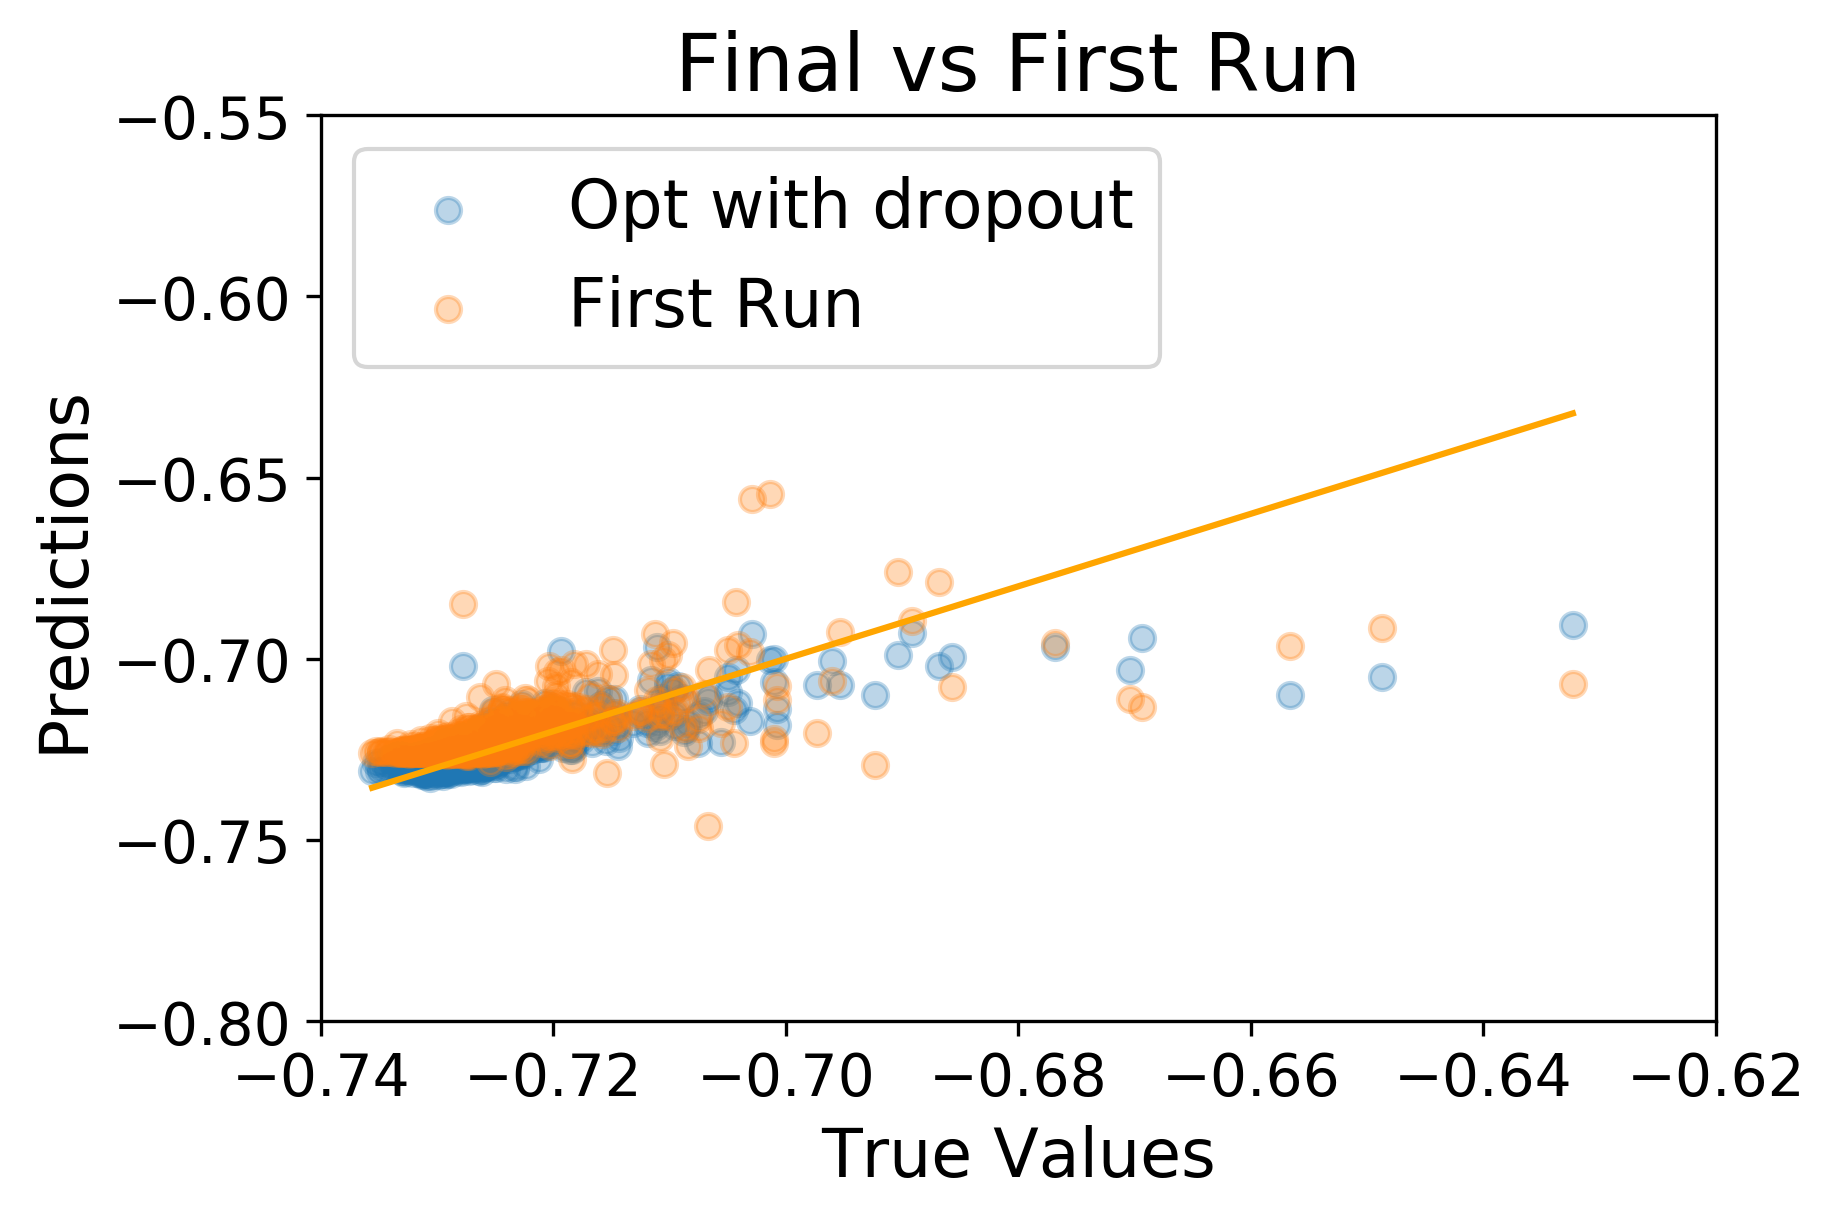

In [238]:
a = 0.3
#plt.scatter(test_labels, first_run, label = 'First Run', alpha = a)
plt.scatter(test_labels, drop.predict(test_features_norm), label = 'Opt with dropout', alpha = a)
plt.scatter(test_labels, first_run, label = 'First Run', alpha = a)
plt.xlabel('True Values')
plt.ylabel('Predictions')
x = np.linspace(min(test_labels),max(test_labels))
plt.plot(x,x,c='orange')
plt.legend(loc='upper left')
plt.ylim([-.8,-.55])
plt.xlim([-.74,-.62])

plt.title('Final vs First Run');

plt.savefig('Final.png')

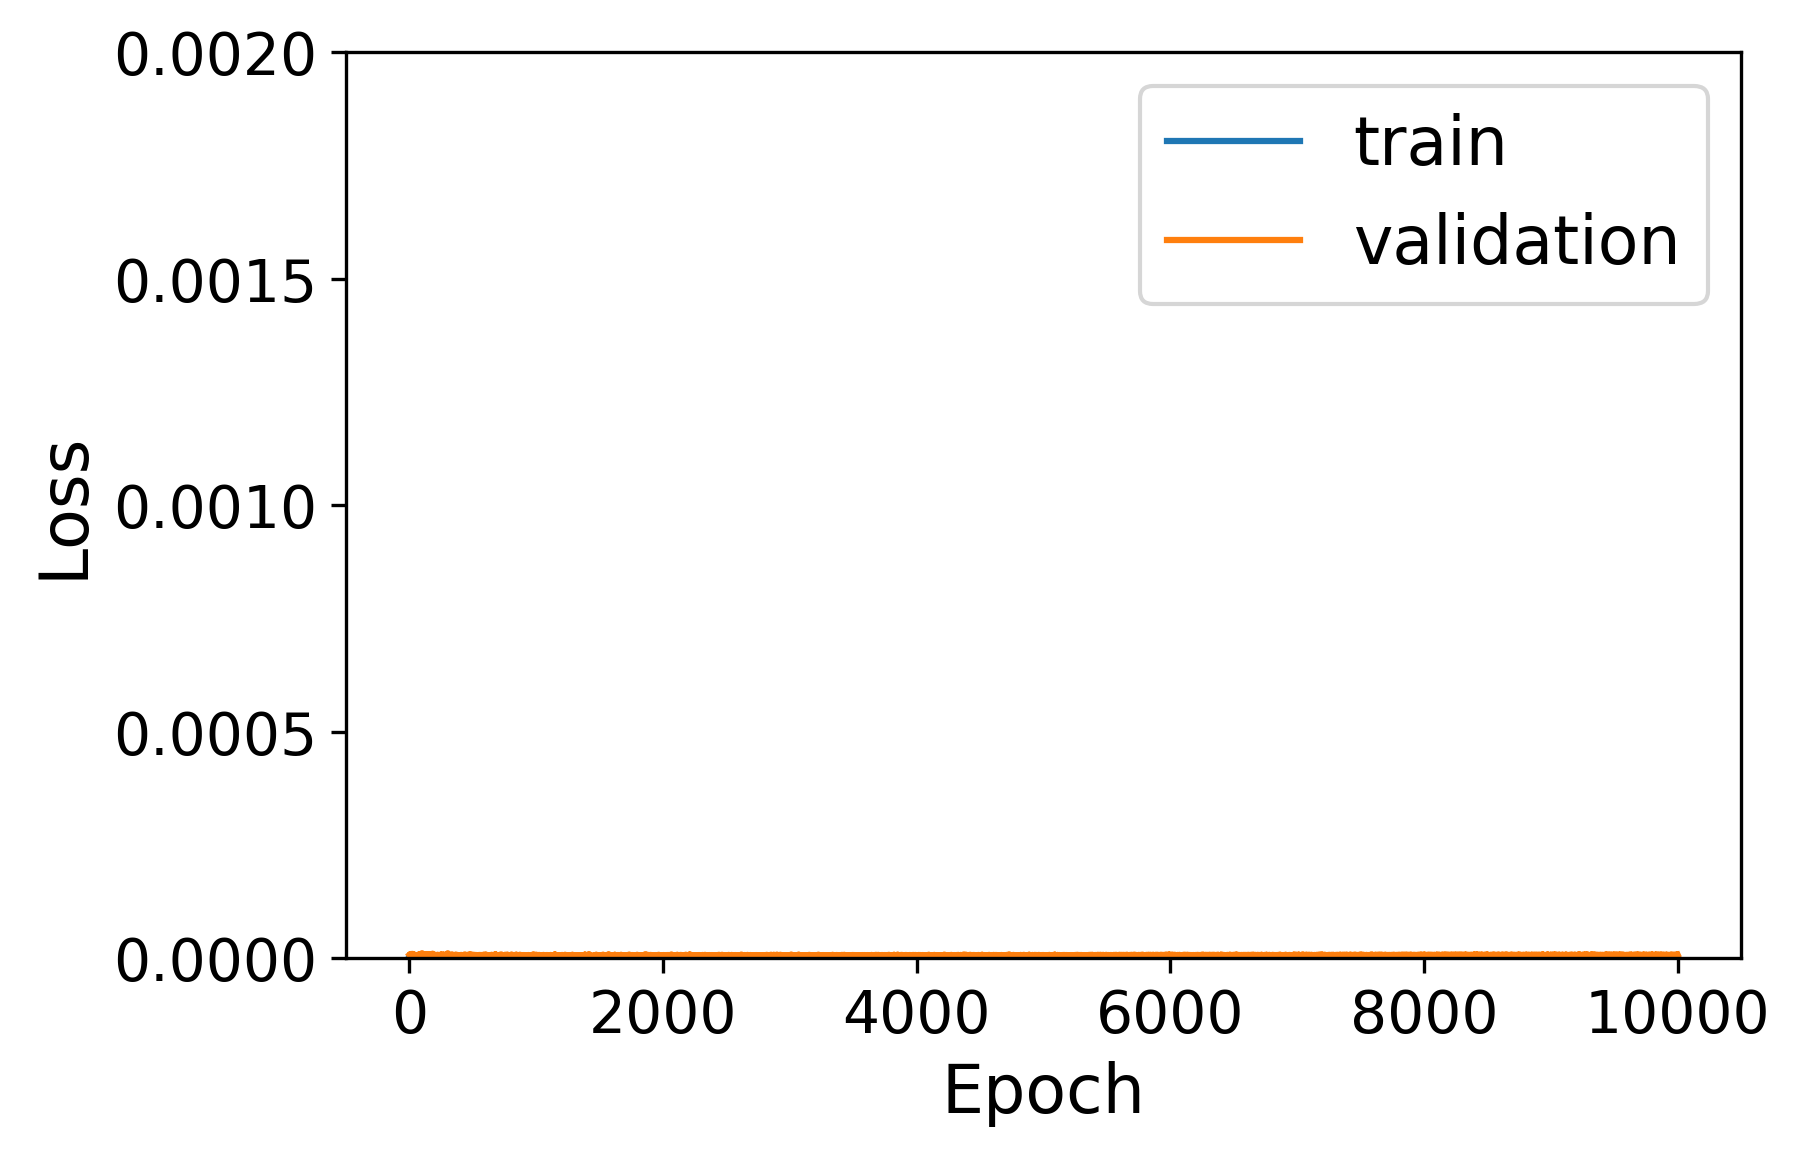

In [239]:
plot_loss(NN_drop)
plt.ylim([0,.002]);

In [240]:
evaluations_huber['Optimized_dropx2'] = drop.evaluate(test_features_norm, test_labels)
evaluations_huber

34/34 [==============================] - 0s 2ms/step - loss: 1.0946e-05


{'Huber': 2.169277831853833e-05,
 'Huber_Optimized': 1.1568845366127789e-05,
 'Optimized_drop': 1.0893076250795275e-05,
 'Optimized_dropx2': 1.0945722351607401e-05}

In [241]:
drop.save('opt_dropx2')

INFO:tensorflow:Assets written to: opt_dropx2/assets


In [13]:
drop = keras.models.load_model('opt_drop')

test/training sets not saved

In [17]:
features_nozeros.drop(columns=['targets'])

x1        y1        z1        x2        y2        z2        x3  \
119/15 -0.366301  0.019717  0.856592 -0.339444  0.048356  0.577598 -0.418911   
119/30 -0.390395 -0.020176  0.872104 -0.380616 -0.007483  0.600061 -0.474420   
119/2  -0.378354  0.015964  0.899044 -0.360302  0.048156  0.613194 -0.443630   
119/21 -0.392781 -0.032627  0.870634 -0.384759 -0.021539  0.557859 -0.485000   
119/29 -0.391025 -0.032476  0.919698 -0.391025 -0.032476  0.553543 -0.473614   
...          ...       ...       ...       ...       ...       ...       ...   
81/19  -0.449848 -0.021903  0.721624 -0.436011  0.050092  0.434018 -0.565244   
81/0   -0.513655 -0.035579  0.746067 -0.480645  0.067738  0.439567 -0.590030   
81/20  -0.353765 -0.049942  0.810287 -0.349455 -0.012893  0.514978 -0.503034   
81/3   -0.383708 -0.048584  0.773932 -0.362269  0.016299  0.434681 -0.472132   
81/18  -0.316621 -0.066229  0.783365 -0.316654 -0.057202  0.425447 -0.437862   

              y3        z3        x4        y4        z4        d1   d2   d3  \
119/15  0.210766  0.238393 -0.598638  0.380984 -0.053981  1.859077  2.0  2.0   
119/30  0.146110  0.219598 -0.680640  0.284006 -0.087125  1.855710  2.0  2.0   
119/2   0.225211  0.237724 -0.640668  0.415851 -0.074490  1.842980  2.0  2.0   
119/21  0.138425  0.248760 -0.648029  0.323081 -0.061666  1.817840  2.0  2.0   
119/29  0.084352  0.258451 -0.675615  0.246259 -0.060138  1.782481  2.0  2.0   
...          ...       ...       ...       ...       ...       ...  ...  ...   
81/19   0.161704  0.009798 -0.804196  0.278561 -0.263096  1.855347  2.0  2.0   
81/0    0.153183 -0.014381 -0.781100  0.270015 -0.278744  1.871738  2.0  2.0   
81/20   0.037670  0.026388 -0.759025  0.154701 -0.292460  1.844268  2.0  2.0   
81/3    0.083338  0.020777 -0.717343  0.220061 -0.246589  1.852208  2.0  2.0   
81/18  -0.023666  0.050206 -0.723236  0.073039 -0.221708  1.797059  2.0  2.0   

              d4  
119/15  1.997133  
119/30  1.930594  
119/2   1.956618  
119/21  2.000000  
119/29  1.957956  
...          ...  
81/19   1.858762  
81/0    1.842704  
81/20   1.791056  
81/3    1.926310  
81/18   1.901327  

[5315 rows x 16 columns]

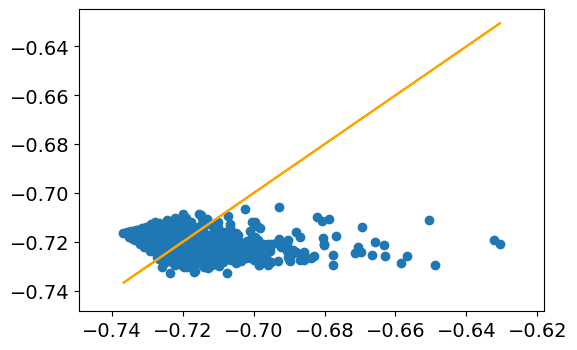